# פרויקט ניסיון ניב דובז'ינסקי

## תרגיל 1

In [63]:
import regex as re
import subprocess
from IPython.display import Image

#### PCYOX1L orthologs were downloaded using the NCBI ortholog tool:
##### https://www.ncbi.nlm.nih.gov/gene/78991/ortholog/?scope=7776

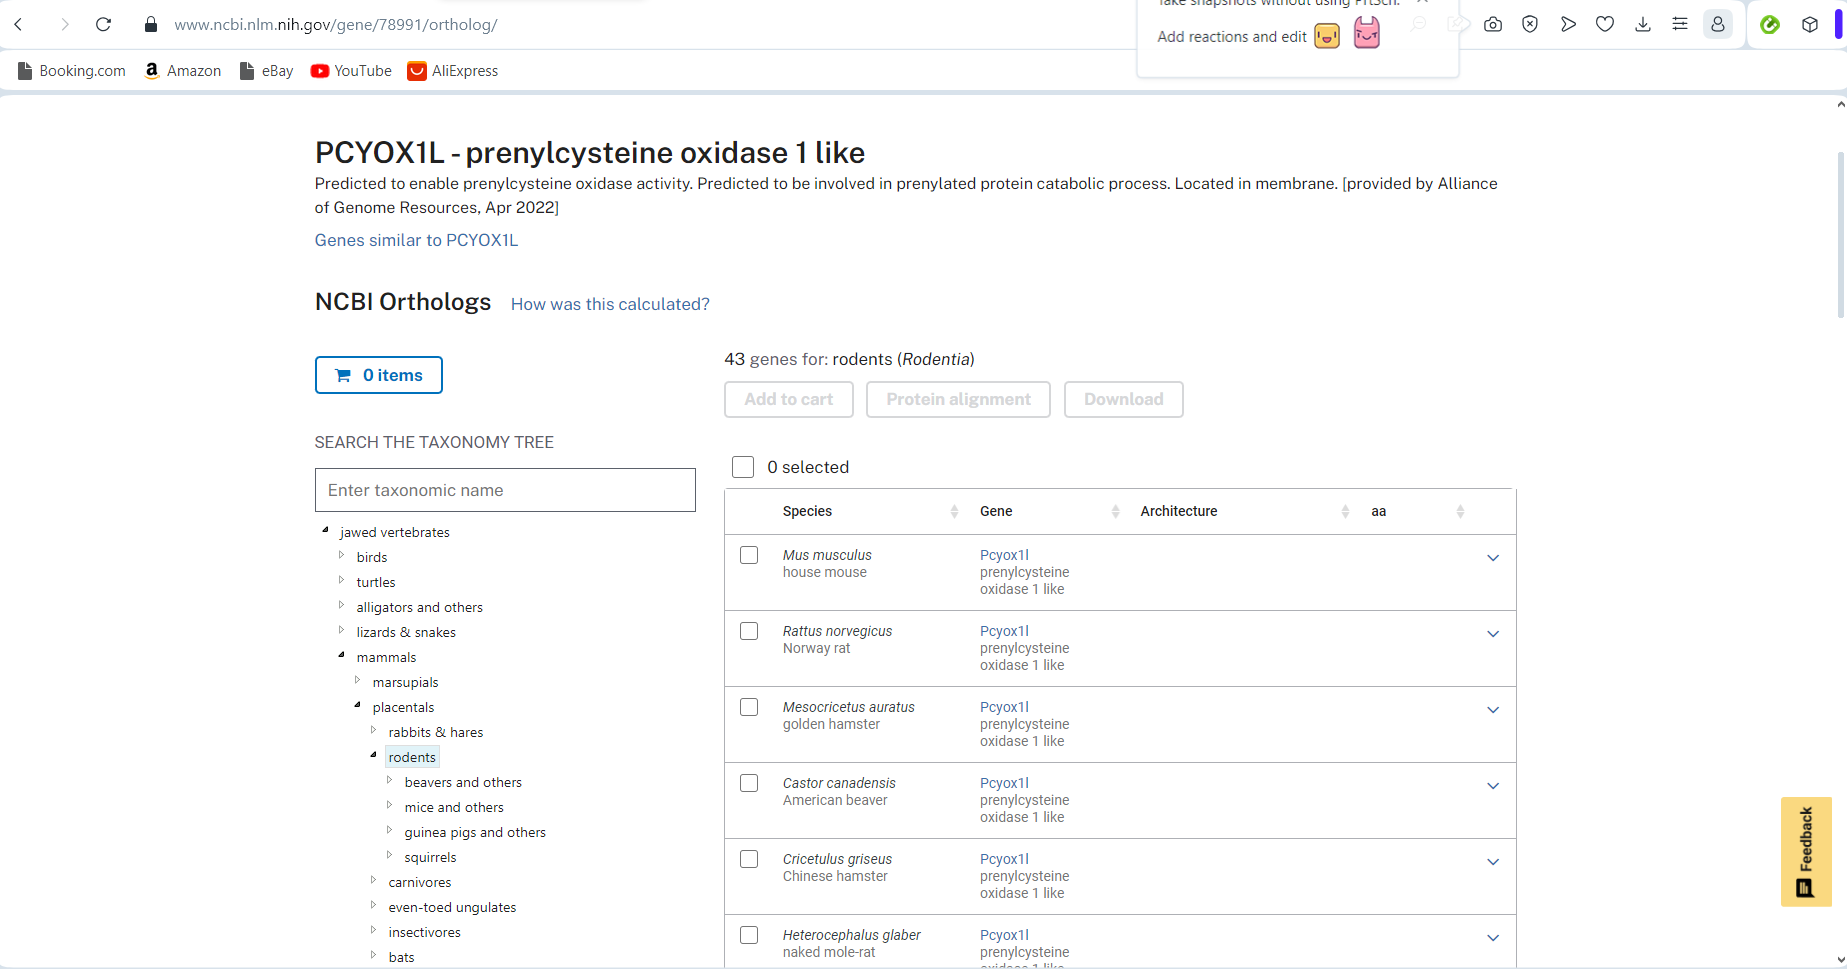

In [67]:
Image(r"C:\Users\nivdo\Pictures\Screenshots\Screenshot 2024-03-10 164619.png")

#### The protein names were adjusted to be visualized correctly at Jalview

In [68]:
def extract_species(input_file, output_file):
    """ Recieve an input fasta file and and an output file name. 
    Keeps only the species name for each fasta entry"""
    with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
        for line in infile:
            if line.startswith('>'):  # Check if it's a header line
                
                fetch_name = re.findall(r"\[([^\]]+)\]",line )[0]
                new_name=fetch_name.replace(" ","_") # make the names as one word to be presented correctly in Jalview
                outfile.write(f">{new_name}" +'\n')
                print(new_name)
            else:
                outfile.write(line)  # Write the sequence lines as is
        print(f"Removed description {output_file}")

In [53]:
proteins_file=r"C:\Users\nivdo\Documents\Cavos\Pcyox1l_refseq_protein.fasta"
protein_file_named=r"C:\Users\nivdo\Documents\Cavos\Pcyox1l_refseq_protein_named.fasta"

In [54]:
extract_species(proteins_file,protein_file_named)

Mus_musculus
Rattus_norvegicus
Octodon_degus
Heterocephalus_glaber
Mesocricetus_auratus
Microtus_ochrogaster
Nannospalax_galili
Fukomys_damarensis
Removed description C:\Users\nivdo\Documents\Cavos\Pcyox1l_refseq_protein_named.fasta


### MSA was performed using Muscle (locally)

In [61]:
def muscle_run(input_file,threads=7):
# Recieve an input fasta file and performs a MSA locally using Muscle

    muscle_exe = r'"C:\Users\nivdo\Downloads\Muscle\muscle5.1.win64.exe"'
    output_file=f"{input_file.rsplit('.', 1)[0]}_aligned.fasta"
    muscle_command = f'{muscle_exe} -align {input_file} -output {output_file} -threads {threads}'

    # Run MUSCLE using subprocess
    result = subprocess.run(muscle_command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    print("MUSCLE output:")
    print(result.stdout)
    print(result.stderr)

In [103]:
muscle_run(protein_file_named)

MUSCLE output:


muscle 5.1.win64 [ddb630]  17.1Gb RAM, 12 cores
Built Jan 13 2022 15:30:12
(C) Copyright 2004-2021 Robert C. Edgar.
https://drive5.com

Input: 9 seqs, avg length 494, max 495

00:00 3.6Mb  CPU has 12 cores, running 7 threads
00:00 3.7Mb     2.8% Calc posteriors
00:00 7.2Mb   100.0% Calc posteriors

00:00 7.2Mb     2.8% Consistency (1/2)
00:00 6.5Mb   100.0% Consistency (1/2)

00:00 7.5Mb     2.8% Consistency (2/2)
00:00 6.5Mb   100.0% Consistency (2/2)

00:00 6.6Mb    12.5% UPGMA5           
00:00 6.6Mb   100.0% UPGMA5

00:00 4.7Mb     1.0% Refining
00:00 6.6Mb   100.0% Refining




#### The MSA was successfully done using Muscle and visualized using Jalview.
#### The concervated regions were visualized using color gradient in addition to the concervation marking on the bottom (first yellow row).

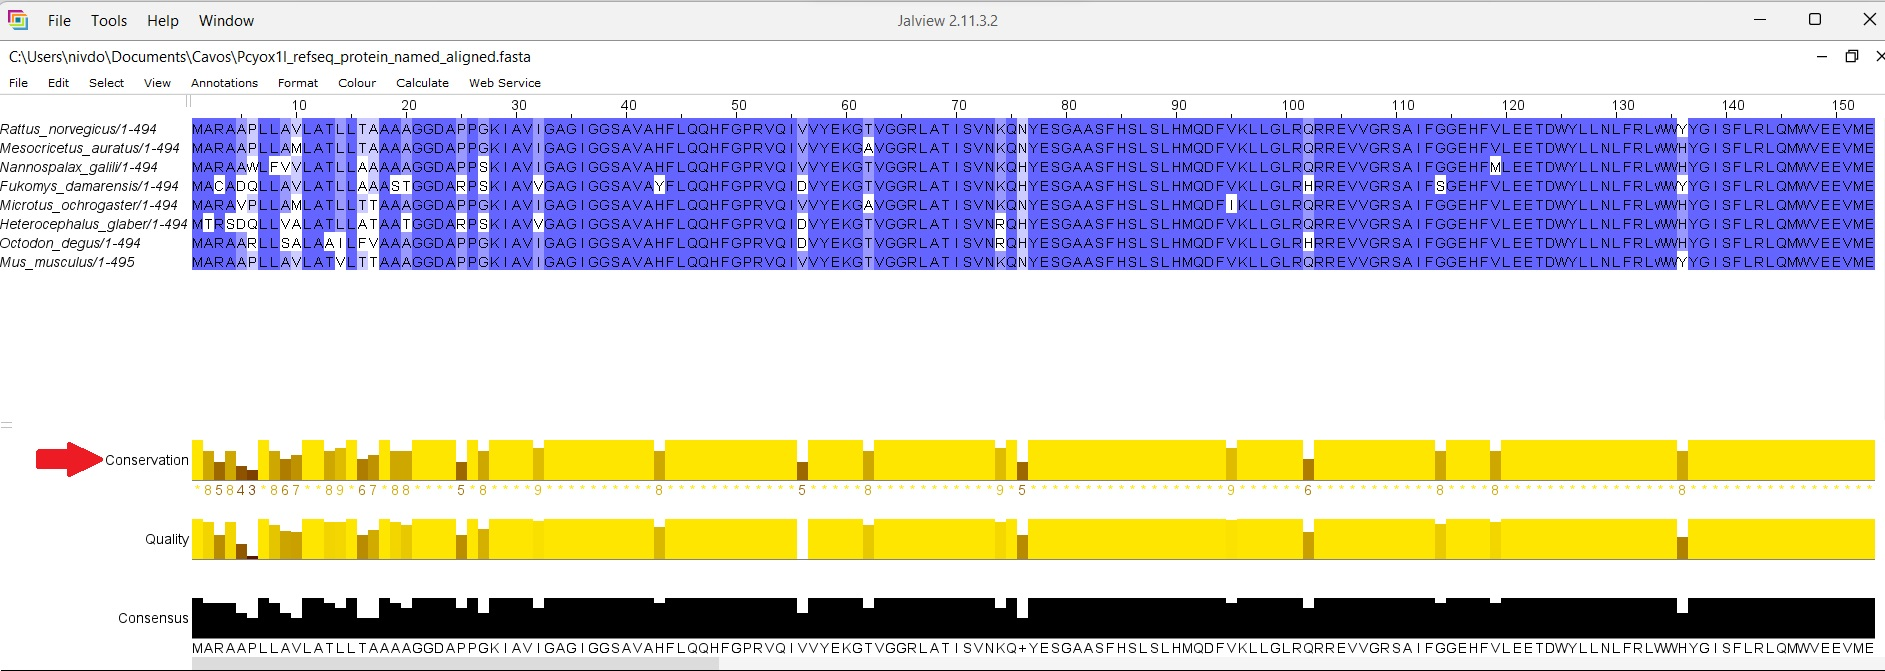

In [114]:
Image(filename=r"C:\Users\nivdo\Documents\Cavos\screenshots\concervation.jpg")

#### The sequences where arranged and grouped accordingly.
#### G27S was identified as different between the red group and the blue group: 
#### <span style="color:blue"> Blue group  Glycine (G) </span>
#### <span style="color:red"> Red goup Serine (S) </span>

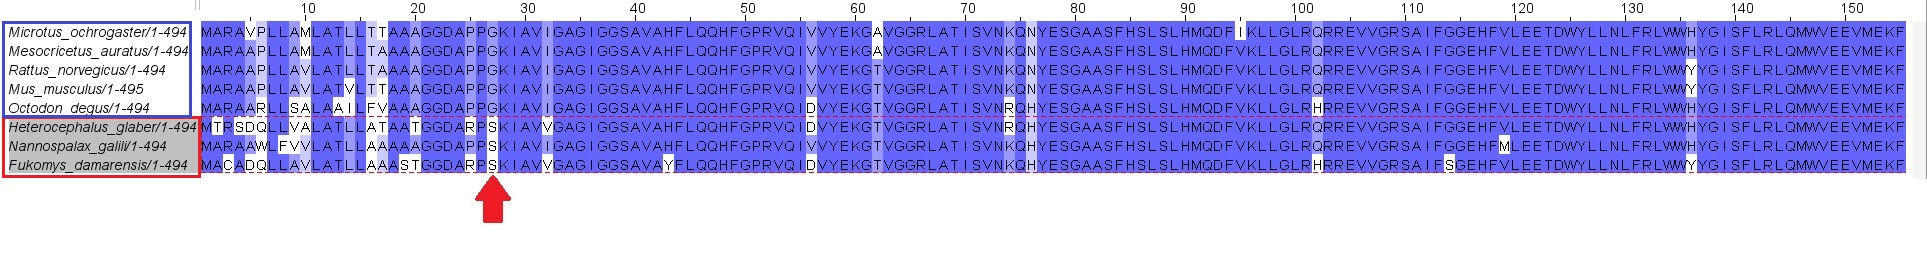

In [112]:
Image(r"C:\Users\nivdo\Documents\Cavos\screenshots\msa_groups.jpg")

#### I added the human sequence to the alignment.
#### We could see that human shares the sequence (Glycine) of the blue group
#### Meaning the variation in the sequence (Serine) is unique to the red group.

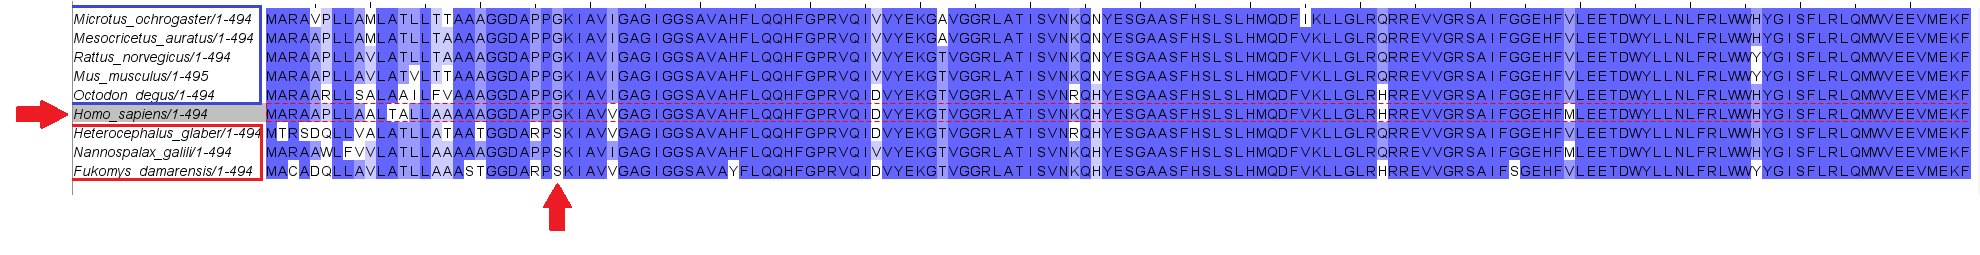

In [118]:
Image(r"C:\Users\nivdo\Documents\Cavos\screenshots\msa_protein_with__human.png")

#### AlphaFold was used to visualize the 3d stracture of PCYOX1L
#### https://alphafold.ebi.ac.uk/entry/D6R9J0

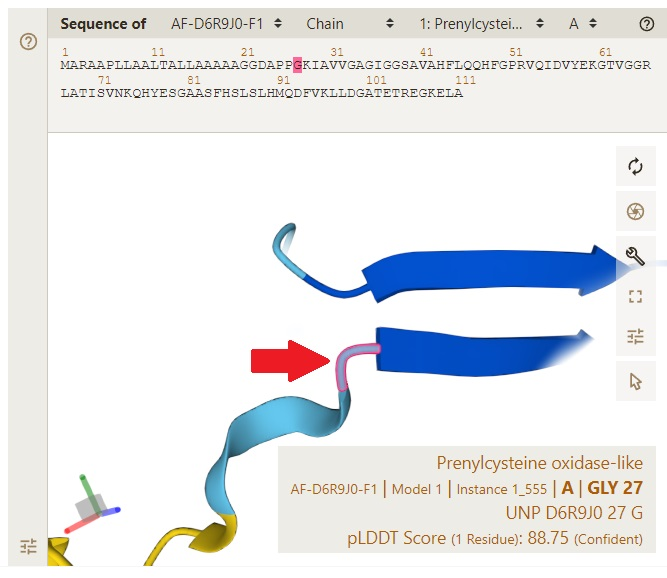

In [115]:
Image(r"C:\Users\nivdo\Documents\Cavos\screenshots\g_to_s_3d.jpg")

#### The Glycine is located between a Beta-Sheet and an Alpha Helix.
#### Glycine concidered a very flexible residue since it lakes a side-residue.
#### Changing glycine to a more rigit amino acid as Serine, could change the flexibility 
#### of that region and results in more rigit link between the Beta-Sheet and the Alpha-Helix

#### The question that arrise is whether this change (G>S) is due to function - an evolutionary positive selection presure - 
#### or due to a random event.
#### We would first look on the tree.

### Protein tree

#### Tree was calculated from the amino acid sequence using Raxml on a windows command prompt:
##### raxmlHPC.exe -s "C:\Users\nivdo\Documents\Cavos\Pcyox1l_refseq_protein_named_aligned.fasta" -n Pcyox1l_protein_tree -m PROTGAMMAAUTO -p 12345 
#### Then, visualized using FigTree

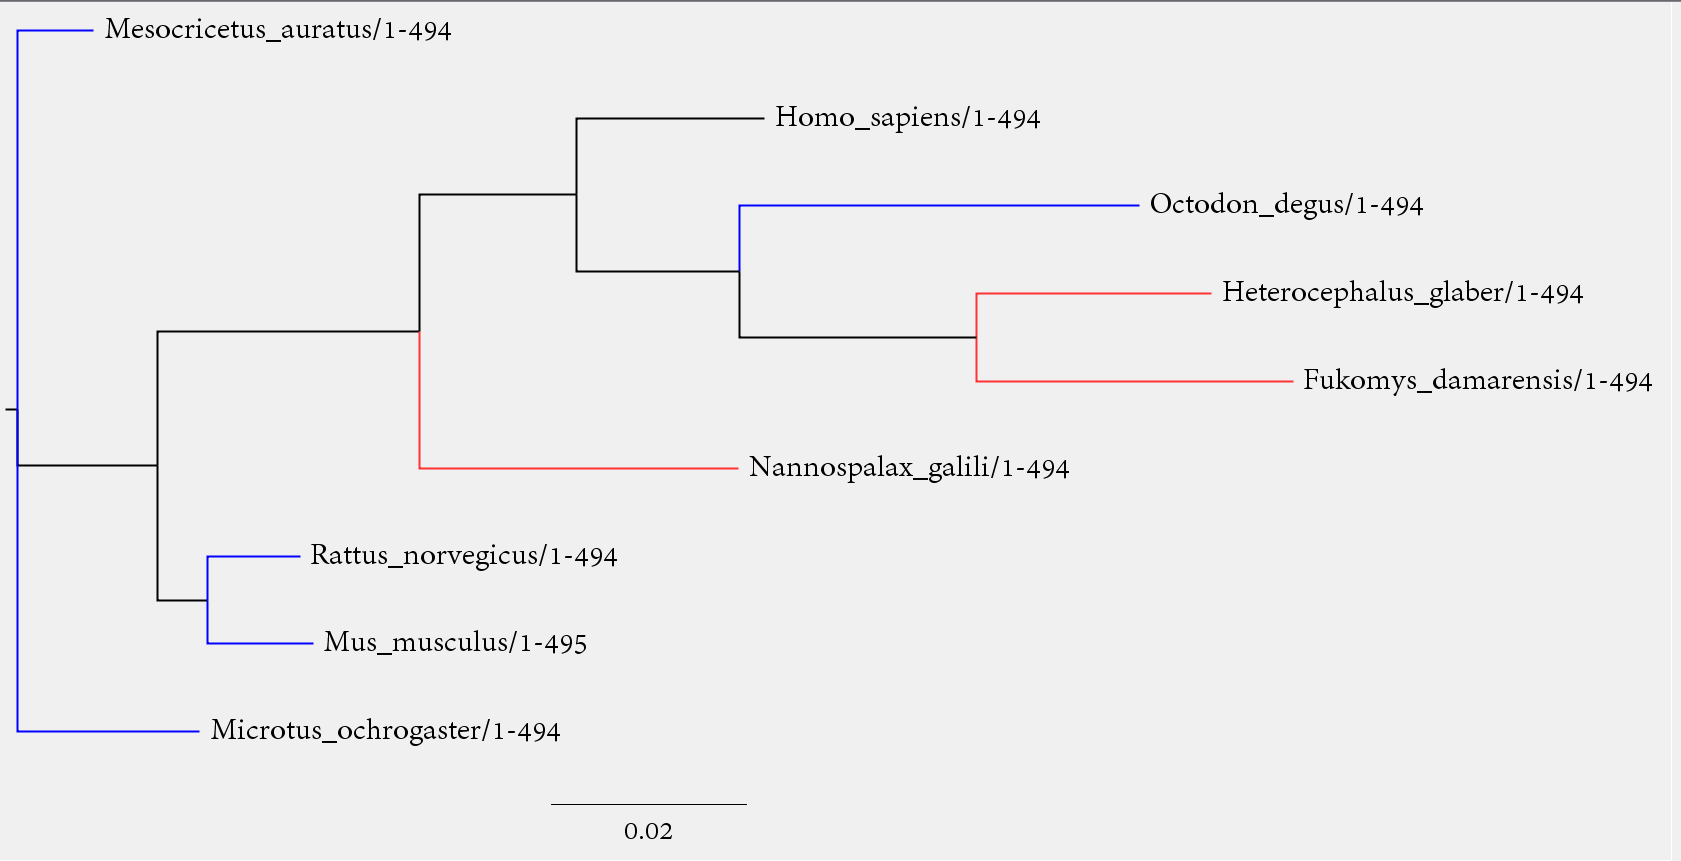

In [120]:
Image(r"C:\Users\nivdo\Documents\Cavos\screenshots\protein_tree.png")

#### We could see that the red group clusters on a seperate branch from most of the blue group, except for Octodon degus.
#### Homo sapience groups together with the red group.

### Control Gene - GAPDH

In [121]:
muscle_run(r"C:\Users\nivdo\Documents\Cavos\Gapdh_refseq_protein.fasta")

MUSCLE output:


muscle 5.1.win64 [ddb630]  17.1Gb RAM, 12 cores
Built Jan 13 2022 15:30:12
(C) Copyright 2004-2021 Robert C. Edgar.
https://drive5.com

Input: 9 seqs, avg length 339, max 390

00:00 3.6Mb  CPU has 12 cores, running 7 threads
00:00 3.7Mb     2.8% Calc posteriors
00:00 15Mb    100.0% Calc posteriors

00:00 4.1Mb     2.8% Consistency (1/2)
00:00 5.3Mb   100.0% Consistency (1/2)

00:00 4.6Mb     2.8% Consistency (2/2)
00:00 4.6Mb   100.0% Consistency (2/2)

00:00 5.1Mb    12.5% UPGMA5           
00:00 5.1Mb   100.0% UPGMA5

00:00 4.7Mb     1.0% Refining
00:00 5.2Mb   100.0% Refining




#### A control tree (GAPDH):

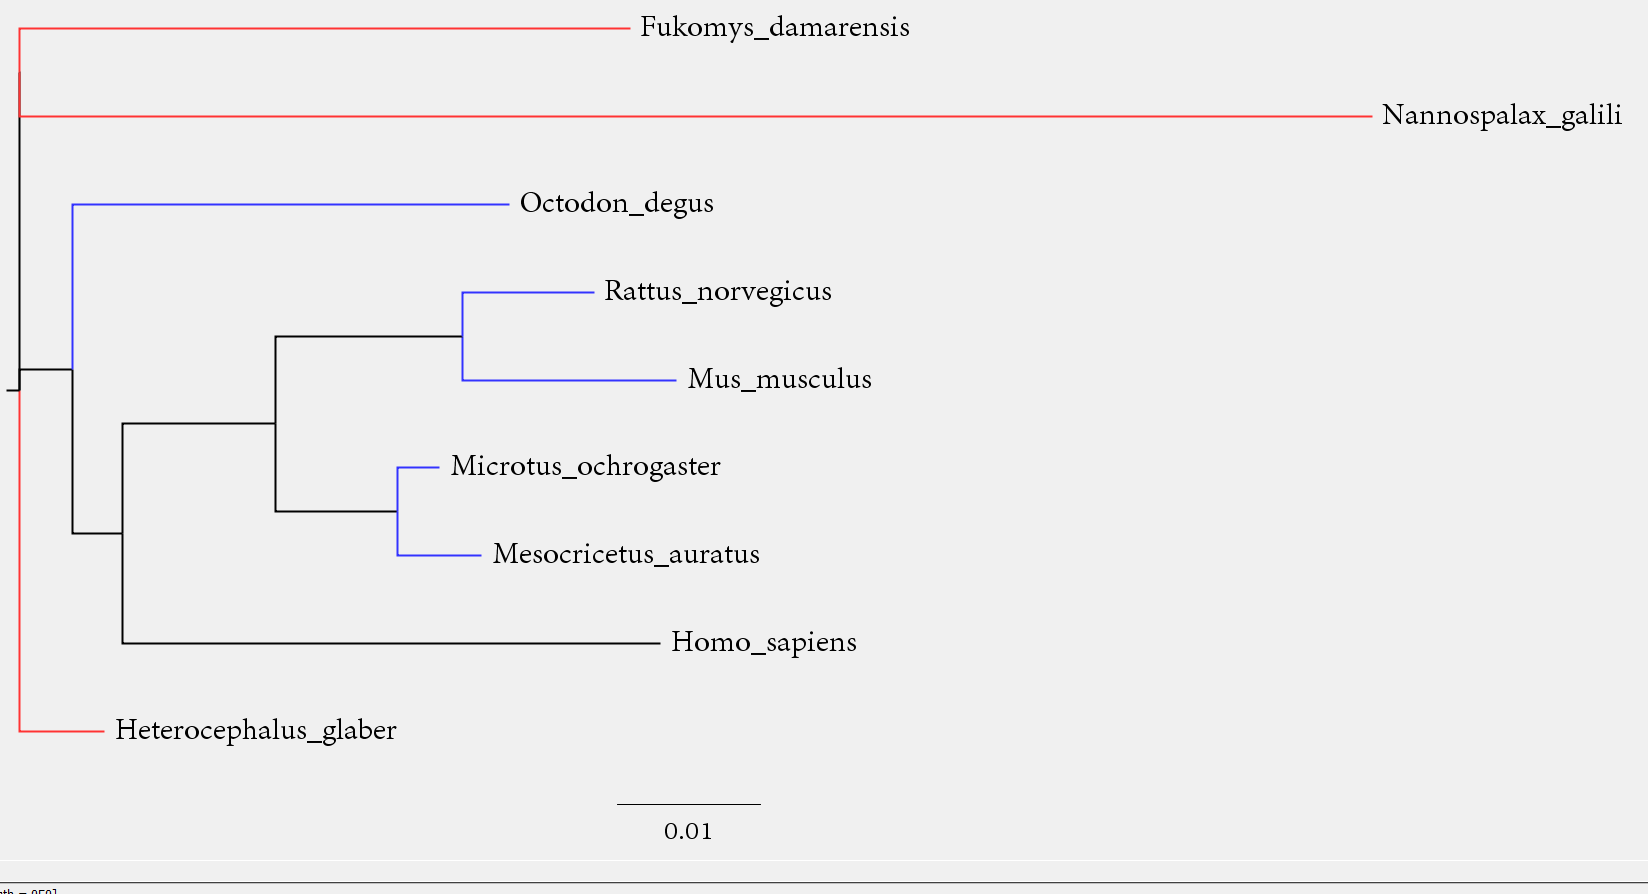

In [122]:
Image(r"C:\Users\nivdo\Documents\Cavos\screenshots\Gapdh.png")

#### Although the himan control sequence now grouped with the other group, the control tree shows that the blue and red group member are grouped together in the tree.
#### This raise the question whether the variation we see as G27S is due to a positive evolutionary pressure or due to chance and short evolutionary distance between the organisms.
#### To answer this question, we will do an Dn/Ds analysis - that calculate the chance that the variations are due to randomness or positive evolution.

#### prepare an alignment of the DNA sequences:

In [83]:
def extract_species_dna(input_file, output_file):
    with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
        for line in infile:
            if line.startswith('>'):  # Check if it's a header line
                parts = line.split()
                if (parts[1]=="PREDICTED:"):
                    fetch_name = " ".join(parts[2:4])
                else:
                    fetch_name = " ".join(parts[1:3])
                new_name=fetch_name.replace(" ","_") # make the names as one word to be presented correctly in Jalview
                outfile.write(f">{new_name}" +'\n')
                print(new_name)
            else:
                outfile.write(line)  # Write the sequence lines as is
        print(f"Removed description {output_file}")

In [84]:
dna_file=r"C:\Users\nivdo\Documents\Cavos\Pcyox1l_refseq_transcript.fasta"
dna_file_named=r"C:\Users\nivdo\Documents\Cavos\Pcyox1l_refseq_transcript_named.fasta"

In [85]:
extract_species_dna(dna_file,dna_file_named)

Mus_musculus
Rattus_norvegicus
Octodon_degus
Heterocephalus_glaber
Mesocricetus_auratus
Microtus_ochrogaster
Nannospalax_galili
Fukomys_damarensis
Removed description C:\Users\nivdo\Documents\Cavos\Pcyox1l_refseq_transcript_named.fasta


In [104]:
muscle_run(dna_file_named)

MUSCLE output:


muscle 5.1.win64 [ddb630]  17.1Gb RAM, 12 cores
Built Jan 13 2022 15:30:12
(C) Copyright 2004-2021 Robert C. Edgar.
https://drive5.com

Input: 9 seqs, avg length 1945, max 2507

00:00 3.6Mb  CPU has 12 cores, running 7 threads
00:00 3.7Mb     2.8% Calc posteriors
00:01 759Mb    41.7% Calc posteriors
00:02 526Mb    61.1% Calc posteriors
00:03 682Mb    86.1% Calc posteriors
00:03 374Mb   100.0% Calc posteriors

00:04 5.1Mb     2.8% Consistency (1/2)
00:04 6.3Mb   100.0% Consistency (1/2)

00:04 6.3Mb     2.8% Consistency (2/2)
00:04 22Mb    100.0% Consistency (2/2)

00:04 6.4Mb    12.5% UPGMA5           
00:04 6.4Mb   100.0% UPGMA5

00:04 6.6Mb     1.0% Refining
00:05 7.2Mb    20.0% Refining
00:06 9.6Mb    94.0% Refining
00:06 9.7Mb   100.0% Refining




#### Identify the coding region

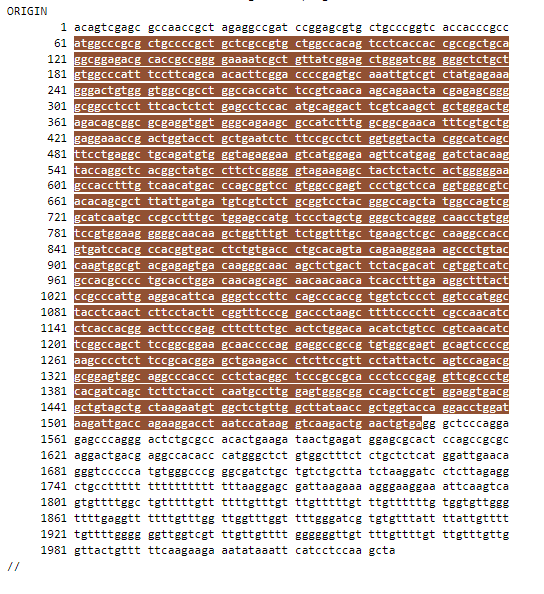

In [126]:
Image(r"C:\Users\nivdo\Documents\Cavos\screenshots\Human_cds.png")

#### Delete the 5'utr

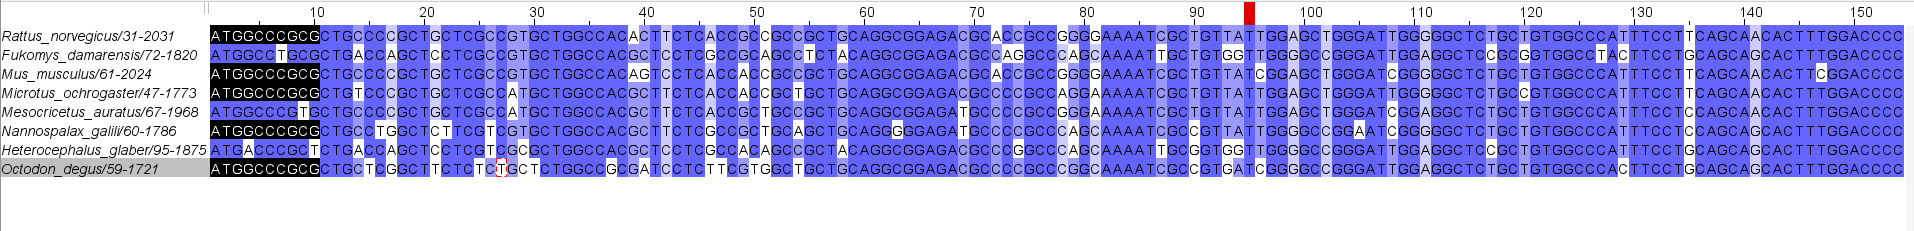

In [124]:
Image(r"C:\Users\nivdo\Documents\Cavos\screenshots\DNA_start.png")

#### Delete the 3'utr

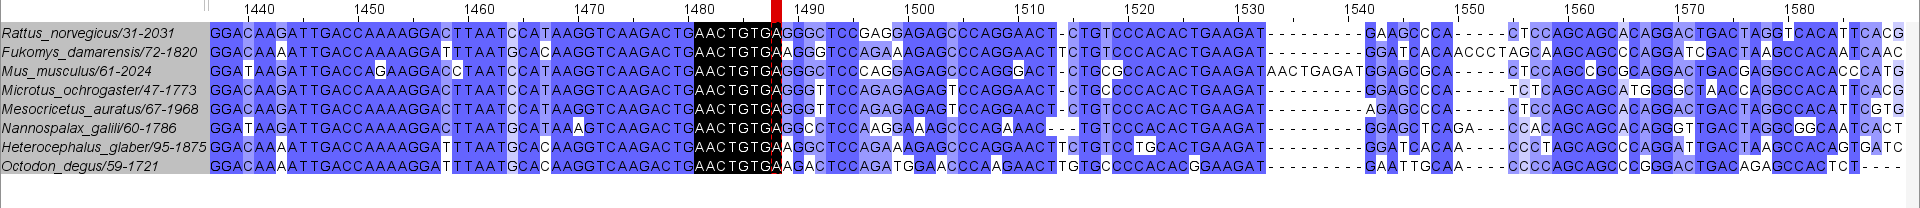

In [125]:
Image(r"C:\Users\nivdo\Documents\Cavos\screenshots\DNA_end.png")

#### Convert the CDS alignment to Phyllip format - to be compatible for Dn/Ds analysis with PamlX CodeML

In [96]:
def convert_fasta_to_phylip(input_filename, output_filename):
    try:
        with open(input_filename, 'r') as input_file:
            sequences = {}
            current_sequence = ""
            current_sequence_name = ""

            for line in input_file:
                line = line.strip()
                if line.startswith(">"):
                    # Start of a new sequence
                    if current_sequence_name:
                        sequences[current_sequence_name] = current_sequence
#                     current_sequence_name = line[1:11]  # Truncate to 10 characters
                    current_sequence_name = line[1:]
                    current_sequence_name = current_sequence_name.replace('/',"")
                    current_sequence = ""
                else:
                    # Add sequence data
                    current_sequence += line

            # Add the last sequence
            if current_sequence_name:
                sequences[current_sequence_name] = current_sequence

        # Find the maximum sequence length
        max_length = max(len(seq) for seq in sequences.values())

        # Write to the PHYLIP-formatted file
        with open(output_filename, 'w') as output_file:
            num_sequences = len(sequences)
            output_file.write(f"{num_sequences} {max_length}\n")
            for name, sequence in sequences.items():
                # Ensure the sequence length matches the maximum length
                sequence = sequence.ljust(max_length, '-')
                output_file.write(f"{name}\n{sequence}\n")

        return f"Conversion completed. PHYLIP file saved as '{output_filename}'."

    except Exception as e:
        return str(e)

In [108]:
cds_msa_fasta=r"C:\Users\nivdo\Documents\Cavos\Pcyox1l_refseq_transcript_named_aligned_cds_plus_human.fasta"
cds_msa_fasta_phylip=r"C:\Users\nivdo\Documents\Cavos\Pcyox1l_refseq_transcript_named_aligned_cds_plus_human_phyllip.fasta"

In [109]:
convert_fasta_to_phylip(cds_msa_fasta,cds_msa_fasta_phylip)

"Conversion completed. PHYLIP file saved as 'C:\\Users\\nivdo\\Documents\\Cavos\\Pcyox1l_refseq_transcript_named_aligned_cds_plus_human_phyllip.fasta'."

#### Make a CDS tree
##### This was done locally at the cmd

In [ ]:
#### raxmlHPC.exe -s "C:\Users\nivdo\Documents\Cavos\Pcyox1l_refseq_transcript_named_aligned_cds.fasta" -n Pcyox1l_cds_tree -m GTRGAMMA -p 12345

#### Run Dn/Ds - PamlX CodeML

#### Using positive evolution model (beta & w)

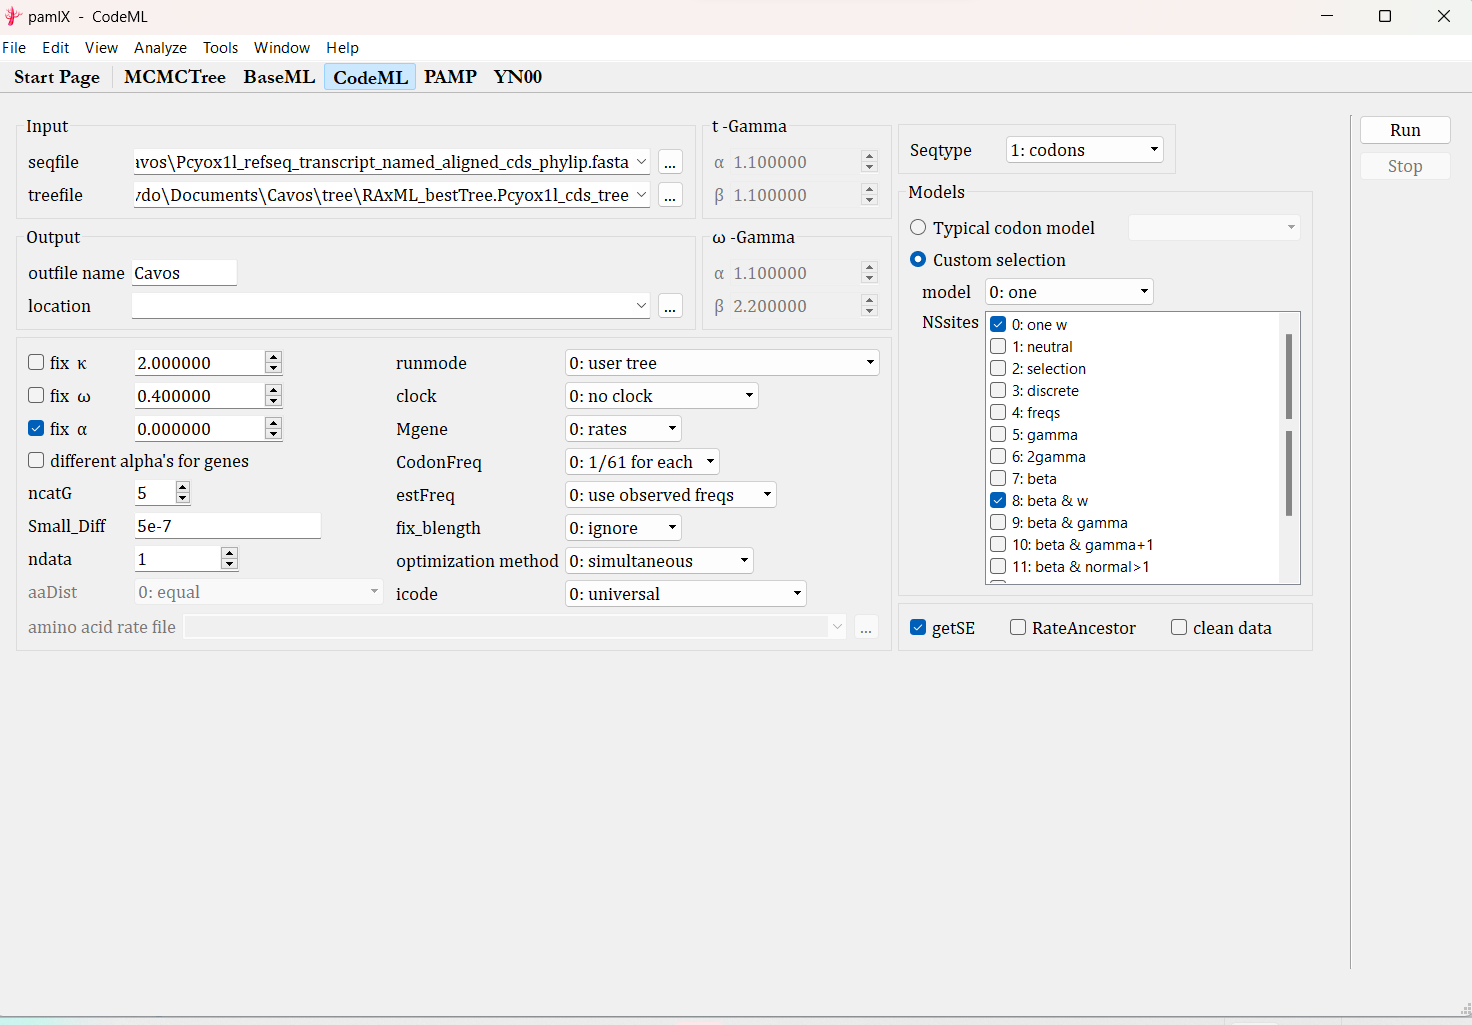

In [127]:
Image(r"C:\Users\nivdo\Documents\Cavos\screenshots\CodemL.png")

#### CodeML output
##### We could see that the chances that G27 variation is due to positive evolution is 0.867 +- 0.577 which is insignificant.
##### Meaning we could not conclude if this variation is due to positive evolution or chance.

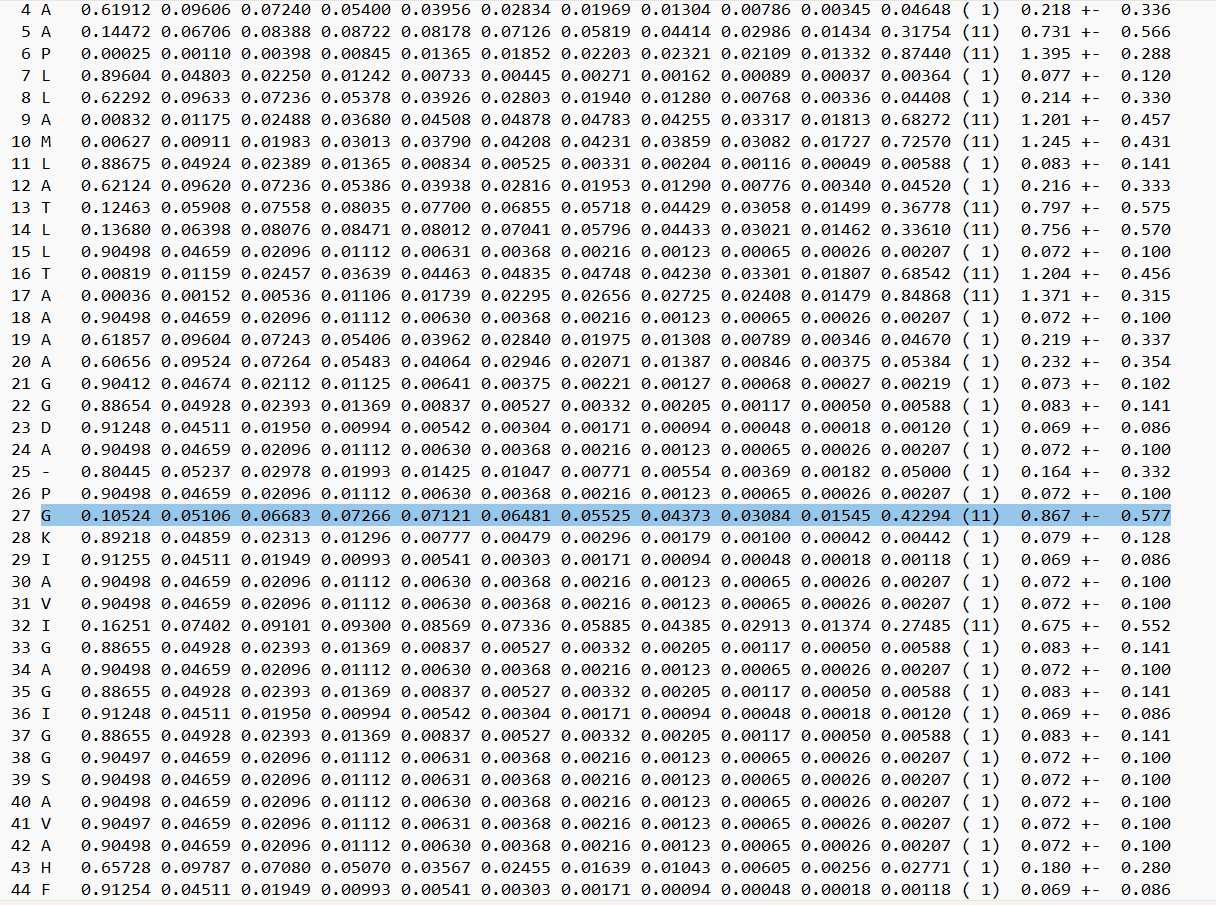

In [128]:
Image(r"C:\Users\nivdo\Documents\Cavos\screenshots\codeml_output.png")

## שאלה 2

#### The human proteins between 100-120AA were downloaded from Uniprot using the advanced search feacher to limit the protein length

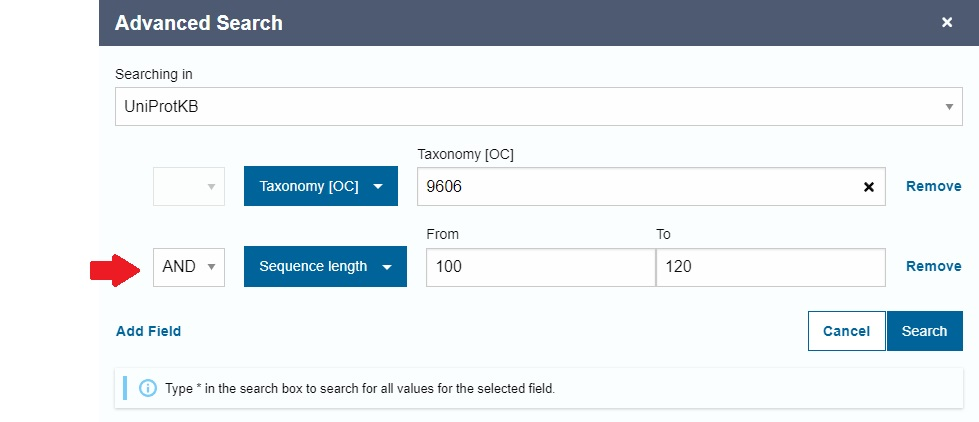

In [129]:
Image(r"C:\Users\nivdo\Documents\Cavos\screenshots\uniprot.jpg")

In [181]:
human_proteins = r"C:\Users\nivdo\Documents\Cavos\uniprot\uniprotkb_taxonomy_id_9606_AND_length_1_2024_03_11.fasta\uniprotkb_taxonomy_id_9606_AND_length_1_2024_03_11.fasta"

#### Then, the Bowhead wheal proteome was downloaded from http://www.bowhead-whale.org/downloads/

In [143]:
whale_proteins=r"C:\Users\nivdo\Documents\Cavos\uniprot\bowhead_whale_proteins\bowhead_whale_proteins.fasta"

In [149]:
import os

#### Make a blast database locally for local search

In [150]:
def make_database(genome_file,kind):
    genome_path= os.path.dirname(genome_file)
    file_name=_path=os.path.basename(genome_file)
    base_name, _ = os.path.splitext(file_name)
    database_path=os.path.join(genome_path,base_name)
    os.makedirs(database_path, exist_ok=True)
    
#     blast_dir=r"C:\Users\nivdo\Downloads\NCBI\blast-2.15.0+\bin"
    print("Building database:", database_path)
    command= 'makeblastdb -in {} -dbtype {} -parse_seqids -out {}\genomic_protein__database'.format(genome_file,kind,database_path)
#     make the database on windows
    result = subprocess.run(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)
    
    print("Output:", result.stdout)
    if result.stderr:
        print("Error:", result.stderr)
        return
    return '{}\genomic_protein__database'.format(database_path)

In [152]:
whale_database=make_database(whale_proteins,"prot")

Building database: C:\Users\nivdo\Documents\Cavos\uniprot\bowhead_whale_proteins\bowhead_whale_proteins
Output: 

Building a new DB, current time: 03/11/2024 13:14:39
New DB name:   C:\Users\nivdo\Documents\Cavos\uniprot\bowhead_whale_proteins\bowhead_whale_proteins\genomic_protein__database
New DB title:  C:\Users\nivdo\Documents\Cavos\uniprot\bowhead_whale_proteins\bowhead_whale_proteins.fasta
Sequence type: Protein
Deleted existing Protein BLAST database named C:\Users\nivdo\Documents\Cavos\uniprot\bowhead_whale_proteins\bowhead_whale_proteins\genomic_protein__database
Keep MBits: T
Maximum file size: 3000000000B
Adding sequences from FASTA; added 22672 sequences in 0.706638 seconds.





#### Make a function for local blast search without the need of using the cmd shell

In [162]:
def blast_local(prot,name,database,kind='blastp'):

#     blast_dir=r"C:\Users\nivdo\Downloads\NCBI\blast-2.15.0+\bin"
    print("Searching {}:{}".format(kind,name))
    command= 'echo {} | {} -query - -db {}\
     -outfmt "6 qseqid sseqid pident length mismatch gapopen qstart qend sstart send evalue bitscore"'.format(prot,kind,database)
#     make the search on windows
    result = subprocess.run(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)
    if result.stderr:
        print("Error:", result.stderr)
        return

    return result.stdout

#### A function for searching the best orthologs from a fasta file in a blast database

In [180]:
def search_orthologs(fasta_path, database):
    """
    Search for best orthologs in a database(Bowhead whale) for each human protein in a FASTA file, saving detailed similarity metrics.

    Parameters:
    - fasta_path: Path to the input FASTA file with human proteins.
    - database: Path to the BLAST database for Bowhead whale proteins.

    Returns:
    A list of tuples with (query_id, best_hit_id, percentage_identity, alignment_length, evalue, bitscore).
    """
    results = []

    for record in SeqIO.parse(fasta_path, "fasta"):
        protein_sequence = str(record.seq)
        blast_result = blast_local(protein_sequence, record.id, database, kind='blastp')
        if blast_result:
            lines = blast_result.strip().split('\n')
            if lines:
                best_hit = lines[0].split('\t')
                best_hit_id = best_hit[1]
                percentage_identity = best_hit[2]
                alignment_length = best_hit[3]
                evalue = best_hit[10]
                bitscore = best_hit[11]
                results.append((record.id, best_hit_id, percentage_identity, alignment_length, evalue, bitscore))
                print(record.id, best_hit_id, percentage_identity, alignment_length, evalue, bitscore)
                print("----------------------------")
        else:
            results.append((record.id, None, None, None, None, None))

    return results


In [182]:
orthologs=search_orthologs(human_proteins, whale_database)

Searching blastp:sp|A0M8Q6|IGLC7_HUMAN
sp|A0M8Q6|IGLC7_HUMAN bmy_19800T0 70.476 105 1.08e-46 148
----------------------------
Searching blastp:sp|A2RU14|TM218_HUMAN
sp|A2RU14|TM218_HUMAN bmy_08516T0 83.478 115 1.65e-49 154
----------------------------
Searching blastp:sp|A6NFY7|SDHF1_HUMAN
sp|A6NFY7|SDHF1_HUMAN bmy_05915T0 81.356 118 2.44e-60 180
----------------------------
Searching blastp:sp|G2XKQ0|SUMO5_HUMAN
sp|G2XKQ0|SUMO5_HUMAN bmy_17523T0 86.139 101 1.63e-59 177
----------------------------
Searching blastp:sp|O00175|CCL24_HUMAN
sp|O00175|CCL24_HUMAN bmy_19531T0 64.103 117 2.95e-52 160
----------------------------
Searching blastp:sp|O14519|CDKA1_HUMAN
sp|O14519|CDKA1_HUMAN bmy_07841T0 67.327 101 4.78e-42 134
----------------------------
Searching blastp:sp|O14633|LCE2B_HUMAN
sp|O14633|LCE2B_HUMAN bmy_19015T0 77.143 35 5.06e-08 48.5
----------------------------
Searching blastp:sp|O15130|NPFF_HUMAN
sp|O15130|NPFF_HUMAN bmy_15765T0 30.337 89 0.61 28.5
---------------------------

sp|P05114|HMGN1_HUMAN bmy_08147T0 96.040 101 2.09e-58 174
----------------------------
Searching blastp:sp|P05386|RLA1_HUMAN
sp|P05386|RLA1_HUMAN bmy_05037T0 99.123 114 1.70e-77 223
----------------------------
Searching blastp:sp|P05387|RLA2_HUMAN
sp|P05387|RLA2_HUMAN bmy_22160T0 92.647 68 1.20e-38 126
----------------------------
Searching blastp:sp|P06307|CCKN_HUMAN
sp|P06307|CCKN_HUMAN bmy_03298T0 81.739 115 1.91e-67 197
----------------------------
Searching blastp:sp|P06454|PTMA_HUMAN
sp|P06454|PTMA_HUMAN bmy_04911T0 98.198 111 4.34e-65 194
----------------------------
Searching blastp:sp|P06702|S10A9_HUMAN
sp|P06702|S10A9_HUMAN bmy_09666T0 63.636 110 2.83e-44 140
----------------------------
Searching blastp:sp|P08118|MSMB_HUMAN
sp|P08118|MSMB_HUMAN bmy_18036T0 26.190 42 0.012 33.5
----------------------------
Searching blastp:sp|P08493|MGP_HUMAN
sp|P08493|MGP_HUMAN bmy_01955T0 80.583 103 1.33e-50 154
----------------------------
Searching blastp:sp|P09341|GROA_HUMAN
sp|P09341|G

sp|P62805|H4_HUMAN bmy_12201T0 100.000 103 1.12e-68 200
----------------------------
Searching blastp:sp|P62854|RS26_HUMAN
sp|P62854|RS26_HUMAN bmy_03934T0 99.130 115 3.55e-79 227
----------------------------
Searching blastp:sp|P62877|RBX1_HUMAN
sp|P62877|RBX1_HUMAN bmy_00993T0 80.597 134 6.97e-74 214
----------------------------
Searching blastp:sp|P62888|RL30_HUMAN
sp|P62888|RL30_HUMAN bmy_10834T0 99.130 115 1.08e-81 234
----------------------------
Searching blastp:sp|P62942|FKB1A_HUMAN
sp|P62942|FKB1A_HUMAN bmy_08906T0 97.531 81 4.58e-55 165
----------------------------
Searching blastp:sp|P63027|VAMP2_HUMAN
sp|P63027|VAMP2_HUMAN bmy_01714T0 98.261 115 3.85e-80 230
----------------------------
Searching blastp:sp|P63165|SUMO1_HUMAN
sp|P63165|SUMO1_HUMAN bmy_17523T0 98.020 101 6.29e-71 205
----------------------------
Searching blastp:sp|P63172|DYLT1_HUMAN
sp|P63172|DYLT1_HUMAN bmy_22210T0 98.230 113 7.41e-81 231
----------------------------
Searching blastp:sp|P63272|SPT4H_HUMAN
s

sp|Q96RP3|UCN2_HUMAN bmy_16236T0 39.024 41 6.92e-05 39.3
----------------------------
Searching blastp:sp|Q99417|MYCBP_HUMAN
sp|Q99417|MYCBP_HUMAN bmy_02107T0 98.810 84 1.09e-54 164
----------------------------
Searching blastp:sp|Q9BRT3|MIEN1_HUMAN
sp|Q9BRT3|MIEN1_HUMAN bmy_12745T0 94.783 115 1.58e-73 213
----------------------------
Searching blastp:sp|Q9BT56|SPXN_HUMAN
sp|Q9BT56|SPXN_HUMAN bmy_11343T0 18.667 75 0.22 29.6
----------------------------
Searching blastp:sp|Q9BTL3|RAMAC_HUMAN
sp|Q9BTL3|RAMAC_HUMAN bmy_11594T0 94.068 118 1.07e-78 226
----------------------------
Searching blastp:sp|Q9BTM9|URM1_HUMAN
sp|Q9BTM9|URM1_HUMAN bmy_08148T0 95.699 93 1.46e-62 191
----------------------------
Searching blastp:sp|Q9BU79|TM243_HUMAN
sp|Q9BU79|TM243_HUMAN bmy_19463T0 96.739 92 3.99e-60 181
----------------------------
Searching blastp:sp|Q9BUF7|CRUM3_HUMAN
sp|Q9BUF7|CRUM3_HUMAN bmy_06913T0 70.370 81 4.18e-22 83.6
----------------------------
Searching blastp:sp|Q9BV40|VAMP8_HUMAN
sp|Q

tr|F8W062|F8W062_HUMAN bmy_05744T0 81.513 119 1.80e-69 206
----------------------------
Searching blastp:tr|I4AY87|I4AY87_HUMAN
tr|I4AY87|I4AY87_HUMAN bmy_01394T0 90.435 115 1.59e-76 221
----------------------------
Searching blastp:tr|J3QLR4|J3QLR4_HUMAN
tr|J3QLR4|J3QLR4_HUMAN bmy_17568T0 91.045 67 1.25e-36 130
----------------------------
Searching blastp:sp|O00230|CORT_HUMAN
sp|O00230|CORT_HUMAN bmy_04468T0 40.541 37 3.58e-04 36.6
----------------------------
Searching blastp:sp|O14548|COX7R_HUMAN
sp|O14548|COX7R_HUMAN bmy_00354T0 90.351 114 2.42e-76 220
----------------------------
Searching blastp:sp|O14599|VCY2_HUMAN
sp|O14599|VCY2_HUMAN bmy_04278T0 31.579 57 1.4 26.6
----------------------------
Searching blastp:sp|O43555|GON2_HUMAN
sp|O43555|GON2_HUMAN bmy_21268T0 25.455 110 4.74e-04 37.4
----------------------------
Searching blastp:sp|O75964|ATP5L_HUMAN
sp|O75964|ATP5L_HUMAN bmy_03271T0 90.291 103 4.52e-65 191
----------------------------
Searching blastp:sp|O95164|UBL3_HUMAN

sp|Q9BRU2|TCAL7_HUMAN bmy_20865T0 98.000 100 2.95e-68 199
----------------------------
Searching blastp:sp|Q9BW72|HIG2A_HUMAN
sp|Q9BW72|HIG2A_HUMAN bmy_08401T0 83.019 106 8.67e-63 185
----------------------------
Searching blastp:sp|Q9BY60|GBRL3_HUMAN
sp|Q9BY60|GBRL3_HUMAN bmy_05513T0 93.162 117 1.11e-76 221
----------------------------
Searching blastp:sp|Q9NS25|SPNXB_HUMAN
sp|Q9NS25|SPNXB_HUMAN bmy_00837T0 45.714 35 0.016 32.7
----------------------------
Searching blastp:sp|Q9NYM9|BET1L_HUMAN
sp|Q9NYM9|BET1L_HUMAN bmy_04956T0 92.793 111 1.39e-72 210
----------------------------
Searching blastp:sp|Q9P0J6|RM36_HUMAN
sp|Q9P0J6|RM36_HUMAN bmy_12680T0 42.857 35 1.7 26.9
----------------------------
Searching blastp:sp|Q9P0S2|COX16_HUMAN
sp|Q9P0S2|COX16_HUMAN bmy_12591T0 86.792 106 7.77e-63 185
----------------------------
Searching blastp:sp|Q9Y421|FA32A_HUMAN
sp|Q9Y421|FA32A_HUMAN bmy_18563T0 99.107 112 3.33e-77 222
----------------------------
Searching blastp:tr|S4R3Z3|S4R3Z3_HUMAN
t

sp|A0A0A0MS04|TVB67_HUMAN bmy_21189T0 60.194 103 2.18e-39 135
----------------------------
Searching blastp:sp|A0A0A0MS05|TVB57_HUMAN
sp|A0A0A0MS05|TVB57_HUMAN bmy_21191T0 57.143 49 1.74e-13 64.3
----------------------------
Searching blastp:sp|A0A0A0MS06|TVB23_HUMAN
sp|A0A0A0MS06|TVB23_HUMAN bmy_21189T0 56.190 105 6.89e-33 118
----------------------------
Searching blastp:sp|A0A0A0MS14|HV145_HUMAN
sp|A0A0A0MS14|HV145_HUMAN bmy_22659T0 43.590 117 4.93e-30 103
----------------------------
Searching blastp:sp|A0A0A0MS15|HV349_HUMAN
sp|A0A0A0MS15|HV349_HUMAN bmy_22661T0 77.311 119 7.85e-62 189
----------------------------
Searching blastp:sp|A0A0A0MT36|KVD21_HUMAN
sp|A0A0A0MT36|KVD21_HUMAN bmy_18944T0 61.538 91 4.87e-36 118
----------------------------
Searching blastp:tr|A0A0A1EAI1|A0A0A1EAI1_HUMAN
tr|A0A0A1EAI1|A0A0A1EAI1_HUMAN bmy_21111T0 85.714 35 3.58e-16 71.6
----------------------------
Searching blastp:sp|A0A0A6YYC5|TVA14_HUMAN
sp|A0A0A6YYC5|TVA14_HUMAN bmy_19914T0 75.758 99 1.47e

sp|A0A0C4DH31|HV118_HUMAN bmy_22661T0 48.718 117 6.27e-37 125
----------------------------
Searching blastp:sp|A0A0C4DH32|HV320_HUMAN
sp|A0A0C4DH32|HV320_HUMAN bmy_22661T0 80.342 117 3.87e-67 202
----------------------------
Searching blastp:sp|A0A0C4DH33|HV124_HUMAN
sp|A0A0C4DH33|HV124_HUMAN bmy_22661T0 47.222 108 3.25e-33 116
----------------------------
Searching blastp:sp|A0A0C4DH34|HV428_HUMAN
sp|A0A0C4DH34|HV428_HUMAN bmy_22102T0 70.085 117 4.44e-54 165
----------------------------
Searching blastp:sp|A0A0C4DH35|HV335_HUMAN
sp|A0A0C4DH35|HV335_HUMAN bmy_22661T0 79.487 117 2.36e-65 198
----------------------------
Searching blastp:sp|A0A0C4DH36|HV338_HUMAN
sp|A0A0C4DH36|HV338_HUMAN bmy_22659T0 81.034 116 2.71e-63 187
----------------------------
Searching blastp:sp|A0A0C4DH38|HV551_HUMAN
sp|A0A0C4DH38|HV551_HUMAN bmy_22659T0 51.376 109 7.90e-35 115
----------------------------
Searching blastp:sp|A0A0C4DH39|HV158_HUMAN
sp|A0A0C4DH39|HV158_HUMAN bmy_22659T0 50.893 112 2.34e-33 112


sp|A0A599|TVB56_HUMAN bmy_21192T0 35.514 107 3.79e-16 70.5
----------------------------
Searching blastp:sp|A0A5A2|TVB58_HUMAN
sp|A0A5A2|TVB58_HUMAN bmy_21185T0 41.379 116 1.70e-14 67.4
----------------------------
Searching blastp:sp|A0A5A6|TVBK3_HUMAN
sp|A0A5A6|TVBK3_HUMAN bmy_21191T0 43.220 118 1.93e-23 91.3
----------------------------
Searching blastp:sp|A0A5B0|TVB14_HUMAN
sp|A0A5B0|TVB14_HUMAN bmy_21189T0 46.296 108 6.32e-23 91.3
----------------------------
Searching blastp:sp|A0A5B6|TVB28_HUMAN
sp|A0A5B6|TVB28_HUMAN bmy_21186T0 60.417 96 4.96e-37 125
----------------------------
Searching blastp:sp|A0A5B7|TVB29_HUMAN
sp|A0A5B7|TVB29_HUMAN bmy_21186T0 32.692 104 1.67e-12 61.2
----------------------------
Searching blastp:tr|A0A6Q8PGM8|A0A6Q8PGM8_HUMAN
tr|A0A6Q8PGM8|A0A6Q8PGM8_HUMAN bmy_14297T0 97.619 84 4.71e-54 167
----------------------------
Searching blastp:tr|A0A7P0T9D5|A0A7P0T9D5_HUMAN
tr|A0A7P0T9D5|A0A7P0T9D5_HUMAN bmy_05696T0 97.059 102 2.09e-66 199
---------------------

sp|P0CW20|LIMS4_HUMAN bmy_10445T0 76.364 55 5.84e-26 92.4
----------------------------
Searching blastp:sp|P0DP01|HV108_HUMAN
sp|P0DP01|HV108_HUMAN bmy_22661T0 44.444 117 1.39e-32 114
----------------------------
Searching blastp:sp|P0DP02|HVC33_HUMAN
sp|P0DP02|HVC33_HUMAN bmy_22661T0 82.051 117 2.74e-68 206
----------------------------
Searching blastp:sp|P0DP03|HVC05_HUMAN
sp|P0DP03|HVC05_HUMAN bmy_22661T0 82.051 117 7.80e-68 204
----------------------------
Searching blastp:sp|P0DP04|HV43D_HUMAN
sp|P0DP04|HV43D_HUMAN bmy_22661T0 84.746 118 2.86e-70 211
----------------------------
Searching blastp:sp|P0DP06|HVD34_HUMAN
sp|P0DP06|HVD34_HUMAN bmy_22102T0 72.034 118 1.66e-56 171
----------------------------
Searching blastp:sp|P0DP07|HV431_HUMAN
sp|P0DP07|HV431_HUMAN bmy_22102T0 69.492 118 4.08e-53 163
----------------------------
Searching blastp:sp|P0DP08|HVD82_HUMAN
sp|P0DP08|HVD82_HUMAN bmy_22102T0 70.085 117 1.62e-54 166
----------------------------
Searching blastp:sp|P0DP09|KV11

sp|Q9BWD3|RTL8A_HUMAN bmy_03728T0 88.496 113 8.19e-72 209
----------------------------
Searching blastp:sp|Q9GZM3|RPB1B_HUMAN
sp|Q9GZM3|RPB1B_HUMAN bmy_17487T0 69.444 108 2.88e-45 140
----------------------------
Searching blastp:sp|Q9GZP8|IMUP_HUMAN
sp|Q9GZP8|IMUP_HUMAN bmy_06968T0 55.056 89 1.88e-04 37.4
----------------------------
Searching blastp:sp|Q9H1A7|RPB1C_HUMAN
sp|Q9H1A7|RPB1C_HUMAN bmy_17487T0 69.444 108 2.98e-45 140
----------------------------
Searching blastp:sp|Q9NNZ6|PRM3_HUMAN
sp|Q9NNZ6|PRM3_HUMAN bmy_06499T0 67.647 102 1.19e-29 103
----------------------------
Searching blastp:sp|Q9NZF1|PLAC8_HUMAN
sp|Q9NZF1|PLAC8_HUMAN bmy_20968T0 86.957 115 1.02e-69 203
----------------------------
Searching blastp:tr|Q9P0A3|Q9P0A3_HUMAN
tr|Q9P0A3|Q9P0A3_HUMAN bmy_17882T0 93.458 107 2.58e-70 212
----------------------------
Searching blastp:sp|Q9UJC5|SH3L2_HUMAN
sp|Q9UJC5|SH3L2_HUMAN bmy_04175T0 88.785 107 1.14e-67 199
----------------------------
Searching blastp:sp|Q9XRX5|HHLA3_

tr|A0A059QLE4|A0A059QLE4_HUMAN bmy_16442T0 76.596 47 1.78e-21 84.3
----------------------------
Searching blastp:tr|A0A059QLE7|A0A059QLE7_HUMAN
tr|A0A059QLE7|A0A059QLE7_HUMAN bmy_16442T0 76.596 47 2.53e-21 84.0
----------------------------
Searching blastp:tr|A0A059QLM0|A0A059QLM0_HUMAN
tr|A0A059QLM0|A0A059QLM0_HUMAN bmy_16442T0 76.596 47 1.76e-21 84.3
----------------------------
Searching blastp:tr|A0A059QLY3|A0A059QLY3_HUMAN
tr|A0A059QLY3|A0A059QLY3_HUMAN bmy_16442T0 74.468 47 3.90e-20 80.9
----------------------------
Searching blastp:tr|A0A059QLZ9|A0A059QLZ9_HUMAN
tr|A0A059QLZ9|A0A059QLZ9_HUMAN bmy_16442T0 65.957 47 2.45e-14 65.5
----------------------------
Searching blastp:tr|A0A059QM41|A0A059QM41_HUMAN
tr|A0A059QM41|A0A059QM41_HUMAN bmy_16442T0 57.895 19 0.001 36.2
----------------------------
Searching blastp:tr|A0A059QMG1|A0A059QMG1_HUMAN
tr|A0A059QMG1|A0A059QMG1_HUMAN bmy_16442T0 76.596 47 1.60e-21 84.3
----------------------------
Searching blastp:tr|A0A059QMS7|A0A059QMS7_H

tr|A0A059RLU6|A0A059RLU6_HUMAN bmy_16442T0 76.596 47 1.98e-21 84.3
----------------------------
Searching blastp:tr|A0A059RM18|A0A059RM18_HUMAN
tr|A0A059RM18|A0A059RM18_HUMAN bmy_16442T0 76.596 47 1.78e-21 84.3
----------------------------
Searching blastp:tr|A0A059RMI8|A0A059RMI8_HUMAN
tr|A0A059RMI8|A0A059RMI8_HUMAN bmy_16442T0 76.596 47 3.30e-21 83.6
----------------------------
Searching blastp:tr|A0A059RMK8|A0A059RMK8_HUMAN
tr|A0A059RMK8|A0A059RMK8_HUMAN bmy_16442T0 76.596 47 1.50e-21 84.3
----------------------------
Searching blastp:tr|A0A059RN72|A0A059RN72_HUMAN
tr|A0A059RN72|A0A059RN72_HUMAN bmy_16442T0 76.596 47 2.09e-21 84.0
----------------------------
Searching blastp:tr|A0A059RNK9|A0A059RNK9_HUMAN
tr|A0A059RNK9|A0A059RNK9_HUMAN bmy_16442T0 76.596 47 2.76e-21 84.0
----------------------------
Searching blastp:tr|A0A059RNR1|A0A059RNR1_HUMAN
tr|A0A059RNR1|A0A059RNR1_HUMAN bmy_16442T0 76.596 47 3.64e-21 83.6
----------------------------
Searching blastp:tr|A0A059RNS3|A0A059RNS

tr|A0A075B724|A0A075B724_HUMAN bmy_22248T0 84.783 92 2.20e-54 175
----------------------------
Searching blastp:tr|A0A075X6T8|A0A075X6T8_HUMAN
tr|A0A075X6T8|A0A075X6T8_HUMAN bmy_06829T0 74.336 113 6.92e-50 155
----------------------------
Searching blastp:tr|A0A075X7F6|A0A075X7F6_HUMAN
tr|A0A075X7F6|A0A075X7F6_HUMAN bmy_06834T0 77.778 54 3.99e-17 71.2
----------------------------
Searching blastp:tr|A0A087WSV2|A0A087WSV2_HUMAN
tr|A0A087WSV2|A0A087WSV2_HUMAN bmy_10992T0 31.148 61 0.61 28.5
----------------------------
Searching blastp:tr|A0A087WT59|A0A087WT59_HUMAN
tr|A0A087WT59|A0A087WT59_HUMAN bmy_18626T0 78.261 115 3.51e-65 193
----------------------------
Searching blastp:sp|A0A087WTH1|TM265_HUMAN
sp|A0A087WTH1|TM265_HUMAN bmy_00743T0 87.156 109 8.71e-47 159
----------------------------
Searching blastp:tr|A0A087WTJ7|A0A087WTJ7_HUMAN
tr|A0A087WTJ7|A0A087WTJ7_HUMAN bmy_18557T0 80.952 84 3.35e-40 127
----------------------------
Searching blastp:tr|A0A087WUE3|A0A087WUE3_HUMAN
tr|A0A08

tr|A0A0M4B4Y9|A0A0M4B4Y9_HUMAN bmy_01732T0 82.857 70 3.52e-33 117
----------------------------
Searching blastp:tr|A0A0N6W1Y9|A0A0N6W1Y9_HUMAN
tr|A0A0N6W1Y9|A0A0N6W1Y9_HUMAN bmy_16480T0 63.934 61 5.05e-23 84.0
----------------------------
Searching blastp:tr|A0A0N6WBT4|A0A0N6WBT4_HUMAN
tr|A0A0N6WBT4|A0A0N6WBT4_HUMAN bmy_22593T0 60.000 35 4.46e-08 47.4
----------------------------
Searching blastp:tr|A0A0N6WJE7|A0A0N6WJE7_HUMAN
tr|A0A0N6WJE7|A0A0N6WJE7_HUMAN bmy_09778T0 41.935 31 0.36 28.9
----------------------------
Searching blastp:tr|A0A0N6YNA0|A0A0N6YNA0_HUMAN
tr|A0A0N6YNA0|A0A0N6YNA0_HUMAN bmy_16442T0 76.596 47 1.74e-21 84.3
----------------------------
Searching blastp:tr|A0A0N7D4W9|A0A0N7D4W9_HUMAN
tr|A0A0N7D4W9|A0A0N7D4W9_HUMAN bmy_09778T0 38.710 31 2.3 26.6
----------------------------
Searching blastp:tr|A0A0N7D4Y2|A0A0N7D4Y2_HUMAN
tr|A0A0N7D4Y2|A0A0N7D4Y2_HUMAN bmy_09778T0 41.935 31 0.36 28.9
----------------------------
Searching blastp:tr|A0A0N7D572|A0A0N7D572_HUMAN
tr|A0A

tr|A0A1W2PPF5|A0A1W2PPF5_HUMAN bmy_05552T0 98.000 100 2.93e-68 204
----------------------------
Searching blastp:tr|A0A1W2PQA2|A0A1W2PQA2_HUMAN
tr|A0A1W2PQA2|A0A1W2PQA2_HUMAN bmy_09497T0 95.082 61 3.62e-35 118
----------------------------
Searching blastp:tr|A0A1W2PR27|A0A1W2PR27_HUMAN
tr|A0A1W2PR27|A0A1W2PR27_HUMAN bmy_05552T0 98.020 101 2.78e-69 207
----------------------------
Searching blastp:tr|A0A1W2PRD0|A0A1W2PRD0_HUMAN
tr|A0A1W2PRD0|A0A1W2PRD0_HUMAN bmy_10246T0 93.750 96 1.90e-52 163
----------------------------
Searching blastp:tr|A0A1W2PRU0|A0A1W2PRU0_HUMAN
tr|A0A1W2PRU0|A0A1W2PRU0_HUMAN bmy_11144T0 96.581 117 1.14e-77 224
----------------------------
Searching blastp:tr|A0A1W5XF96|A0A1W5XF96_HUMAN
tr|A0A1W5XF96|A0A1W5XF96_HUMAN bmy_16442T0 76.596 47 1.52e-21 84.3
----------------------------
Searching blastp:sp|A0A286YEV6|SCGR4_HUMAN
sp|A0A286YEV6|SCGR4_HUMAN bmy_17306T0 34.375 64 9.1 25.0
----------------------------
Searching blastp:sp|A0A286YF60|SCGR3_HUMAN
sp|A0A286YF60|

tr|A0A345AK79|A0A345AK79_HUMAN bmy_16442T0 76.596 47 2.79e-21 84.0
----------------------------
Searching blastp:tr|A0A345ALS5|A0A345ALS5_HUMAN
tr|A0A345ALS5|A0A345ALS5_HUMAN bmy_16442T0 76.596 47 2.48e-21 84.0
----------------------------
Searching blastp:tr|A0A346M016|A0A346M016_HUMAN
tr|A0A346M016|A0A346M016_HUMAN bmy_16442T0 68.182 44 2.11e-16 70.9
----------------------------
Searching blastp:tr|A0A346M0I6|A0A346M0I6_HUMAN
tr|A0A346M0I6|A0A346M0I6_HUMAN bmy_16442T0 74.468 47 1.10e-20 82.0
----------------------------
Searching blastp:tr|A0A3B3IRI7|A0A3B3IRI7_HUMAN
tr|A0A3B3IRI7|A0A3B3IRI7_HUMAN bmy_12425T0 91.579 95 1.32e-55 184
----------------------------
Searching blastp:tr|A0A3B3ISI8|A0A3B3ISI8_HUMAN
tr|A0A3B3ISI8|A0A3B3ISI8_HUMAN bmy_08817T0 81.679 131 4.74e-68 199
----------------------------
Searching blastp:tr|A0A3B3IU20|A0A3B3IU20_HUMAN
tr|A0A3B3IU20|A0A3B3IU20_HUMAN bmy_08074T0 100.000 113 2.42e-81 235
----------------------------
Searching blastp:sp|A0A3B3IU46|RMACL_HUM

tr|A0A6Q8PEU0|A0A6Q8PEU0_HUMAN bmy_12828T0 100.000 59 7.37e-35 120
----------------------------
Searching blastp:tr|A0A6Q8PFH5|A0A6Q8PFH5_HUMAN
tr|A0A6Q8PFH5|A0A6Q8PFH5_HUMAN bmy_07566T0 82.759 87 6.37e-41 139
----------------------------
Searching blastp:tr|A0A6Q8PG82|A0A6Q8PG82_HUMAN
tr|A0A6Q8PG82|A0A6Q8PG82_HUMAN bmy_12828T0 100.000 58 4.56e-34 119
----------------------------
Searching blastp:tr|A0A6Q8PGQ8|A0A6Q8PGQ8_HUMAN
tr|A0A6Q8PGQ8|A0A6Q8PGQ8_HUMAN bmy_01190T0 88.889 72 4.43e-42 134
----------------------------
Searching blastp:tr|A0A6Q8PHG7|A0A6Q8PHG7_HUMAN
tr|A0A6Q8PHG7|A0A6Q8PHG7_HUMAN bmy_01483T0 87.500 88 5.78e-55 182
----------------------------
Searching blastp:tr|A0A7D5PH85|A0A7D5PH85_HUMAN
tr|A0A7D5PH85|A0A7D5PH85_HUMAN bmy_16442T0 74.468 47 4.29e-20 80.5
----------------------------
Searching blastp:tr|A0A7D5PN88|A0A7D5PN88_HUMAN
tr|A0A7D5PN88|A0A7D5PN88_HUMAN bmy_16442T0 72.340 47 3.29e-19 78.2
----------------------------
Searching blastp:tr|A0A7D5T6K2|A0A7D5T6K2_H

tr|A0A8I5KXR4|A0A8I5KXR4_HUMAN bmy_08726T0 31.818 110 2.72e-11 57.8
----------------------------
Searching blastp:tr|A0A8I5KYU4|A0A8I5KYU4_HUMAN
tr|A0A8I5KYU4|A0A8I5KYU4_HUMAN bmy_09300T0 97.753 89 4.80e-56 180
----------------------------
Searching blastp:tr|A0A8I5QKJ7|A0A8I5QKJ7_HUMAN
tr|A0A8I5QKJ7|A0A8I5QKJ7_HUMAN bmy_17457T0 81.395 86 5.12e-41 132
----------------------------
Searching blastp:tr|A0A8J8YU24|A0A8J8YU24_HUMAN
tr|A0A8J8YU24|A0A8J8YU24_HUMAN bmy_14166T0 29.730 37 0.36 29.3
----------------------------
Searching blastp:tr|A0A8Q3WKE1|A0A8Q3WKE1_HUMAN
tr|A0A8Q3WKE1|A0A8Q3WKE1_HUMAN bmy_16386T0 82.500 80 5.38e-43 137
----------------------------
Searching blastp:tr|A0A8Q3WKH6|A0A8Q3WKH6_HUMAN
tr|A0A8Q3WKH6|A0A8Q3WKH6_HUMAN bmy_16386T0 78.824 85 2.56e-43 138
----------------------------
Searching blastp:tr|A0A8Q3WKJ5|A0A8Q3WKJ5_HUMAN
tr|A0A8Q3WKJ5|A0A8Q3WKJ5_HUMAN bmy_16386T0 78.571 84 2.14e-43 138
----------------------------
Searching blastp:tr|A0A8Q3WLJ3|A0A8Q3WLJ3_HUMAN


tr|A9XA80|A9XA80_HUMAN bmy_16312T0 90.099 101 9.23e-38 134
----------------------------
Searching blastp:tr|A9XA84|A9XA84_HUMAN
tr|A9XA84|A9XA84_HUMAN bmy_16312T0 87.129 101 1.96e-36 130
----------------------------
Searching blastp:tr|A9XA89|A9XA89_HUMAN
tr|A9XA89|A9XA89_HUMAN bmy_16312T0 87.129 101 4.58e-37 132
----------------------------
Searching blastp:tr|A9XA91|A9XA91_HUMAN
tr|A9XA91|A9XA91_HUMAN bmy_16312T0 90.099 101 9.70e-38 134
----------------------------
Searching blastp:tr|A9XA92|A9XA92_HUMAN
tr|A9XA92|A9XA92_HUMAN bmy_16312T0 86.139 101 5.16e-37 131
----------------------------
Searching blastp:tr|A9XA95|A9XA95_HUMAN
tr|A9XA95|A9XA95_HUMAN bmy_16312T0 85.577 104 5.52e-37 131
----------------------------
Searching blastp:tr|A9XA97|A9XA97_HUMAN
tr|A9XA97|A9XA97_HUMAN bmy_16312T0 86.139 101 2.14e-36 130
----------------------------
Searching blastp:tr|A9XAA1|A9XAA1_HUMAN
tr|A9XAA1|A9XAA1_HUMAN bmy_16312T0 87.129 101 3.88e-37 132
----------------------------
Searching blastp

tr|B4DLW3|B4DLW3_HUMAN bmy_07737T0 91.176 68 2.90e-40 127
----------------------------
Searching blastp:tr|B4DMB4|B4DMB4_HUMAN
tr|B4DMB4|B4DMB4_HUMAN bmy_21413T0 95.556 45 2.18e-23 90.5
----------------------------
Searching blastp:tr|B4DQ23|B4DQ23_HUMAN
tr|B4DQ23|B4DQ23_HUMAN bmy_21870T0 98.291 117 3.81e-83 241
----------------------------
Searching blastp:tr|B4DQE3|B4DQE3_HUMAN
tr|B4DQE3|B4DQE3_HUMAN bmy_19478T0 92.632 95 4.69e-59 176
----------------------------
Searching blastp:tr|B4DQN1|B4DQN1_HUMAN
tr|B4DQN1|B4DQN1_HUMAN bmy_11155T0 98.947 95 1.73e-57 179
----------------------------
Searching blastp:tr|B4DSB2|B4DSB2_HUMAN
tr|B4DSB2|B4DSB2_HUMAN bmy_04498T0 23.438 64 1.3 27.3
----------------------------
Searching blastp:tr|B4DUJ4|B4DUJ4_HUMAN
tr|B4DUJ4|B4DUJ4_HUMAN bmy_03147T0 98.980 98 1.67e-68 205
----------------------------
Searching blastp:tr|B4DWD0|B4DWD0_HUMAN
tr|B4DWD0|B4DWD0_HUMAN bmy_07167T0 49.474 95 3.10e-33 112
----------------------------
Searching blastp:tr|B4DXA6

tr|C9J8V6|C9J8V6_HUMAN bmy_12515T0 92.593 108 2.23e-67 209
----------------------------
Searching blastp:tr|C9JAC8|C9JAC8_HUMAN
tr|C9JAC8|C9JAC8_HUMAN bmy_06312T0 92.661 109 8.75e-67 206
----------------------------
Searching blastp:tr|C9JBF5|C9JBF5_HUMAN
tr|C9JBF5|C9JBF5_HUMAN bmy_15920T0 81.667 120 2.07e-63 199
----------------------------
Searching blastp:tr|C9JCI2|C9JCI2_HUMAN
tr|C9JCI2|C9JCI2_HUMAN bmy_05796T0 98.039 102 1.12e-64 199
----------------------------
Searching blastp:tr|C9JDL2|C9JDL2_HUMAN
tr|C9JDL2|C9JDL2_HUMAN bmy_13380T0 98.319 119 7.07e-84 251
----------------------------
Searching blastp:tr|C9JEH4|C9JEH4_HUMAN
tr|C9JEH4|C9JEH4_HUMAN bmy_17490T0 95.370 108 3.35e-67 216
----------------------------
Searching blastp:tr|C9JEL7|C9JEL7_HUMAN
tr|C9JEL7|C9JEL7_HUMAN bmy_13517T0 92.793 111 4.63e-71 218
----------------------------
Searching blastp:tr|C9JEZ2|C9JEZ2_HUMAN
tr|C9JEZ2|C9JEZ2_HUMAN bmy_20991T0 42.453 106 1.05e-24 92.8
----------------------------
Searching blast

tr|D6RDG3|D6RDG3_HUMAN bmy_13288T0 74.150 147 1.07e-68 205
----------------------------
Searching blastp:tr|D6RDI7|D6RDI7_HUMAN
tr|D6RDI7|D6RDI7_HUMAN bmy_16312T0 80.412 97 4.49e-47 160
----------------------------
Searching blastp:tr|D6RDK1|D6RDK1_HUMAN
tr|D6RDK1|D6RDK1_HUMAN bmy_10808T0 87.603 121 2.21e-71 213
----------------------------
Searching blastp:tr|D6RDY9|D6RDY9_HUMAN
tr|D6RDY9|D6RDY9_HUMAN bmy_06736T0 98.551 69 1.07e-42 143
----------------------------
Searching blastp:tr|D6REB8|D6REB8_HUMAN
tr|D6REB8|D6REB8_HUMAN bmy_04253T0 62.000 100 3.09e-34 123
----------------------------
Searching blastp:tr|D6RED7|D6RED7_HUMAN
tr|D6RED7|D6RED7_HUMAN bmy_12458T0 95.050 101 4.86e-68 201
----------------------------
Searching blastp:tr|D6REM3|D6REM3_HUMAN
tr|D6REM3|D6REM3_HUMAN bmy_20586T0 95.789 95 8.90e-62 200
----------------------------
Searching blastp:tr|D6RER8|D6RER8_HUMAN
tr|D6RER8|D6RER8_HUMAN bmy_10770T0 97.059 102 1.55e-71 212
----------------------------
Searching blastp:tr

tr|E9NK37|E9NK37_HUMAN bmy_16442T0 76.596 47 1.71e-21 84.3
----------------------------
Searching blastp:tr|E9PB93|E9PB93_HUMAN
tr|E9PB93|E9PB93_HUMAN bmy_10449T0 96.000 50 5.09e-28 98.6
----------------------------
Searching blastp:tr|E9PCT3|E9PCT3_HUMAN
tr|E9PCT3|E9PCT3_HUMAN bmy_02476T0 55.385 65 7.68e-18 73.6
----------------------------
Searching blastp:tr|E9PEW8|E9PEW8_HUMAN
tr|E9PEW8|E9PEW8_HUMAN bmy_22699T0 83.654 104 2.16e-62 186
----------------------------
Searching blastp:tr|E9PF91|E9PF91_HUMAN
tr|E9PF91|E9PF91_HUMAN bmy_21063T0 76.786 112 1.73e-63 189
----------------------------
Searching blastp:tr|E9PGR5|E9PGR5_HUMAN
tr|E9PGR5|E9PGR5_HUMAN bmy_18614T0 86.916 107 2.02e-64 195
----------------------------
Searching blastp:tr|E9PGW7|E9PGW7_HUMAN
tr|E9PGW7|E9PGW7_HUMAN bmy_17040T0 30.159 63 0.84 28.1
----------------------------
Searching blastp:tr|E9PHZ3|E9PHZ3_HUMAN
tr|E9PHZ3|E9PHZ3_HUMAN bmy_14372T0 82.716 81 6.31e-41 140
----------------------------
Searching blastp:tr|E

tr|F5H0N4|F5H0N4_HUMAN bmy_11119T0 95.098 102 1.67e-67 198
----------------------------
Searching blastp:tr|F5H252|F5H252_HUMAN
tr|F5H252|F5H252_HUMAN bmy_01950T0 97.531 81 4.44e-56 172
----------------------------
Searching blastp:tr|F5H2A4|F5H2A4_HUMAN
tr|F5H2A4|F5H2A4_HUMAN bmy_18974T0 67.442 43 1.22e-08 49.7
----------------------------
Searching blastp:tr|F5H3C5|F5H3C5_HUMAN
tr|F5H3C5|F5H3C5_HUMAN bmy_19635T0 88.288 111 3.74e-71 211
----------------------------
Searching blastp:tr|F5H3P4|F5H3P4_HUMAN
tr|F5H3P4|F5H3P4_HUMAN bmy_11495T0 98.214 56 1.56e-34 122
----------------------------
Searching blastp:tr|F5H4R4|F5H4R4_HUMAN
tr|F5H4R4|F5H4R4_HUMAN bmy_16070T0 96.842 95 7.31e-67 197
----------------------------
Searching blastp:tr|F5H5Y9|F5H5Y9_HUMAN
tr|F5H5Y9|F5H5Y9_HUMAN bmy_17455T0 77.320 97 1.68e-51 165
----------------------------
Searching blastp:tr|F5H676|F5H676_HUMAN
tr|F5H676|F5H676_HUMAN bmy_19638T0 99.099 111 9.48e-71 221
----------------------------
Searching blastp:tr|

sp|G3V211|CL079_HUMAN bmy_17922T0 34.483 29 3.8 26.2
----------------------------
Searching blastp:tr|G3V249|G3V249_HUMAN
tr|G3V249|G3V249_HUMAN bmy_13715T0 88.462 104 1.56e-62 192
----------------------------
Searching blastp:tr|G3V2N0|G3V2N0_HUMAN
tr|G3V2N0|G3V2N0_HUMAN bmy_20242T0 93.827 81 4.00e-49 152
----------------------------
Searching blastp:tr|G3V2R8|G3V2R8_HUMAN
tr|G3V2R8|G3V2R8_HUMAN bmy_14284T0 100.000 92 8.81e-63 197
----------------------------
Searching blastp:tr|G3V2S0|G3V2S0_HUMAN
tr|G3V2S0|G3V2S0_HUMAN bmy_13704T0 97.458 118 2.35e-81 242
----------------------------
Searching blastp:tr|G3V357|G3V357_HUMAN
tr|G3V357|G3V357_HUMAN bmy_13706T0 72.321 112 1.87e-56 170
----------------------------
Searching blastp:tr|G3V390|G3V390_HUMAN
tr|G3V390|G3V390_HUMAN bmy_08696T0 83.333 36 8.50e-15 67.0
----------------------------
Searching blastp:tr|G3V3C3|G3V3C3_HUMAN
tr|G3V3C3|G3V3C3_HUMAN bmy_13704T0 86.567 134 7.10e-80 238
----------------------------
Searching blastp:tr|G3V

tr|H0YEL3|H0YEL3_HUMAN bmy_01483T0 56.471 85 3.53e-27 103
----------------------------
Searching blastp:tr|H0YF02|H0YF02_HUMAN
tr|H0YF02|H0YF02_HUMAN bmy_02513T0 88.525 61 3.15e-30 107
----------------------------
Searching blastp:tr|H0YFC6|H0YFC6_HUMAN
tr|H0YFC6|H0YFC6_HUMAN bmy_00523T0 89.024 82 8.59e-47 146
----------------------------
Searching blastp:tr|H0YFH9|H0YFH9_HUMAN
tr|H0YFH9|H0YFH9_HUMAN bmy_14189T0 48.649 74 1.90e-16 72.4
----------------------------
Searching blastp:tr|H0YGN0|H0YGN0_HUMAN
tr|H0YGN0|H0YGN0_HUMAN bmy_01236T0 58.015 131 1.96e-42 137
----------------------------
Searching blastp:tr|H0YHK2|H0YHK2_HUMAN
tr|H0YHK2|H0YHK2_HUMAN bmy_05763T0 84.615 78 8.59e-40 134
----------------------------
Searching blastp:tr|H0YHZ5|H0YHZ5_HUMAN
tr|H0YHZ5|H0YHZ5_HUMAN bmy_02007T0 41.176 34 0.002 36.2
----------------------------
Searching blastp:tr|H0YI19|H0YI19_HUMAN
tr|H0YI19|H0YI19_HUMAN bmy_02007T0 45.361 97 4.49e-26 100
----------------------------
Searching blastp:tr|H0YI

tr|H3BVG9|H3BVG9_HUMAN bmy_10382T0 88.793 116 3.28e-65 198
----------------------------
Searching blastp:tr|H6SG15|H6SG15_HUMAN
tr|H6SG15|H6SG15_HUMAN bmy_05746T0 83.486 109 1.22e-63 187
----------------------------
Searching blastp:tr|H6UYS5|H6UYS5_HUMAN
tr|H6UYS5|H6UYS5_HUMAN bmy_16893T0 65.000 100 3.77e-33 111
----------------------------
Searching blastp:tr|H7BYE5|H7BYE5_HUMAN
tr|H7BYE5|H7BYE5_HUMAN bmy_19229T0 84.211 38 4.86e-18 72.4
----------------------------
Searching blastp:tr|H7BZC1|H7BZC1_HUMAN
tr|H7BZC1|H7BZC1_HUMAN bmy_15219T0 97.368 76 2.81e-48 152
----------------------------
Searching blastp:tr|H7BZK5|H7BZK5_HUMAN
tr|H7BZK5|H7BZK5_HUMAN bmy_22095T0 77.586 116 4.57e-59 180
----------------------------
Searching blastp:tr|H7BZW5|H7BZW5_HUMAN
tr|H7BZW5|H7BZW5_HUMAN bmy_00827T0 90.741 108 6.57e-67 206
----------------------------
Searching blastp:tr|H7C045|H7C045_HUMAN
tr|H7C045|H7C045_HUMAN bmy_20079T0 46.667 15 8.8 25.4
----------------------------
Searching blastp:tr|H7

tr|I3L4C0|I3L4C0_HUMAN bmy_00170T0 89.600 125 1.15e-77 231
----------------------------
Searching blastp:tr|I3L4C5|I3L4C5_HUMAN
tr|I3L4C5|I3L4C5_HUMAN bmy_13777T0 45.455 77 4.10e-15 68.6
----------------------------
Searching blastp:tr|I3L4E1|I3L4E1_HUMAN
tr|I3L4E1|I3L4E1_HUMAN bmy_09800T0 91.667 60 2.41e-39 134
----------------------------
Searching blastp:tr|I3L4E5|I3L4E5_HUMAN
tr|I3L4E5|I3L4E5_HUMAN bmy_19849T0 58.559 111 2.81e-42 144
----------------------------
Searching blastp:tr|I3L4K7|I3L4K7_HUMAN
tr|I3L4K7|I3L4K7_HUMAN bmy_08629T0 95.327 107 4.23e-64 202
----------------------------
Searching blastp:tr|I3L4S1|I3L4S1_HUMAN
tr|I3L4S1|I3L4S1_HUMAN bmy_05335T0 82.558 86 7.55e-36 123
----------------------------
Searching blastp:tr|I3L4X0|I3L4X0_HUMAN
tr|I3L4X0|I3L4X0_HUMAN bmy_00782T0 76.296 135 9.85e-62 192
----------------------------
Searching blastp:tr|I3L536|I3L536_HUMAN
tr|I3L536|I3L536_HUMAN bmy_20956T0 46.429 84 1.10e-22 89.7
----------------------------
Searching blastp:t

tr|K7EMD8|K7EMD8_HUMAN bmy_00143T0 98.701 77 4.97e-45 150
----------------------------
Searching blastp:tr|K7EMG3|K7EMG3_HUMAN
tr|K7EMG3|K7EMG3_HUMAN bmy_09891T0 97.260 73 4.35e-48 150
----------------------------
Searching blastp:tr|K7EMV4|K7EMV4_HUMAN
tr|K7EMV4|K7EMV4_HUMAN bmy_16820T0 71.074 121 3.58e-39 127
----------------------------
Searching blastp:tr|K7ENE3|K7ENE3_HUMAN
tr|K7ENE3|K7ENE3_HUMAN bmy_15648T0 82.407 108 1.90e-57 174
----------------------------
Searching blastp:tr|K7ENJ1|K7ENJ1_HUMAN
tr|K7ENJ1|K7ENJ1_HUMAN bmy_06682T0 98.131 107 1.03e-70 213
----------------------------
Searching blastp:tr|K7EP01|K7EP01_HUMAN
tr|K7EP01|K7EP01_HUMAN bmy_10521T0 91.139 79 5.73e-45 141
----------------------------
Searching blastp:tr|K7EP19|K7EP19_HUMAN
tr|K7EP19|K7EP19_HUMAN bmy_07724T0 92.188 64 1.88e-36 129
----------------------------
Searching blastp:tr|K7EP87|K7EP87_HUMAN
tr|K7EP87|K7EP87_HUMAN bmy_02661T0 96.774 31 5.29e-15 65.5
----------------------------
Searching blastp:tr|

tr|M0R1S5|M0R1S5_HUMAN bmy_06384T0 95.960 99 1.57e-63 197
----------------------------
Searching blastp:tr|M0R257|M0R257_HUMAN
tr|M0R257|M0R257_HUMAN bmy_02620T0 100.000 115 7.44e-82 238
----------------------------
Searching blastp:tr|M0R2J2|M0R2J2_HUMAN
tr|M0R2J2|M0R2J2_HUMAN bmy_21331T0 29.630 81 0.41 28.9
----------------------------
Searching blastp:tr|M0R2K7|M0R2K7_HUMAN
tr|M0R2K7|M0R2K7_HUMAN bmy_06413T0 87.156 109 8.07e-65 201
----------------------------
Searching blastp:tr|M0R2U9|M0R2U9_HUMAN
tr|M0R2U9|M0R2U9_HUMAN bmy_11297T0 82.418 91 3.84e-50 161
----------------------------
Searching blastp:tr|M0R2W7|M0R2W7_HUMAN
tr|M0R2W7|M0R2W7_HUMAN bmy_11281T0 79.412 136 3.03e-69 214
----------------------------
Searching blastp:tr|M0R3H0|M0R3H0_HUMAN
tr|M0R3H0|M0R3H0_HUMAN bmy_16351T0 94.231 104 9.57e-65 191
----------------------------
Searching blastp:tr|N0E638|N0E638_HUMAN
tr|N0E638|N0E638_HUMAN bmy_03147T0 100.000 68 4.13e-46 147
----------------------------
Searching blastp:tr|N

tr|Q3SX58|Q3SX58_HUMAN bmy_03378T0 92.391 92 1.19e-57 172
----------------------------
Searching blastp:tr|Q3T1B0|Q3T1B0_HUMAN
tr|Q3T1B0|Q3T1B0_HUMAN bmy_08477T0 97.479 119 6.99e-88 249
----------------------------
Searching blastp:sp|Q3Y452|TDRG1_HUMAN
sp|Q3Y452|TDRG1_HUMAN bmy_13336T0 41.176 34 0.36 28.9
----------------------------
Searching blastp:tr|Q45NE6|Q45NE6_HUMAN
tr|Q45NE6|Q45NE6_HUMAN bmy_03157T0 76.471 51 6.24e-21 83.6
----------------------------
Searching blastp:sp|Q49AS3|L37A5_HUMAN
sp|Q49AS3|L37A5_HUMAN bmy_22696T0 68.056 72 2.56e-27 97.4
----------------------------
Searching blastp:tr|Q4EWX2|Q4EWX2_HUMAN
tr|Q4EWX2|Q4EWX2_HUMAN bmy_16442T0 76.596 47 1.82e-21 84.3
----------------------------
Searching blastp:tr|Q4F2M4|Q4F2M4_HUMAN
tr|Q4F2M4|Q4F2M4_HUMAN bmy_16442T0 76.596 47 5.22e-21 83.2
----------------------------
Searching blastp:tr|Q4F4E8|Q4F4E8_HUMAN
tr|Q4F4E8|Q4F4E8_HUMAN bmy_16442T0 76.596 47 2.00e-21 84.0
----------------------------
Searching blastp:tr|Q4F69

tr|Q6IAE6|Q6IAE6_HUMAN bmy_01328T0 92.857 98 4.38e-61 185
----------------------------
Searching blastp:tr|Q6IAV3|Q6IAV3_HUMAN
tr|Q6IAV3|Q6IAV3_HUMAN bmy_09938T0 98.230 113 1.50e-79 228
----------------------------
Searching blastp:tr|Q6IB54|Q6IB54_HUMAN
tr|Q6IB54|Q6IB54_HUMAN bmy_12883T0 71.296 108 2.60e-51 156
----------------------------
Searching blastp:tr|Q6IB89|Q6IB89_HUMAN
tr|Q6IB89|Q6IB89_HUMAN bmy_11768T0 91.150 113 1.09e-73 214
----------------------------
Searching blastp:tr|Q6IBA0|Q6IBA0_HUMAN
tr|Q6IBA0|Q6IBA0_HUMAN bmy_02101T0 79.245 106 3.36e-64 191
----------------------------
Searching blastp:tr|Q6ICQ4|Q6ICQ4_HUMAN
tr|Q6ICQ4|Q6ICQ4_HUMAN bmy_05037T0 98.246 114 2.52e-77 223
----------------------------
Searching blastp:tr|Q6IPL9|Q6IPL9_HUMAN
tr|Q6IPL9|Q6IPL9_HUMAN bmy_18974T0 98.413 63 2.65e-34 115
----------------------------
Searching blastp:tr|Q6LEQ7|Q6LEQ7_HUMAN
tr|Q6LEQ7|Q6LEQ7_HUMAN bmy_10168T0 89.333 75 1.10e-41 141
----------------------------
Searching blastp:sp

tr|Q92468|Q92468_HUMAN bmy_04974T0 98.214 112 1.39e-78 228
----------------------------
Searching blastp:tr|Q92646|Q92646_HUMAN
tr|Q92646|Q92646_HUMAN bmy_11216T0 87.500 112 2.19e-61 183
----------------------------
Searching blastp:sp|Q969H9|DIRC1_HUMAN
sp|Q969H9|DIRC1_HUMAN bmy_02259T0 28.571 105 0.61 28.5
----------------------------
Searching blastp:tr|Q96BE9|Q96BE9_HUMAN
tr|Q96BE9|Q96BE9_HUMAN bmy_03869T0 92.391 92 1.21e-55 174
----------------------------
Searching blastp:tr|Q96HY3|Q96HY3_HUMAN
tr|Q96HY3|Q96HY3_HUMAN bmy_06585T0 100.000 113 1.03e-79 230
----------------------------
Searching blastp:sp|Q96I45|TM141_HUMAN
sp|Q96I45|TM141_HUMAN bmy_18530T0 31.373 51 1.9 27.3
----------------------------
Searching blastp:tr|Q96KD7|Q96KD7_HUMAN
tr|Q96KD7|Q96KD7_HUMAN bmy_07407T0 86.607 112 2.03e-48 160
----------------------------
Searching blastp:tr|Q96KQ5|Q96KQ5_HUMAN
tr|Q96KQ5|Q96KQ5_HUMAN bmy_22097T0 72.566 113 1.03e-51 166
----------------------------
Searching blastp:tr|Q96QB7|Q

tr|U3KVH5|U3KVH5_HUMAN bmy_16442T0 76.596 47 1.78e-21 84.3
----------------------------
Searching blastp:tr|U4PP31|U4PP31_HUMAN
tr|U4PP31|U4PP31_HUMAN bmy_08655T0 97.391 115 1.45e-79 228
----------------------------
Searching blastp:tr|U5L3Q0|U5L3Q0_HUMAN
tr|U5L3Q0|U5L3Q0_HUMAN bmy_16442T0 76.596 47 1.23e-21 84.7
----------------------------
Searching blastp:tr|U5ZAD9|U5ZAD9_HUMAN
tr|U5ZAD9|U5ZAD9_HUMAN bmy_16442T0 76.596 47 1.80e-21 84.3
----------------------------
Searching blastp:tr|U6A216|U6A216_HUMAN
tr|U6A216|U6A216_HUMAN bmy_01858T0 70.000 100 1.32e-42 142
----------------------------
Searching blastp:tr|V5JN33|V5JN33_HUMAN
tr|V5JN33|V5JN33_HUMAN bmy_16442T0 78.723 47 2.13e-22 86.7
----------------------------
Searching blastp:tr|V5JSN9|V5JSN9_HUMAN
tr|V5JSN9|V5JSN9_HUMAN bmy_16442T0 76.596 47 5.69e-21 82.8
----------------------------
Searching blastp:tr|V9GY25|V9GY25_HUMAN
tr|V9GY25|V9GY25_HUMAN bmy_02405T0 93.860 114 4.22e-72 224
----------------------------
Searching blastp

tr|A0A075B796|A0A075B796_HUMAN bmy_05943T0 62.745 102 6.89e-41 133
----------------------------
Searching blastp:tr|A0A075B7B0|A0A075B7B0_HUMAN
tr|A0A075B7B0|A0A075B7B0_HUMAN bmy_05943T0 62.745 102 8.69e-39 127
----------------------------
Searching blastp:tr|A0A075B7B6|A0A075B7B6_HUMAN
tr|A0A075B7B6|A0A075B7B6_HUMAN bmy_22102T0 68.376 117 2.13e-51 158
----------------------------
Searching blastp:tr|A0A075B7B8|A0A075B7B8_HUMAN
tr|A0A075B7B8|A0A075B7B8_HUMAN bmy_22661T0 77.778 117 4.48e-60 184
----------------------------
Searching blastp:tr|A0A075B7C1|A0A075B7C1_HUMAN
tr|A0A075B7C1|A0A075B7C1_HUMAN bmy_00222T0 35.000 80 0.003 35.0
----------------------------
Searching blastp:tr|A0A075B7D0|A0A075B7D0_HUMAN
tr|A0A075B7D0|A0A075B7D0_HUMAN bmy_22661T0 45.299 117 9.69e-33 114
----------------------------
Searching blastp:tr|A0A075B7D4|A0A075B7D4_HUMAN
tr|A0A075B7D4|A0A075B7D4_HUMAN bmy_18944T0 67.033 91 5.62e-39 126
----------------------------
Searching blastp:tr|A0A075B7D8|A0A075B7D8_HU

tr|A0A087WXQ8|A0A087WXQ8_HUMAN bmy_14032T0 100.000 99 2.13e-68 203
----------------------------
Searching blastp:tr|A0A087WY03|A0A087WY03_HUMAN
tr|A0A087WY03|A0A087WY03_HUMAN bmy_16274T0 97.959 98 1.17e-67 197
----------------------------
Searching blastp:tr|A0A087WY10|A0A087WY10_HUMAN
tr|A0A087WY10|A0A087WY10_HUMAN bmy_14032T0 99.000 100 4.19e-68 202
----------------------------
Searching blastp:tr|A0A087WY74|A0A087WY74_HUMAN
tr|A0A087WY74|A0A087WY74_HUMAN bmy_08919T0 98.980 98 2.27e-66 204
----------------------------
Searching blastp:tr|A0A087WYE8|A0A087WYE8_HUMAN
tr|A0A087WYE8|A0A087WYE8_HUMAN bmy_22659T0 47.863 117 5.25e-36 119
----------------------------
Searching blastp:tr|A0A087WYH2|A0A087WYH2_HUMAN
tr|A0A087WYH2|A0A087WYH2_HUMAN bmy_12383T0 84.466 103 4.20e-44 151
----------------------------
Searching blastp:tr|A0A087WYK6|A0A087WYK6_HUMAN
tr|A0A087WYK6|A0A087WYK6_HUMAN bmy_18968T0 34.091 44 0.51 28.9
----------------------------
Searching blastp:tr|A0A087WYL1|A0A087WYL1_HUMA

tr|A0A096LP05|A0A096LP05_HUMAN bmy_22186T0 65.957 47 2.58e-16 72.8
----------------------------
Searching blastp:tr|A0A096LP76|A0A096LP76_HUMAN
tr|A0A096LP76|A0A096LP76_HUMAN bmy_00984T0 90.741 54 1.70e-29 109
----------------------------
Searching blastp:sp|A0A096LPI5|GVQW2_HUMAN
sp|A0A096LPI5|GVQW2_HUMAN bmy_09594T0 64.706 17 0.49 28.1
----------------------------
Searching blastp:tr|A0A097I4X7|A0A097I4X7_HUMAN
tr|A0A097I4X7|A0A097I4X7_HUMAN bmy_21711T0 92.500 120 8.96e-75 231
----------------------------
Searching blastp:tr|A0A0A0MQU9|A0A0A0MQU9_HUMAN
tr|A0A0A0MQU9|A0A0A0MQU9_HUMAN bmy_02964T0 97.826 92 1.01e-58 187
----------------------------
Searching blastp:tr|A0A0A0MR21|A0A0A0MR21_HUMAN
tr|A0A0A0MR21|A0A0A0MR21_HUMAN bmy_17419T0 36.111 36 0.67 28.5
----------------------------
Searching blastp:tr|A0A0A0MR37|A0A0A0MR37_HUMAN
tr|A0A0A0MR37|A0A0A0MR37_HUMAN bmy_20486T0 46.000 50 3.13e-05 40.4
----------------------------
Searching blastp:tr|A0A0A0MR55|A0A0A0MR55_HUMAN
tr|A0A0A0MR5

tr|A0A0C4DFS3|A0A0C4DFS3_HUMAN bmy_12670T0 94.681 94 4.44e-62 185
----------------------------
Searching blastp:tr|A0A0C4DG14|A0A0C4DG14_HUMAN
tr|A0A0C4DG14|A0A0C4DG14_HUMAN bmy_01217T0 89.535 86 2.09e-48 164
----------------------------
Searching blastp:tr|A0A0C4DGD7|A0A0C4DGD7_HUMAN
tr|A0A0C4DGD7|A0A0C4DGD7_HUMAN bmy_21978T0 25.926 81 0.67 28.1
----------------------------
Searching blastp:tr|A0A0C4DGG4|A0A0C4DGG4_HUMAN
tr|A0A0C4DGG4|A0A0C4DGG4_HUMAN bmy_05529T0 57.692 52 6.06e-15 65.9
----------------------------
Searching blastp:tr|A0A0C4DGJ2|A0A0C4DGJ2_HUMAN
tr|A0A0C4DGJ2|A0A0C4DGJ2_HUMAN bmy_08522T0 28.889 90 0.75 28.1
----------------------------
Searching blastp:tr|A0A0C4DGJ9|A0A0C4DGJ9_HUMAN
tr|A0A0C4DGJ9|A0A0C4DGJ9_HUMAN bmy_16874T0 80.000 55 1.19e-24 96.3
----------------------------
Searching blastp:tr|A0A0C4DGM6|A0A0C4DGM6_HUMAN
tr|A0A0C4DGM6|A0A0C4DGM6_HUMAN bmy_16308T0 36.538 52 0.31 29.3
----------------------------
Searching blastp:tr|A0A0C4DGS3|A0A0C4DGS3_HUMAN
tr|A0A

tr|A0A0G2JN63|A0A0G2JN63_HUMAN bmy_16802T0 41.250 80 7.74e-12 60.1
----------------------------
Searching blastp:tr|A0A0G2JNB2|A0A0G2JNB2_HUMAN
tr|A0A0G2JNB2|A0A0G2JNB2_HUMAN bmy_20486T0 46.000 50 2.75e-05 40.4
----------------------------
Searching blastp:tr|A0A0G2JNF5|A0A0G2JNF5_HUMAN
tr|A0A0G2JNF5|A0A0G2JNF5_HUMAN bmy_22196T0 97.619 42 4.27e-22 87.4
----------------------------
Searching blastp:tr|A0A0G2JNM5|A0A0G2JNM5_HUMAN
tr|A0A0G2JNM5|A0A0G2JNM5_HUMAN bmy_21304T0 43.590 39 0.23 29.3
----------------------------
Searching blastp:tr|A0A0G2JNR8|A0A0G2JNR8_HUMAN
tr|A0A0G2JNR8|A0A0G2JNR8_HUMAN bmy_21376T0 62.687 67 1.57e-25 90.5
----------------------------
Searching blastp:tr|A0A0G2JNS7|A0A0G2JNS7_HUMAN
tr|A0A0G2JNS7|A0A0G2JNS7_HUMAN bmy_16804T0 39.098 133 4.32e-21 85.5
----------------------------
Searching blastp:tr|A0A0G2JNX7|A0A0G2JNX7_HUMAN
tr|A0A0G2JNX7|A0A0G2JNX7_HUMAN bmy_20486T0 46.000 50 3.36e-05 40.4
----------------------------
Searching blastp:tr|A0A0G2JPZ0|A0A0G2JPZ0_H

tr|A0A0K0PU93|A0A0K0PU93_HUMAN bmy_21173T0 76.768 99 4.73e-45 154
----------------------------
Searching blastp:tr|A0A0K0PWN6|A0A0K0PWN6_HUMAN
tr|A0A0K0PWN6|A0A0K0PWN6_HUMAN bmy_07460T0 31.818 88 0.051 32.0
----------------------------
Searching blastp:tr|A0A0K0QP18|A0A0K0QP18_HUMAN
tr|A0A0K0QP18|A0A0K0QP18_HUMAN bmy_02042T0 59.223 103 3.52e-33 117
----------------------------
Searching blastp:tr|A0A0K0QP22|A0A0K0QP22_HUMAN
tr|A0A0K0QP22|A0A0K0QP22_HUMAN bmy_02042T0 68.519 54 3.93e-18 77.0
----------------------------
Searching blastp:tr|A0A0K0QP25|A0A0K0QP25_HUMAN
tr|A0A0K0QP25|A0A0K0QP25_HUMAN bmy_02042T0 56.311 103 6.30e-31 110
----------------------------
Searching blastp:tr|A0A0K0QPX0|A0A0K0QPX0_HUMAN
tr|A0A0K0QPX0|A0A0K0QPX0_HUMAN bmy_02042T0 60.194 103 1.66e-34 120
----------------------------
Searching blastp:tr|A0A0K0QRF6|A0A0K0QRF6_HUMAN
tr|A0A0K0QRF6|A0A0K0QRF6_HUMAN bmy_21173T0 75.281 89 2.10e-39 138
----------------------------
Searching blastp:tr|A0A0N6YP53|A0A0N6YP53_HUM

tr|A0A0X9T0I7|A0A0X9T0I7_HUMAN bmy_09039T0 62.136 103 2.08e-37 125
----------------------------
Searching blastp:tr|A0A0X9T7P6|A0A0X9T7P6_HUMAN
tr|A0A0X9T7P6|A0A0X9T7P6_HUMAN bmy_18944T0 71.605 81 1.87e-36 119
----------------------------
Searching blastp:tr|A0A0X9T7V9|A0A0X9T7V9_HUMAN
tr|A0A0X9T7V9|A0A0X9T7V9_HUMAN bmy_18944T0 79.070 86 4.37e-43 136
----------------------------
Searching blastp:tr|A0A0X9TD23|A0A0X9TD23_HUMAN
tr|A0A0X9TD23|A0A0X9TD23_HUMAN bmy_22661T0 75.758 99 1.38e-49 158
----------------------------
Searching blastp:tr|A0A0X9TD47|A0A0X9TD47_HUMAN
tr|A0A0X9TD47|A0A0X9TD47_HUMAN bmy_18944T0 81.176 85 3.76e-46 144
----------------------------
Searching blastp:tr|A0A0X9TDD0|A0A0X9TDD0_HUMAN
tr|A0A0X9TDD0|A0A0X9TDD0_HUMAN bmy_09038T0 63.542 96 1.29e-37 124
----------------------------
Searching blastp:tr|A0A0X9USK2|A0A0X9USK2_HUMAN
tr|A0A0X9USK2|A0A0X9USK2_HUMAN bmy_22661T0 48.544 103 4.16e-31 110
----------------------------
Searching blastp:tr|A0A0X9USL5|A0A0X9USL5_HUM

tr|A0A171CWX7|A0A171CWX7_HUMAN bmy_20583T0 37.931 87 4.10e-17 74.7
----------------------------
Searching blastp:tr|A0A182DWH9|A0A182DWH9_HUMAN
tr|A0A182DWH9|A0A182DWH9_HUMAN bmy_10532T0 86.207 29 2.55e-05 40.0
----------------------------
Searching blastp:tr|A0A192GQD4|A0A192GQD4_HUMAN
tr|A0A192GQD4|A0A192GQD4_HUMAN bmy_20791T0 36.364 55 1.64e-04 38.9
----------------------------
Searching blastp:tr|A0A192GQF6|A0A192GQF6_HUMAN
tr|A0A192GQF6|A0A192GQF6_HUMAN bmy_10276T0 94.444 108 4.99e-64 208
----------------------------
Searching blastp:tr|A0A193CHR5|A0A193CHR5_HUMAN
tr|A0A193CHR5|A0A193CHR5_HUMAN bmy_22731T0 75.269 93 1.38e-45 142
----------------------------
Searching blastp:tr|A0A193CHR8|A0A193CHR8_HUMAN
tr|A0A193CHR8|A0A193CHR8_HUMAN bmy_22731T0 65.591 93 1.95e-39 127
----------------------------
Searching blastp:tr|A0A193CHS1|A0A193CHS1_HUMAN
tr|A0A193CHS1|A0A193CHS1_HUMAN bmy_22731T0 74.194 93 8.51e-45 140
----------------------------
Searching blastp:tr|A0A193CHS2|A0A193CHS2_H

tr|A0A1B0GX86|A0A1B0GX86_HUMAN bmy_12168T0 99.130 115 2.55e-80 238
----------------------------
Searching blastp:tr|A0A1B0GX91|A0A1B0GX91_HUMAN
tr|A0A1B0GX91|A0A1B0GX91_HUMAN bmy_21189T0 61.165 103 5.37e-41 140
----------------------------
Searching blastp:tr|A0A1B0GX92|A0A1B0GX92_HUMAN
tr|A0A1B0GX92|A0A1B0GX92_HUMAN bmy_00552T0 67.857 84 4.90e-24 89.0
----------------------------
Searching blastp:tr|A0A1B0GXC4|A0A1B0GXC4_HUMAN
tr|A0A1B0GXC4|A0A1B0GXC4_HUMAN bmy_21189T0 71.429 98 7.73e-44 147
----------------------------
Searching blastp:tr|A0A1B0GXD4|A0A1B0GXD4_HUMAN
tr|A0A1B0GXD4|A0A1B0GXD4_HUMAN bmy_21189T0 35.870 92 9.31e-12 59.7
----------------------------
Searching blastp:tr|A0A1B0GXD8|A0A1B0GXD8_HUMAN
tr|A0A1B0GXD8|A0A1B0GXD8_HUMAN bmy_21189T0 70.408 98 7.29e-43 145
----------------------------
Searching blastp:tr|A0A1B0GXE1|A0A1B0GXE1_HUMAN
tr|A0A1B0GXE1|A0A1B0GXE1_HUMAN bmy_21189T0 63.725 102 2.07e-40 138
----------------------------
Searching blastp:tr|A0A1B0GXF7|A0A1B0GXF7_

tr|A0A1W2PQ87|A0A1W2PQ87_HUMAN bmy_07377T0 68.421 95 3.49e-40 135
----------------------------
Searching blastp:tr|A0A1W2PQF2|A0A1W2PQF2_HUMAN
tr|A0A1W2PQF2|A0A1W2PQF2_HUMAN bmy_11094T0 74.419 43 3.97e-16 68.9
----------------------------
Searching blastp:tr|A0A1W2PQG5|A0A1W2PQG5_HUMAN
tr|A0A1W2PQG5|A0A1W2PQG5_HUMAN bmy_06654T0 31.250 80 0.012 33.5
----------------------------
Searching blastp:tr|A0A1W2PQH1|A0A1W2PQH1_HUMAN
tr|A0A1W2PQH1|A0A1W2PQH1_HUMAN bmy_21376T0 47.761 67 8.00e-14 61.2
----------------------------
Searching blastp:tr|A0A1W2PQH5|A0A1W2PQH5_HUMAN
tr|A0A1W2PQH5|A0A1W2PQH5_HUMAN bmy_10514T0 28.125 32 4.6 26.2
----------------------------
Searching blastp:tr|A0A1W2PQP8|A0A1W2PQP8_HUMAN
tr|A0A1W2PQP8|A0A1W2PQP8_HUMAN bmy_03549T0 42.222 45 1.8 27.3
----------------------------
Searching blastp:tr|A0A1W2PQQ7|A0A1W2PQQ7_HUMAN
tr|A0A1W2PQQ7|A0A1W2PQQ7_HUMAN bmy_20326T0 93.443 61 1.59e-39 129
----------------------------
Searching blastp:tr|A0A1W2PQS2|A0A1W2PQS2_HUMAN
tr|A0A1

tr|A0A286YFK3|A0A286YFK3_HUMAN bmy_04263T0 91.346 104 3.65e-70 204
----------------------------
Searching blastp:tr|A0A2H4GDB0|A0A2H4GDB0_HUMAN
tr|A0A2H4GDB0|A0A2H4GDB0_HUMAN bmy_21248T0 56.989 93 3.82e-31 109
----------------------------
Searching blastp:tr|A0A2H4GDB6|A0A2H4GDB6_HUMAN
tr|A0A2H4GDB6|A0A2H4GDB6_HUMAN bmy_14023T0 68.966 58 2.76e-20 84.0
----------------------------
Searching blastp:tr|A0A2H4N753|A0A2H4N753_HUMAN
tr|A0A2H4N753|A0A2H4N753_HUMAN bmy_21417T0 59.615 104 2.39e-29 109
----------------------------
Searching blastp:tr|A0A2H4RBX9|A0A2H4RBX9_HUMAN
tr|A0A2H4RBX9|A0A2H4RBX9_HUMAN bmy_21417T0 56.881 109 2.04e-29 109
----------------------------
Searching blastp:tr|A0A2H4ZEU9|A0A2H4ZEU9_HUMAN
tr|A0A2H4ZEU9|A0A2H4ZEU9_HUMAN bmy_18654T0 40.385 104 3.99e-18 75.9
----------------------------
Searching blastp:tr|A0A2I6PNI6|A0A2I6PNI6_HUMAN
tr|A0A2I6PNI6|A0A2I6PNI6_HUMAN bmy_12736T0 97.059 102 2.63e-65 212
----------------------------
Searching blastp:tr|A0A2I7N9Y9|A0A2I7N9Y

tr|A0A2R8YCL6|A0A2R8YCL6_HUMAN bmy_21092T0 55.385 65 2.32e-20 84.0
----------------------------
Searching blastp:tr|A0A2R8YCV7|A0A2R8YCV7_HUMAN
tr|A0A2R8YCV7|A0A2R8YCV7_HUMAN bmy_20849T0 97.468 79 4.47e-52 160
----------------------------
Searching blastp:tr|A0A2R8YCW7|A0A2R8YCW7_HUMAN
tr|A0A2R8YCW7|A0A2R8YCW7_HUMAN bmy_20963T0 85.185 108 4.73e-58 192
----------------------------
Searching blastp:tr|A0A2R8YCX9|A0A2R8YCX9_HUMAN
tr|A0A2R8YCX9|A0A2R8YCX9_HUMAN bmy_21768T0 86.207 116 4.41e-62 203
----------------------------
Searching blastp:tr|A0A2R8YD22|A0A2R8YD22_HUMAN
tr|A0A2R8YD22|A0A2R8YD22_HUMAN bmy_05680T0 98.734 79 2.64e-48 154
----------------------------
Searching blastp:tr|A0A2R8YD83|A0A2R8YD83_HUMAN
tr|A0A2R8YD83|A0A2R8YD83_HUMAN bmy_22443T0 92.754 69 2.57e-39 131
----------------------------
Searching blastp:tr|A0A2R8YDK3|A0A2R8YDK3_HUMAN
tr|A0A2R8YDK3|A0A2R8YDK3_HUMAN bmy_04224T0 89.333 75 6.05e-43 144
----------------------------
Searching blastp:tr|A0A2R8YDN5|A0A2R8YDN5_HU

tr|A0A2U8J8M3|A0A2U8J8M3_HUMAN bmy_21401T0 66.667 78 3.56e-31 109
----------------------------
Searching blastp:tr|A0A2U8J8M9|A0A2U8J8M9_HUMAN
tr|A0A2U8J8M9|A0A2U8J8M9_HUMAN bmy_21401T0 67.949 78 1.38e-30 107
----------------------------
Searching blastp:tr|A0A2U8J8N1|A0A2U8J8N1_HUMAN
tr|A0A2U8J8N1|A0A2U8J8N1_HUMAN bmy_21401T0 67.500 80 5.18e-32 111
----------------------------
Searching blastp:tr|A0A2U8J8N7|A0A2U8J8N7_HUMAN
tr|A0A2U8J8N7|A0A2U8J8N7_HUMAN bmy_22661T0 44.444 90 3.87e-21 84.0
----------------------------
Searching blastp:tr|A0A2U8J8N8|A0A2U8J8N8_HUMAN
tr|A0A2U8J8N8|A0A2U8J8N8_HUMAN bmy_21401T0 70.886 79 6.51e-34 116
----------------------------
Searching blastp:tr|A0A2U8J8N9|A0A2U8J8N9_HUMAN
tr|A0A2U8J8N9|A0A2U8J8N9_HUMAN bmy_21401T0 67.500 80 3.63e-32 112
----------------------------
Searching blastp:tr|A0A2U8J8P0|A0A2U8J8P0_HUMAN
tr|A0A2U8J8P0|A0A2U8J8P0_HUMAN bmy_21401T0 70.513 78 6.64e-33 114
----------------------------
Searching blastp:tr|A0A2U8J8P3|A0A2U8J8P3_HUMA

tr|A0A2U8J933|A0A2U8J933_HUMAN bmy_22661T0 68.919 74 5.44e-31 109
----------------------------
Searching blastp:tr|A0A2U8J934|A0A2U8J934_HUMAN
tr|A0A2U8J934|A0A2U8J934_HUMAN bmy_22661T0 85.714 77 1.79e-43 142
----------------------------
Searching blastp:tr|A0A2U8J937|A0A2U8J937_HUMAN
tr|A0A2U8J937|A0A2U8J937_HUMAN bmy_22661T0 51.250 80 8.03e-25 93.6
----------------------------
Searching blastp:tr|A0A2U8J941|A0A2U8J941_HUMAN
tr|A0A2U8J941|A0A2U8J941_HUMAN bmy_21397T0 53.333 75 3.41e-22 88.6
----------------------------
Searching blastp:tr|A0A2U8J943|A0A2U8J943_HUMAN
tr|A0A2U8J943|A0A2U8J943_HUMAN bmy_21401T0 59.770 87 2.17e-29 104
----------------------------
Searching blastp:tr|A0A2U8J944|A0A2U8J944_HUMAN
tr|A0A2U8J944|A0A2U8J944_HUMAN bmy_22659T0 74.359 78 8.68e-36 117
----------------------------
Searching blastp:tr|A0A2U8J945|A0A2U8J945_HUMAN
tr|A0A2U8J945|A0A2U8J945_HUMAN bmy_22659T0 74.359 78 8.64e-38 122
----------------------------
Searching blastp:tr|A0A2U8J946|A0A2U8J946_HUM

tr|A0A2Y9CYC9|A0A2Y9CYC9_HUMAN bmy_22659T0 80.000 80 2.55e-41 131
----------------------------
Searching blastp:tr|A0A2Y9CYD2|A0A2Y9CYD2_HUMAN
tr|A0A2Y9CYD2|A0A2Y9CYD2_HUMAN bmy_22661T0 85.714 91 4.58e-51 161
----------------------------
Searching blastp:tr|A0A2Y9CYD6|A0A2Y9CYD6_HUMAN
tr|A0A2Y9CYD6|A0A2Y9CYD6_HUMAN bmy_22661T0 68.182 88 5.35e-39 130
----------------------------
Searching blastp:tr|A0A2Y9CYD7|A0A2Y9CYD7_HUMAN
tr|A0A2Y9CYD7|A0A2Y9CYD7_HUMAN bmy_22661T0 80.000 80 4.57e-43 140
----------------------------
Searching blastp:tr|A0A2Y9CYE9|A0A2Y9CYE9_HUMAN
tr|A0A2Y9CYE9|A0A2Y9CYE9_HUMAN bmy_22659T0 65.000 80 1.07e-30 104
----------------------------
Searching blastp:tr|A0A2Y9CYF0|A0A2Y9CYF0_HUMAN
tr|A0A2Y9CYF0|A0A2Y9CYF0_HUMAN bmy_22661T0 42.991 107 1.32e-23 90.5
----------------------------
Searching blastp:tr|A0A2Y9CYF1|A0A2Y9CYF1_HUMAN
tr|A0A2Y9CYF1|A0A2Y9CYF1_HUMAN bmy_22661T0 84.146 82 2.83e-45 146
----------------------------
Searching blastp:tr|A0A2Y9CYF4|A0A2Y9CYF4_HUM

tr|A0A3B3ITV8|A0A3B3ITV8_HUMAN bmy_00894T0 85.000 80 4.55e-37 130
----------------------------
Searching blastp:tr|A0A3B3ITZ7|A0A3B3ITZ7_HUMAN
tr|A0A3B3ITZ7|A0A3B3ITZ7_HUMAN bmy_09632T0 79.012 81 5.89e-36 127
----------------------------
Searching blastp:tr|A0A3B3IU18|A0A3B3IU18_HUMAN
tr|A0A3B3IU18|A0A3B3IU18_HUMAN bmy_00323T0 87.963 108 2.94e-66 196
----------------------------
Searching blastp:tr|A0A3B3IU61|A0A3B3IU61_HUMAN
tr|A0A3B3IU61|A0A3B3IU61_HUMAN bmy_11913T0 75.641 78 3.62e-39 130
----------------------------
Searching blastp:tr|A0A3B3IU99|A0A3B3IU99_HUMAN
tr|A0A3B3IU99|A0A3B3IU99_HUMAN bmy_01320T0 22.368 76 0.96 27.7
----------------------------
Searching blastp:tr|A0A3B3IUA6|A0A3B3IUA6_HUMAN
tr|A0A3B3IUA6|A0A3B3IUA6_HUMAN bmy_09632T0 86.747 83 1.22e-47 158
----------------------------
Searching blastp:tr|A0A3G1CIL4|A0A3G1CIL4_HUMAN
tr|A0A3G1CIL4|A0A3G1CIL4_HUMAN bmy_21173T0 65.657 99 2.16e-35 126
----------------------------
Searching blastp:tr|A0A3G1KLT7|A0A3G1KLT7_HUMAN
t

tr|A0A4P8J2E8|A0A4P8J2E8_HUMAN bmy_21740T0 70.455 88 2.02e-34 123
----------------------------
Searching blastp:tr|A0A4P8K7E7|A0A4P8K7E7_HUMAN
tr|A0A4P8K7E7|A0A4P8K7E7_HUMAN bmy_20404T0 62.857 70 2.14e-20 84.0
----------------------------
Searching blastp:tr|A0A4W8ZXM2|A0A4W8ZXM2_HUMAN
tr|A0A4W8ZXM2|A0A4W8ZXM2_HUMAN bmy_22659T0 74.257 101 3.05e-50 154
----------------------------
Searching blastp:tr|A0A4Y6GSF3|A0A4Y6GSF3_HUMAN
tr|A0A4Y6GSF3|A0A4Y6GSF3_HUMAN bmy_20583T0 46.875 64 2.14e-15 69.7
----------------------------
Searching blastp:tr|A0A540|A0A540_HUMAN
tr|A0A540|A0A540_HUMAN bmy_21189T0 60.194 103 7.29e-40 137
----------------------------
Searching blastp:tr|A0A541|A0A541_HUMAN
tr|A0A541|A0A541_HUMAN bmy_21191T0 43.902 123 8.69e-24 92.0
----------------------------
Searching blastp:tr|A0A542|A0A542_HUMAN
tr|A0A542|A0A542_HUMAN bmy_21189T0 63.725 102 4.27e-41 140
----------------------------
Searching blastp:tr|A0A575|A0A575_HUMAN
tr|A0A575|A0A575_HUMAN bmy_21189T0 47.423 97 4.3

tr|A0A5C2FT41|A0A5C2FT41_HUMAN bmy_22731T0 75.824 91 6.37e-46 143
----------------------------
Searching blastp:tr|A0A5C2FT48|A0A5C2FT48_HUMAN
tr|A0A5C2FT48|A0A5C2FT48_HUMAN bmy_21734T0 76.087 92 1.44e-43 144
----------------------------
Searching blastp:tr|A0A5C2FT49|A0A5C2FT49_HUMAN
tr|A0A5C2FT49|A0A5C2FT49_HUMAN bmy_18944T0 80.000 85 3.49e-44 139
----------------------------
Searching blastp:tr|A0A5C2FT54|A0A5C2FT54_HUMAN
tr|A0A5C2FT54|A0A5C2FT54_HUMAN bmy_18944T0 81.395 86 4.33e-44 139
----------------------------
Searching blastp:tr|A0A5C2FT56|A0A5C2FT56_HUMAN
tr|A0A5C2FT56|A0A5C2FT56_HUMAN bmy_22671T0 69.565 92 1.66e-40 129
----------------------------
Searching blastp:tr|A0A5C2FT60|A0A5C2FT60_HUMAN
tr|A0A5C2FT60|A0A5C2FT60_HUMAN bmy_18944T0 67.901 81 1.76e-33 112
----------------------------
Searching blastp:tr|A0A5C2FT63|A0A5C2FT63_HUMAN
tr|A0A5C2FT63|A0A5C2FT63_HUMAN bmy_21734T0 68.932 103 2.20e-41 138
----------------------------
Searching blastp:tr|A0A5C2FT69|A0A5C2FT69_HUMA

tr|A0A5C2FTM7|A0A5C2FTM7_HUMAN bmy_09039T0 77.000 100 1.06e-51 161
----------------------------
Searching blastp:tr|A0A5C2FTM8|A0A5C2FTM8_HUMAN
tr|A0A5C2FTM8|A0A5C2FTM8_HUMAN bmy_18944T0 70.370 81 3.72e-38 124
----------------------------
Searching blastp:tr|A0A5C2FTM9|A0A5C2FTM9_HUMAN
tr|A0A5C2FTM9|A0A5C2FTM9_HUMAN bmy_21740T0 61.957 92 1.66e-35 126
----------------------------
Searching blastp:tr|A0A5C2FTN1|A0A5C2FTN1_HUMAN
tr|A0A5C2FTN1|A0A5C2FTN1_HUMAN bmy_18944T0 75.294 85 1.07e-41 132
----------------------------
Searching blastp:tr|A0A5C2FTN4|A0A5C2FTN4_HUMAN
tr|A0A5C2FTN4|A0A5C2FTN4_HUMAN bmy_18944T0 80.233 86 1.89e-43 137
----------------------------
Searching blastp:tr|A0A5C2FTN5|A0A5C2FTN5_HUMAN
tr|A0A5C2FTN5|A0A5C2FTN5_HUMAN bmy_18944T0 70.370 81 2.51e-38 124
----------------------------
Searching blastp:tr|A0A5C2FTN6|A0A5C2FTN6_HUMAN
tr|A0A5C2FTN6|A0A5C2FTN6_HUMAN bmy_22671T0 71.591 88 1.53e-41 132
----------------------------
Searching blastp:tr|A0A5C2FTN8|A0A5C2FTN8_HUMA

tr|A0A5C2FU10|A0A5C2FU10_HUMAN bmy_21734T0 69.565 92 9.24e-38 129
----------------------------
Searching blastp:tr|A0A5C2FU12|A0A5C2FU12_HUMAN
tr|A0A5C2FU12|A0A5C2FU12_HUMAN bmy_21734T0 67.391 92 7.77e-37 126
----------------------------
Searching blastp:tr|A0A5C2FU14|A0A5C2FU14_HUMAN
tr|A0A5C2FU14|A0A5C2FU14_HUMAN bmy_22731T0 73.118 93 5.87e-44 138
----------------------------
Searching blastp:tr|A0A5C2FU15|A0A5C2FU15_HUMAN
tr|A0A5C2FU15|A0A5C2FU15_HUMAN bmy_18944T0 77.907 86 6.14e-42 133
----------------------------
Searching blastp:tr|A0A5C2FU17|A0A5C2FU17_HUMAN
tr|A0A5C2FU17|A0A5C2FU17_HUMAN bmy_18944T0 84.706 85 1.02e-47 147
----------------------------
Searching blastp:tr|A0A5C2FU21|A0A5C2FU21_HUMAN
tr|A0A5C2FU21|A0A5C2FU21_HUMAN bmy_21734T0 61.957 92 1.73e-31 112
----------------------------
Searching blastp:tr|A0A5C2FU22|A0A5C2FU22_HUMAN
tr|A0A5C2FU22|A0A5C2FU22_HUMAN bmy_09039T0 70.297 101 5.60e-47 149
----------------------------
Searching blastp:tr|A0A5C2FU25|A0A5C2FU25_HUMA

tr|A0A5C2FUD6|A0A5C2FUD6_HUMAN bmy_21734T0 76.087 92 5.81e-44 145
----------------------------
Searching blastp:tr|A0A5C2FUD7|A0A5C2FUD7_HUMAN
tr|A0A5C2FUD7|A0A5C2FUD7_HUMAN bmy_18944T0 65.476 84 7.50e-36 117
----------------------------
Searching blastp:tr|A0A5C2FUD8|A0A5C2FUD8_HUMAN
tr|A0A5C2FUD8|A0A5C2FUD8_HUMAN bmy_18944T0 64.198 81 4.04e-35 115
----------------------------
Searching blastp:tr|A0A5C2FUE0|A0A5C2FUE0_HUMAN
tr|A0A5C2FUE0|A0A5C2FUE0_HUMAN bmy_18944T0 65.476 84 2.13e-36 119
----------------------------
Searching blastp:tr|A0A5C2FUE2|A0A5C2FUE2_HUMAN
tr|A0A5C2FUE2|A0A5C2FUE2_HUMAN bmy_18944T0 74.118 85 3.01e-41 131
----------------------------
Searching blastp:tr|A0A5C2FUE5|A0A5C2FUE5_HUMAN
tr|A0A5C2FUE5|A0A5C2FUE5_HUMAN bmy_21734T0 74.490 98 2.31e-44 146
----------------------------
Searching blastp:tr|A0A5C2FUE7|A0A5C2FUE7_HUMAN
tr|A0A5C2FUE7|A0A5C2FUE7_HUMAN bmy_18944T0 79.070 86 9.04e-43 135
----------------------------
Searching blastp:tr|A0A5C2FUE9|A0A5C2FUE9_HUMAN

tr|A0A5C2FUP6|A0A5C2FUP6_HUMAN bmy_21734T0 63.725 102 2.74e-33 117
----------------------------
Searching blastp:tr|A0A5C2FUP7|A0A5C2FUP7_HUMAN
tr|A0A5C2FUP7|A0A5C2FUP7_HUMAN bmy_21734T0 69.903 103 2.13e-42 140
----------------------------
Searching blastp:tr|A0A5C2FUP9|A0A5C2FUP9_HUMAN
tr|A0A5C2FUP9|A0A5C2FUP9_HUMAN bmy_09038T0 77.228 101 5.30e-51 157
----------------------------
Searching blastp:tr|A0A5C2FUQ0|A0A5C2FUQ0_HUMAN
tr|A0A5C2FUQ0|A0A5C2FUQ0_HUMAN bmy_09038T0 57.547 106 2.39e-36 120
----------------------------
Searching blastp:tr|A0A5C2FUQ4|A0A5C2FUQ4_HUMAN
tr|A0A5C2FUQ4|A0A5C2FUQ4_HUMAN bmy_18944T0 69.767 86 4.94e-38 123
----------------------------
Searching blastp:tr|A0A5C2FUQ6|A0A5C2FUQ6_HUMAN
tr|A0A5C2FUQ6|A0A5C2FUQ6_HUMAN bmy_18944T0 72.941 85 7.36e-40 128
----------------------------
Searching blastp:tr|A0A5C2FUQ8|A0A5C2FUQ8_HUMAN
tr|A0A5C2FUQ8|A0A5C2FUQ8_HUMAN bmy_21734T0 64.646 99 7.64e-40 134
----------------------------
Searching blastp:tr|A0A5C2FUQ9|A0A5C2FUQ9_H

tr|A0A5C2FV06|A0A5C2FV06_HUMAN bmy_18944T0 74.419 86 4.69e-40 128
----------------------------
Searching blastp:tr|A0A5C2FV08|A0A5C2FV08_HUMAN
tr|A0A5C2FV08|A0A5C2FV08_HUMAN bmy_21734T0 66.667 90 2.29e-35 122
----------------------------
Searching blastp:tr|A0A5C2FV09|A0A5C2FV09_HUMAN
tr|A0A5C2FV09|A0A5C2FV09_HUMAN bmy_18944T0 69.136 81 4.94e-37 120
----------------------------
Searching blastp:tr|A0A5C2FV11|A0A5C2FV11_HUMAN
tr|A0A5C2FV11|A0A5C2FV11_HUMAN bmy_22671T0 62.921 89 2.45e-36 118
----------------------------
Searching blastp:tr|A0A5C2FV19|A0A5C2FV19_HUMAN
tr|A0A5C2FV19|A0A5C2FV19_HUMAN bmy_18944T0 84.706 85 1.05e-47 147
----------------------------
Searching blastp:tr|A0A5C2FV20|A0A5C2FV20_HUMAN
tr|A0A5C2FV20|A0A5C2FV20_HUMAN bmy_18944T0 80.233 86 4.79e-43 136
----------------------------
Searching blastp:tr|A0A5C2FV21|A0A5C2FV21_HUMAN
tr|A0A5C2FV21|A0A5C2FV21_HUMAN bmy_09039T0 60.784 102 2.25e-35 120
----------------------------
Searching blastp:tr|A0A5C2FV24|A0A5C2FV24_HUMA

tr|A0A5C2FVB1|A0A5C2FVB1_HUMAN bmy_18944T0 69.136 81 2.38e-36 119
----------------------------
Searching blastp:tr|A0A5C2FVB2|A0A5C2FVB2_HUMAN
tr|A0A5C2FVB2|A0A5C2FVB2_HUMAN bmy_18944T0 77.647 85 2.02e-42 134
----------------------------
Searching blastp:tr|A0A5C2FVB4|A0A5C2FVB4_HUMAN
tr|A0A5C2FVB4|A0A5C2FVB4_HUMAN bmy_21734T0 72.826 92 5.14e-43 142
----------------------------
Searching blastp:tr|A0A5C2FVB6|A0A5C2FVB6_HUMAN
tr|A0A5C2FVB6|A0A5C2FVB6_HUMAN bmy_18944T0 74.419 86 7.27e-40 128
----------------------------
Searching blastp:tr|A0A5C2FVB7|A0A5C2FVB7_HUMAN
tr|A0A5C2FVB7|A0A5C2FVB7_HUMAN bmy_22671T0 71.277 94 8.95e-44 137
----------------------------
Searching blastp:tr|A0A5C2FVB8|A0A5C2FVB8_HUMAN
tr|A0A5C2FVB8|A0A5C2FVB8_HUMAN bmy_18944T0 54.762 84 2.60e-29 101
----------------------------
Searching blastp:tr|A0A5C2FVB9|A0A5C2FVB9_HUMAN
tr|A0A5C2FVB9|A0A5C2FVB9_HUMAN bmy_21734T0 65.217 92 4.45e-33 116
----------------------------
Searching blastp:tr|A0A5C2FVC0|A0A5C2FVC0_HUMAN

tr|A0A5C2FVK2|A0A5C2FVK2_HUMAN bmy_21734T0 67.391 92 2.88e-36 125
----------------------------
Searching blastp:tr|A0A5C2FVK3|A0A5C2FVK3_HUMAN
tr|A0A5C2FVK3|A0A5C2FVK3_HUMAN bmy_21734T0 73.913 92 9.78e-43 141
----------------------------
Searching blastp:tr|A0A5C2FVK4|A0A5C2FVK4_HUMAN
tr|A0A5C2FVK4|A0A5C2FVK4_HUMAN bmy_21734T0 65.217 92 5.29e-35 121
----------------------------
Searching blastp:tr|A0A5C2FVK6|A0A5C2FVK6_HUMAN
tr|A0A5C2FVK6|A0A5C2FVK6_HUMAN bmy_18944T0 64.198 81 1.02e-33 112
----------------------------
Searching blastp:tr|A0A5C2FVK7|A0A5C2FVK7_HUMAN
tr|A0A5C2FVK7|A0A5C2FVK7_HUMAN bmy_18944T0 82.558 86 3.57e-44 139
----------------------------
Searching blastp:tr|A0A5C2FVK8|A0A5C2FVK8_HUMAN
tr|A0A5C2FVK8|A0A5C2FVK8_HUMAN bmy_21734T0 69.565 92 1.71e-37 128
----------------------------
Searching blastp:tr|A0A5C2FVK9|A0A5C2FVK9_HUMAN
tr|A0A5C2FVK9|A0A5C2FVK9_HUMAN bmy_18944T0 77.907 86 3.64e-41 131
----------------------------
Searching blastp:tr|A0A5C2FVL0|A0A5C2FVL0_HUMAN

tr|A0A5C2FVT3|A0A5C2FVT3_HUMAN bmy_18944T0 69.136 81 4.81e-37 120
----------------------------
Searching blastp:tr|A0A5C2FVT5|A0A5C2FVT5_HUMAN
tr|A0A5C2FVT5|A0A5C2FVT5_HUMAN bmy_18944T0 80.000 85 1.55e-43 137
----------------------------
Searching blastp:tr|A0A5C2FVT6|A0A5C2FVT6_HUMAN
tr|A0A5C2FVT6|A0A5C2FVT6_HUMAN bmy_18944T0 65.432 81 1.07e-33 112
----------------------------
Searching blastp:tr|A0A5C2FVT7|A0A5C2FVT7_HUMAN
tr|A0A5C2FVT7|A0A5C2FVT7_HUMAN bmy_21734T0 68.750 96 9.10e-39 131
----------------------------
Searching blastp:tr|A0A5C2FVT8|A0A5C2FVT8_HUMAN
tr|A0A5C2FVT8|A0A5C2FVT8_HUMAN bmy_09038T0 59.434 106 6.75e-38 124
----------------------------
Searching blastp:tr|A0A5C2FVU0|A0A5C2FVU0_HUMAN
tr|A0A5C2FVU0|A0A5C2FVU0_HUMAN bmy_21740T0 72.917 96 5.91e-39 136
----------------------------
Searching blastp:tr|A0A5C2FVU2|A0A5C2FVU2_HUMAN
tr|A0A5C2FVU2|A0A5C2FVU2_HUMAN bmy_18944T0 80.000 85 3.32e-43 136
----------------------------
Searching blastp:tr|A0A5C2FVU3|A0A5C2FVU3_HUMA

tr|A0A5C2FW21|A0A5C2FW21_HUMAN bmy_18944T0 76.471 85 6.47e-41 130
----------------------------
Searching blastp:tr|A0A5C2FW22|A0A5C2FW22_HUMAN
tr|A0A5C2FW22|A0A5C2FW22_HUMAN bmy_18944T0 76.744 86 9.49e-41 130
----------------------------
Searching blastp:tr|A0A5C2FW23|A0A5C2FW23_HUMAN
tr|A0A5C2FW23|A0A5C2FW23_HUMAN bmy_09038T0 57.547 106 1.65e-37 123
----------------------------
Searching blastp:tr|A0A5C2FW24|A0A5C2FW24_HUMAN
tr|A0A5C2FW24|A0A5C2FW24_HUMAN bmy_22671T0 61.290 93 3.29e-36 118
----------------------------
Searching blastp:tr|A0A5C2FW25|A0A5C2FW25_HUMAN
tr|A0A5C2FW25|A0A5C2FW25_HUMAN bmy_09038T0 60.377 106 1.13e-37 124
----------------------------
Searching blastp:tr|A0A5C2FW26|A0A5C2FW26_HUMAN
tr|A0A5C2FW26|A0A5C2FW26_HUMAN bmy_18944T0 70.370 81 3.12e-38 124
----------------------------
Searching blastp:tr|A0A5C2FW28|A0A5C2FW28_HUMAN
tr|A0A5C2FW28|A0A5C2FW28_HUMAN bmy_18944T0 79.070 86 2.66e-44 139
----------------------------
Searching blastp:tr|A0A5C2FW29|A0A5C2FW29_HUM

tr|A0A5C2FWA2|A0A5C2FWA2_HUMAN bmy_22731T0 76.344 93 5.69e-47 145
----------------------------
Searching blastp:tr|A0A5C2FWA3|A0A5C2FWA3_HUMAN
tr|A0A5C2FWA3|A0A5C2FWA3_HUMAN bmy_18944T0 70.370 81 1.09e-38 125
----------------------------
Searching blastp:tr|A0A5C2FWA6|A0A5C2FWA6_HUMAN
tr|A0A5C2FWA6|A0A5C2FWA6_HUMAN bmy_18944T0 66.667 84 9.48e-37 120
----------------------------
Searching blastp:tr|A0A5C2FWA8|A0A5C2FWA8_HUMAN
tr|A0A5C2FWA8|A0A5C2FWA8_HUMAN bmy_21734T0 71.429 98 7.96e-42 139
----------------------------
Searching blastp:tr|A0A5C2FWA9|A0A5C2FWA9_HUMAN
tr|A0A5C2FWA9|A0A5C2FWA9_HUMAN bmy_21734T0 66.304 92 5.64e-34 119
----------------------------
Searching blastp:tr|A0A5C2FWB0|A0A5C2FWB0_HUMAN
tr|A0A5C2FWB0|A0A5C2FWB0_HUMAN bmy_21734T0 70.408 98 1.61e-41 138
----------------------------
Searching blastp:tr|A0A5C2FWB1|A0A5C2FWB1_HUMAN
tr|A0A5C2FWB1|A0A5C2FWB1_HUMAN bmy_22731T0 74.194 93 4.79e-45 141
----------------------------
Searching blastp:tr|A0A5C2FWB3|A0A5C2FWB3_HUMAN

tr|A0A5C2FWJ4|A0A5C2FWJ4_HUMAN bmy_18944T0 75.294 85 1.24e-41 132
----------------------------
Searching blastp:tr|A0A5C2FWJ5|A0A5C2FWJ5_HUMAN
tr|A0A5C2FWJ5|A0A5C2FWJ5_HUMAN bmy_21734T0 68.478 92 1.64e-36 125
----------------------------
Searching blastp:tr|A0A5C2FWJ7|A0A5C2FWJ7_HUMAN
tr|A0A5C2FWJ7|A0A5C2FWJ7_HUMAN bmy_18944T0 65.432 81 3.96e-32 108
----------------------------
Searching blastp:tr|A0A5C2FWJ8|A0A5C2FWJ8_HUMAN
tr|A0A5C2FWJ8|A0A5C2FWJ8_HUMAN bmy_18944T0 64.198 81 5.92e-35 115
----------------------------
Searching blastp:tr|A0A5C2FWK1|A0A5C2FWK1_HUMAN
tr|A0A5C2FWK1|A0A5C2FWK1_HUMAN bmy_22671T0 74.725 91 1.00e-44 139
----------------------------
Searching blastp:tr|A0A5C2FWK2|A0A5C2FWK2_HUMAN
tr|A0A5C2FWK2|A0A5C2FWK2_HUMAN bmy_09038T0 61.386 101 5.76e-38 124
----------------------------
Searching blastp:tr|A0A5C2FWK3|A0A5C2FWK3_HUMAN
tr|A0A5C2FWK3|A0A5C2FWK3_HUMAN bmy_21734T0 67.647 102 6.49e-41 137
----------------------------
Searching blastp:tr|A0A5C2FWK4|A0A5C2FWK4_HUM

tr|A0A5C2FWT7|A0A5C2FWT7_HUMAN bmy_21740T0 50.000 96 6.36e-22 88.6
----------------------------
Searching blastp:tr|A0A5C2FWT9|A0A5C2FWT9_HUMAN
tr|A0A5C2FWT9|A0A5C2FWT9_HUMAN bmy_09039T0 57.282 103 5.66e-35 119
----------------------------
Searching blastp:tr|A0A5C2FWU0|A0A5C2FWU0_HUMAN
tr|A0A5C2FWU0|A0A5C2FWU0_HUMAN bmy_18944T0 79.070 86 4.33e-42 133
----------------------------
Searching blastp:tr|A0A5C2FWU1|A0A5C2FWU1_HUMAN
tr|A0A5C2FWU1|A0A5C2FWU1_HUMAN bmy_18944T0 83.529 85 8.65e-46 143
----------------------------
Searching blastp:tr|A0A5C2FWU2|A0A5C2FWU2_HUMAN
tr|A0A5C2FWU2|A0A5C2FWU2_HUMAN bmy_18944T0 70.238 84 7.55e-40 128
----------------------------
Searching blastp:tr|A0A5C2FWU3|A0A5C2FWU3_HUMAN
tr|A0A5C2FWU3|A0A5C2FWU3_HUMAN bmy_22671T0 71.910 89 9.92e-43 134
----------------------------
Searching blastp:tr|A0A5C2FWU5|A0A5C2FWU5_HUMAN
tr|A0A5C2FWU5|A0A5C2FWU5_HUMAN bmy_18944T0 77.647 85 1.32e-41 132
----------------------------
Searching blastp:tr|A0A5C2FWU6|A0A5C2FWU6_HUM

tr|A0A5C2FX13|A0A5C2FX13_HUMAN bmy_18944T0 74.419 86 8.95e-40 127
----------------------------
Searching blastp:tr|A0A5C2FX14|A0A5C2FX14_HUMAN
tr|A0A5C2FX14|A0A5C2FX14_HUMAN bmy_18944T0 69.136 81 2.25e-36 119
----------------------------
Searching blastp:tr|A0A5C2FX15|A0A5C2FX15_HUMAN
tr|A0A5C2FX15|A0A5C2FX15_HUMAN bmy_18944T0 77.907 86 8.75e-43 135
----------------------------
Searching blastp:tr|A0A5C2FX16|A0A5C2FX16_HUMAN
tr|A0A5C2FX16|A0A5C2FX16_HUMAN bmy_22731T0 68.817 93 1.89e-41 132
----------------------------
Searching blastp:tr|A0A5C2FX17|A0A5C2FX17_HUMAN
tr|A0A5C2FX17|A0A5C2FX17_HUMAN bmy_09038T0 55.660 106 2.81e-36 120
----------------------------
Searching blastp:tr|A0A5C2FX18|A0A5C2FX18_HUMAN
tr|A0A5C2FX18|A0A5C2FX18_HUMAN bmy_22731T0 75.269 93 2.15e-45 142
----------------------------
Searching blastp:tr|A0A5C2FX19|A0A5C2FX19_HUMAN
tr|A0A5C2FX19|A0A5C2FX19_HUMAN bmy_18944T0 76.744 86 1.18e-42 135
----------------------------
Searching blastp:tr|A0A5C2FX20|A0A5C2FX20_HUMA

tr|A0A5C2FX92|A0A5C2FX92_HUMAN bmy_18944T0 75.581 86 5.22e-39 125
----------------------------
Searching blastp:tr|A0A5C2FX93|A0A5C2FX93_HUMAN
tr|A0A5C2FX93|A0A5C2FX93_HUMAN bmy_21734T0 69.697 99 2.60e-41 138
----------------------------
Searching blastp:tr|A0A5C2FX94|A0A5C2FX94_HUMAN
tr|A0A5C2FX94|A0A5C2FX94_HUMAN bmy_18944T0 77.907 86 1.37e-41 132
----------------------------
Searching blastp:tr|A0A5C2FX95|A0A5C2FX95_HUMAN
tr|A0A5C2FX95|A0A5C2FX95_HUMAN bmy_21734T0 67.391 92 6.34e-34 119
----------------------------
Searching blastp:tr|A0A5C2FX99|A0A5C2FX99_HUMAN
tr|A0A5C2FX99|A0A5C2FX99_HUMAN bmy_09039T0 63.542 96 2.22e-35 120
----------------------------
Searching blastp:tr|A0A5C2FXA1|A0A5C2FXA1_HUMAN
tr|A0A5C2FXA1|A0A5C2FXA1_HUMAN bmy_21734T0 65.217 92 2.12e-35 122
----------------------------
Searching blastp:tr|A0A5C2FXA2|A0A5C2FXA2_HUMAN
tr|A0A5C2FXA2|A0A5C2FXA2_HUMAN bmy_18944T0 75.294 85 7.49e-41 130
----------------------------
Searching blastp:tr|A0A5C2FXA3|A0A5C2FXA3_HUMAN

tr|A0A5C2FXH4|A0A5C2FXH4_HUMAN bmy_18944T0 77.647 85 1.87e-42 134
----------------------------
Searching blastp:tr|A0A5C2FXH5|A0A5C2FXH5_HUMAN
tr|A0A5C2FXH5|A0A5C2FXH5_HUMAN bmy_22671T0 63.918 97 3.12e-41 130
----------------------------
Searching blastp:tr|A0A5C2FXH7|A0A5C2FXH7_HUMAN
tr|A0A5C2FXH7|A0A5C2FXH7_HUMAN bmy_18944T0 66.667 81 5.76e-36 118
----------------------------
Searching blastp:tr|A0A5C2FXH8|A0A5C2FXH8_HUMAN
tr|A0A5C2FXH8|A0A5C2FXH8_HUMAN bmy_18944T0 80.233 86 2.59e-43 136
----------------------------
Searching blastp:tr|A0A5C2FXH9|A0A5C2FXH9_HUMAN
tr|A0A5C2FXH9|A0A5C2FXH9_HUMAN bmy_18944T0 81.395 86 3.28e-43 136
----------------------------
Searching blastp:tr|A0A5C2FXI0|A0A5C2FXI0_HUMAN
tr|A0A5C2FXI0|A0A5C2FXI0_HUMAN bmy_18944T0 70.370 81 5.14e-37 120
----------------------------
Searching blastp:tr|A0A5C2FXI1|A0A5C2FXI1_HUMAN
tr|A0A5C2FXI1|A0A5C2FXI1_HUMAN bmy_18944T0 85.882 85 5.37e-48 148
----------------------------
Searching blastp:tr|A0A5C2FXI2|A0A5C2FXI2_HUMAN

tr|A0A5C2FXQ3|A0A5C2FXQ3_HUMAN bmy_18944T0 71.765 85 5.27e-39 125
----------------------------
Searching blastp:tr|A0A5C2FXQ4|A0A5C2FXQ4_HUMAN
tr|A0A5C2FXQ4|A0A5C2FXQ4_HUMAN bmy_18944T0 65.476 84 1.07e-37 122
----------------------------
Searching blastp:tr|A0A5C2FXQ5|A0A5C2FXQ5_HUMAN
tr|A0A5C2FXQ5|A0A5C2FXQ5_HUMAN bmy_21740T0 70.455 88 3.15e-35 125
----------------------------
Searching blastp:tr|A0A5C2FXQ6|A0A5C2FXQ6_HUMAN
tr|A0A5C2FXQ6|A0A5C2FXQ6_HUMAN bmy_18944T0 87.059 85 1.44e-48 150
----------------------------
Searching blastp:tr|A0A5C2FXQ7|A0A5C2FXQ7_HUMAN
tr|A0A5C2FXQ7|A0A5C2FXQ7_HUMAN bmy_09038T0 59.615 104 2.24e-38 125
----------------------------
Searching blastp:tr|A0A5C2FXQ9|A0A5C2FXQ9_HUMAN
tr|A0A5C2FXQ9|A0A5C2FXQ9_HUMAN bmy_18944T0 67.901 81 2.93e-36 119
----------------------------
Searching blastp:tr|A0A5C2FXR0|A0A5C2FXR0_HUMAN
tr|A0A5C2FXR0|A0A5C2FXR0_HUMAN bmy_18944T0 69.136 81 9.58e-38 122
----------------------------
Searching blastp:tr|A0A5C2FXR2|A0A5C2FXR2_HUMA

tr|A0A5C2FXY1|A0A5C2FXY1_HUMAN bmy_22731T0 73.913 92 3.20e-45 141
----------------------------
Searching blastp:tr|A0A5C2FXY2|A0A5C2FXY2_HUMAN
tr|A0A5C2FXY2|A0A5C2FXY2_HUMAN bmy_21740T0 63.043 92 6.36e-36 127
----------------------------
Searching blastp:tr|A0A5C2FXY3|A0A5C2FXY3_HUMAN
tr|A0A5C2FXY3|A0A5C2FXY3_HUMAN bmy_18944T0 77.907 86 2.11e-43 137
----------------------------
Searching blastp:tr|A0A5C2FXY4|A0A5C2FXY4_HUMAN
tr|A0A5C2FXY4|A0A5C2FXY4_HUMAN bmy_18944T0 55.670 97 2.94e-32 109
----------------------------
Searching blastp:tr|A0A5C2FXY6|A0A5C2FXY6_HUMAN
tr|A0A5C2FXY6|A0A5C2FXY6_HUMAN bmy_18944T0 70.370 81 2.27e-36 119
----------------------------
Searching blastp:tr|A0A5C2FXY9|A0A5C2FXY9_HUMAN
tr|A0A5C2FXY9|A0A5C2FXY9_HUMAN bmy_21734T0 68.627 102 2.07e-41 138
----------------------------
Searching blastp:tr|A0A5C2FXZ0|A0A5C2FXZ0_HUMAN
tr|A0A5C2FXZ0|A0A5C2FXZ0_HUMAN bmy_18944T0 64.198 81 2.67e-35 116
----------------------------
Searching blastp:tr|A0A5C2FXZ1|A0A5C2FXZ1_HUMA

tr|A0A5C2FY52|A0A5C2FY52_HUMAN bmy_21734T0 68.478 92 9.74e-36 124
----------------------------
Searching blastp:tr|A0A5C2FY53|A0A5C2FY53_HUMAN
tr|A0A5C2FY53|A0A5C2FY53_HUMAN bmy_18944T0 64.198 81 3.05e-34 114
----------------------------
Searching blastp:tr|A0A5C2FY54|A0A5C2FY54_HUMAN
tr|A0A5C2FY54|A0A5C2FY54_HUMAN bmy_21734T0 65.625 96 2.26e-35 122
----------------------------
Searching blastp:tr|A0A5C2FY57|A0A5C2FY57_HUMAN
tr|A0A5C2FY57|A0A5C2FY57_HUMAN bmy_18944T0 61.905 84 1.43e-33 112
----------------------------
Searching blastp:tr|A0A5C2FY58|A0A5C2FY58_HUMAN
tr|A0A5C2FY58|A0A5C2FY58_HUMAN bmy_18944T0 75.581 86 2.04e-40 129
----------------------------
Searching blastp:tr|A0A5C2FY59|A0A5C2FY59_HUMAN
tr|A0A5C2FY59|A0A5C2FY59_HUMAN bmy_21734T0 64.000 100 2.32e-36 125
----------------------------
Searching blastp:tr|A0A5C2FY60|A0A5C2FY60_HUMAN
tr|A0A5C2FY60|A0A5C2FY60_HUMAN bmy_21734T0 76.531 98 1.70e-45 149
----------------------------
Searching blastp:tr|A0A5C2FY62|A0A5C2FY62_HUMA

tr|A0A5C2FYC8|A0A5C2FYC8_HUMAN bmy_21734T0 72.000 100 2.72e-42 140
----------------------------
Searching blastp:tr|A0A5C2FYC9|A0A5C2FYC9_HUMAN
tr|A0A5C2FYC9|A0A5C2FYC9_HUMAN bmy_09039T0 72.549 102 6.02e-50 157
----------------------------
Searching blastp:tr|A0A5C2FYD0|A0A5C2FYD0_HUMAN
tr|A0A5C2FYD0|A0A5C2FYD0_HUMAN bmy_18944T0 75.294 85 2.09e-41 132
----------------------------
Searching blastp:tr|A0A5C2FYD1|A0A5C2FYD1_HUMAN
tr|A0A5C2FYD1|A0A5C2FYD1_HUMAN bmy_18944T0 81.176 85 2.25e-44 139
----------------------------
Searching blastp:tr|A0A5C2FYD2|A0A5C2FYD2_HUMAN
tr|A0A5C2FYD2|A0A5C2FYD2_HUMAN bmy_18944T0 70.588 85 1.20e-38 125
----------------------------
Searching blastp:tr|A0A5C2FYD4|A0A5C2FYD4_HUMAN
tr|A0A5C2FYD4|A0A5C2FYD4_HUMAN bmy_18944T0 64.198 81 2.89e-34 114
----------------------------
Searching blastp:tr|A0A5C2FYD5|A0A5C2FYD5_HUMAN
tr|A0A5C2FYD5|A0A5C2FYD5_HUMAN bmy_18944T0 59.524 84 3.92e-32 108
----------------------------
Searching blastp:tr|A0A5C2FYD6|A0A5C2FYD6_HUM

tr|A0A5C2FYK4|A0A5C2FYK4_HUMAN bmy_18944T0 69.136 81 5.08e-37 120
----------------------------
Searching blastp:tr|A0A5C2FYK5|A0A5C2FYK5_HUMAN
tr|A0A5C2FYK5|A0A5C2FYK5_HUMAN bmy_18944T0 61.905 84 1.55e-34 114
----------------------------
Searching blastp:tr|A0A5C2FYK6|A0A5C2FYK6_HUMAN
tr|A0A5C2FYK6|A0A5C2FYK6_HUMAN bmy_22671T0 70.968 93 5.46e-43 135
----------------------------
Searching blastp:tr|A0A5C2FYK8|A0A5C2FYK8_HUMAN
tr|A0A5C2FYK8|A0A5C2FYK8_HUMAN bmy_21734T0 67.391 92 9.17e-36 124
----------------------------
Searching blastp:tr|A0A5C2FYK9|A0A5C2FYK9_HUMAN
tr|A0A5C2FYK9|A0A5C2FYK9_HUMAN bmy_22731T0 64.894 94 1.59e-39 127
----------------------------
Searching blastp:tr|A0A5C2FYL0|A0A5C2FYL0_HUMAN
tr|A0A5C2FYL0|A0A5C2FYL0_HUMAN bmy_18944T0 81.176 85 6.89e-45 140
----------------------------
Searching blastp:tr|A0A5C2FYL1|A0A5C2FYL1_HUMAN
tr|A0A5C2FYL1|A0A5C2FYL1_HUMAN bmy_18944T0 80.000 85 2.42e-43 137
----------------------------
Searching blastp:tr|A0A5C2FYL2|A0A5C2FYL2_HUMAN

tr|A0A5C2FYT2|A0A5C2FYT2_HUMAN bmy_18944T0 65.476 84 1.05e-34 115
----------------------------
Searching blastp:tr|A0A5C2FYT3|A0A5C2FYT3_HUMAN
tr|A0A5C2FYT3|A0A5C2FYT3_HUMAN bmy_18944T0 64.198 81 1.28e-32 109
----------------------------
Searching blastp:tr|A0A5C2FYT6|A0A5C2FYT6_HUMAN
tr|A0A5C2FYT6|A0A5C2FYT6_HUMAN bmy_18944T0 66.667 84 6.33e-36 118
----------------------------
Searching blastp:tr|A0A5C2FYT8|A0A5C2FYT8_HUMAN
tr|A0A5C2FYT8|A0A5C2FYT8_HUMAN bmy_18944T0 80.233 86 1.85e-43 137
----------------------------
Searching blastp:tr|A0A5C2FYT9|A0A5C2FYT9_HUMAN
tr|A0A5C2FYT9|A0A5C2FYT9_HUMAN bmy_22671T0 54.167 96 4.11e-30 102
----------------------------
Searching blastp:tr|A0A5C2FYU0|A0A5C2FYU0_HUMAN
tr|A0A5C2FYU0|A0A5C2FYU0_HUMAN bmy_09038T0 57.843 102 1.33e-36 121
----------------------------
Searching blastp:tr|A0A5C2FYU1|A0A5C2FYU1_HUMAN
tr|A0A5C2FYU1|A0A5C2FYU1_HUMAN bmy_18944T0 66.667 84 6.29e-36 118
----------------------------
Searching blastp:tr|A0A5C2FYU2|A0A5C2FYU2_HUMA

tr|A0A5C2FZ05|A0A5C2FZ05_HUMAN bmy_18944T0 63.095 84 1.23e-32 109
----------------------------
Searching blastp:tr|A0A5C2FZ06|A0A5C2FZ06_HUMAN
tr|A0A5C2FZ06|A0A5C2FZ06_HUMAN bmy_18944T0 67.901 81 8.22e-37 120
----------------------------
Searching blastp:tr|A0A5C2FZ07|A0A5C2FZ07_HUMAN
tr|A0A5C2FZ07|A0A5C2FZ07_HUMAN bmy_21734T0 71.429 98 4.01e-42 140
----------------------------
Searching blastp:tr|A0A5C2FZ08|A0A5C2FZ08_HUMAN
tr|A0A5C2FZ08|A0A5C2FZ08_HUMAN bmy_18944T0 77.907 86 1.88e-41 132
----------------------------
Searching blastp:tr|A0A5C2FZ09|A0A5C2FZ09_HUMAN
tr|A0A5C2FZ09|A0A5C2FZ09_HUMAN bmy_22731T0 73.958 96 4.76e-47 146
----------------------------
Searching blastp:tr|A0A5C2FZ10|A0A5C2FZ10_HUMAN
tr|A0A5C2FZ10|A0A5C2FZ10_HUMAN bmy_18944T0 77.647 85 5.37e-43 135
----------------------------
Searching blastp:tr|A0A5C2FZ11|A0A5C2FZ11_HUMAN
tr|A0A5C2FZ11|A0A5C2FZ11_HUMAN bmy_18944T0 81.395 86 8.86e-44 138
----------------------------
Searching blastp:tr|A0A5C2FZ13|A0A5C2FZ13_HUMAN

tr|A0A5C2FZ75|A0A5C2FZ75_HUMAN bmy_21734T0 76.087 92 2.02e-43 143
----------------------------
Searching blastp:tr|A0A5C2FZ76|A0A5C2FZ76_HUMAN
tr|A0A5C2FZ76|A0A5C2FZ76_HUMAN bmy_22731T0 72.043 93 1.61e-44 139
----------------------------
Searching blastp:tr|A0A5C2FZ77|A0A5C2FZ77_HUMAN
tr|A0A5C2FZ77|A0A5C2FZ77_HUMAN bmy_18944T0 65.432 81 9.38e-35 115
----------------------------
Searching blastp:tr|A0A5C2FZ78|A0A5C2FZ78_HUMAN
tr|A0A5C2FZ78|A0A5C2FZ78_HUMAN bmy_09038T0 75.238 105 2.73e-52 161
----------------------------
Searching blastp:tr|A0A5C2FZ79|A0A5C2FZ79_HUMAN
tr|A0A5C2FZ79|A0A5C2FZ79_HUMAN bmy_09039T0 78.431 102 7.79e-54 167
----------------------------
Searching blastp:tr|A0A5C2FZ80|A0A5C2FZ80_HUMAN
tr|A0A5C2FZ80|A0A5C2FZ80_HUMAN bmy_09038T0 59.434 106 1.23e-37 124
----------------------------
Searching blastp:tr|A0A5C2FZ83|A0A5C2FZ83_HUMAN
tr|A0A5C2FZ83|A0A5C2FZ83_HUMAN bmy_21734T0 72.826 92 1.64e-41 138
----------------------------
Searching blastp:tr|A0A5C2FZ84|A0A5C2FZ84_HU

tr|A0A5C2FZE4|A0A5C2FZE4_HUMAN bmy_21734T0 61.616 99 2.54e-33 117
----------------------------
Searching blastp:tr|A0A5C2FZE5|A0A5C2FZE5_HUMAN
tr|A0A5C2FZE5|A0A5C2FZE5_HUMAN bmy_18944T0 64.198 81 3.64e-34 113
----------------------------
Searching blastp:tr|A0A5C2FZE6|A0A5C2FZE6_HUMAN
tr|A0A5C2FZE6|A0A5C2FZE6_HUMAN bmy_18944T0 78.824 85 2.11e-43 137
----------------------------
Searching blastp:tr|A0A5C2FZE7|A0A5C2FZE7_HUMAN
tr|A0A5C2FZE7|A0A5C2FZE7_HUMAN bmy_18944T0 77.907 86 5.63e-42 133
----------------------------
Searching blastp:tr|A0A5C2FZE8|A0A5C2FZE8_HUMAN
tr|A0A5C2FZE8|A0A5C2FZE8_HUMAN bmy_21734T0 64.706 102 9.38e-37 126
----------------------------
Searching blastp:tr|A0A5C2FZE9|A0A5C2FZE9_HUMAN
tr|A0A5C2FZE9|A0A5C2FZE9_HUMAN bmy_22731T0 70.968 93 3.04e-45 141
----------------------------
Searching blastp:tr|A0A5C2FZF0|A0A5C2FZF0_HUMAN
tr|A0A5C2FZF0|A0A5C2FZF0_HUMAN bmy_21734T0 69.792 96 2.33e-37 128
----------------------------
Searching blastp:tr|A0A5C2FZF1|A0A5C2FZF1_HUMA

tr|A0A5C2FZL3|A0A5C2FZL3_HUMAN bmy_09038T0 60.577 104 1.40e-38 126
----------------------------
Searching blastp:tr|A0A5C2FZL4|A0A5C2FZL4_HUMAN
tr|A0A5C2FZL4|A0A5C2FZL4_HUMAN bmy_21734T0 75.510 98 5.66e-45 147
----------------------------
Searching blastp:tr|A0A5C2FZL5|A0A5C2FZL5_HUMAN
tr|A0A5C2FZL5|A0A5C2FZL5_HUMAN bmy_21734T0 68.627 102 4.28e-42 140
----------------------------
Searching blastp:tr|A0A5C2FZL6|A0A5C2FZL6_HUMAN
tr|A0A5C2FZL6|A0A5C2FZL6_HUMAN bmy_18944T0 81.395 86 9.06e-44 137
----------------------------
Searching blastp:tr|A0A5C2FZL8|A0A5C2FZL8_HUMAN
tr|A0A5C2FZL8|A0A5C2FZL8_HUMAN bmy_18944T0 77.647 85 7.26e-43 135
----------------------------
Searching blastp:tr|A0A5C2FZL9|A0A5C2FZL9_HUMAN
tr|A0A5C2FZL9|A0A5C2FZL9_HUMAN bmy_18944T0 57.143 84 5.26e-29 100
----------------------------
Searching blastp:tr|A0A5C2FZM1|A0A5C2FZM1_HUMAN
tr|A0A5C2FZM1|A0A5C2FZM1_HUMAN bmy_18944T0 77.647 85 5.23e-43 135
----------------------------
Searching blastp:tr|A0A5C2FZM2|A0A5C2FZM2_HUM

tr|A0A5C2FZT6|A0A5C2FZT6_HUMAN bmy_21734T0 64.706 102 5.59e-39 132
----------------------------
Searching blastp:tr|A0A5C2FZT8|A0A5C2FZT8_HUMAN
tr|A0A5C2FZT8|A0A5C2FZT8_HUMAN bmy_18944T0 67.901 81 1.46e-35 117
----------------------------
Searching blastp:tr|A0A5C2FZT9|A0A5C2FZT9_HUMAN
tr|A0A5C2FZT9|A0A5C2FZT9_HUMAN bmy_09038T0 62.500 96 3.70e-36 120
----------------------------
Searching blastp:tr|A0A5C2FZU0|A0A5C2FZU0_HUMAN
tr|A0A5C2FZU0|A0A5C2FZU0_HUMAN bmy_21734T0 72.549 102 6.30e-45 147
----------------------------
Searching blastp:tr|A0A5C2FZU1|A0A5C2FZU1_HUMAN
tr|A0A5C2FZU1|A0A5C2FZU1_HUMAN bmy_22731T0 69.892 93 4.99e-41 130
----------------------------
Searching blastp:tr|A0A5C2FZU2|A0A5C2FZU2_HUMAN
tr|A0A5C2FZU2|A0A5C2FZU2_HUMAN bmy_18944T0 81.395 86 6.52e-44 138
----------------------------
Searching blastp:tr|A0A5C2FZU3|A0A5C2FZU3_HUMAN
tr|A0A5C2FZU3|A0A5C2FZU3_HUMAN bmy_21734T0 75.824 91 3.12e-43 143
----------------------------
Searching blastp:tr|A0A5C2FZU4|A0A5C2FZU4_HUM

tr|A0A5C2G006|A0A5C2G006_HUMAN bmy_09038T0 75.238 105 1.20e-51 159
----------------------------
Searching blastp:tr|A0A5C2G007|A0A5C2G007_HUMAN
tr|A0A5C2G007|A0A5C2G007_HUMAN bmy_18944T0 78.824 85 3.26e-44 139
----------------------------
Searching blastp:tr|A0A5C2G008|A0A5C2G008_HUMAN
tr|A0A5C2G008|A0A5C2G008_HUMAN bmy_21734T0 66.000 100 1.06e-38 131
----------------------------
Searching blastp:tr|A0A5C2G009|A0A5C2G009_HUMAN
tr|A0A5C2G009|A0A5C2G009_HUMAN bmy_21734T0 69.697 99 5.39e-41 137
----------------------------
Searching blastp:tr|A0A5C2G010|A0A5C2G010_HUMAN
tr|A0A5C2G010|A0A5C2G010_HUMAN bmy_18944T0 73.256 86 9.08e-41 130
----------------------------
Searching blastp:tr|A0A5C2G011|A0A5C2G011_HUMAN
tr|A0A5C2G011|A0A5C2G011_HUMAN bmy_09038T0 79.412 102 4.72e-52 160
----------------------------
Searching blastp:tr|A0A5C2G013|A0A5C2G013_HUMAN
tr|A0A5C2G013|A0A5C2G013_HUMAN bmy_18944T0 69.048 84 4.01e-38 123
----------------------------
Searching blastp:tr|A0A5C2G014|A0A5C2G014_HU

tr|A0A5C2G075|A0A5C2G075_HUMAN bmy_18944T0 66.667 81 1.71e-34 114
----------------------------
Searching blastp:tr|A0A5C2G076|A0A5C2G076_HUMAN
tr|A0A5C2G076|A0A5C2G076_HUMAN bmy_21734T0 64.130 92 2.41e-33 117
----------------------------
Searching blastp:tr|A0A5C2G077|A0A5C2G077_HUMAN
tr|A0A5C2G077|A0A5C2G077_HUMAN bmy_21734T0 72.000 100 6.05e-44 145
----------------------------
Searching blastp:tr|A0A5C2G078|A0A5C2G078_HUMAN
tr|A0A5C2G078|A0A5C2G078_HUMAN bmy_18944T0 79.070 86 4.21e-42 134
----------------------------
Searching blastp:tr|A0A5C2G079|A0A5C2G079_HUMAN
tr|A0A5C2G079|A0A5C2G079_HUMAN bmy_22671T0 67.010 97 2.30e-42 134
----------------------------
Searching blastp:tr|A0A5C2G080|A0A5C2G080_HUMAN
tr|A0A5C2G080|A0A5C2G080_HUMAN bmy_18944T0 80.233 86 3.41e-43 136
----------------------------
Searching blastp:tr|A0A5C2G081|A0A5C2G081_HUMAN
tr|A0A5C2G081|A0A5C2G081_HUMAN bmy_18944T0 87.059 85 1.50e-48 150
----------------------------
Searching blastp:tr|A0A5C2G083|A0A5C2G083_HUMA

tr|A0A5C2G0E3|A0A5C2G0E3_HUMAN bmy_18944T0 76.471 85 1.08e-42 135
----------------------------
Searching blastp:tr|A0A5C2G0E4|A0A5C2G0E4_HUMAN
tr|A0A5C2G0E4|A0A5C2G0E4_HUMAN bmy_21734T0 69.792 96 2.02e-38 130
----------------------------
Searching blastp:tr|A0A5C2G0E5|A0A5C2G0E5_HUMAN
tr|A0A5C2G0E5|A0A5C2G0E5_HUMAN bmy_21734T0 68.627 102 3.28e-42 140
----------------------------
Searching blastp:tr|A0A5C2G0E6|A0A5C2G0E6_HUMAN
tr|A0A5C2G0E6|A0A5C2G0E6_HUMAN bmy_22731T0 70.968 93 8.79e-43 135
----------------------------
Searching blastp:tr|A0A5C2G0E8|A0A5C2G0E8_HUMAN
tr|A0A5C2G0E8|A0A5C2G0E8_HUMAN bmy_22671T0 68.132 91 3.19e-39 125
----------------------------
Searching blastp:tr|A0A5C2G0F0|A0A5C2G0F0_HUMAN
tr|A0A5C2G0F0|A0A5C2G0F0_HUMAN bmy_18944T0 61.905 84 1.81e-36 119
----------------------------
Searching blastp:tr|A0A5C2G0F1|A0A5C2G0F1_HUMAN
tr|A0A5C2G0F1|A0A5C2G0F1_HUMAN bmy_18944T0 64.286 84 3.72e-36 118
----------------------------
Searching blastp:tr|A0A5C2G0F2|A0A5C2G0F2_HUMA

tr|A0A5C2G0M4|A0A5C2G0M4_HUMAN bmy_21734T0 63.725 102 1.21e-37 128
----------------------------
Searching blastp:tr|A0A5C2G0M5|A0A5C2G0M5_HUMAN
tr|A0A5C2G0M5|A0A5C2G0M5_HUMAN bmy_21740T0 66.292 89 7.33e-33 119
----------------------------
Searching blastp:tr|A0A5C2G0M7|A0A5C2G0M7_HUMAN
tr|A0A5C2G0M7|A0A5C2G0M7_HUMAN bmy_21734T0 70.707 99 1.06e-42 141
----------------------------
Searching blastp:tr|A0A5C2G0M8|A0A5C2G0M8_HUMAN
tr|A0A5C2G0M8|A0A5C2G0M8_HUMAN bmy_22731T0 70.526 95 1.45e-44 140
----------------------------
Searching blastp:tr|A0A5C2G0M9|A0A5C2G0M9_HUMAN
tr|A0A5C2G0M9|A0A5C2G0M9_HUMAN bmy_21734T0 77.174 92 1.36e-43 144
----------------------------
Searching blastp:tr|A0A5C2G0N1|A0A5C2G0N1_HUMAN
tr|A0A5C2G0N1|A0A5C2G0N1_HUMAN bmy_21734T0 66.667 96 3.89e-35 122
----------------------------
Searching blastp:tr|A0A5C2G0N3|A0A5C2G0N3_HUMAN
tr|A0A5C2G0N3|A0A5C2G0N3_HUMAN bmy_18944T0 80.000 85 4.82e-44 138
----------------------------
Searching blastp:tr|A0A5C2G0N4|A0A5C2G0N4_HUMA

tr|A0A5C2G0U9|A0A5C2G0U9_HUMAN bmy_18944T0 75.294 85 3.00e-42 134
----------------------------
Searching blastp:tr|A0A5C2G0V0|A0A5C2G0V0_HUMAN
tr|A0A5C2G0V0|A0A5C2G0V0_HUMAN bmy_22731T0 76.344 93 3.25e-46 144
----------------------------
Searching blastp:tr|A0A5C2G0V1|A0A5C2G0V1_HUMAN
tr|A0A5C2G0V1|A0A5C2G0V1_HUMAN bmy_21734T0 70.652 92 5.62e-38 129
----------------------------
Searching blastp:tr|A0A5C2G0V2|A0A5C2G0V2_HUMAN
tr|A0A5C2G0V2|A0A5C2G0V2_HUMAN bmy_18944T0 78.824 85 2.53e-44 139
----------------------------
Searching blastp:tr|A0A5C2G0V3|A0A5C2G0V3_HUMAN
tr|A0A5C2G0V3|A0A5C2G0V3_HUMAN bmy_18944T0 74.118 85 2.93e-42 134
----------------------------
Searching blastp:tr|A0A5C2G0V4|A0A5C2G0V4_HUMAN
tr|A0A5C2G0V4|A0A5C2G0V4_HUMAN bmy_18944T0 72.941 85 1.20e-38 125
----------------------------
Searching blastp:tr|A0A5C2G0V6|A0A5C2G0V6_HUMAN
tr|A0A5C2G0V6|A0A5C2G0V6_HUMAN bmy_18944T0 84.706 85 3.83e-47 146
----------------------------
Searching blastp:tr|A0A5C2G0V7|A0A5C2G0V7_HUMAN

tr|A0A5C2G116|A0A5C2G116_HUMAN bmy_18944T0 61.728 81 2.74e-31 106
----------------------------
Searching blastp:tr|A0A5C2G117|A0A5C2G117_HUMAN
tr|A0A5C2G117|A0A5C2G117_HUMAN bmy_22731T0 70.968 93 1.63e-43 137
----------------------------
Searching blastp:tr|A0A5C2G118|A0A5C2G118_HUMAN
tr|A0A5C2G118|A0A5C2G118_HUMAN bmy_22671T0 69.892 93 1.15e-42 134
----------------------------
Searching blastp:tr|A0A5C2G119|A0A5C2G119_HUMAN
tr|A0A5C2G119|A0A5C2G119_HUMAN bmy_21734T0 76.087 92 5.69e-44 145
----------------------------
Searching blastp:tr|A0A5C2G120|A0A5C2G120_HUMAN
tr|A0A5C2G120|A0A5C2G120_HUMAN bmy_21734T0 74.444 90 2.32e-42 140
----------------------------
Searching blastp:tr|A0A5C2G121|A0A5C2G121_HUMAN
tr|A0A5C2G121|A0A5C2G121_HUMAN bmy_18944T0 82.353 85 5.72e-45 140
----------------------------
Searching blastp:tr|A0A5C2G122|A0A5C2G122_HUMAN
tr|A0A5C2G122|A0A5C2G122_HUMAN bmy_21734T0 74.490 98 8.28e-44 144
----------------------------
Searching blastp:tr|A0A5C2G123|A0A5C2G123_HUMAN

tr|A0A5C2G179|A0A5C2G179_HUMAN bmy_21734T0 70.833 96 1.12e-38 131
----------------------------
Searching blastp:tr|A0A5C2G180|A0A5C2G180_HUMAN
tr|A0A5C2G180|A0A5C2G180_HUMAN bmy_18944T0 82.353 85 2.15e-45 142
----------------------------
Searching blastp:tr|A0A5C2G181|A0A5C2G181_HUMAN
tr|A0A5C2G181|A0A5C2G181_HUMAN bmy_21734T0 69.608 102 3.42e-42 140
----------------------------
Searching blastp:tr|A0A5C2G182|A0A5C2G182_HUMAN
tr|A0A5C2G182|A0A5C2G182_HUMAN bmy_09039T0 62.136 103 4.71e-37 124
----------------------------
Searching blastp:tr|A0A5C2G184|A0A5C2G184_HUMAN
tr|A0A5C2G184|A0A5C2G184_HUMAN bmy_18944T0 62.353 85 3.56e-36 118
----------------------------
Searching blastp:tr|A0A5C2G185|A0A5C2G185_HUMAN
tr|A0A5C2G185|A0A5C2G185_HUMAN bmy_09038T0 58.491 106 1.27e-36 121
----------------------------
Searching blastp:tr|A0A5C2G186|A0A5C2G186_HUMAN
tr|A0A5C2G186|A0A5C2G186_HUMAN bmy_18944T0 64.286 84 1.32e-35 117
----------------------------
Searching blastp:tr|A0A5C2G187|A0A5C2G187_HU

tr|A0A5C2G1E3|A0A5C2G1E3_HUMAN bmy_21734T0 72.549 102 7.57e-45 147
----------------------------
Searching blastp:tr|A0A5C2G1E4|A0A5C2G1E4_HUMAN
tr|A0A5C2G1E4|A0A5C2G1E4_HUMAN bmy_18944T0 78.824 85 3.17e-43 136
----------------------------
Searching blastp:tr|A0A5C2G1E5|A0A5C2G1E5_HUMAN
tr|A0A5C2G1E5|A0A5C2G1E5_HUMAN bmy_18944T0 65.934 91 3.83e-37 121
----------------------------
Searching blastp:tr|A0A5C2G1E6|A0A5C2G1E6_HUMAN
tr|A0A5C2G1E6|A0A5C2G1E6_HUMAN bmy_21734T0 70.588 102 7.68e-44 144
----------------------------
Searching blastp:tr|A0A5C2G1E7|A0A5C2G1E7_HUMAN
tr|A0A5C2G1E7|A0A5C2G1E7_HUMAN bmy_18944T0 78.824 85 2.24e-42 134
----------------------------
Searching blastp:tr|A0A5C2G1E8|A0A5C2G1E8_HUMAN
tr|A0A5C2G1E8|A0A5C2G1E8_HUMAN bmy_22731T0 73.563 87 1.54e-42 134
----------------------------
Searching blastp:tr|A0A5C2G1E9|A0A5C2G1E9_HUMAN
tr|A0A5C2G1E9|A0A5C2G1E9_HUMAN bmy_18944T0 78.824 85 2.42e-42 134
----------------------------
Searching blastp:tr|A0A5C2G1F0|A0A5C2G1F0_HUM

tr|A0A5C2G1L0|A0A5C2G1L0_HUMAN bmy_18944T0 81.395 86 8.86e-44 138
----------------------------
Searching blastp:tr|A0A5C2G1L1|A0A5C2G1L1_HUMAN
tr|A0A5C2G1L1|A0A5C2G1L1_HUMAN bmy_09038T0 82.653 98 3.57e-54 166
----------------------------
Searching blastp:tr|A0A5C2G1L2|A0A5C2G1L2_HUMAN
tr|A0A5C2G1L2|A0A5C2G1L2_HUMAN bmy_18944T0 77.907 86 8.91e-42 132
----------------------------
Searching blastp:tr|A0A5C2G1L4|A0A5C2G1L4_HUMAN
tr|A0A5C2G1L4|A0A5C2G1L4_HUMAN bmy_09039T0 76.471 102 1.70e-52 163
----------------------------
Searching blastp:tr|A0A5C2G1L5|A0A5C2G1L5_HUMAN
tr|A0A5C2G1L5|A0A5C2G1L5_HUMAN bmy_21734T0 74.227 97 6.27e-44 145
----------------------------
Searching blastp:tr|A0A5C2G1L6|A0A5C2G1L6_HUMAN
tr|A0A5C2G1L6|A0A5C2G1L6_HUMAN bmy_21734T0 68.627 102 2.36e-44 145
----------------------------
Searching blastp:tr|A0A5C2G1L7|A0A5C2G1L7_HUMAN
tr|A0A5C2G1L7|A0A5C2G1L7_HUMAN bmy_18944T0 67.901 81 1.70e-36 119
----------------------------
Searching blastp:tr|A0A5C2G1M0|A0A5C2G1M0_HUM

tr|A0A5C2G1S3|A0A5C2G1S3_HUMAN bmy_21734T0 67.647 102 1.20e-40 136
----------------------------
Searching blastp:tr|A0A5C2G1S4|A0A5C2G1S4_HUMAN
tr|A0A5C2G1S4|A0A5C2G1S4_HUMAN bmy_21734T0 65.217 92 2.99e-34 119
----------------------------
Searching blastp:tr|A0A5C2G1S5|A0A5C2G1S5_HUMAN
tr|A0A5C2G1S5|A0A5C2G1S5_HUMAN bmy_21740T0 60.870 92 2.53e-33 120
----------------------------
Searching blastp:tr|A0A5C2G1S6|A0A5C2G1S6_HUMAN
tr|A0A5C2G1S6|A0A5C2G1S6_HUMAN bmy_18944T0 80.000 85 2.27e-43 137
----------------------------
Searching blastp:tr|A0A5C2G1S7|A0A5C2G1S7_HUMAN
tr|A0A5C2G1S7|A0A5C2G1S7_HUMAN bmy_22731T0 74.227 97 2.76e-47 146
----------------------------
Searching blastp:tr|A0A5C2G1S8|A0A5C2G1S8_HUMAN
tr|A0A5C2G1S8|A0A5C2G1S8_HUMAN bmy_09038T0 60.377 106 2.24e-38 125
----------------------------
Searching blastp:tr|A0A5C2G1S9|A0A5C2G1S9_HUMAN
tr|A0A5C2G1S9|A0A5C2G1S9_HUMAN bmy_18944T0 82.558 86 6.68e-45 140
----------------------------
Searching blastp:tr|A0A5C2G1T0|A0A5C2G1T0_HUM

tr|A0A5C2G1Y7|A0A5C2G1Y7_HUMAN bmy_18944T0 78.824 85 4.87e-44 138
----------------------------
Searching blastp:tr|A0A5C2G1Y8|A0A5C2G1Y8_HUMAN
tr|A0A5C2G1Y8|A0A5C2G1Y8_HUMAN bmy_18944T0 67.901 81 2.77e-35 116
----------------------------
Searching blastp:tr|A0A5C2G1Y9|A0A5C2G1Y9_HUMAN
tr|A0A5C2G1Y9|A0A5C2G1Y9_HUMAN bmy_18944T0 60.000 80 5.55e-30 103
----------------------------
Searching blastp:tr|A0A5C2G1Z0|A0A5C2G1Z0_HUMAN
tr|A0A5C2G1Z0|A0A5C2G1Z0_HUMAN bmy_18944T0 59.524 84 1.26e-33 112
----------------------------
Searching blastp:tr|A0A5C2G1Z1|A0A5C2G1Z1_HUMAN
tr|A0A5C2G1Z1|A0A5C2G1Z1_HUMAN bmy_18944T0 66.279 86 3.70e-34 114
----------------------------
Searching blastp:tr|A0A5C2G1Z2|A0A5C2G1Z2_HUMAN
tr|A0A5C2G1Z2|A0A5C2G1Z2_HUMAN bmy_09038T0 80.000 105 6.24e-56 170
----------------------------
Searching blastp:tr|A0A5C2G1Z3|A0A5C2G1Z3_HUMAN
tr|A0A5C2G1Z3|A0A5C2G1Z3_HUMAN bmy_18944T0 70.370 81 4.38e-38 123
----------------------------
Searching blastp:tr|A0A5C2G1Z4|A0A5C2G1Z4_HUMA

tr|A0A5C2G253|A0A5C2G253_HUMAN bmy_21734T0 64.706 102 7.11e-36 124
----------------------------
Searching blastp:tr|A0A5C2G254|A0A5C2G254_HUMAN
tr|A0A5C2G254|A0A5C2G254_HUMAN bmy_22731T0 70.968 93 1.94e-43 137
----------------------------
Searching blastp:tr|A0A5C2G256|A0A5C2G256_HUMAN
tr|A0A5C2G256|A0A5C2G256_HUMAN bmy_21734T0 65.657 99 4.73e-36 124
----------------------------
Searching blastp:tr|A0A5C2G257|A0A5C2G257_HUMAN
tr|A0A5C2G257|A0A5C2G257_HUMAN bmy_21734T0 67.347 98 1.39e-38 131
----------------------------
Searching blastp:tr|A0A5C2G258|A0A5C2G258_HUMAN
tr|A0A5C2G258|A0A5C2G258_HUMAN bmy_18944T0 84.706 85 1.86e-47 147
----------------------------
Searching blastp:tr|A0A5C2G259|A0A5C2G259_HUMAN
tr|A0A5C2G259|A0A5C2G259_HUMAN bmy_22731T0 78.495 93 6.46e-49 150
----------------------------
Searching blastp:tr|A0A5C2G260|A0A5C2G260_HUMAN
tr|A0A5C2G260|A0A5C2G260_HUMAN bmy_21734T0 69.608 102 5.13e-43 142
----------------------------
Searching blastp:tr|A0A5C2G261|A0A5C2G261_HUM

tr|A0A5C2G2C1|A0A5C2G2C1_HUMAN bmy_21734T0 69.608 102 1.24e-42 141
----------------------------
Searching blastp:tr|A0A5C2G2C3|A0A5C2G2C3_HUMAN
tr|A0A5C2G2C3|A0A5C2G2C3_HUMAN bmy_18944T0 60.494 81 5.63e-33 110
----------------------------
Searching blastp:tr|A0A5C2G2C4|A0A5C2G2C4_HUMAN
tr|A0A5C2G2C4|A0A5C2G2C4_HUMAN bmy_21734T0 65.686 102 8.10e-35 121
----------------------------
Searching blastp:tr|A0A5C2G2C5|A0A5C2G2C5_HUMAN
tr|A0A5C2G2C5|A0A5C2G2C5_HUMAN bmy_09038T0 73.333 105 5.91e-51 157
----------------------------
Searching blastp:tr|A0A5C2G2C6|A0A5C2G2C6_HUMAN
tr|A0A5C2G2C6|A0A5C2G2C6_HUMAN bmy_21734T0 70.652 92 9.64e-38 129
----------------------------
Searching blastp:tr|A0A5C2G2C7|A0A5C2G2C7_HUMAN
tr|A0A5C2G2C7|A0A5C2G2C7_HUMAN bmy_18944T0 72.941 85 4.71e-40 128
----------------------------
Searching blastp:tr|A0A5C2G2C8|A0A5C2G2C8_HUMAN
tr|A0A5C2G2C8|A0A5C2G2C8_HUMAN bmy_18944T0 81.395 86 6.89e-44 138
----------------------------
Searching blastp:tr|A0A5C2G2C9|A0A5C2G2C9_HU

tr|A0A5C2G2I8|A0A5C2G2I8_HUMAN bmy_18944T0 78.824 85 1.34e-44 140
----------------------------
Searching blastp:tr|A0A5C2G2I9|A0A5C2G2I9_HUMAN
tr|A0A5C2G2I9|A0A5C2G2I9_HUMAN bmy_18944T0 67.857 84 7.96e-37 120
----------------------------
Searching blastp:tr|A0A5C2G2J1|A0A5C2G2J1_HUMAN
tr|A0A5C2G2J1|A0A5C2G2J1_HUMAN bmy_18944T0 70.370 81 1.05e-36 120
----------------------------
Searching blastp:tr|A0A5C2G2J3|A0A5C2G2J3_HUMAN
tr|A0A5C2G2J3|A0A5C2G2J3_HUMAN bmy_21734T0 77.174 92 4.71e-44 145
----------------------------
Searching blastp:tr|A0A5C2G2J4|A0A5C2G2J4_HUMAN
tr|A0A5C2G2J4|A0A5C2G2J4_HUMAN bmy_21734T0 70.588 102 6.33e-44 145
----------------------------
Searching blastp:tr|A0A5C2G2J5|A0A5C2G2J5_HUMAN
tr|A0A5C2G2J5|A0A5C2G2J5_HUMAN bmy_18944T0 65.476 84 8.78e-37 120
----------------------------
Searching blastp:tr|A0A5C2G2J6|A0A5C2G2J6_HUMAN
tr|A0A5C2G2J6|A0A5C2G2J6_HUMAN bmy_09038T0 76.190 105 3.42e-53 163
----------------------------
Searching blastp:tr|A0A5C2G2J8|A0A5C2G2J8_HUM

tr|A0A5C2G2Q4|A0A5C2G2Q4_HUMAN bmy_18944T0 77.907 86 4.05e-42 134
----------------------------
Searching blastp:tr|A0A5C2G2Q5|A0A5C2G2Q5_HUMAN
tr|A0A5C2G2Q5|A0A5C2G2Q5_HUMAN bmy_09038T0 63.542 96 4.34e-38 125
----------------------------
Searching blastp:tr|A0A5C2G2Q7|A0A5C2G2Q7_HUMAN
tr|A0A5C2G2Q7|A0A5C2G2Q7_HUMAN bmy_18944T0 85.882 85 4.21e-48 149
----------------------------
Searching blastp:tr|A0A5C2G2Q8|A0A5C2G2Q8_HUMAN
tr|A0A5C2G2Q8|A0A5C2G2Q8_HUMAN bmy_18944T0 69.048 84 6.59e-39 125
----------------------------
Searching blastp:tr|A0A5C2G2Q9|A0A5C2G2Q9_HUMAN
tr|A0A5C2G2Q9|A0A5C2G2Q9_HUMAN bmy_18944T0 80.000 85 6.00e-44 138
----------------------------
Searching blastp:tr|A0A5C2G2R1|A0A5C2G2R1_HUMAN
tr|A0A5C2G2R1|A0A5C2G2R1_HUMAN bmy_22671T0 65.591 93 1.63e-39 126
----------------------------
Searching blastp:tr|A0A5C2G2R2|A0A5C2G2R2_HUMAN
tr|A0A5C2G2R2|A0A5C2G2R2_HUMAN bmy_18944T0 64.198 81 1.20e-33 112
----------------------------
Searching blastp:tr|A0A5C2G2R3|A0A5C2G2R3_HUMAN

tr|A0A5C2G2W7|A0A5C2G2W7_HUMAN bmy_21740T0 55.319 94 3.58e-24 94.7
----------------------------
Searching blastp:tr|A0A5C2G2W8|A0A5C2G2W8_HUMAN
tr|A0A5C2G2W8|A0A5C2G2W8_HUMAN bmy_21734T0 69.388 98 6.15e-41 137
----------------------------
Searching blastp:tr|A0A5C2G2W9|A0A5C2G2W9_HUMAN
tr|A0A5C2G2W9|A0A5C2G2W9_HUMAN bmy_18944T0 79.070 86 2.84e-43 136
----------------------------
Searching blastp:tr|A0A5C2G2X0|A0A5C2G2X0_HUMAN
tr|A0A5C2G2X0|A0A5C2G2X0_HUMAN bmy_18944T0 61.905 84 1.03e-34 115
----------------------------
Searching blastp:tr|A0A5C2G2X1|A0A5C2G2X1_HUMAN
tr|A0A5C2G2X1|A0A5C2G2X1_HUMAN bmy_21740T0 54.867 113 1.19e-35 127
----------------------------
Searching blastp:tr|A0A5C2G2X2|A0A5C2G2X2_HUMAN
tr|A0A5C2G2X2|A0A5C2G2X2_HUMAN bmy_18944T0 79.070 86 6.93e-42 133
----------------------------
Searching blastp:tr|A0A5C2G2X3|A0A5C2G2X3_HUMAN
tr|A0A5C2G2X3|A0A5C2G2X3_HUMAN bmy_18944T0 74.713 87 5.13e-39 125
----------------------------
Searching blastp:tr|A0A5C2G2X4|A0A5C2G2X4_HUM

tr|A0A5C2G329|A0A5C2G329_HUMAN bmy_22731T0 75.269 93 3.09e-46 144
----------------------------
Searching blastp:tr|A0A5C2G330|A0A5C2G330_HUMAN
tr|A0A5C2G330|A0A5C2G330_HUMAN bmy_18944T0 75.581 86 1.32e-40 130
----------------------------
Searching blastp:tr|A0A5C2G332|A0A5C2G332_HUMAN
tr|A0A5C2G332|A0A5C2G332_HUMAN bmy_09038T0 59.434 106 3.36e-37 122
----------------------------
Searching blastp:tr|A0A5C2G333|A0A5C2G333_HUMAN
tr|A0A5C2G333|A0A5C2G333_HUMAN bmy_21734T0 73.737 99 4.13e-45 148
----------------------------
Searching blastp:tr|A0A5C2G334|A0A5C2G334_HUMAN
tr|A0A5C2G334|A0A5C2G334_HUMAN bmy_21734T0 73.196 97 5.57e-43 142
----------------------------
Searching blastp:tr|A0A5C2G335|A0A5C2G335_HUMAN
tr|A0A5C2G335|A0A5C2G335_HUMAN bmy_21734T0 65.217 92 1.33e-34 120
----------------------------
Searching blastp:tr|A0A5C2G336|A0A5C2G336_HUMAN
tr|A0A5C2G336|A0A5C2G336_HUMAN bmy_18944T0 53.571 84 9.04e-29 100
----------------------------
Searching blastp:tr|A0A5C2G337|A0A5C2G337_HUMA

tr|A0A5C2G391|A0A5C2G391_HUMAN bmy_18944T0 80.233 86 8.21e-44 138
----------------------------
Searching blastp:tr|A0A5C2G392|A0A5C2G392_HUMAN
tr|A0A5C2G392|A0A5C2G392_HUMAN bmy_21734T0 65.217 92 3.20e-34 119
----------------------------
Searching blastp:tr|A0A5C2G393|A0A5C2G393_HUMAN
tr|A0A5C2G393|A0A5C2G393_HUMAN bmy_18944T0 69.136 81 3.87e-37 121
----------------------------
Searching blastp:tr|A0A5C2G394|A0A5C2G394_HUMAN
tr|A0A5C2G394|A0A5C2G394_HUMAN bmy_09038T0 60.377 106 1.99e-38 125
----------------------------
Searching blastp:tr|A0A5C2G395|A0A5C2G395_HUMAN
tr|A0A5C2G395|A0A5C2G395_HUMAN bmy_18944T0 61.905 84 1.08e-32 110
----------------------------
Searching blastp:tr|A0A5C2G396|A0A5C2G396_HUMAN
tr|A0A5C2G396|A0A5C2G396_HUMAN bmy_18944T0 65.476 84 5.89e-36 118
----------------------------
Searching blastp:tr|A0A5C2G398|A0A5C2G398_HUMAN
tr|A0A5C2G398|A0A5C2G398_HUMAN bmy_18944T0 61.728 81 7.82e-31 105
----------------------------
Searching blastp:tr|A0A5C2G399|A0A5C2G399_HUMA

tr|A0A5C2G3F6|A0A5C2G3F6_HUMAN bmy_22731T0 74.194 93 7.65e-46 143
----------------------------
Searching blastp:tr|A0A5C2G3F7|A0A5C2G3F7_HUMAN
tr|A0A5C2G3F7|A0A5C2G3F7_HUMAN bmy_18944T0 78.824 85 8.58e-43 135
----------------------------
Searching blastp:tr|A0A5C2G3F8|A0A5C2G3F8_HUMAN
tr|A0A5C2G3F8|A0A5C2G3F8_HUMAN bmy_21734T0 66.667 96 1.71e-36 125
----------------------------
Searching blastp:tr|A0A5C2G3F9|A0A5C2G3F9_HUMAN
tr|A0A5C2G3F9|A0A5C2G3F9_HUMAN bmy_18944T0 66.667 84 1.38e-36 119
----------------------------
Searching blastp:tr|A0A5C2G3G0|A0A5C2G3G0_HUMAN
tr|A0A5C2G3G0|A0A5C2G3G0_HUMAN bmy_21734T0 72.826 92 1.27e-41 139
----------------------------
Searching blastp:tr|A0A5C2G3G1|A0A5C2G3G1_HUMAN
tr|A0A5C2G3G1|A0A5C2G3G1_HUMAN bmy_18944T0 76.471 85 3.68e-41 131
----------------------------
Searching blastp:tr|A0A5C2G3G2|A0A5C2G3G2_HUMAN
tr|A0A5C2G3G2|A0A5C2G3G2_HUMAN bmy_18944T0 65.476 84 1.22e-36 119
----------------------------
Searching blastp:tr|A0A5C2G3G3|A0A5C2G3G3_HUMAN

tr|A0A5C2G3L4|A0A5C2G3L4_HUMAN bmy_18944T0 77.647 85 3.62e-43 136
----------------------------
Searching blastp:tr|A0A5C2G3L5|A0A5C2G3L5_HUMAN
tr|A0A5C2G3L5|A0A5C2G3L5_HUMAN bmy_21734T0 68.750 96 4.90e-37 127
----------------------------
Searching blastp:tr|A0A5C2G3L6|A0A5C2G3L6_HUMAN
tr|A0A5C2G3L6|A0A5C2G3L6_HUMAN bmy_18944T0 70.370 81 3.04e-37 121
----------------------------
Searching blastp:tr|A0A5C2G3L8|A0A5C2G3L8_HUMAN
tr|A0A5C2G3L8|A0A5C2G3L8_HUMAN bmy_18944T0 71.765 85 5.60e-39 125
----------------------------
Searching blastp:tr|A0A5C2G3L9|A0A5C2G3L9_HUMAN
tr|A0A5C2G3L9|A0A5C2G3L9_HUMAN bmy_18944T0 65.476 84 2.83e-36 119
----------------------------
Searching blastp:tr|A0A5C2G3M0|A0A5C2G3M0_HUMAN
tr|A0A5C2G3M0|A0A5C2G3M0_HUMAN bmy_18944T0 66.667 84 5.92e-37 120
----------------------------
Searching blastp:tr|A0A5C2G3M1|A0A5C2G3M1_HUMAN
tr|A0A5C2G3M1|A0A5C2G3M1_HUMAN bmy_18944T0 75.581 86 3.52e-39 126
----------------------------
Searching blastp:tr|A0A5C2G3M2|A0A5C2G3M2_HUMAN

tr|A0A5C2G3S9|A0A5C2G3S9_HUMAN bmy_18944T0 87.209 86 4.61e-48 149
----------------------------
Searching blastp:tr|A0A5C2G3T0|A0A5C2G3T0_HUMAN
tr|A0A5C2G3T0|A0A5C2G3T0_HUMAN bmy_18944T0 84.706 85 1.46e-47 147
----------------------------
Searching blastp:tr|A0A5C2G3T1|A0A5C2G3T1_HUMAN
tr|A0A5C2G3T1|A0A5C2G3T1_HUMAN bmy_09039T0 60.194 103 4.50e-36 122
----------------------------
Searching blastp:tr|A0A5C2G3T2|A0A5C2G3T2_HUMAN
tr|A0A5C2G3T2|A0A5C2G3T2_HUMAN bmy_18944T0 80.233 86 2.93e-43 136
----------------------------
Searching blastp:tr|A0A5C2G3T4|A0A5C2G3T4_HUMAN
tr|A0A5C2G3T4|A0A5C2G3T4_HUMAN bmy_18944T0 80.233 86 3.06e-43 136
----------------------------
Searching blastp:tr|A0A5C2G3T5|A0A5C2G3T5_HUMAN
tr|A0A5C2G3T5|A0A5C2G3T5_HUMAN bmy_21734T0 69.792 96 1.29e-37 128
----------------------------
Searching blastp:tr|A0A5C2G3T6|A0A5C2G3T6_HUMAN
tr|A0A5C2G3T6|A0A5C2G3T6_HUMAN bmy_18944T0 78.824 85 2.02e-43 137
----------------------------
Searching blastp:tr|A0A5C2G3T7|A0A5C2G3T7_HUMA

tr|A0A5C2G3Z1|A0A5C2G3Z1_HUMAN bmy_09038T0 58.654 104 1.94e-36 120
----------------------------
Searching blastp:tr|A0A5C2G3Z2|A0A5C2G3Z2_HUMAN
tr|A0A5C2G3Z2|A0A5C2G3Z2_HUMAN bmy_22731T0 70.968 93 3.04e-44 139
----------------------------
Searching blastp:tr|A0A5C2G3Z3|A0A5C2G3Z3_HUMAN
tr|A0A5C2G3Z3|A0A5C2G3Z3_HUMAN bmy_22731T0 72.043 93 3.18e-44 139
----------------------------
Searching blastp:tr|A0A5C2G3Z5|A0A5C2G3Z5_HUMAN
tr|A0A5C2G3Z5|A0A5C2G3Z5_HUMAN bmy_18944T0 61.905 84 5.56e-32 108
----------------------------
Searching blastp:tr|A0A5C2G3Z6|A0A5C2G3Z6_HUMAN
tr|A0A5C2G3Z6|A0A5C2G3Z6_HUMAN bmy_22731T0 74.468 94 7.41e-47 145
----------------------------
Searching blastp:tr|A0A5C2G3Z7|A0A5C2G3Z7_HUMAN
tr|A0A5C2G3Z7|A0A5C2G3Z7_HUMAN bmy_18944T0 63.095 84 2.85e-35 116
----------------------------
Searching blastp:tr|A0A5C2G3Z8|A0A5C2G3Z8_HUMAN
tr|A0A5C2G3Z8|A0A5C2G3Z8_HUMAN bmy_18944T0 87.059 85 1.68e-49 152
----------------------------
Searching blastp:tr|A0A5C2G3Z9|A0A5C2G3Z9_HUMA

tr|A0A5C2G454|A0A5C2G454_HUMAN bmy_21734T0 73.000 100 1.68e-45 149
----------------------------
Searching blastp:tr|A0A5C2G455|A0A5C2G455_HUMAN
tr|A0A5C2G455|A0A5C2G455_HUMAN bmy_18944T0 65.432 81 7.25e-36 117
----------------------------
Searching blastp:tr|A0A5C2G456|A0A5C2G456_HUMAN
tr|A0A5C2G456|A0A5C2G456_HUMAN bmy_21734T0 67.391 92 7.20e-34 119
----------------------------
Searching blastp:tr|A0A5C2G457|A0A5C2G457_HUMAN
tr|A0A5C2G457|A0A5C2G457_HUMAN bmy_18944T0 61.905 84 1.24e-34 114
----------------------------
Searching blastp:tr|A0A5C2G458|A0A5C2G458_HUMAN
tr|A0A5C2G458|A0A5C2G458_HUMAN bmy_18944T0 71.605 81 1.50e-38 124
----------------------------
Searching blastp:tr|A0A5C2G459|A0A5C2G459_HUMAN
tr|A0A5C2G459|A0A5C2G459_HUMAN bmy_22731T0 74.194 93 3.24e-46 144
----------------------------
Searching blastp:tr|A0A5C2G460|A0A5C2G460_HUMAN
tr|A0A5C2G460|A0A5C2G460_HUMAN bmy_21734T0 71.569 102 2.89e-44 145
----------------------------
Searching blastp:tr|A0A5C2G461|A0A5C2G461_HUM

tr|A0A5C2G4B5|A0A5C2G4B5_HUMAN bmy_21734T0 72.449 98 2.03e-43 143
----------------------------
Searching blastp:tr|A0A5C2G4B6|A0A5C2G4B6_HUMAN
tr|A0A5C2G4B6|A0A5C2G4B6_HUMAN bmy_18944T0 70.238 84 4.45e-39 126
----------------------------
Searching blastp:tr|A0A5C2G4B7|A0A5C2G4B7_HUMAN
tr|A0A5C2G4B7|A0A5C2G4B7_HUMAN bmy_22731T0 76.344 93 9.49e-47 145
----------------------------
Searching blastp:tr|A0A5C2G4B8|A0A5C2G4B8_HUMAN
tr|A0A5C2G4B8|A0A5C2G4B8_HUMAN bmy_18944T0 62.963 81 2.03e-33 111
----------------------------
Searching blastp:tr|A0A5C2G4B9|A0A5C2G4B9_HUMAN
tr|A0A5C2G4B9|A0A5C2G4B9_HUMAN bmy_21734T0 73.737 99 6.35e-45 147
----------------------------
Searching blastp:tr|A0A5C2G4C0|A0A5C2G4C0_HUMAN
tr|A0A5C2G4C0|A0A5C2G4C0_HUMAN bmy_09038T0 81.373 102 1.75e-55 169
----------------------------
Searching blastp:tr|A0A5C2G4C1|A0A5C2G4C1_HUMAN
tr|A0A5C2G4C1|A0A5C2G4C1_HUMAN bmy_18944T0 79.070 86 2.08e-42 134
----------------------------
Searching blastp:tr|A0A5C2G4C2|A0A5C2G4C2_HUMA

tr|A0A5C2G4H4|A0A5C2G4H4_HUMAN bmy_18944T0 85.882 85 1.20e-47 147
----------------------------
Searching blastp:tr|A0A5C2G4H6|A0A5C2G4H6_HUMAN
tr|A0A5C2G4H6|A0A5C2G4H6_HUMAN bmy_22731T0 75.269 93 2.53e-46 144
----------------------------
Searching blastp:tr|A0A5C2G4H7|A0A5C2G4H7_HUMAN
tr|A0A5C2G4H7|A0A5C2G4H7_HUMAN bmy_18944T0 72.941 85 1.75e-39 127
----------------------------
Searching blastp:tr|A0A5C2G4H8|A0A5C2G4H8_HUMAN
tr|A0A5C2G4H8|A0A5C2G4H8_HUMAN bmy_09038T0 60.377 106 2.20e-38 125
----------------------------
Searching blastp:tr|A0A5C2G4H9|A0A5C2G4H9_HUMAN
tr|A0A5C2G4H9|A0A5C2G4H9_HUMAN bmy_18944T0 69.048 84 4.06e-38 123
----------------------------
Searching blastp:tr|A0A5C2G4I0|A0A5C2G4I0_HUMAN
tr|A0A5C2G4I0|A0A5C2G4I0_HUMAN bmy_18944T0 78.824 85 2.40e-43 136
----------------------------
Searching blastp:tr|A0A5C2G4I2|A0A5C2G4I2_HUMAN
tr|A0A5C2G4I2|A0A5C2G4I2_HUMAN bmy_21734T0 72.449 98 2.64e-43 143
----------------------------
Searching blastp:tr|A0A5C2G4I3|A0A5C2G4I3_HUMA

tr|A0A5C2G4Q2|A0A5C2G4Q2_HUMAN bmy_18944T0 83.721 86 5.68e-46 143
----------------------------
Searching blastp:tr|A0A5C2G4Q3|A0A5C2G4Q3_HUMAN
tr|A0A5C2G4Q3|A0A5C2G4Q3_HUMAN bmy_18944T0 66.667 84 7.90e-39 125
----------------------------
Searching blastp:tr|A0A5C2G4Q4|A0A5C2G4Q4_HUMAN
tr|A0A5C2G4Q4|A0A5C2G4Q4_HUMAN bmy_21734T0 69.565 92 6.43e-38 129
----------------------------
Searching blastp:tr|A0A5C2G4Q5|A0A5C2G4Q5_HUMAN
tr|A0A5C2G4Q5|A0A5C2G4Q5_HUMAN bmy_18944T0 66.667 81 2.00e-35 117
----------------------------
Searching blastp:tr|A0A5C2G4Q6|A0A5C2G4Q6_HUMAN
tr|A0A5C2G4Q6|A0A5C2G4Q6_HUMAN bmy_09039T0 61.165 103 1.17e-37 125
----------------------------
Searching blastp:tr|A0A5C2G4Q7|A0A5C2G4Q7_HUMAN
tr|A0A5C2G4Q7|A0A5C2G4Q7_HUMAN bmy_18944T0 69.048 84 7.29e-38 123
----------------------------
Searching blastp:tr|A0A5C2G4Q8|A0A5C2G4Q8_HUMAN
tr|A0A5C2G4Q8|A0A5C2G4Q8_HUMAN bmy_18944T0 84.706 85 1.48e-47 147
----------------------------
Searching blastp:tr|A0A5C2G4Q9|A0A5C2G4Q9_HUMA

tr|A0A5C2G4X6|A0A5C2G4X6_HUMAN bmy_21734T0 67.391 92 2.28e-36 125
----------------------------
Searching blastp:tr|A0A5C2G4X7|A0A5C2G4X7_HUMAN
tr|A0A5C2G4X7|A0A5C2G4X7_HUMAN bmy_21740T0 64.130 92 4.71e-36 128
----------------------------
Searching blastp:tr|A0A5C2G4X8|A0A5C2G4X8_HUMAN
tr|A0A5C2G4X8|A0A5C2G4X8_HUMAN bmy_18944T0 67.857 84 1.52e-37 122
----------------------------
Searching blastp:tr|A0A5C2G4Y1|A0A5C2G4Y1_HUMAN
tr|A0A5C2G4Y1|A0A5C2G4Y1_HUMAN bmy_18944T0 79.070 86 3.44e-42 134
----------------------------
Searching blastp:tr|A0A5C2G4Y2|A0A5C2G4Y2_HUMAN
tr|A0A5C2G4Y2|A0A5C2G4Y2_HUMAN bmy_21734T0 69.608 102 2.67e-42 140
----------------------------
Searching blastp:tr|A0A5C2G4Y3|A0A5C2G4Y3_HUMAN
tr|A0A5C2G4Y3|A0A5C2G4Y3_HUMAN bmy_18944T0 80.233 86 4.00e-44 139
----------------------------
Searching blastp:tr|A0A5C2G4Y4|A0A5C2G4Y4_HUMAN
tr|A0A5C2G4Y4|A0A5C2G4Y4_HUMAN bmy_18944T0 64.198 81 2.01e-35 116
----------------------------
Searching blastp:tr|A0A5C2G4Y6|A0A5C2G4Y6_HUMA

tr|A0A5C2G559|A0A5C2G559_HUMAN bmy_18944T0 81.395 86 2.13e-43 137
----------------------------
Searching blastp:tr|A0A5C2G561|A0A5C2G561_HUMAN
tr|A0A5C2G561|A0A5C2G561_HUMAN bmy_09038T0 58.491 106 2.07e-36 120
----------------------------
Searching blastp:tr|A0A5C2G563|A0A5C2G563_HUMAN
tr|A0A5C2G563|A0A5C2G563_HUMAN bmy_22659T0 70.408 98 2.93e-47 147
----------------------------
Searching blastp:tr|A0A5C2G564|A0A5C2G564_HUMAN
tr|A0A5C2G564|A0A5C2G564_HUMAN bmy_21734T0 71.569 102 1.34e-43 144
----------------------------
Searching blastp:tr|A0A5C2G565|A0A5C2G565_HUMAN
tr|A0A5C2G565|A0A5C2G565_HUMAN bmy_18944T0 83.529 85 5.57e-47 146
----------------------------
Searching blastp:tr|A0A5C2G567|A0A5C2G567_HUMAN
tr|A0A5C2G567|A0A5C2G567_HUMAN bmy_21740T0 60.825 97 7.03e-36 127
----------------------------
Searching blastp:tr|A0A5C2G570|A0A5C2G570_HUMAN
tr|A0A5C2G570|A0A5C2G570_HUMAN bmy_09038T0 60.377 106 5.67e-38 124
----------------------------
Searching blastp:tr|A0A5C2G571|A0A5C2G571_HU

tr|A0A5C2G5F3|A0A5C2G5F3_HUMAN bmy_21401T0 68.041 97 2.75e-39 130
----------------------------
Searching blastp:tr|A0A5C2G5F4|A0A5C2G5F4_HUMAN
tr|A0A5C2G5F4|A0A5C2G5F4_HUMAN bmy_22731T0 69.892 93 7.06e-44 138
----------------------------
Searching blastp:tr|A0A5C2G5F6|A0A5C2G5F6_HUMAN
tr|A0A5C2G5F6|A0A5C2G5F6_HUMAN bmy_21734T0 71.287 101 4.47e-43 142
----------------------------
Searching blastp:tr|A0A5C2G5F9|A0A5C2G5F9_HUMAN
tr|A0A5C2G5F9|A0A5C2G5F9_HUMAN bmy_18944T0 64.198 81 3.84e-34 113
----------------------------
Searching blastp:tr|A0A5C2G5G1|A0A5C2G5G1_HUMAN
tr|A0A5C2G5G1|A0A5C2G5G1_HUMAN bmy_21734T0 73.529 102 2.20e-45 148
----------------------------
Searching blastp:tr|A0A5C2G5G2|A0A5C2G5G2_HUMAN
tr|A0A5C2G5G2|A0A5C2G5G2_HUMAN bmy_18944T0 66.667 84 3.91e-37 121
----------------------------
Searching blastp:tr|A0A5C2G5G3|A0A5C2G5G3_HUMAN
tr|A0A5C2G5G3|A0A5C2G5G3_HUMAN bmy_21734T0 71.429 98 3.60e-42 140
----------------------------
Searching blastp:tr|A0A5C2G5G5|A0A5C2G5G5_HUM

tr|A0A5C2G5N7|A0A5C2G5N7_HUMAN bmy_18944T0 69.136 81 5.37e-37 120
----------------------------
Searching blastp:tr|A0A5C2G5P0|A0A5C2G5P0_HUMAN
tr|A0A5C2G5P0|A0A5C2G5P0_HUMAN bmy_18944T0 87.059 85 1.50e-48 150
----------------------------
Searching blastp:tr|A0A5C2G5P2|A0A5C2G5P2_HUMAN
tr|A0A5C2G5P2|A0A5C2G5P2_HUMAN bmy_18944T0 66.667 84 5.89e-36 118
----------------------------
Searching blastp:tr|A0A5C2G5P4|A0A5C2G5P4_HUMAN
tr|A0A5C2G5P4|A0A5C2G5P4_HUMAN bmy_18944T0 64.286 84 8.32e-36 117
----------------------------
Searching blastp:tr|A0A5C2G5P5|A0A5C2G5P5_HUMAN
tr|A0A5C2G5P5|A0A5C2G5P5_HUMAN bmy_22661T0 52.041 98 2.54e-33 116
----------------------------
Searching blastp:tr|A0A5C2G5P6|A0A5C2G5P6_HUMAN
tr|A0A5C2G5P6|A0A5C2G5P6_HUMAN bmy_18944T0 67.901 81 8.59e-37 120
----------------------------
Searching blastp:tr|A0A5C2G5P7|A0A5C2G5P7_HUMAN
tr|A0A5C2G5P7|A0A5C2G5P7_HUMAN bmy_21734T0 67.708 96 5.67e-37 127
----------------------------
Searching blastp:tr|A0A5C2G5P8|A0A5C2G5P8_HUMAN

tr|A0A5C2G5Y4|A0A5C2G5Y4_HUMAN bmy_22671T0 72.043 93 4.44e-44 138
----------------------------
Searching blastp:tr|A0A5C2G5Y5|A0A5C2G5Y5_HUMAN
tr|A0A5C2G5Y5|A0A5C2G5Y5_HUMAN bmy_18944T0 64.198 81 2.97e-33 111
----------------------------
Searching blastp:tr|A0A5C2G5Y7|A0A5C2G5Y7_HUMAN
tr|A0A5C2G5Y7|A0A5C2G5Y7_HUMAN bmy_21740T0 63.043 92 1.05e-35 127
----------------------------
Searching blastp:tr|A0A5C2G5Y8|A0A5C2G5Y8_HUMAN
tr|A0A5C2G5Y8|A0A5C2G5Y8_HUMAN bmy_21734T0 68.627 102 7.96e-43 142
----------------------------
Searching blastp:tr|A0A5C2G5Y9|A0A5C2G5Y9_HUMAN
tr|A0A5C2G5Y9|A0A5C2G5Y9_HUMAN bmy_18944T0 65.116 86 1.04e-32 110
----------------------------
Searching blastp:tr|A0A5C2G5Z1|A0A5C2G5Z1_HUMAN
tr|A0A5C2G5Z1|A0A5C2G5Z1_HUMAN bmy_21734T0 68.627 102 4.86e-41 137
----------------------------
Searching blastp:tr|A0A5C2G5Z2|A0A5C2G5Z2_HUMAN
tr|A0A5C2G5Z2|A0A5C2G5Z2_HUMAN bmy_22659T0 72.165 97 2.60e-46 144
----------------------------
Searching blastp:tr|A0A5C2G5Z3|A0A5C2G5Z3_HUM

tr|A0A5C2G679|A0A5C2G679_HUMAN bmy_18944T0 64.286 84 6.05e-36 118
----------------------------
Searching blastp:tr|A0A5C2G683|A0A5C2G683_HUMAN
tr|A0A5C2G683|A0A5C2G683_HUMAN bmy_22731T0 74.194 93 7.33e-45 140
----------------------------
Searching blastp:tr|A0A5C2G684|A0A5C2G684_HUMAN
tr|A0A5C2G684|A0A5C2G684_HUMAN bmy_22659T0 78.571 98 2.14e-51 157
----------------------------
Searching blastp:tr|A0A5C2G685|A0A5C2G685_HUMAN
tr|A0A5C2G685|A0A5C2G685_HUMAN bmy_18944T0 69.620 79 5.46e-36 118
----------------------------
Searching blastp:tr|A0A5C2G687|A0A5C2G687_HUMAN
tr|A0A5C2G687|A0A5C2G687_HUMAN bmy_21734T0 71.739 92 3.31e-42 140
----------------------------
Searching blastp:tr|A0A5C2G690|A0A5C2G690_HUMAN
tr|A0A5C2G690|A0A5C2G690_HUMAN bmy_21734T0 70.652 92 1.08e-38 131
----------------------------
Searching blastp:tr|A0A5C2G691|A0A5C2G691_HUMAN
tr|A0A5C2G691|A0A5C2G691_HUMAN bmy_22661T0 48.182 110 2.66e-32 113
----------------------------
Searching blastp:tr|A0A5C2G692|A0A5C2G692_HUMA

tr|A0A5C2G6I4|A0A5C2G6I4_HUMAN bmy_18944T0 81.176 85 5.13e-46 143
----------------------------
Searching blastp:tr|A0A5C2G6I5|A0A5C2G6I5_HUMAN
tr|A0A5C2G6I5|A0A5C2G6I5_HUMAN bmy_09038T0 75.238 105 2.64e-52 161
----------------------------
Searching blastp:tr|A0A5C2G6I7|A0A5C2G6I7_HUMAN
tr|A0A5C2G6I7|A0A5C2G6I7_HUMAN bmy_18944T0 76.471 85 1.66e-43 137
----------------------------
Searching blastp:tr|A0A5C2G6I9|A0A5C2G6I9_HUMAN
tr|A0A5C2G6I9|A0A5C2G6I9_HUMAN bmy_22661T0 81.443 97 3.85e-54 169
----------------------------
Searching blastp:tr|A0A5C2G6J0|A0A5C2G6J0_HUMAN
tr|A0A5C2G6J0|A0A5C2G6J0_HUMAN bmy_18944T0 70.370 81 1.07e-37 122
----------------------------
Searching blastp:tr|A0A5C2G6J1|A0A5C2G6J1_HUMAN
tr|A0A5C2G6J1|A0A5C2G6J1_HUMAN bmy_21734T0 76.136 88 2.74e-39 132
----------------------------
Searching blastp:tr|A0A5C2G6J3|A0A5C2G6J3_HUMAN
tr|A0A5C2G6J3|A0A5C2G6J3_HUMAN bmy_21734T0 71.739 92 1.26e-38 131
----------------------------
Searching blastp:tr|A0A5C2G6J4|A0A5C2G6J4_HUMA

tr|A0A5C2G6R7|A0A5C2G6R7_HUMAN bmy_21401T0 68.367 98 1.14e-38 129
----------------------------
Searching blastp:tr|A0A5C2G6R8|A0A5C2G6R8_HUMAN
tr|A0A5C2G6R8|A0A5C2G6R8_HUMAN bmy_18944T0 64.286 84 1.81e-37 122
----------------------------
Searching blastp:tr|A0A5C2G6R9|A0A5C2G6R9_HUMAN
tr|A0A5C2G6R9|A0A5C2G6R9_HUMAN bmy_18944T0 67.901 81 9.38e-36 117
----------------------------
Searching blastp:tr|A0A5C2G6S1|A0A5C2G6S1_HUMAN
tr|A0A5C2G6S1|A0A5C2G6S1_HUMAN bmy_09038T0 77.320 97 2.19e-48 151
----------------------------
Searching blastp:tr|A0A5C2G6S3|A0A5C2G6S3_HUMAN
tr|A0A5C2G6S3|A0A5C2G6S3_HUMAN bmy_22671T0 71.429 91 1.24e-42 134
----------------------------
Searching blastp:tr|A0A5C2G6S4|A0A5C2G6S4_HUMAN
tr|A0A5C2G6S4|A0A5C2G6S4_HUMAN bmy_22671T0 70.330 91 7.11e-43 135
----------------------------
Searching blastp:tr|A0A5C2G6S5|A0A5C2G6S5_HUMAN
tr|A0A5C2G6S5|A0A5C2G6S5_HUMAN bmy_18944T0 64.286 84 4.15e-35 116
----------------------------
Searching blastp:tr|A0A5C2G6S6|A0A5C2G6S6_HUMAN

tr|A0A5C2G700|A0A5C2G700_HUMAN bmy_21734T0 69.608 102 5.83e-43 142
----------------------------
Searching blastp:tr|A0A5C2G703|A0A5C2G703_HUMAN
tr|A0A5C2G703|A0A5C2G703_HUMAN bmy_18944T0 65.476 84 2.02e-36 119
----------------------------
Searching blastp:tr|A0A5C2G704|A0A5C2G704_HUMAN
tr|A0A5C2G704|A0A5C2G704_HUMAN bmy_09038T0 77.143 105 6.24e-53 162
----------------------------
Searching blastp:tr|A0A5C2G705|A0A5C2G705_HUMAN
tr|A0A5C2G705|A0A5C2G705_HUMAN bmy_21734T0 66.355 107 2.10e-39 133
----------------------------
Searching blastp:tr|A0A5C2G707|A0A5C2G707_HUMAN
tr|A0A5C2G707|A0A5C2G707_HUMAN bmy_18944T0 71.605 81 7.77e-39 125
----------------------------
Searching blastp:tr|A0A5C2G709|A0A5C2G709_HUMAN
tr|A0A5C2G709|A0A5C2G709_HUMAN bmy_21740T0 50.495 101 1.27e-21 87.8
----------------------------
Searching blastp:tr|A0A5C2G710|A0A5C2G710_HUMAN
tr|A0A5C2G710|A0A5C2G710_HUMAN bmy_18944T0 66.667 84 5.22e-36 118
----------------------------
Searching blastp:tr|A0A5C2G711|A0A5C2G711_

tr|A0A5C2G779|A0A5C2G779_HUMAN bmy_22731T0 70.968 93 1.28e-43 137
----------------------------
Searching blastp:tr|A0A5C2G781|A0A5C2G781_HUMAN
tr|A0A5C2G781|A0A5C2G781_HUMAN bmy_18944T0 70.370 81 1.03e-37 122
----------------------------
Searching blastp:tr|A0A5C2G782|A0A5C2G782_HUMAN
tr|A0A5C2G782|A0A5C2G782_HUMAN bmy_18944T0 77.907 86 2.29e-42 134
----------------------------
Searching blastp:tr|A0A5C2G783|A0A5C2G783_HUMAN
tr|A0A5C2G783|A0A5C2G783_HUMAN bmy_21734T0 68.269 104 6.82e-41 137
----------------------------
Searching blastp:tr|A0A5C2G784|A0A5C2G784_HUMAN
tr|A0A5C2G784|A0A5C2G784_HUMAN bmy_21734T0 68.478 92 3.18e-37 127
----------------------------
Searching blastp:tr|A0A5C2G785|A0A5C2G785_HUMAN
tr|A0A5C2G785|A0A5C2G785_HUMAN bmy_21740T0 77.083 96 3.15e-42 145
----------------------------
Searching blastp:tr|A0A5C2G787|A0A5C2G787_HUMAN
tr|A0A5C2G787|A0A5C2G787_HUMAN bmy_18944T0 66.667 84 1.94e-36 119
----------------------------
Searching blastp:tr|A0A5C2G788|A0A5C2G788_HUMA

tr|A0A5C2G7G6|A0A5C2G7G6_HUMAN bmy_18944T0 66.667 84 1.71e-37 122
----------------------------
Searching blastp:tr|A0A5C2G7G8|A0A5C2G7G8_HUMAN
tr|A0A5C2G7G8|A0A5C2G7G8_HUMAN bmy_22731T0 76.471 85 9.22e-44 137
----------------------------
Searching blastp:tr|A0A5C2G7G9|A0A5C2G7G9_HUMAN
tr|A0A5C2G7G9|A0A5C2G7G9_HUMAN bmy_22659T0 48.980 98 3.99e-31 106
----------------------------
Searching blastp:tr|A0A5C2G7H0|A0A5C2G7H0_HUMAN
tr|A0A5C2G7H0|A0A5C2G7H0_HUMAN bmy_18944T0 84.706 85 2.69e-47 146
----------------------------
Searching blastp:tr|A0A5C2G7H1|A0A5C2G7H1_HUMAN
tr|A0A5C2G7H1|A0A5C2G7H1_HUMAN bmy_18944T0 64.198 81 2.78e-33 111
----------------------------
Searching blastp:tr|A0A5C2G7H2|A0A5C2G7H2_HUMAN
tr|A0A5C2G7H2|A0A5C2G7H2_HUMAN bmy_21734T0 70.833 96 3.12e-39 132
----------------------------
Searching blastp:tr|A0A5C2G7H3|A0A5C2G7H3_HUMAN
tr|A0A5C2G7H3|A0A5C2G7H3_HUMAN bmy_21740T0 70.455 88 2.79e-35 126
----------------------------
Searching blastp:tr|A0A5C2G7H4|A0A5C2G7H4_HUMAN

tr|A0A5C2G7P1|A0A5C2G7P1_HUMAN bmy_22671T0 65.979 97 7.11e-43 135
----------------------------
Searching blastp:tr|A0A5C2G7P2|A0A5C2G7P2_HUMAN
tr|A0A5C2G7P2|A0A5C2G7P2_HUMAN bmy_18944T0 80.233 86 1.22e-43 137
----------------------------
Searching blastp:tr|A0A5C2G7P3|A0A5C2G7P3_HUMAN
tr|A0A5C2G7P3|A0A5C2G7P3_HUMAN bmy_18944T0 65.432 81 7.33e-36 117
----------------------------
Searching blastp:tr|A0A5C2G7P4|A0A5C2G7P4_HUMAN
tr|A0A5C2G7P4|A0A5C2G7P4_HUMAN bmy_18944T0 75.581 86 2.36e-41 132
----------------------------
Searching blastp:tr|A0A5C2G7P6|A0A5C2G7P6_HUMAN
tr|A0A5C2G7P6|A0A5C2G7P6_HUMAN bmy_22659T0 48.980 98 7.31e-31 105
----------------------------
Searching blastp:tr|A0A5C2G7P7|A0A5C2G7P7_HUMAN
tr|A0A5C2G7P7|A0A5C2G7P7_HUMAN bmy_18944T0 82.353 85 5.34e-46 143
----------------------------
Searching blastp:tr|A0A5C2G7P8|A0A5C2G7P8_HUMAN
tr|A0A5C2G7P8|A0A5C2G7P8_HUMAN bmy_18944T0 66.667 81 9.91e-36 117
----------------------------
Searching blastp:tr|A0A5C2G7P9|A0A5C2G7P9_HUMAN

tr|A0A5C2G7X0|A0A5C2G7X0_HUMAN bmy_21401T0 63.265 98 6.66e-40 132
----------------------------
Searching blastp:tr|A0A5C2G7X1|A0A5C2G7X1_HUMAN
tr|A0A5C2G7X1|A0A5C2G7X1_HUMAN bmy_18944T0 67.857 84 7.45e-37 120
----------------------------
Searching blastp:tr|A0A5C2G7X2|A0A5C2G7X2_HUMAN
tr|A0A5C2G7X2|A0A5C2G7X2_HUMAN bmy_22661T0 65.455 110 1.37e-45 148
----------------------------
Searching blastp:tr|A0A5C2G7X3|A0A5C2G7X3_HUMAN
tr|A0A5C2G7X3|A0A5C2G7X3_HUMAN bmy_21734T0 68.889 90 1.13e-34 120
----------------------------
Searching blastp:tr|A0A5C2G7X4|A0A5C2G7X4_HUMAN
tr|A0A5C2G7X4|A0A5C2G7X4_HUMAN bmy_18944T0 75.581 86 2.81e-39 126
----------------------------
Searching blastp:tr|A0A5C2G7X5|A0A5C2G7X5_HUMAN
tr|A0A5C2G7X5|A0A5C2G7X5_HUMAN bmy_21734T0 70.588 102 2.77e-44 145
----------------------------
Searching blastp:tr|A0A5C2G7X6|A0A5C2G7X6_HUMAN
tr|A0A5C2G7X6|A0A5C2G7X6_HUMAN bmy_21734T0 64.130 92 9.10e-35 121
----------------------------
Searching blastp:tr|A0A5C2G7X8|A0A5C2G7X8_HUM

tr|A0A5C2G840|A0A5C2G840_HUMAN bmy_18944T0 85.882 85 2.13e-47 147
----------------------------
Searching blastp:tr|A0A5C2G841|A0A5C2G841_HUMAN
tr|A0A5C2G841|A0A5C2G841_HUMAN bmy_21734T0 68.627 102 9.23e-41 136
----------------------------
Searching blastp:tr|A0A5C2G842|A0A5C2G842_HUMAN
tr|A0A5C2G842|A0A5C2G842_HUMAN bmy_09038T0 75.758 99 2.76e-49 153
----------------------------
Searching blastp:tr|A0A5C2G843|A0A5C2G843_HUMAN
tr|A0A5C2G843|A0A5C2G843_HUMAN bmy_18944T0 63.095 84 6.32e-36 118
----------------------------
Searching blastp:tr|A0A5C2G844|A0A5C2G844_HUMAN
tr|A0A5C2G844|A0A5C2G844_HUMAN bmy_18944T0 70.370 81 2.55e-35 116
----------------------------
Searching blastp:tr|A0A5C2G846|A0A5C2G846_HUMAN
tr|A0A5C2G846|A0A5C2G846_HUMAN bmy_18944T0 84.706 85 2.04e-44 139
----------------------------
Searching blastp:tr|A0A5C2G847|A0A5C2G847_HUMAN
tr|A0A5C2G847|A0A5C2G847_HUMAN bmy_22661T0 67.227 119 6.64e-52 164
----------------------------
Searching blastp:tr|A0A5C2G849|A0A5C2G849_HUM

tr|A0A5C2G8C4|A0A5C2G8C4_HUMAN bmy_21734T0 57.944 107 5.30e-32 114
----------------------------
Searching blastp:tr|A0A5C2G8C5|A0A5C2G8C5_HUMAN
tr|A0A5C2G8C5|A0A5C2G8C5_HUMAN bmy_22661T0 71.429 98 1.00e-46 150
----------------------------
Searching blastp:tr|A0A5C2G8C6|A0A5C2G8C6_HUMAN
tr|A0A5C2G8C6|A0A5C2G8C6_HUMAN bmy_18944T0 69.767 86 1.39e-37 122
----------------------------
Searching blastp:tr|A0A5C2G8C8|A0A5C2G8C8_HUMAN
tr|A0A5C2G8C8|A0A5C2G8C8_HUMAN bmy_22671T0 63.736 91 9.29e-39 124
----------------------------
Searching blastp:tr|A0A5C2G8D0|A0A5C2G8D0_HUMAN
tr|A0A5C2G8D0|A0A5C2G8D0_HUMAN bmy_22671T0 68.041 97 1.23e-43 137
----------------------------
Searching blastp:tr|A0A5C2G8D1|A0A5C2G8D1_HUMAN
tr|A0A5C2G8D1|A0A5C2G8D1_HUMAN bmy_22102T0 47.573 103 5.09e-31 107
----------------------------
Searching blastp:tr|A0A5C2G8D2|A0A5C2G8D2_HUMAN
tr|A0A5C2G8D2|A0A5C2G8D2_HUMAN bmy_21734T0 66.304 92 2.59e-35 122
----------------------------
Searching blastp:tr|A0A5C2G8D3|A0A5C2G8D3_HUM

tr|A0A5C2G8L0|A0A5C2G8L0_HUMAN bmy_21734T0 72.549 102 3.74e-44 145
----------------------------
Searching blastp:tr|A0A5C2G8L2|A0A5C2G8L2_HUMAN
tr|A0A5C2G8L2|A0A5C2G8L2_HUMAN bmy_09038T0 59.434 106 1.03e-37 124
----------------------------
Searching blastp:tr|A0A5C2G8L4|A0A5C2G8L4_HUMAN
tr|A0A5C2G8L4|A0A5C2G8L4_HUMAN bmy_21401T0 58.763 97 6.62e-34 117
----------------------------
Searching blastp:tr|A0A5C2G8L5|A0A5C2G8L5_HUMAN
tr|A0A5C2G8L5|A0A5C2G8L5_HUMAN bmy_21734T0 71.739 92 4.61e-41 137
----------------------------
Searching blastp:tr|A0A5C2G8L6|A0A5C2G8L6_HUMAN
tr|A0A5C2G8L6|A0A5C2G8L6_HUMAN bmy_18944T0 70.370 81 9.27e-37 120
----------------------------
Searching blastp:tr|A0A5C2G8L7|A0A5C2G8L7_HUMAN
tr|A0A5C2G8L7|A0A5C2G8L7_HUMAN bmy_09038T0 60.396 101 1.41e-36 121
----------------------------
Searching blastp:tr|A0A5C2G8L8|A0A5C2G8L8_HUMAN
tr|A0A5C2G8L8|A0A5C2G8L8_HUMAN bmy_21740T0 53.125 96 2.69e-24 95.1
----------------------------
Searching blastp:tr|A0A5C2G8L9|A0A5C2G8L9_H

tr|A0A5C2G8U9|A0A5C2G8U9_HUMAN bmy_21734T0 70.103 97 1.63e-41 138
----------------------------
Searching blastp:tr|A0A5C2G8V0|A0A5C2G8V0_HUMAN
tr|A0A5C2G8V0|A0A5C2G8V0_HUMAN bmy_18944T0 60.714 84 1.15e-32 109
----------------------------
Searching blastp:tr|A0A5C2G8V1|A0A5C2G8V1_HUMAN
tr|A0A5C2G8V1|A0A5C2G8V1_HUMAN bmy_18944T0 72.941 85 6.14e-40 128
----------------------------
Searching blastp:tr|A0A5C2G8V4|A0A5C2G8V4_HUMAN
tr|A0A5C2G8V4|A0A5C2G8V4_HUMAN bmy_18944T0 65.476 84 1.74e-37 122
----------------------------
Searching blastp:tr|A0A5C2G8V7|A0A5C2G8V7_HUMAN
tr|A0A5C2G8V7|A0A5C2G8V7_HUMAN bmy_18944T0 77.647 85 4.06e-41 131
----------------------------
Searching blastp:tr|A0A5C2G8V8|A0A5C2G8V8_HUMAN
tr|A0A5C2G8V8|A0A5C2G8V8_HUMAN bmy_21740T0 52.475 101 4.51e-23 92.0
----------------------------
Searching blastp:tr|A0A5C2G8V9|A0A5C2G8V9_HUMAN
tr|A0A5C2G8V9|A0A5C2G8V9_HUMAN bmy_21734T0 73.913 92 1.23e-41 139
----------------------------
Searching blastp:tr|A0A5C2G8W1|A0A5C2G8W1_HUM

tr|A0A5C2G946|A0A5C2G946_HUMAN bmy_18944T0 69.136 81 2.12e-35 117
----------------------------
Searching blastp:tr|A0A5C2G951|A0A5C2G951_HUMAN
tr|A0A5C2G951|A0A5C2G951_HUMAN bmy_18944T0 67.901 81 4.68e-36 118
----------------------------
Searching blastp:tr|A0A5C2G952|A0A5C2G952_HUMAN
tr|A0A5C2G952|A0A5C2G952_HUMAN bmy_21734T0 70.588 102 8.28e-44 144
----------------------------
Searching blastp:tr|A0A5C2G954|A0A5C2G954_HUMAN
tr|A0A5C2G954|A0A5C2G954_HUMAN bmy_22671T0 70.968 93 1.40e-43 137
----------------------------
Searching blastp:tr|A0A5C2G955|A0A5C2G955_HUMAN
tr|A0A5C2G955|A0A5C2G955_HUMAN bmy_18944T0 79.762 84 5.21e-42 133
----------------------------
Searching blastp:tr|A0A5C2G958|A0A5C2G958_HUMAN
tr|A0A5C2G958|A0A5C2G958_HUMAN bmy_09038T0 60.577 104 8.49e-38 124
----------------------------
Searching blastp:tr|A0A5C2G962|A0A5C2G962_HUMAN
tr|A0A5C2G962|A0A5C2G962_HUMAN bmy_18944T0 64.286 84 2.40e-36 119
----------------------------
Searching blastp:tr|A0A5C2G963|A0A5C2G963_HUM

tr|A0A5C2G9G1|A0A5C2G9G1_HUMAN bmy_18944T0 58.333 84 1.56e-30 104
----------------------------
Searching blastp:tr|A0A5C2G9G2|A0A5C2G9G2_HUMAN
tr|A0A5C2G9G2|A0A5C2G9G2_HUMAN bmy_18944T0 81.395 86 1.94e-43 137
----------------------------
Searching blastp:tr|A0A5C2G9G3|A0A5C2G9G3_HUMAN
tr|A0A5C2G9G3|A0A5C2G9G3_HUMAN bmy_22671T0 68.817 93 1.63e-42 134
----------------------------
Searching blastp:tr|A0A5C2G9G9|A0A5C2G9G9_HUMAN
tr|A0A5C2G9G9|A0A5C2G9G9_HUMAN bmy_18944T0 54.639 97 7.53e-31 105
----------------------------
Searching blastp:tr|A0A5C2G9H0|A0A5C2G9H0_HUMAN
tr|A0A5C2G9H0|A0A5C2G9H0_HUMAN bmy_21734T0 70.833 96 8.35e-39 131
----------------------------
Searching blastp:tr|A0A5C2G9H5|A0A5C2G9H5_HUMAN
tr|A0A5C2G9H5|A0A5C2G9H5_HUMAN bmy_22671T0 65.169 89 6.97e-38 122
----------------------------
Searching blastp:tr|A0A5C2G9H6|A0A5C2G9H6_HUMAN
tr|A0A5C2G9H6|A0A5C2G9H6_HUMAN bmy_18944T0 81.176 85 1.82e-45 142
----------------------------
Searching blastp:tr|A0A5C2G9H7|A0A5C2G9H7_HUMAN

tr|A0A5C2G9R9|A0A5C2G9R9_HUMAN bmy_18944T0 69.136 81 1.52e-36 119
----------------------------
Searching blastp:tr|A0A5C2G9S0|A0A5C2G9S0_HUMAN
tr|A0A5C2G9S0|A0A5C2G9S0_HUMAN bmy_22659T0 51.579 95 1.92e-30 104
----------------------------
Searching blastp:tr|A0A5C2G9S3|A0A5C2G9S3_HUMAN
tr|A0A5C2G9S3|A0A5C2G9S3_HUMAN bmy_22671T0 59.794 97 1.23e-37 122
----------------------------
Searching blastp:tr|A0A5C2G9S4|A0A5C2G9S4_HUMAN
tr|A0A5C2G9S4|A0A5C2G9S4_HUMAN bmy_22659T0 82.474 97 2.88e-53 162
----------------------------
Searching blastp:tr|A0A5C2G9S6|A0A5C2G9S6_HUMAN
tr|A0A5C2G9S6|A0A5C2G9S6_HUMAN bmy_18944T0 76.471 85 8.89e-42 132
----------------------------
Searching blastp:tr|A0A5C2G9S7|A0A5C2G9S7_HUMAN
tr|A0A5C2G9S7|A0A5C2G9S7_HUMAN bmy_22102T0 61.224 98 6.44e-38 124
----------------------------
Searching blastp:tr|A0A5C2G9S8|A0A5C2G9S8_HUMAN
tr|A0A5C2G9S8|A0A5C2G9S8_HUMAN bmy_22671T0 72.043 93 4.53e-44 138
----------------------------
Searching blastp:tr|A0A5C2G9T1|A0A5C2G9T1_HUMAN

tr|A0A5C2GA44|A0A5C2GA44_HUMAN bmy_22671T0 74.194 93 3.27e-45 140
----------------------------
Searching blastp:tr|A0A5C2GA45|A0A5C2GA45_HUMAN
tr|A0A5C2GA45|A0A5C2GA45_HUMAN bmy_22671T0 64.948 97 1.55e-41 131
----------------------------
Searching blastp:tr|A0A5C2GA48|A0A5C2GA48_HUMAN
tr|A0A5C2GA48|A0A5C2GA48_HUMAN bmy_21734T0 68.627 102 1.02e-41 139
----------------------------
Searching blastp:tr|A0A5C2GA51|A0A5C2GA51_HUMAN
tr|A0A5C2GA51|A0A5C2GA51_HUMAN bmy_09039T0 61.165 103 3.53e-37 124
----------------------------
Searching blastp:tr|A0A5C2GA53|A0A5C2GA53_HUMAN
tr|A0A5C2GA53|A0A5C2GA53_HUMAN bmy_22731T0 70.968 93 1.09e-42 135
----------------------------
Searching blastp:tr|A0A5C2GA54|A0A5C2GA54_HUMAN
tr|A0A5C2GA54|A0A5C2GA54_HUMAN bmy_21734T0 68.478 92 1.67e-37 128
----------------------------
Searching blastp:tr|A0A5C2GA56|A0A5C2GA56_HUMAN
tr|A0A5C2GA56|A0A5C2GA56_HUMAN bmy_22661T0 75.758 99 4.31e-51 162
----------------------------
Searching blastp:tr|A0A5C2GA57|A0A5C2GA57_HUM

tr|A0A5C2GAE5|A0A5C2GAE5_HUMAN bmy_22731T0 72.043 93 1.19e-44 140
----------------------------
Searching blastp:tr|A0A5C2GAE6|A0A5C2GAE6_HUMAN
tr|A0A5C2GAE6|A0A5C2GAE6_HUMAN bmy_18944T0 78.824 85 1.99e-43 137
----------------------------
Searching blastp:tr|A0A5C2GAE7|A0A5C2GAE7_HUMAN
tr|A0A5C2GAE7|A0A5C2GAE7_HUMAN bmy_21401T0 71.717 99 1.32e-45 147
----------------------------
Searching blastp:tr|A0A5C2GAE9|A0A5C2GAE9_HUMAN
tr|A0A5C2GAE9|A0A5C2GAE9_HUMAN bmy_22731T0 67.742 93 1.79e-42 134
----------------------------
Searching blastp:tr|A0A5C2GAF0|A0A5C2GAF0_HUMAN
tr|A0A5C2GAF0|A0A5C2GAF0_HUMAN bmy_18944T0 74.118 85 1.94e-40 129
----------------------------
Searching blastp:tr|A0A5C2GAF1|A0A5C2GAF1_HUMAN
tr|A0A5C2GAF1|A0A5C2GAF1_HUMAN bmy_22659T0 53.061 98 1.42e-31 107
----------------------------
Searching blastp:tr|A0A5C2GAF3|A0A5C2GAF3_HUMAN
tr|A0A5C2GAF3|A0A5C2GAF3_HUMAN bmy_21734T0 71.429 91 8.12e-39 131
----------------------------
Searching blastp:tr|A0A5C2GAF5|A0A5C2GAF5_HUMAN

tr|A0A5C2GAQ3|A0A5C2GAQ3_HUMAN bmy_09039T0 62.500 96 1.69e-37 125
----------------------------
Searching blastp:tr|A0A5C2GAQ4|A0A5C2GAQ4_HUMAN
tr|A0A5C2GAQ4|A0A5C2GAQ4_HUMAN bmy_21734T0 67.708 96 3.07e-37 127
----------------------------
Searching blastp:tr|A0A5C2GAQ6|A0A5C2GAQ6_HUMAN
tr|A0A5C2GAQ6|A0A5C2GAQ6_HUMAN bmy_09038T0 57.692 104 6.57e-35 117
----------------------------
Searching blastp:tr|A0A5C2GAQ7|A0A5C2GAQ7_HUMAN
tr|A0A5C2GAQ7|A0A5C2GAQ7_HUMAN bmy_22102T0 67.010 97 9.75e-42 134
----------------------------
Searching blastp:tr|A0A5C2GAQ9|A0A5C2GAQ9_HUMAN
tr|A0A5C2GAQ9|A0A5C2GAQ9_HUMAN bmy_21401T0 65.385 104 5.46e-41 135
----------------------------
Searching blastp:tr|A0A5C2GAR0|A0A5C2GAR0_HUMAN
tr|A0A5C2GAR0|A0A5C2GAR0_HUMAN bmy_18944T0 66.667 84 5.19e-37 120
----------------------------
Searching blastp:tr|A0A5C2GAR3|A0A5C2GAR3_HUMAN
tr|A0A5C2GAR3|A0A5C2GAR3_HUMAN bmy_21734T0 55.556 90 2.07e-26 99.4
----------------------------
Searching blastp:tr|A0A5C2GAR4|A0A5C2GAR4_HU

tr|A0A5C2GAZ9|A0A5C2GAZ9_HUMAN bmy_21734T0 74.490 98 1.25e-44 146
----------------------------
Searching blastp:tr|A0A5C2GB00|A0A5C2GB00_HUMAN
tr|A0A5C2GB00|A0A5C2GB00_HUMAN bmy_09038T0 54.717 106 1.50e-34 116
----------------------------
Searching blastp:tr|A0A5C2GB04|A0A5C2GB04_HUMAN
tr|A0A5C2GB04|A0A5C2GB04_HUMAN bmy_18944T0 66.667 81 3.28e-35 116
----------------------------
Searching blastp:tr|A0A5C2GB05|A0A5C2GB05_HUMAN
tr|A0A5C2GB05|A0A5C2GB05_HUMAN bmy_22731T0 68.817 93 8.48e-42 132
----------------------------
Searching blastp:tr|A0A5C2GB07|A0A5C2GB07_HUMAN
tr|A0A5C2GB07|A0A5C2GB07_HUMAN bmy_21734T0 67.391 92 1.18e-36 126
----------------------------
Searching blastp:tr|A0A5C2GB09|A0A5C2GB09_HUMAN
tr|A0A5C2GB09|A0A5C2GB09_HUMAN bmy_22661T0 44.792 96 2.11e-26 98.6
----------------------------
Searching blastp:tr|A0A5C2GB17|A0A5C2GB17_HUMAN
tr|A0A5C2GB17|A0A5C2GB17_HUMAN bmy_18944T0 81.395 86 1.81e-44 139
----------------------------
Searching blastp:tr|A0A5C2GB18|A0A5C2GB18_HUM

tr|A0A5C2GBA8|A0A5C2GBA8_HUMAN bmy_22731T0 73.118 93 9.00e-45 140
----------------------------
Searching blastp:tr|A0A5C2GBB0|A0A5C2GBB0_HUMAN
tr|A0A5C2GBB0|A0A5C2GBB0_HUMAN bmy_18944T0 75.581 86 1.54e-40 129
----------------------------
Searching blastp:tr|A0A5C2GBB1|A0A5C2GBB1_HUMAN
tr|A0A5C2GBB1|A0A5C2GBB1_HUMAN bmy_18944T0 60.714 84 4.94e-35 115
----------------------------
Searching blastp:tr|A0A5C2GBB2|A0A5C2GBB2_HUMAN
tr|A0A5C2GBB2|A0A5C2GBB2_HUMAN bmy_22659T0 55.670 97 2.97e-36 119
----------------------------
Searching blastp:tr|A0A5C2GBB3|A0A5C2GBB3_HUMAN
tr|A0A5C2GBB3|A0A5C2GBB3_HUMAN bmy_21734T0 67.778 90 4.52e-34 119
----------------------------
Searching blastp:tr|A0A5C2GBB4|A0A5C2GBB4_HUMAN
tr|A0A5C2GBB4|A0A5C2GBB4_HUMAN bmy_18944T0 60.714 84 2.64e-35 116
----------------------------
Searching blastp:tr|A0A5C2GBB6|A0A5C2GBB6_HUMAN
tr|A0A5C2GBB6|A0A5C2GBB6_HUMAN bmy_22731T0 73.118 93 1.06e-43 137
----------------------------
Searching blastp:tr|A0A5C2GBB7|A0A5C2GBB7_HUMAN

tr|A0A5C2GBK1|A0A5C2GBK1_HUMAN bmy_18944T0 76.471 85 5.82e-41 130
----------------------------
Searching blastp:tr|A0A5C2GBK2|A0A5C2GBK2_HUMAN
tr|A0A5C2GBK2|A0A5C2GBK2_HUMAN bmy_09039T0 62.136 103 9.02e-38 126
----------------------------
Searching blastp:tr|A0A5C2GBK6|A0A5C2GBK6_HUMAN
tr|A0A5C2GBK6|A0A5C2GBK6_HUMAN bmy_21401T0 72.277 101 7.92e-47 150
----------------------------
Searching blastp:tr|A0A5C2GBK7|A0A5C2GBK7_HUMAN
tr|A0A5C2GBK7|A0A5C2GBK7_HUMAN bmy_18944T0 77.647 85 2.74e-41 131
----------------------------
Searching blastp:tr|A0A5C2GBK8|A0A5C2GBK8_HUMAN
tr|A0A5C2GBK8|A0A5C2GBK8_HUMAN bmy_21734T0 69.697 99 1.20e-41 139
----------------------------
Searching blastp:tr|A0A5C2GBK9|A0A5C2GBK9_HUMAN
tr|A0A5C2GBK9|A0A5C2GBK9_HUMAN bmy_22661T0 50.000 98 6.83e-31 110
----------------------------
Searching blastp:tr|A0A5C2GBL0|A0A5C2GBL0_HUMAN
tr|A0A5C2GBL0|A0A5C2GBL0_HUMAN bmy_22659T0 46.392 97 5.96e-26 93.2
----------------------------
Searching blastp:tr|A0A5C2GBL1|A0A5C2GBL1_HU

tr|A0A5C2GBU0|A0A5C2GBU0_HUMAN bmy_18944T0 63.095 84 1.43e-35 117
----------------------------
Searching blastp:tr|A0A5C2GBU1|A0A5C2GBU1_HUMAN
tr|A0A5C2GBU1|A0A5C2GBU1_HUMAN bmy_09038T0 73.333 105 1.59e-51 159
----------------------------
Searching blastp:tr|A0A5C2GBU2|A0A5C2GBU2_HUMAN
tr|A0A5C2GBU2|A0A5C2GBU2_HUMAN bmy_18944T0 63.095 84 2.08e-36 119
----------------------------
Searching blastp:tr|A0A5C2GBU3|A0A5C2GBU3_HUMAN
tr|A0A5C2GBU3|A0A5C2GBU3_HUMAN bmy_21734T0 67.391 92 1.17e-35 123
----------------------------
Searching blastp:tr|A0A5C2GBU4|A0A5C2GBU4_HUMAN
tr|A0A5C2GBU4|A0A5C2GBU4_HUMAN bmy_18944T0 64.286 84 6.16e-36 118
----------------------------
Searching blastp:tr|A0A5C2GBU6|A0A5C2GBU6_HUMAN
tr|A0A5C2GBU6|A0A5C2GBU6_HUMAN bmy_22731T0 75.269 93 7.15e-46 143
----------------------------
Searching blastp:tr|A0A5C2GBU7|A0A5C2GBU7_HUMAN
tr|A0A5C2GBU7|A0A5C2GBU7_HUMAN bmy_18944T0 61.905 84 5.64e-34 113
----------------------------
Searching blastp:tr|A0A5C2GBU9|A0A5C2GBU9_HUMA

tr|A0A5C2GC38|A0A5C2GC38_HUMAN bmy_21740T0 49.505 101 4.89e-21 86.3
----------------------------
Searching blastp:tr|A0A5C2GC39|A0A5C2GC39_HUMAN
tr|A0A5C2GC39|A0A5C2GC39_HUMAN bmy_18944T0 69.048 84 1.00e-36 120
----------------------------
Searching blastp:tr|A0A5C2GC41|A0A5C2GC41_HUMAN
tr|A0A5C2GC41|A0A5C2GC41_HUMAN bmy_09038T0 57.547 106 3.00e-36 120
----------------------------
Searching blastp:tr|A0A5C2GC44|A0A5C2GC44_HUMAN
tr|A0A5C2GC44|A0A5C2GC44_HUMAN bmy_22671T0 63.830 94 2.93e-39 125
----------------------------
Searching blastp:tr|A0A5C2GC46|A0A5C2GC46_HUMAN
tr|A0A5C2GC46|A0A5C2GC46_HUMAN bmy_18944T0 60.494 81 6.64e-31 105
----------------------------
Searching blastp:tr|A0A5C2GC47|A0A5C2GC47_HUMAN
tr|A0A5C2GC47|A0A5C2GC47_HUMAN bmy_18944T0 65.476 84 1.23e-37 122
----------------------------
Searching blastp:tr|A0A5C2GC48|A0A5C2GC48_HUMAN
tr|A0A5C2GC48|A0A5C2GC48_HUMAN bmy_09038T0 74.757 103 5.69e-52 160
----------------------------
Searching blastp:tr|A0A5C2GC49|A0A5C2GC49_H

tr|A0A5C2GCD0|A0A5C2GCD0_HUMAN bmy_18944T0 82.353 85 9.81e-47 145
----------------------------
Searching blastp:tr|A0A5C2GCD2|A0A5C2GCD2_HUMAN
tr|A0A5C2GCD2|A0A5C2GCD2_HUMAN bmy_09039T0 80.000 100 1.96e-54 168
----------------------------
Searching blastp:tr|A0A5C2GCD3|A0A5C2GCD3_HUMAN
tr|A0A5C2GCD3|A0A5C2GCD3_HUMAN bmy_18944T0 70.588 85 5.28e-41 130
----------------------------
Searching blastp:tr|A0A5C2GCD4|A0A5C2GCD4_HUMAN
tr|A0A5C2GCD4|A0A5C2GCD4_HUMAN bmy_18944T0 82.558 86 6.54e-45 140
----------------------------
Searching blastp:tr|A0A5C2GCD9|A0A5C2GCD9_HUMAN
tr|A0A5C2GCD9|A0A5C2GCD9_HUMAN bmy_18944T0 84.706 85 8.88e-47 145
----------------------------
Searching blastp:tr|A0A5C2GCE0|A0A5C2GCE0_HUMAN
tr|A0A5C2GCE0|A0A5C2GCE0_HUMAN bmy_18944T0 64.286 84 4.51e-35 115
----------------------------
Searching blastp:tr|A0A5C2GCE1|A0A5C2GCE1_HUMAN
tr|A0A5C2GCE1|A0A5C2GCE1_HUMAN bmy_18944T0 64.286 84 2.10e-35 116
----------------------------
Searching blastp:tr|A0A5C2GCE2|A0A5C2GCE2_HUMA

tr|A0A5C2GCN9|A0A5C2GCN9_HUMAN bmy_18944T0 80.233 86 3.72e-43 136
----------------------------
Searching blastp:tr|A0A5C2GCP3|A0A5C2GCP3_HUMAN
tr|A0A5C2GCP3|A0A5C2GCP3_HUMAN bmy_18944T0 77.907 86 9.87e-43 135
----------------------------
Searching blastp:tr|A0A5C2GCP4|A0A5C2GCP4_HUMAN
tr|A0A5C2GCP4|A0A5C2GCP4_HUMAN bmy_21734T0 57.143 91 9.11e-28 102
----------------------------
Searching blastp:tr|A0A5C2GCP6|A0A5C2GCP6_HUMAN
tr|A0A5C2GCP6|A0A5C2GCP6_HUMAN bmy_21734T0 68.478 92 4.82e-37 127
----------------------------
Searching blastp:tr|A0A5C2GCP7|A0A5C2GCP7_HUMAN
tr|A0A5C2GCP7|A0A5C2GCP7_HUMAN bmy_21734T0 65.686 102 2.07e-39 133
----------------------------
Searching blastp:tr|A0A5C2GCP9|A0A5C2GCP9_HUMAN
tr|A0A5C2GCP9|A0A5C2GCP9_HUMAN bmy_18944T0 80.233 86 1.75e-42 134
----------------------------
Searching blastp:tr|A0A5C2GCQ2|A0A5C2GCQ2_HUMAN
tr|A0A5C2GCQ2|A0A5C2GCQ2_HUMAN bmy_18944T0 65.476 84 2.58e-35 116
----------------------------
Searching blastp:tr|A0A5C2GCQ3|A0A5C2GCQ3_HUMA

tr|A0A5C2GCY8|A0A5C2GCY8_HUMAN bmy_22671T0 70.968 93 3.84e-43 135
----------------------------
Searching blastp:tr|A0A5C2GCY9|A0A5C2GCY9_HUMAN
tr|A0A5C2GCY9|A0A5C2GCY9_HUMAN bmy_18944T0 61.905 84 1.03e-32 110
----------------------------
Searching blastp:tr|A0A5C2GCZ0|A0A5C2GCZ0_HUMAN
tr|A0A5C2GCZ0|A0A5C2GCZ0_HUMAN bmy_18944T0 73.256 86 1.52e-38 124
----------------------------
Searching blastp:tr|A0A5C2GCZ1|A0A5C2GCZ1_HUMAN
tr|A0A5C2GCZ1|A0A5C2GCZ1_HUMAN bmy_22661T0 51.515 99 2.02e-33 116
----------------------------
Searching blastp:tr|A0A5C2GCZ2|A0A5C2GCZ2_HUMAN
tr|A0A5C2GCZ2|A0A5C2GCZ2_HUMAN bmy_18944T0 71.605 81 1.64e-37 122
----------------------------
Searching blastp:tr|A0A5C2GCZ5|A0A5C2GCZ5_HUMAN
tr|A0A5C2GCZ5|A0A5C2GCZ5_HUMAN bmy_21734T0 68.478 92 4.80e-36 124
----------------------------
Searching blastp:tr|A0A5C2GCZ6|A0A5C2GCZ6_HUMAN
tr|A0A5C2GCZ6|A0A5C2GCZ6_HUMAN bmy_18944T0 65.854 82 2.25e-34 114
----------------------------
Searching blastp:tr|A0A5C2GCZ8|A0A5C2GCZ8_HUMAN

tr|A0A5C2GD84|A0A5C2GD84_HUMAN bmy_18944T0 68.235 85 4.71e-36 118
----------------------------
Searching blastp:tr|A0A5C2GD85|A0A5C2GD85_HUMAN
tr|A0A5C2GD85|A0A5C2GD85_HUMAN bmy_21740T0 60.000 95 3.77e-33 120
----------------------------
Searching blastp:tr|A0A5C2GD87|A0A5C2GD87_HUMAN
tr|A0A5C2GD87|A0A5C2GD87_HUMAN bmy_22659T0 50.000 96 5.49e-30 103
----------------------------
Searching blastp:tr|A0A5C2GD88|A0A5C2GD88_HUMAN
tr|A0A5C2GD88|A0A5C2GD88_HUMAN bmy_18944T0 67.033 91 1.37e-37 122
----------------------------
Searching blastp:tr|A0A5C2GD91|A0A5C2GD91_HUMAN
tr|A0A5C2GD91|A0A5C2GD91_HUMAN bmy_18944T0 75.294 85 7.22e-41 130
----------------------------
Searching blastp:tr|A0A5C2GD92|A0A5C2GD92_HUMAN
tr|A0A5C2GD92|A0A5C2GD92_HUMAN bmy_18944T0 62.963 81 2.48e-32 108
----------------------------
Searching blastp:tr|A0A5C2GD94|A0A5C2GD94_HUMAN
tr|A0A5C2GD94|A0A5C2GD94_HUMAN bmy_22731T0 73.118 93 1.43e-44 140
----------------------------
Searching blastp:tr|A0A5C2GD95|A0A5C2GD95_HUMAN

tr|A0A5C2GDI7|A0A5C2GDI7_HUMAN bmy_21401T0 68.687 99 2.10e-40 133
----------------------------
Searching blastp:tr|A0A5C2GDI8|A0A5C2GDI8_HUMAN
tr|A0A5C2GDI8|A0A5C2GDI8_HUMAN bmy_21734T0 61.538 91 4.10e-31 111
----------------------------
Searching blastp:tr|A0A5C2GDJ2|A0A5C2GDJ2_HUMAN
tr|A0A5C2GDJ2|A0A5C2GDJ2_HUMAN bmy_22661T0 52.525 99 3.20e-31 110
----------------------------
Searching blastp:tr|A0A5C2GDJ3|A0A5C2GDJ3_HUMAN
tr|A0A5C2GDJ3|A0A5C2GDJ3_HUMAN bmy_21734T0 72.826 92 8.86e-42 139
----------------------------
Searching blastp:tr|A0A5C2GDJ5|A0A5C2GDJ5_HUMAN
tr|A0A5C2GDJ5|A0A5C2GDJ5_HUMAN bmy_18944T0 59.259 81 4.21e-28 98.2
----------------------------
Searching blastp:tr|A0A5C2GDJ7|A0A5C2GDJ7_HUMAN
tr|A0A5C2GDJ7|A0A5C2GDJ7_HUMAN bmy_18944T0 77.647 85 3.14e-43 136
----------------------------
Searching blastp:tr|A0A5C2GDJ8|A0A5C2GDJ8_HUMAN
tr|A0A5C2GDJ8|A0A5C2GDJ8_HUMAN bmy_22659T0 47.917 96 9.35e-27 95.5
----------------------------
Searching blastp:tr|A0A5C2GDJ9|A0A5C2GDJ9_HUM

tr|A0A5C2GDZ9|A0A5C2GDZ9_HUMAN bmy_22661T0 72.727 110 1.29e-54 171
----------------------------
Searching blastp:tr|A0A5C2GE01|A0A5C2GE01_HUMAN
tr|A0A5C2GE01|A0A5C2GE01_HUMAN bmy_09038T0 58.491 106 2.67e-37 123
----------------------------
Searching blastp:tr|A0A5C2GE03|A0A5C2GE03_HUMAN
tr|A0A5C2GE03|A0A5C2GE03_HUMAN bmy_22659T0 76.289 97 4.25e-49 152
----------------------------
Searching blastp:tr|A0A5C2GE08|A0A5C2GE08_HUMAN
tr|A0A5C2GE08|A0A5C2GE08_HUMAN bmy_18944T0 80.000 85 2.83e-43 136
----------------------------
Searching blastp:tr|A0A5C2GE11|A0A5C2GE11_HUMAN
tr|A0A5C2GE11|A0A5C2GE11_HUMAN bmy_22661T0 69.091 110 1.05e-50 161
----------------------------
Searching blastp:tr|A0A5C2GE16|A0A5C2GE16_HUMAN
tr|A0A5C2GE16|A0A5C2GE16_HUMAN bmy_22671T0 73.118 93 2.15e-45 141
----------------------------
Searching blastp:tr|A0A5C2GE22|A0A5C2GE22_HUMAN
tr|A0A5C2GE22|A0A5C2GE22_HUMAN bmy_22661T0 82.143 112 3.34e-61 187
----------------------------
Searching blastp:tr|A0A5C2GE23|A0A5C2GE23_H

tr|A0A5C2GEL0|A0A5C2GEL0_HUMAN bmy_18944T0 65.432 81 8.08e-34 112
----------------------------
Searching blastp:tr|A0A5C2GEM0|A0A5C2GEM0_HUMAN
tr|A0A5C2GEM0|A0A5C2GEM0_HUMAN bmy_22659T0 75.510 98 1.52e-48 150
----------------------------
Searching blastp:tr|A0A5C2GEM1|A0A5C2GEM1_HUMAN
tr|A0A5C2GEM1|A0A5C2GEM1_HUMAN bmy_09038T0 59.434 106 4.87e-38 125
----------------------------
Searching blastp:tr|A0A5C2GEM5|A0A5C2GEM5_HUMAN
tr|A0A5C2GEM5|A0A5C2GEM5_HUMAN bmy_22659T0 50.495 101 9.25e-32 108
----------------------------
Searching blastp:tr|A0A5C2GEM7|A0A5C2GEM7_HUMAN
tr|A0A5C2GEM7|A0A5C2GEM7_HUMAN bmy_22659T0 52.041 98 9.18e-33 110
----------------------------
Searching blastp:tr|A0A5C2GEM9|A0A5C2GEM9_HUMAN
tr|A0A5C2GEM9|A0A5C2GEM9_HUMAN bmy_18944T0 64.198 81 5.91e-33 110
----------------------------
Searching blastp:tr|A0A5C2GEN0|A0A5C2GEN0_HUMAN
tr|A0A5C2GEN0|A0A5C2GEN0_HUMAN bmy_22661T0 70.408 98 6.07e-47 151
----------------------------
Searching blastp:tr|A0A5C2GEN2|A0A5C2GEN2_HUM

tr|A0A5C2GF85|A0A5C2GF85_HUMAN bmy_22661T0 74.510 102 2.11e-49 157
----------------------------
Searching blastp:tr|A0A5C2GF86|A0A5C2GF86_HUMAN
tr|A0A5C2GF86|A0A5C2GF86_HUMAN bmy_22671T0 63.918 97 7.67e-42 132
----------------------------
Searching blastp:tr|A0A5C2GF87|A0A5C2GF87_HUMAN
tr|A0A5C2GF87|A0A5C2GF87_HUMAN bmy_22659T0 68.041 97 4.28e-44 139
----------------------------
Searching blastp:tr|A0A5C2GF89|A0A5C2GF89_HUMAN
tr|A0A5C2GF89|A0A5C2GF89_HUMAN bmy_22659T0 86.598 97 5.00e-57 172
----------------------------
Searching blastp:tr|A0A5C2GF91|A0A5C2GF91_HUMAN
tr|A0A5C2GF91|A0A5C2GF91_HUMAN bmy_22659T0 58.333 96 6.50e-36 118
----------------------------
Searching blastp:tr|A0A5C2GF93|A0A5C2GF93_HUMAN
tr|A0A5C2GF93|A0A5C2GF93_HUMAN bmy_09038T0 59.223 103 8.21e-37 122
----------------------------
Searching blastp:tr|A0A5C2GF98|A0A5C2GF98_HUMAN
tr|A0A5C2GF98|A0A5C2GF98_HUMAN bmy_09038T0 77.358 106 2.12e-52 161
----------------------------
Searching blastp:tr|A0A5C2GF99|A0A5C2GF99_HU

tr|A0A5C2GFQ8|A0A5C2GFQ8_HUMAN bmy_09039T0 71.569 102 2.21e-48 153
----------------------------
Searching blastp:tr|A0A5C2GFQ9|A0A5C2GFQ9_HUMAN
tr|A0A5C2GFQ9|A0A5C2GFQ9_HUMAN bmy_21734T0 65.217 92 5.20e-36 124
----------------------------
Searching blastp:tr|A0A5C2GFR3|A0A5C2GFR3_HUMAN
tr|A0A5C2GFR3|A0A5C2GFR3_HUMAN bmy_22659T0 46.316 95 3.99e-28 99.0
----------------------------
Searching blastp:tr|A0A5C2GFR6|A0A5C2GFR6_HUMAN
tr|A0A5C2GFR6|A0A5C2GFR6_HUMAN bmy_18944T0 69.048 84 2.76e-39 126
----------------------------
Searching blastp:tr|A0A5C2GFR7|A0A5C2GFR7_HUMAN
tr|A0A5C2GFR7|A0A5C2GFR7_HUMAN bmy_21734T0 70.588 102 4.84e-44 145
----------------------------
Searching blastp:tr|A0A5C2GFS4|A0A5C2GFS4_HUMAN
tr|A0A5C2GFS4|A0A5C2GFS4_HUMAN bmy_22102T0 58.333 96 1.62e-34 116
----------------------------
Searching blastp:tr|A0A5C2GFS5|A0A5C2GFS5_HUMAN
tr|A0A5C2GFS5|A0A5C2GFS5_HUMAN bmy_21734T0 66.304 92 2.14e-37 128
----------------------------
Searching blastp:tr|A0A5C2GFS6|A0A5C2GFS6_HU

tr|A0A5C2GG55|A0A5C2GG55_HUMAN bmy_22731T0 62.766 94 2.77e-38 124
----------------------------
Searching blastp:tr|A0A5C2GG56|A0A5C2GG56_HUMAN
tr|A0A5C2GG56|A0A5C2GG56_HUMAN bmy_18944T0 60.714 84 9.84e-34 112
----------------------------
Searching blastp:tr|A0A5C2GG65|A0A5C2GG65_HUMAN
tr|A0A5C2GG65|A0A5C2GG65_HUMAN bmy_21734T0 68.627 102 2.33e-37 127
----------------------------
Searching blastp:tr|A0A5C2GG66|A0A5C2GG66_HUMAN
tr|A0A5C2GG66|A0A5C2GG66_HUMAN bmy_22659T0 67.708 96 2.33e-44 140
----------------------------
Searching blastp:tr|A0A5C2GG67|A0A5C2GG67_HUMAN
tr|A0A5C2GG67|A0A5C2GG67_HUMAN bmy_18944T0 61.728 81 2.81e-30 103
----------------------------
Searching blastp:tr|A0A5C2GG69|A0A5C2GG69_HUMAN
tr|A0A5C2GG69|A0A5C2GG69_HUMAN bmy_22659T0 77.320 97 1.60e-52 160
----------------------------
Searching blastp:tr|A0A5C2GG75|A0A5C2GG75_HUMAN
tr|A0A5C2GG75|A0A5C2GG75_HUMAN bmy_18944T0 63.095 84 2.45e-34 114
----------------------------
Searching blastp:tr|A0A5C2GG76|A0A5C2GG76_HUMA

tr|A0A5C2GGJ5|A0A5C2GGJ5_HUMAN bmy_22659T0 69.000 100 4.85e-44 139
----------------------------
Searching blastp:tr|A0A5C2GGJ8|A0A5C2GGJ8_HUMAN
tr|A0A5C2GGJ8|A0A5C2GGJ8_HUMAN bmy_22731T0 74.194 93 8.82e-46 142
----------------------------
Searching blastp:tr|A0A5C2GGJ9|A0A5C2GGJ9_HUMAN
tr|A0A5C2GGJ9|A0A5C2GGJ9_HUMAN bmy_18944T0 67.901 81 2.97e-36 119
----------------------------
Searching blastp:tr|A0A5C2GGK1|A0A5C2GGK1_HUMAN
tr|A0A5C2GGK1|A0A5C2GGK1_HUMAN bmy_21734T0 69.565 92 1.73e-38 130
----------------------------
Searching blastp:tr|A0A5C2GGK5|A0A5C2GGK5_HUMAN
tr|A0A5C2GGK5|A0A5C2GGK5_HUMAN bmy_22731T0 67.391 92 1.02e-40 130
----------------------------
Searching blastp:tr|A0A5C2GGK6|A0A5C2GGK6_HUMAN
tr|A0A5C2GGK6|A0A5C2GGK6_HUMAN bmy_09038T0 59.804 102 4.78e-36 120
----------------------------
Searching blastp:tr|A0A5C2GGK8|A0A5C2GGK8_HUMAN
tr|A0A5C2GGK8|A0A5C2GGK8_HUMAN bmy_18944T0 84.706 85 2.55e-47 147
----------------------------
Searching blastp:tr|A0A5C2GGL2|A0A5C2GGL2_HUM

tr|A0A5C2GGV5|A0A5C2GGV5_HUMAN bmy_18944T0 60.440 91 4.20e-34 113
----------------------------
Searching blastp:tr|A0A5C2GGV6|A0A5C2GGV6_HUMAN
tr|A0A5C2GGV6|A0A5C2GGV6_HUMAN bmy_21734T0 75.000 92 1.47e-43 144
----------------------------
Searching blastp:tr|A0A5C2GGV8|A0A5C2GGV8_HUMAN
tr|A0A5C2GGV8|A0A5C2GGV8_HUMAN bmy_21734T0 67.391 92 1.06e-33 118
----------------------------
Searching blastp:tr|A0A5C2GGW1|A0A5C2GGW1_HUMAN
tr|A0A5C2GGW1|A0A5C2GGW1_HUMAN bmy_18944T0 87.059 85 1.37e-48 150
----------------------------
Searching blastp:tr|A0A5C2GGW3|A0A5C2GGW3_HUMAN
tr|A0A5C2GGW3|A0A5C2GGW3_HUMAN bmy_18944T0 75.581 86 3.43e-41 131
----------------------------
Searching blastp:tr|A0A5C2GGW5|A0A5C2GGW5_HUMAN
tr|A0A5C2GGW5|A0A5C2GGW5_HUMAN bmy_09038T0 61.321 106 1.52e-38 126
----------------------------
Searching blastp:tr|A0A5C2GGW7|A0A5C2GGW7_HUMAN
tr|A0A5C2GGW7|A0A5C2GGW7_HUMAN bmy_18944T0 69.048 84 4.24e-38 123
----------------------------
Searching blastp:tr|A0A5C2GGW9|A0A5C2GGW9_HUMA

tr|A0A5C2GH63|A0A5C2GH63_HUMAN bmy_18944T0 65.476 84 3.18e-37 121
----------------------------
Searching blastp:tr|A0A5C2GH64|A0A5C2GH64_HUMAN
tr|A0A5C2GH64|A0A5C2GH64_HUMAN bmy_22731T0 73.118 93 2.17e-46 144
----------------------------
Searching blastp:tr|A0A5C2GH66|A0A5C2GH66_HUMAN
tr|A0A5C2GH66|A0A5C2GH66_HUMAN bmy_18944T0 80.000 85 4.43e-44 138
----------------------------
Searching blastp:tr|A0A5C2GH67|A0A5C2GH67_HUMAN
tr|A0A5C2GH67|A0A5C2GH67_HUMAN bmy_22661T0 79.798 99 3.21e-55 172
----------------------------
Searching blastp:tr|A0A5C2GH68|A0A5C2GH68_HUMAN
tr|A0A5C2GH68|A0A5C2GH68_HUMAN bmy_21734T0 75.000 92 4.25e-44 145
----------------------------
Searching blastp:tr|A0A5C2GH73|A0A5C2GH73_HUMAN
tr|A0A5C2GH73|A0A5C2GH73_HUMAN bmy_18944T0 61.905 84 1.87e-34 114
----------------------------
Searching blastp:tr|A0A5C2GH74|A0A5C2GH74_HUMAN
tr|A0A5C2GH74|A0A5C2GH74_HUMAN bmy_18944T0 67.901 81 2.58e-37 121
----------------------------
Searching blastp:tr|A0A5C2GH77|A0A5C2GH77_HUMAN

tr|A0A5C2GHI2|A0A5C2GHI2_HUMAN bmy_18944T0 67.901 81 2.43e-36 119
----------------------------
Searching blastp:tr|A0A5C2GHJ0|A0A5C2GHJ0_HUMAN
tr|A0A5C2GHJ0|A0A5C2GHJ0_HUMAN bmy_18944T0 69.048 84 9.26e-39 125
----------------------------
Searching blastp:tr|A0A5C2GHJ1|A0A5C2GHJ1_HUMAN
tr|A0A5C2GHJ1|A0A5C2GHJ1_HUMAN bmy_18944T0 81.395 86 1.01e-43 137
----------------------------
Searching blastp:tr|A0A5C2GHJ2|A0A5C2GHJ2_HUMAN
tr|A0A5C2GHJ2|A0A5C2GHJ2_HUMAN bmy_18944T0 77.907 86 7.14e-41 130
----------------------------
Searching blastp:tr|A0A5C2GHJ5|A0A5C2GHJ5_HUMAN
tr|A0A5C2GHJ5|A0A5C2GHJ5_HUMAN bmy_22661T0 73.636 110 7.09e-56 174
----------------------------
Searching blastp:tr|A0A5C2GHK0|A0A5C2GHK0_HUMAN
tr|A0A5C2GHK0|A0A5C2GHK0_HUMAN bmy_21734T0 69.565 92 2.38e-37 127
----------------------------
Searching blastp:tr|A0A5C2GHK1|A0A5C2GHK1_HUMAN
tr|A0A5C2GHK1|A0A5C2GHK1_HUMAN bmy_22671T0 70.330 91 1.26e-41 132
----------------------------
Searching blastp:tr|A0A5C2GHK3|A0A5C2GHK3_HUMA

tr|A0A5C2GHY3|A0A5C2GHY3_HUMAN bmy_18944T0 75.294 85 1.11e-39 127
----------------------------
Searching blastp:tr|A0A5C2GHY5|A0A5C2GHY5_HUMAN
tr|A0A5C2GHY5|A0A5C2GHY5_HUMAN bmy_18944T0 72.941 85 5.49e-40 128
----------------------------
Searching blastp:tr|A0A5C2GHY8|A0A5C2GHY8_HUMAN
tr|A0A5C2GHY8|A0A5C2GHY8_HUMAN bmy_21734T0 65.625 96 7.20e-35 121
----------------------------
Searching blastp:tr|A0A5C2GHZ2|A0A5C2GHZ2_HUMAN
tr|A0A5C2GHZ2|A0A5C2GHZ2_HUMAN bmy_18944T0 74.074 81 2.53e-40 129
----------------------------
Searching blastp:tr|A0A5C2GHZ3|A0A5C2GHZ3_HUMAN
tr|A0A5C2GHZ3|A0A5C2GHZ3_HUMAN bmy_22731T0 74.713 87 6.86e-43 135
----------------------------
Searching blastp:tr|A0A5C2GHZ5|A0A5C2GHZ5_HUMAN
tr|A0A5C2GHZ5|A0A5C2GHZ5_HUMAN bmy_18944T0 64.286 84 2.26e-35 116
----------------------------
Searching blastp:tr|A0A5C2GHZ6|A0A5C2GHZ6_HUMAN
tr|A0A5C2GHZ6|A0A5C2GHZ6_HUMAN bmy_21734T0 69.792 96 4.45e-39 132
----------------------------
Searching blastp:tr|A0A5C2GI00|A0A5C2GI00_HUMAN

tr|A0A5C2GIA4|A0A5C2GIA4_HUMAN bmy_22659T0 46.535 101 1.62e-29 102
----------------------------
Searching blastp:tr|A0A5C2GIA5|A0A5C2GIA5_HUMAN
tr|A0A5C2GIA5|A0A5C2GIA5_HUMAN bmy_22661T0 46.875 96 7.93e-28 102
----------------------------
Searching blastp:tr|A0A5C2GIB0|A0A5C2GIB0_HUMAN
tr|A0A5C2GIB0|A0A5C2GIB0_HUMAN bmy_09038T0 57.843 102 2.49e-34 115
----------------------------
Searching blastp:tr|A0A5C2GIB2|A0A5C2GIB2_HUMAN
tr|A0A5C2GIB2|A0A5C2GIB2_HUMAN bmy_09039T0 74.000 100 1.76e-49 156
----------------------------
Searching blastp:tr|A0A5C2GIB3|A0A5C2GIB3_HUMAN
tr|A0A5C2GIB3|A0A5C2GIB3_HUMAN bmy_18944T0 81.395 86 5.70e-44 138
----------------------------
Searching blastp:tr|A0A5C2GIB4|A0A5C2GIB4_HUMAN
tr|A0A5C2GIB4|A0A5C2GIB4_HUMAN bmy_22659T0 47.423 97 4.01e-27 96.3
----------------------------
Searching blastp:tr|A0A5C2GIC0|A0A5C2GIC0_HUMAN
tr|A0A5C2GIC0|A0A5C2GIC0_HUMAN bmy_21734T0 67.391 92 2.45e-36 125
----------------------------
Searching blastp:tr|A0A5C2GIC1|A0A5C2GIC1_H

tr|A0A5C2GIL0|A0A5C2GIL0_HUMAN bmy_18944T0 71.765 85 8.03e-39 125
----------------------------
Searching blastp:tr|A0A5C2GIL1|A0A5C2GIL1_HUMAN
tr|A0A5C2GIL1|A0A5C2GIL1_HUMAN bmy_21401T0 62.626 99 1.66e-36 124
----------------------------
Searching blastp:tr|A0A5C2GIL2|A0A5C2GIL2_HUMAN
tr|A0A5C2GIL2|A0A5C2GIL2_HUMAN bmy_18944T0 69.048 84 1.52e-37 122
----------------------------
Searching blastp:tr|A0A5C2GIL3|A0A5C2GIL3_HUMAN
tr|A0A5C2GIL3|A0A5C2GIL3_HUMAN bmy_22659T0 39.583 96 2.55e-22 84.0
----------------------------
Searching blastp:tr|A0A5C2GIL4|A0A5C2GIL4_HUMAN
tr|A0A5C2GIL4|A0A5C2GIL4_HUMAN bmy_18944T0 63.095 84 1.73e-32 109
----------------------------
Searching blastp:tr|A0A5C2GIL8|A0A5C2GIL8_HUMAN
tr|A0A5C2GIL8|A0A5C2GIL8_HUMAN bmy_18944T0 61.905 84 7.75e-35 115
----------------------------
Searching blastp:tr|A0A5C2GIL9|A0A5C2GIL9_HUMAN
tr|A0A5C2GIL9|A0A5C2GIL9_HUMAN bmy_21734T0 68.627 102 1.68e-41 138
----------------------------
Searching blastp:tr|A0A5C2GIM0|A0A5C2GIM0_HUM

tr|A0A5C2GIW5|A0A5C2GIW5_HUMAN bmy_22659T0 50.505 99 6.18e-31 105
----------------------------
Searching blastp:tr|A0A5C2GIW6|A0A5C2GIW6_HUMAN
tr|A0A5C2GIW6|A0A5C2GIW6_HUMAN bmy_09038T0 80.952 105 1.39e-56 172
----------------------------
Searching blastp:tr|A0A5C2GIW7|A0A5C2GIW7_HUMAN
tr|A0A5C2GIW7|A0A5C2GIW7_HUMAN bmy_21734T0 66.304 92 2.84e-35 122
----------------------------
Searching blastp:tr|A0A5C2GIW9|A0A5C2GIW9_HUMAN
tr|A0A5C2GIW9|A0A5C2GIW9_HUMAN bmy_22102T0 64.948 97 6.40e-40 129
----------------------------
Searching blastp:tr|A0A5C2GIX0|A0A5C2GIX0_HUMAN
tr|A0A5C2GIX0|A0A5C2GIX0_HUMAN bmy_18944T0 66.667 81 1.59e-35 117
----------------------------
Searching blastp:tr|A0A5C2GIX1|A0A5C2GIX1_HUMAN
tr|A0A5C2GIX1|A0A5C2GIX1_HUMAN bmy_18944T0 65.476 84 5.70e-36 118
----------------------------
Searching blastp:tr|A0A5C2GIX2|A0A5C2GIX2_HUMAN
tr|A0A5C2GIX2|A0A5C2GIX2_HUMAN bmy_22731T0 74.194 93 4.79e-47 146
----------------------------
Searching blastp:tr|A0A5C2GIX6|A0A5C2GIX6_HUMA

tr|A0A5C2GJ44|A0A5C2GJ44_HUMAN bmy_22671T0 74.194 93 2.57e-45 141
----------------------------
Searching blastp:tr|A0A5C2GJ45|A0A5C2GJ45_HUMAN
tr|A0A5C2GJ45|A0A5C2GJ45_HUMAN bmy_18944T0 66.667 81 3.40e-36 118
----------------------------
Searching blastp:tr|A0A5C2GJ47|A0A5C2GJ47_HUMAN
tr|A0A5C2GJ47|A0A5C2GJ47_HUMAN bmy_18944T0 77.647 85 5.94e-42 133
----------------------------
Searching blastp:tr|A0A5C2GJ48|A0A5C2GJ48_HUMAN
tr|A0A5C2GJ48|A0A5C2GJ48_HUMAN bmy_21734T0 61.765 102 2.46e-37 127
----------------------------
Searching blastp:tr|A0A5C2GJ49|A0A5C2GJ49_HUMAN
tr|A0A5C2GJ49|A0A5C2GJ49_HUMAN bmy_09038T0 77.143 105 7.38e-54 165
----------------------------
Searching blastp:tr|A0A5C2GJ51|A0A5C2GJ51_HUMAN
tr|A0A5C2GJ51|A0A5C2GJ51_HUMAN bmy_18944T0 69.767 86 1.64e-37 122
----------------------------
Searching blastp:tr|A0A5C2GJ52|A0A5C2GJ52_HUMAN
tr|A0A5C2GJ52|A0A5C2GJ52_HUMAN bmy_18944T0 65.432 81 1.33e-36 119
----------------------------
Searching blastp:tr|A0A5C2GJ54|A0A5C2GJ54_HUM

tr|A0A5C2GJB8|A0A5C2GJB8_HUMAN bmy_21734T0 69.608 102 2.58e-43 143
----------------------------
Searching blastp:tr|A0A5C2GJB9|A0A5C2GJB9_HUMAN
tr|A0A5C2GJB9|A0A5C2GJB9_HUMAN bmy_22659T0 64.286 98 1.41e-44 140
----------------------------
Searching blastp:tr|A0A5C2GJC2|A0A5C2GJC2_HUMAN
tr|A0A5C2GJC2|A0A5C2GJC2_HUMAN bmy_21734T0 69.565 92 1.11e-37 129
----------------------------
Searching blastp:tr|A0A5C2GJC3|A0A5C2GJC3_HUMAN
tr|A0A5C2GJC3|A0A5C2GJC3_HUMAN bmy_18944T0 80.000 85 1.67e-43 137
----------------------------
Searching blastp:tr|A0A5C2GJC4|A0A5C2GJC4_HUMAN
tr|A0A5C2GJC4|A0A5C2GJC4_HUMAN bmy_21734T0 69.000 100 4.70e-42 140
----------------------------
Searching blastp:tr|A0A5C2GJC6|A0A5C2GJC6_HUMAN
tr|A0A5C2GJC6|A0A5C2GJC6_HUMAN bmy_18944T0 81.395 86 2.36e-44 139
----------------------------
Searching blastp:tr|A0A5C2GJC7|A0A5C2GJC7_HUMAN
tr|A0A5C2GJC7|A0A5C2GJC7_HUMAN bmy_21740T0 73.737 99 2.68e-42 145
----------------------------
Searching blastp:tr|A0A5C2GJC8|A0A5C2GJC8_HUM

tr|A0A5C2GJK1|A0A5C2GJK1_HUMAN bmy_09039T0 74.510 102 5.97e-52 162
----------------------------
Searching blastp:tr|A0A5C2GJK2|A0A5C2GJK2_HUMAN
tr|A0A5C2GJK2|A0A5C2GJK2_HUMAN bmy_21734T0 68.750 96 3.17e-36 125
----------------------------
Searching blastp:tr|A0A5C2GJK3|A0A5C2GJK3_HUMAN
tr|A0A5C2GJK3|A0A5C2GJK3_HUMAN bmy_21734T0 65.217 92 6.83e-35 121
----------------------------
Searching blastp:tr|A0A5C2GJK4|A0A5C2GJK4_HUMAN
tr|A0A5C2GJK4|A0A5C2GJK4_HUMAN bmy_18944T0 77.647 85 1.42e-42 135
----------------------------
Searching blastp:tr|A0A5C2GJK5|A0A5C2GJK5_HUMAN
tr|A0A5C2GJK5|A0A5C2GJK5_HUMAN bmy_18944T0 70.588 85 2.28e-39 126
----------------------------
Searching blastp:tr|A0A5C2GJK6|A0A5C2GJK6_HUMAN
tr|A0A5C2GJK6|A0A5C2GJK6_HUMAN bmy_18944T0 81.395 86 9.78e-44 137
----------------------------
Searching blastp:tr|A0A5C2GJK8|A0A5C2GJK8_HUMAN
tr|A0A5C2GJK8|A0A5C2GJK8_HUMAN bmy_21734T0 67.391 92 4.81e-35 122
----------------------------
Searching blastp:tr|A0A5C2GJK9|A0A5C2GJK9_HUMA

tr|A0A5C2GJS4|A0A5C2GJS4_HUMAN bmy_22659T0 85.567 97 1.87e-56 170
----------------------------
Searching blastp:tr|A0A5C2GJS6|A0A5C2GJS6_HUMAN
tr|A0A5C2GJS6|A0A5C2GJS6_HUMAN bmy_18944T0 84.706 85 1.36e-47 147
----------------------------
Searching blastp:tr|A0A5C2GJS7|A0A5C2GJS7_HUMAN
tr|A0A5C2GJS7|A0A5C2GJS7_HUMAN bmy_18944T0 69.136 81 8.78e-37 120
----------------------------
Searching blastp:tr|A0A5C2GJS8|A0A5C2GJS8_HUMAN
tr|A0A5C2GJS8|A0A5C2GJS8_HUMAN bmy_18944T0 77.907 86 1.41e-40 129
----------------------------
Searching blastp:tr|A0A5C2GJT0|A0A5C2GJT0_HUMAN
tr|A0A5C2GJT0|A0A5C2GJT0_HUMAN bmy_18944T0 78.824 85 3.10e-43 136
----------------------------
Searching blastp:tr|A0A5C2GJT1|A0A5C2GJT1_HUMAN
tr|A0A5C2GJT1|A0A5C2GJT1_HUMAN bmy_21740T0 58.333 96 1.43e-26 101
----------------------------
Searching blastp:tr|A0A5C2GJT2|A0A5C2GJT2_HUMAN
tr|A0A5C2GJT2|A0A5C2GJT2_HUMAN bmy_22659T0 85.714 98 2.27e-56 170
----------------------------
Searching blastp:tr|A0A5C2GJT3|A0A5C2GJT3_HUMAN

tr|A0A5C2GK02|A0A5C2GK02_HUMAN bmy_18944T0 66.667 84 2.21e-36 119
----------------------------
Searching blastp:tr|A0A5C2GK04|A0A5C2GK04_HUMAN
tr|A0A5C2GK04|A0A5C2GK04_HUMAN bmy_21734T0 65.625 96 3.74e-36 124
----------------------------
Searching blastp:tr|A0A5C2GK05|A0A5C2GK05_HUMAN
tr|A0A5C2GK05|A0A5C2GK05_HUMAN bmy_18944T0 63.095 84 2.40e-35 116
----------------------------
Searching blastp:tr|A0A5C2GK06|A0A5C2GK06_HUMAN
tr|A0A5C2GK06|A0A5C2GK06_HUMAN bmy_18944T0 66.667 81 9.23e-36 117
----------------------------
Searching blastp:tr|A0A5C2GK07|A0A5C2GK07_HUMAN
tr|A0A5C2GK07|A0A5C2GK07_HUMAN bmy_18944T0 67.857 84 1.07e-37 122
----------------------------
Searching blastp:tr|A0A5C2GK08|A0A5C2GK08_HUMAN
tr|A0A5C2GK08|A0A5C2GK08_HUMAN bmy_21734T0 68.687 99 5.16e-40 135
----------------------------
Searching blastp:tr|A0A5C2GK09|A0A5C2GK09_HUMAN
tr|A0A5C2GK09|A0A5C2GK09_HUMAN bmy_09038T0 59.615 104 2.61e-38 125
----------------------------
Searching blastp:tr|A0A5C2GK11|A0A5C2GK11_HUMA

tr|A0A5C2GK74|A0A5C2GK74_HUMAN bmy_21734T0 65.556 90 2.27e-33 117
----------------------------
Searching blastp:tr|A0A5C2GK75|A0A5C2GK75_HUMAN
tr|A0A5C2GK75|A0A5C2GK75_HUMAN bmy_18944T0 59.524 84 8.42e-32 107
----------------------------
Searching blastp:tr|A0A5C2GK76|A0A5C2GK76_HUMAN
tr|A0A5C2GK76|A0A5C2GK76_HUMAN bmy_09039T0 59.223 103 2.16e-36 122
----------------------------
Searching blastp:tr|A0A5C2GK77|A0A5C2GK77_HUMAN
tr|A0A5C2GK77|A0A5C2GK77_HUMAN bmy_18944T0 72.093 86 1.86e-37 122
----------------------------
Searching blastp:tr|A0A5C2GK79|A0A5C2GK79_HUMAN
tr|A0A5C2GK79|A0A5C2GK79_HUMAN bmy_09039T0 62.136 103 1.75e-38 128
----------------------------
Searching blastp:tr|A0A5C2GK81|A0A5C2GK81_HUMAN
tr|A0A5C2GK81|A0A5C2GK81_HUMAN bmy_18944T0 79.070 86 1.08e-42 135
----------------------------
Searching blastp:tr|A0A5C2GK82|A0A5C2GK82_HUMAN
tr|A0A5C2GK82|A0A5C2GK82_HUMAN bmy_21734T0 68.750 96 1.06e-36 126
----------------------------
Searching blastp:tr|A0A5C2GK84|A0A5C2GK84_HUM

tr|A0A5C2GKF3|A0A5C2GKF3_HUMAN bmy_21734T0 72.727 99 1.40e-43 144
----------------------------
Searching blastp:tr|A0A5C2GKF4|A0A5C2GKF4_HUMAN
tr|A0A5C2GKF4|A0A5C2GKF4_HUMAN bmy_21740T0 79.167 96 1.26e-46 157
----------------------------
Searching blastp:tr|A0A5C2GKF5|A0A5C2GKF5_HUMAN
tr|A0A5C2GKF5|A0A5C2GKF5_HUMAN bmy_22731T0 66.667 87 4.49e-39 125
----------------------------
Searching blastp:tr|A0A5C2GKF6|A0A5C2GKF6_HUMAN
tr|A0A5C2GKF6|A0A5C2GKF6_HUMAN bmy_22661T0 77.778 99 3.95e-53 167
----------------------------
Searching blastp:tr|A0A5C2GKF8|A0A5C2GKF8_HUMAN
tr|A0A5C2GKF8|A0A5C2GKF8_HUMAN bmy_21740T0 61.957 92 1.63e-35 126
----------------------------
Searching blastp:tr|A0A5C2GKG0|A0A5C2GKG0_HUMAN
tr|A0A5C2GKG0|A0A5C2GKG0_HUMAN bmy_18944T0 74.118 85 5.11e-41 130
----------------------------
Searching blastp:tr|A0A5C2GKG2|A0A5C2GKG2_HUMAN
tr|A0A5C2GKG2|A0A5C2GKG2_HUMAN bmy_18944T0 80.233 86 6.87e-43 135
----------------------------
Searching blastp:tr|A0A5C2GKG3|A0A5C2GKG3_HUMAN

tr|A0A5C2GKP1|A0A5C2GKP1_HUMAN bmy_21740T0 76.042 96 4.95e-44 150
----------------------------
Searching blastp:tr|A0A5C2GKP4|A0A5C2GKP4_HUMAN
tr|A0A5C2GKP4|A0A5C2GKP4_HUMAN bmy_18944T0 75.294 85 3.93e-41 131
----------------------------
Searching blastp:tr|A0A5C2GKP6|A0A5C2GKP6_HUMAN
tr|A0A5C2GKP6|A0A5C2GKP6_HUMAN bmy_21740T0 61.290 93 1.46e-35 126
----------------------------
Searching blastp:tr|A0A5C2GKP7|A0A5C2GKP7_HUMAN
tr|A0A5C2GKP7|A0A5C2GKP7_HUMAN bmy_18944T0 84.706 85 3.39e-47 146
----------------------------
Searching blastp:tr|A0A5C2GKP8|A0A5C2GKP8_HUMAN
tr|A0A5C2GKP8|A0A5C2GKP8_HUMAN bmy_18944T0 58.333 84 9.46e-33 110
----------------------------
Searching blastp:tr|A0A5C2GKP9|A0A5C2GKP9_HUMAN
tr|A0A5C2GKP9|A0A5C2GKP9_HUMAN bmy_09038T0 80.583 103 9.42e-55 167
----------------------------
Searching blastp:tr|A0A5C2GKQ1|A0A5C2GKQ1_HUMAN
tr|A0A5C2GKQ1|A0A5C2GKQ1_HUMAN bmy_21734T0 75.000 96 4.12e-44 145
----------------------------
Searching blastp:tr|A0A5C2GKQ4|A0A5C2GKQ4_HUMA

tr|A0A5C2GKZ6|A0A5C2GKZ6_HUMAN bmy_21740T0 73.118 93 1.09e-40 140
----------------------------
Searching blastp:tr|A0A5C2GKZ7|A0A5C2GKZ7_HUMAN
tr|A0A5C2GKZ7|A0A5C2GKZ7_HUMAN bmy_22731T0 68.966 87 5.82e-39 125
----------------------------
Searching blastp:tr|A0A5C2GL02|A0A5C2GL02_HUMAN
tr|A0A5C2GL02|A0A5C2GL02_HUMAN bmy_22661T0 76.923 104 1.61e-52 165
----------------------------
Searching blastp:tr|A0A5C2GL03|A0A5C2GL03_HUMAN
tr|A0A5C2GL03|A0A5C2GL03_HUMAN bmy_18944T0 67.901 81 1.23e-36 119
----------------------------
Searching blastp:tr|A0A5C2GL04|A0A5C2GL04_HUMAN
tr|A0A5C2GL04|A0A5C2GL04_HUMAN bmy_21401T0 66.019 103 7.75e-44 142
----------------------------
Searching blastp:tr|A0A5C2GL08|A0A5C2GL08_HUMAN
tr|A0A5C2GL08|A0A5C2GL08_HUMAN bmy_09038T0 72.381 105 1.59e-50 156
----------------------------
Searching blastp:tr|A0A5C2GL09|A0A5C2GL09_HUMAN
tr|A0A5C2GL09|A0A5C2GL09_HUMAN bmy_22671T0 55.208 96 4.99e-31 105
----------------------------
Searching blastp:tr|A0A5C2GL10|A0A5C2GL10_HU

tr|A0A5C2GLA4|A0A5C2GLA4_HUMAN bmy_21734T0 67.647 102 6.63e-41 137
----------------------------
Searching blastp:tr|A0A5C2GLA5|A0A5C2GLA5_HUMAN
tr|A0A5C2GLA5|A0A5C2GLA5_HUMAN bmy_18944T0 70.370 81 3.49e-36 119
----------------------------
Searching blastp:tr|A0A5C2GLA8|A0A5C2GLA8_HUMAN
tr|A0A5C2GLA8|A0A5C2GLA8_HUMAN bmy_18944T0 65.432 81 3.86e-36 118
----------------------------
Searching blastp:tr|A0A5C2GLA9|A0A5C2GLA9_HUMAN
tr|A0A5C2GLA9|A0A5C2GLA9_HUMAN bmy_18944T0 81.395 86 6.52e-44 138
----------------------------
Searching blastp:tr|A0A5C2GLB0|A0A5C2GLB0_HUMAN
tr|A0A5C2GLB0|A0A5C2GLB0_HUMAN bmy_22671T0 73.118 93 4.71e-45 140
----------------------------
Searching blastp:tr|A0A5C2GLB1|A0A5C2GLB1_HUMAN
tr|A0A5C2GLB1|A0A5C2GLB1_HUMAN bmy_22731T0 75.000 92 3.97e-45 141
----------------------------
Searching blastp:tr|A0A5C2GLB3|A0A5C2GLB3_HUMAN
tr|A0A5C2GLB3|A0A5C2GLB3_HUMAN bmy_18944T0 63.095 84 1.08e-31 107
----------------------------
Searching blastp:tr|A0A5C2GLB4|A0A5C2GLB4_HUMA

tr|A0A5C2GLK9|A0A5C2GLK9_HUMAN bmy_21734T0 69.792 96 5.14e-38 129
----------------------------
Searching blastp:tr|A0A5C2GLL2|A0A5C2GLL2_HUMAN
tr|A0A5C2GLL2|A0A5C2GLL2_HUMAN bmy_18944T0 78.824 85 1.22e-43 137
----------------------------
Searching blastp:tr|A0A5C2GLL3|A0A5C2GLL3_HUMAN
tr|A0A5C2GLL3|A0A5C2GLL3_HUMAN bmy_18944T0 64.286 84 3.93e-36 118
----------------------------
Searching blastp:tr|A0A5C2GLL7|A0A5C2GLL7_HUMAN
tr|A0A5C2GLL7|A0A5C2GLL7_HUMAN bmy_09038T0 57.692 104 1.16e-35 119
----------------------------
Searching blastp:tr|A0A5C2GLL9|A0A5C2GLL9_HUMAN
tr|A0A5C2GLL9|A0A5C2GLL9_HUMAN bmy_18944T0 62.963 81 6.06e-32 108
----------------------------
Searching blastp:tr|A0A5C2GLM2|A0A5C2GLM2_HUMAN
tr|A0A5C2GLM2|A0A5C2GLM2_HUMAN bmy_22671T0 74.194 93 2.05e-45 141
----------------------------
Searching blastp:tr|A0A5C2GLM3|A0A5C2GLM3_HUMAN
tr|A0A5C2GLM3|A0A5C2GLM3_HUMAN bmy_18944T0 65.432 81 6.94e-34 112
----------------------------
Searching blastp:tr|A0A5C2GLM5|A0A5C2GLM5_HUMA

tr|A0A5C2GLY8|A0A5C2GLY8_HUMAN bmy_18944T0 80.000 85 4.82e-43 136
----------------------------
Searching blastp:tr|A0A5C2GLZ1|A0A5C2GLZ1_HUMAN
tr|A0A5C2GLZ1|A0A5C2GLZ1_HUMAN bmy_21734T0 66.316 95 5.43e-35 121
----------------------------
Searching blastp:tr|A0A5C2GLZ2|A0A5C2GLZ2_HUMAN
tr|A0A5C2GLZ2|A0A5C2GLZ2_HUMAN bmy_22731T0 75.269 93 1.39e-45 142
----------------------------
Searching blastp:tr|A0A5C2GLZ5|A0A5C2GLZ5_HUMAN
tr|A0A5C2GLZ5|A0A5C2GLZ5_HUMAN bmy_22659T0 48.454 97 8.32e-29 100
----------------------------
Searching blastp:tr|A0A5C2GLZ7|A0A5C2GLZ7_HUMAN
tr|A0A5C2GLZ7|A0A5C2GLZ7_HUMAN bmy_21740T0 48.515 101 2.21e-19 81.6
----------------------------
Searching blastp:tr|A0A5C2GLZ8|A0A5C2GLZ8_HUMAN
tr|A0A5C2GLZ8|A0A5C2GLZ8_HUMAN bmy_21734T0 69.697 99 9.34e-43 142
----------------------------
Searching blastp:tr|A0A5C2GM00|A0A5C2GM00_HUMAN
tr|A0A5C2GM00|A0A5C2GM00_HUMAN bmy_21734T0 68.478 92 9.34e-36 124
----------------------------
Searching blastp:tr|A0A5C2GM02|A0A5C2GM02_HUM

tr|A0A5C2GM88|A0A5C2GM88_HUMAN bmy_22661T0 69.159 107 2.04e-48 155
----------------------------
Searching blastp:tr|A0A5C2GM90|A0A5C2GM90_HUMAN
tr|A0A5C2GM90|A0A5C2GM90_HUMAN bmy_21740T0 68.750 96 5.68e-35 125
----------------------------
Searching blastp:tr|A0A5C2GM91|A0A5C2GM91_HUMAN
tr|A0A5C2GM91|A0A5C2GM91_HUMAN bmy_18944T0 61.728 81 4.94e-31 105
----------------------------
Searching blastp:tr|A0A5C2GM92|A0A5C2GM92_HUMAN
tr|A0A5C2GM92|A0A5C2GM92_HUMAN bmy_18944T0 75.294 85 1.53e-39 127
----------------------------
Searching blastp:tr|A0A5C2GM93|A0A5C2GM93_HUMAN
tr|A0A5C2GM93|A0A5C2GM93_HUMAN bmy_21734T0 71.569 102 3.83e-44 145
----------------------------
Searching blastp:tr|A0A5C2GM94|A0A5C2GM94_HUMAN
tr|A0A5C2GM94|A0A5C2GM94_HUMAN bmy_22661T0 89.796 98 2.48e-59 183
----------------------------
Searching blastp:tr|A0A5C2GM96|A0A5C2GM96_HUMAN
tr|A0A5C2GM96|A0A5C2GM96_HUMAN bmy_22661T0 46.154 104 2.41e-31 111
----------------------------
Searching blastp:tr|A0A5C2GM99|A0A5C2GM99_HU

tr|A0A5C2GMJ4|A0A5C2GMJ4_HUMAN bmy_22659T0 68.000 100 5.17e-42 134
----------------------------
Searching blastp:tr|A0A5C2GMJ6|A0A5C2GMJ6_HUMAN
tr|A0A5C2GMJ6|A0A5C2GMJ6_HUMAN bmy_18944T0 79.070 86 5.57e-42 133
----------------------------
Searching blastp:tr|A0A5C2GMJ9|A0A5C2GMJ9_HUMAN
tr|A0A5C2GMJ9|A0A5C2GMJ9_HUMAN bmy_18944T0 77.907 86 5.20e-41 130
----------------------------
Searching blastp:tr|A0A5C2GMK1|A0A5C2GMK1_HUMAN
tr|A0A5C2GMK1|A0A5C2GMK1_HUMAN bmy_22661T0 76.471 102 1.05e-53 168
----------------------------
Searching blastp:tr|A0A5C2GMK4|A0A5C2GMK4_HUMAN
tr|A0A5C2GMK4|A0A5C2GMK4_HUMAN bmy_18944T0 77.647 85 2.27e-42 134
----------------------------
Searching blastp:tr|A0A5C2GMK6|A0A5C2GMK6_HUMAN
tr|A0A5C2GMK6|A0A5C2GMK6_HUMAN bmy_21734T0 67.391 92 4.85e-36 124
----------------------------
Searching blastp:tr|A0A5C2GMK7|A0A5C2GMK7_HUMAN
tr|A0A5C2GMK7|A0A5C2GMK7_HUMAN bmy_21734T0 65.217 92 5.07e-35 122
----------------------------
Searching blastp:tr|A0A5C2GML2|A0A5C2GML2_HUM

tr|A0A5C2GMX4|A0A5C2GMX4_HUMAN bmy_21734T0 62.617 107 1.23e-35 123
----------------------------
Searching blastp:tr|A0A5C2GMX5|A0A5C2GMX5_HUMAN
tr|A0A5C2GMX5|A0A5C2GMX5_HUMAN bmy_09038T0 57.426 101 7.66e-34 114
----------------------------
Searching blastp:tr|A0A5C2GMX6|A0A5C2GMX6_HUMAN
tr|A0A5C2GMX6|A0A5C2GMX6_HUMAN bmy_22659T0 80.412 97 2.88e-52 160
----------------------------
Searching blastp:tr|A0A5C2GMX7|A0A5C2GMX7_HUMAN
tr|A0A5C2GMX7|A0A5C2GMX7_HUMAN bmy_22661T0 71.717 99 4.29e-46 149
----------------------------
Searching blastp:tr|A0A5C2GMX9|A0A5C2GMX9_HUMAN
tr|A0A5C2GMX9|A0A5C2GMX9_HUMAN bmy_22731T0 76.667 90 4.52e-46 143
----------------------------
Searching blastp:tr|A0A5C2GMY0|A0A5C2GMY0_HUMAN
tr|A0A5C2GMY0|A0A5C2GMY0_HUMAN bmy_21401T0 71.569 102 9.60e-46 147
----------------------------
Searching blastp:tr|A0A5C2GMY1|A0A5C2GMY1_HUMAN
tr|A0A5C2GMY1|A0A5C2GMY1_HUMAN bmy_21734T0 71.134 97 4.76e-41 137
----------------------------
Searching blastp:tr|A0A5C2GMY3|A0A5C2GMY3_HU

tr|A0A5C2GNA0|A0A5C2GNA0_HUMAN bmy_22659T0 76.531 98 3.98e-50 154
----------------------------
Searching blastp:tr|A0A5C2GNA1|A0A5C2GNA1_HUMAN
tr|A0A5C2GNA1|A0A5C2GNA1_HUMAN bmy_21734T0 67.391 92 2.30e-36 125
----------------------------
Searching blastp:tr|A0A5C2GNA4|A0A5C2GNA4_HUMAN
tr|A0A5C2GNA4|A0A5C2GNA4_HUMAN bmy_18944T0 60.714 84 5.11e-34 113
----------------------------
Searching blastp:tr|A0A5C2GNA6|A0A5C2GNA6_HUMAN
tr|A0A5C2GNA6|A0A5C2GNA6_HUMAN bmy_22659T0 74.227 97 5.03e-49 151
----------------------------
Searching blastp:tr|A0A5C2GNA7|A0A5C2GNA7_HUMAN
tr|A0A5C2GNA7|A0A5C2GNA7_HUMAN bmy_09038T0 60.377 106 1.30e-38 126
----------------------------
Searching blastp:tr|A0A5C2GNB6|A0A5C2GNB6_HUMAN
tr|A0A5C2GNB6|A0A5C2GNB6_HUMAN bmy_21734T0 68.000 100 1.38e-40 136
----------------------------
Searching blastp:tr|A0A5C2GNB9|A0A5C2GNB9_HUMAN
tr|A0A5C2GNB9|A0A5C2GNB9_HUMAN bmy_22659T0 82.653 98 1.10e-53 163
----------------------------
Searching blastp:tr|A0A5C2GNC4|A0A5C2GNC4_HUM

tr|A0A5C2GNQ0|A0A5C2GNQ0_HUMAN bmy_09038T0 77.551 98 1.42e-51 159
----------------------------
Searching blastp:tr|A0A5C2GNQ3|A0A5C2GNQ3_HUMAN
tr|A0A5C2GNQ3|A0A5C2GNQ3_HUMAN bmy_22661T0 81.818 99 5.75e-56 174
----------------------------
Searching blastp:tr|A0A5C2GNQ4|A0A5C2GNQ4_HUMAN
tr|A0A5C2GNQ4|A0A5C2GNQ4_HUMAN bmy_22102T0 66.337 101 3.28e-43 138
----------------------------
Searching blastp:tr|A0A5C2GNQ6|A0A5C2GNQ6_HUMAN
tr|A0A5C2GNQ6|A0A5C2GNQ6_HUMAN bmy_22661T0 85.859 99 1.97e-58 180
----------------------------
Searching blastp:tr|A0A5C2GNQ7|A0A5C2GNQ7_HUMAN
tr|A0A5C2GNQ7|A0A5C2GNQ7_HUMAN bmy_21740T0 56.250 96 1.52e-24 95.9
----------------------------
Searching blastp:tr|A0A5C2GNQ8|A0A5C2GNQ8_HUMAN
tr|A0A5C2GNQ8|A0A5C2GNQ8_HUMAN bmy_22671T0 73.118 93 9.20e-45 139
----------------------------
Searching blastp:tr|A0A5C2GNR2|A0A5C2GNR2_HUMAN
tr|A0A5C2GNR2|A0A5C2GNR2_HUMAN bmy_22659T0 51.020 98 4.36e-32 108
----------------------------
Searching blastp:tr|A0A5C2GNR3|A0A5C2GNR3_HUM

tr|A0A5C2GP78|A0A5C2GP78_HUMAN bmy_18944T0 77.647 85 2.44e-42 134
----------------------------
Searching blastp:tr|A0A5C2GP84|A0A5C2GP84_HUMAN
tr|A0A5C2GP84|A0A5C2GP84_HUMAN bmy_22661T0 74.490 98 3.91e-49 157
----------------------------
Searching blastp:tr|A0A5C2GP85|A0A5C2GP85_HUMAN
tr|A0A5C2GP85|A0A5C2GP85_HUMAN bmy_21401T0 73.469 98 1.30e-44 144
----------------------------
Searching blastp:tr|A0A5C2GP87|A0A5C2GP87_HUMAN
tr|A0A5C2GP87|A0A5C2GP87_HUMAN bmy_21734T0 67.708 96 2.53e-37 127
----------------------------
Searching blastp:tr|A0A5C2GP88|A0A5C2GP88_HUMAN
tr|A0A5C2GP88|A0A5C2GP88_HUMAN bmy_21734T0 69.565 92 8.24e-38 129
----------------------------
Searching blastp:tr|A0A5C2GP89|A0A5C2GP89_HUMAN
tr|A0A5C2GP89|A0A5C2GP89_HUMAN bmy_21734T0 68.750 96 3.72e-36 124
----------------------------
Searching blastp:tr|A0A5C2GP92|A0A5C2GP92_HUMAN
tr|A0A5C2GP92|A0A5C2GP92_HUMAN bmy_18944T0 72.941 85 2.17e-40 129
----------------------------
Searching blastp:tr|A0A5C2GP93|A0A5C2GP93_HUMAN

tr|A0A5C2GPP3|A0A5C2GPP3_HUMAN bmy_22731T0 69.149 94 5.65e-44 138
----------------------------
Searching blastp:tr|A0A5C2GPP5|A0A5C2GPP5_HUMAN
tr|A0A5C2GPP5|A0A5C2GPP5_HUMAN bmy_18944T0 80.000 85 8.07e-43 135
----------------------------
Searching blastp:tr|A0A5C2GPQ0|A0A5C2GPQ0_HUMAN
tr|A0A5C2GPQ0|A0A5C2GPQ0_HUMAN bmy_18944T0 67.901 81 5.96e-37 120
----------------------------
Searching blastp:tr|A0A5C2GPQ5|A0A5C2GPQ5_HUMAN
tr|A0A5C2GPQ5|A0A5C2GPQ5_HUMAN bmy_18944T0 81.395 86 9.12e-44 138
----------------------------
Searching blastp:tr|A0A5C2GPQ7|A0A5C2GPQ7_HUMAN
tr|A0A5C2GPQ7|A0A5C2GPQ7_HUMAN bmy_21401T0 70.476 105 3.36e-47 151
----------------------------
Searching blastp:tr|A0A5C2GPR0|A0A5C2GPR0_HUMAN
tr|A0A5C2GPR0|A0A5C2GPR0_HUMAN bmy_18944T0 69.048 84 1.27e-37 122
----------------------------
Searching blastp:tr|A0A5C2GPR7|A0A5C2GPR7_HUMAN
tr|A0A5C2GPR7|A0A5C2GPR7_HUMAN bmy_21734T0 65.686 102 2.81e-38 130
----------------------------
Searching blastp:tr|A0A5C2GPR9|A0A5C2GPR9_HUM

tr|A0A5C2GQ44|A0A5C2GQ44_HUMAN bmy_22659T0 70.408 98 4.92e-45 141
----------------------------
Searching blastp:tr|A0A5C2GQ56|A0A5C2GQ56_HUMAN
tr|A0A5C2GQ56|A0A5C2GQ56_HUMAN bmy_21740T0 73.958 96 1.27e-40 140
----------------------------
Searching blastp:tr|A0A5C2GQ58|A0A5C2GQ58_HUMAN
tr|A0A5C2GQ58|A0A5C2GQ58_HUMAN bmy_22661T0 50.495 101 4.07e-32 113
----------------------------
Searching blastp:tr|A0A5C2GQ65|A0A5C2GQ65_HUMAN
tr|A0A5C2GQ65|A0A5C2GQ65_HUMAN bmy_18944T0 71.605 81 8.26e-38 122
----------------------------
Searching blastp:tr|A0A5C2GQ68|A0A5C2GQ68_HUMAN
tr|A0A5C2GQ68|A0A5C2GQ68_HUMAN bmy_21401T0 70.000 100 3.72e-46 148
----------------------------
Searching blastp:tr|A0A5C2GQ73|A0A5C2GQ73_HUMAN
tr|A0A5C2GQ73|A0A5C2GQ73_HUMAN bmy_21734T0 67.000 100 5.94e-37 127
----------------------------
Searching blastp:tr|A0A5C2GQ83|A0A5C2GQ83_HUMAN
tr|A0A5C2GQ83|A0A5C2GQ83_HUMAN bmy_18944T0 77.647 85 1.42e-41 132
----------------------------
Searching blastp:tr|A0A5C2GQ89|A0A5C2GQ89_HU

tr|A0A5C2GQN3|A0A5C2GQN3_HUMAN bmy_18944T0 80.233 86 7.89e-43 135
----------------------------
Searching blastp:tr|A0A5C2GQN4|A0A5C2GQN4_HUMAN
tr|A0A5C2GQN4|A0A5C2GQN4_HUMAN bmy_21401T0 74.747 99 1.32e-46 149
----------------------------
Searching blastp:tr|A0A5C2GQN7|A0A5C2GQN7_HUMAN
tr|A0A5C2GQN7|A0A5C2GQN7_HUMAN bmy_18944T0 69.048 84 1.37e-37 122
----------------------------
Searching blastp:tr|A0A5C2GQN8|A0A5C2GQN8_HUMAN
tr|A0A5C2GQN8|A0A5C2GQN8_HUMAN bmy_22659T0 52.525 99 1.23e-32 110
----------------------------
Searching blastp:tr|A0A5C2GQP1|A0A5C2GQP1_HUMAN
tr|A0A5C2GQP1|A0A5C2GQP1_HUMAN bmy_18944T0 79.070 86 1.09e-41 132
----------------------------
Searching blastp:tr|A0A5C2GQP5|A0A5C2GQP5_HUMAN
tr|A0A5C2GQP5|A0A5C2GQP5_HUMAN bmy_18944T0 65.476 84 2.57e-35 116
----------------------------
Searching blastp:tr|A0A5C2GQQ1|A0A5C2GQQ1_HUMAN
tr|A0A5C2GQQ1|A0A5C2GQQ1_HUMAN bmy_18944T0 78.824 85 2.40e-43 137
----------------------------
Searching blastp:tr|A0A5C2GQQ2|A0A5C2GQQ2_HUMAN

tr|A0A5C2GR38|A0A5C2GR38_HUMAN bmy_22659T0 75.510 98 6.28e-48 149
----------------------------
Searching blastp:tr|A0A5C2GR45|A0A5C2GR45_HUMAN
tr|A0A5C2GR45|A0A5C2GR45_HUMAN bmy_22671T0 72.043 93 1.96e-41 131
----------------------------
Searching blastp:tr|A0A5C2GR53|A0A5C2GR53_HUMAN
tr|A0A5C2GR53|A0A5C2GR53_HUMAN bmy_22659T0 53.061 98 2.22e-30 104
----------------------------
Searching blastp:tr|A0A5C2GR55|A0A5C2GR55_HUMAN
tr|A0A5C2GR55|A0A5C2GR55_HUMAN bmy_21734T0 69.388 98 1.13e-41 139
----------------------------
Searching blastp:tr|A0A5C2GR56|A0A5C2GR56_HUMAN
tr|A0A5C2GR56|A0A5C2GR56_HUMAN bmy_22661T0 45.918 98 1.26e-24 94.0
----------------------------
Searching blastp:tr|A0A5C2GR62|A0A5C2GR62_HUMAN
tr|A0A5C2GR62|A0A5C2GR62_HUMAN bmy_22102T0 65.385 104 1.46e-42 136
----------------------------
Searching blastp:tr|A0A5C2GR63|A0A5C2GR63_HUMAN
tr|A0A5C2GR63|A0A5C2GR63_HUMAN bmy_18944T0 80.000 85 2.29e-44 139
----------------------------
Searching blastp:tr|A0A5C2GR65|A0A5C2GR65_HUM

tr|A0A5C2GRH9|A0A5C2GRH9_HUMAN bmy_22661T0 43.000 100 7.87e-26 97.1
----------------------------
Searching blastp:tr|A0A5C2GRI1|A0A5C2GRI1_HUMAN
tr|A0A5C2GRI1|A0A5C2GRI1_HUMAN bmy_18944T0 80.233 86 2.34e-43 137
----------------------------
Searching blastp:tr|A0A5C2GRI4|A0A5C2GRI4_HUMAN
tr|A0A5C2GRI4|A0A5C2GRI4_HUMAN bmy_21734T0 67.647 102 4.65e-41 137
----------------------------
Searching blastp:tr|A0A5C2GRI6|A0A5C2GRI6_HUMAN
tr|A0A5C2GRI6|A0A5C2GRI6_HUMAN bmy_21734T0 70.652 92 1.41e-38 131
----------------------------
Searching blastp:tr|A0A5C2GRI8|A0A5C2GRI8_HUMAN
tr|A0A5C2GRI8|A0A5C2GRI8_HUMAN bmy_09038T0 77.143 105 3.09e-53 163
----------------------------
Searching blastp:tr|A0A5C2GRI9|A0A5C2GRI9_HUMAN
tr|A0A5C2GRI9|A0A5C2GRI9_HUMAN bmy_22659T0 50.000 98 9.22e-27 95.5
----------------------------
Searching blastp:tr|A0A5C2GRJ0|A0A5C2GRJ0_HUMAN
tr|A0A5C2GRJ0|A0A5C2GRJ0_HUMAN bmy_22661T0 75.455 110 1.13e-56 176
----------------------------
Searching blastp:tr|A0A5C2GRJ1|A0A5C2GRJ1

tr|A0A5C2GRT2|A0A5C2GRT2_HUMAN bmy_18944T0 66.667 84 6.61e-37 120
----------------------------
Searching blastp:tr|A0A5C2GRT4|A0A5C2GRT4_HUMAN
tr|A0A5C2GRT4|A0A5C2GRT4_HUMAN bmy_22659T0 82.653 98 6.25e-55 166
----------------------------
Searching blastp:tr|A0A5C2GRT5|A0A5C2GRT5_HUMAN
tr|A0A5C2GRT5|A0A5C2GRT5_HUMAN bmy_21734T0 73.529 102 1.03e-45 149
----------------------------
Searching blastp:tr|A0A5C2GRT8|A0A5C2GRT8_HUMAN
tr|A0A5C2GRT8|A0A5C2GRT8_HUMAN bmy_21401T0 69.697 99 7.20e-45 145
----------------------------
Searching blastp:tr|A0A5C2GRT9|A0A5C2GRT9_HUMAN
tr|A0A5C2GRT9|A0A5C2GRT9_HUMAN bmy_18944T0 81.176 85 4.34e-47 146
----------------------------
Searching blastp:tr|A0A5C2GRU1|A0A5C2GRU1_HUMAN
tr|A0A5C2GRU1|A0A5C2GRU1_HUMAN bmy_09038T0 59.375 96 7.84e-36 119
----------------------------
Searching blastp:tr|A0A5C2GRU5|A0A5C2GRU5_HUMAN
tr|A0A5C2GRU5|A0A5C2GRU5_HUMAN bmy_22661T0 70.874 103 8.57e-46 148
----------------------------
Searching blastp:tr|A0A5C2GRU7|A0A5C2GRU7_HUM

tr|A0A5C2GS31|A0A5C2GS31_HUMAN bmy_21740T0 53.465 101 3.33e-23 92.4
----------------------------
Searching blastp:tr|A0A5C2GS32|A0A5C2GS32_HUMAN
tr|A0A5C2GS32|A0A5C2GS32_HUMAN bmy_18944T0 75.581 86 9.83e-40 127
----------------------------
Searching blastp:tr|A0A5C2GS33|A0A5C2GS33_HUMAN
tr|A0A5C2GS33|A0A5C2GS33_HUMAN bmy_22731T0 57.292 96 2.06e-33 112
----------------------------
Searching blastp:tr|A0A5C2GS36|A0A5C2GS36_HUMAN
tr|A0A5C2GS36|A0A5C2GS36_HUMAN bmy_22659T0 78.351 97 1.09e-51 158
----------------------------
Searching blastp:tr|A0A5C2GS38|A0A5C2GS38_HUMAN
tr|A0A5C2GS38|A0A5C2GS38_HUMAN bmy_18944T0 69.136 81 6.46e-37 120
----------------------------
Searching blastp:tr|A0A5C2GS39|A0A5C2GS39_HUMAN
tr|A0A5C2GS39|A0A5C2GS39_HUMAN bmy_21734T0 70.000 100 6.90e-43 142
----------------------------
Searching blastp:tr|A0A5C2GS40|A0A5C2GS40_HUMAN
tr|A0A5C2GS40|A0A5C2GS40_HUMAN bmy_09038T0 57.547 106 1.40e-37 124
----------------------------
Searching blastp:tr|A0A5C2GS41|A0A5C2GS41_H

tr|A0A5C2GSD2|A0A5C2GSD2_HUMAN bmy_22731T0 71.429 91 9.49e-44 137
----------------------------
Searching blastp:tr|A0A5C2GSD3|A0A5C2GSD3_HUMAN
tr|A0A5C2GSD3|A0A5C2GSD3_HUMAN bmy_18944T0 80.233 86 3.12e-43 136
----------------------------
Searching blastp:tr|A0A5C2GSD4|A0A5C2GSD4_HUMAN
tr|A0A5C2GSD4|A0A5C2GSD4_HUMAN bmy_21401T0 69.608 102 5.04e-46 148
----------------------------
Searching blastp:tr|A0A5C2GSD6|A0A5C2GSD6_HUMAN
tr|A0A5C2GSD6|A0A5C2GSD6_HUMAN bmy_22661T0 45.918 98 3.32e-24 92.8
----------------------------
Searching blastp:tr|A0A5C2GSD7|A0A5C2GSD7_HUMAN
tr|A0A5C2GSD7|A0A5C2GSD7_HUMAN bmy_21734T0 64.286 98 1.81e-36 125
----------------------------
Searching blastp:tr|A0A5C2GSD8|A0A5C2GSD8_HUMAN
tr|A0A5C2GSD8|A0A5C2GSD8_HUMAN bmy_22731T0 73.118 93 5.76e-45 140
----------------------------
Searching blastp:tr|A0A5C2GSD9|A0A5C2GSD9_HUMAN
tr|A0A5C2GSD9|A0A5C2GSD9_HUMAN bmy_22731T0 79.570 93 1.44e-49 152
----------------------------
Searching blastp:tr|A0A5C2GSE0|A0A5C2GSE0_HUM

tr|A0A5C2GSM5|A0A5C2GSM5_HUMAN bmy_21734T0 67.391 92 2.35e-36 125
----------------------------
Searching blastp:tr|A0A5C2GSM7|A0A5C2GSM7_HUMAN
tr|A0A5C2GSM7|A0A5C2GSM7_HUMAN bmy_22731T0 73.118 93 9.26e-45 140
----------------------------
Searching blastp:tr|A0A5C2GSM8|A0A5C2GSM8_HUMAN
tr|A0A5C2GSM8|A0A5C2GSM8_HUMAN bmy_21734T0 73.000 100 5.62e-45 147
----------------------------
Searching blastp:tr|A0A5C2GSN0|A0A5C2GSN0_HUMAN
tr|A0A5C2GSN0|A0A5C2GSN0_HUMAN bmy_21734T0 69.565 92 1.41e-37 128
----------------------------
Searching blastp:tr|A0A5C2GSN2|A0A5C2GSN2_HUMAN
tr|A0A5C2GSN2|A0A5C2GSN2_HUMAN bmy_18944T0 75.294 85 1.66e-41 132
----------------------------
Searching blastp:tr|A0A5C2GSN3|A0A5C2GSN3_HUMAN
tr|A0A5C2GSN3|A0A5C2GSN3_HUMAN bmy_18944T0 80.233 86 5.28e-43 135
----------------------------
Searching blastp:tr|A0A5C2GSN4|A0A5C2GSN4_HUMAN
tr|A0A5C2GSN4|A0A5C2GSN4_HUMAN bmy_22671T0 70.103 97 1.02e-45 142
----------------------------
Searching blastp:tr|A0A5C2GSN6|A0A5C2GSN6_HUMA

tr|A0A5C2GSV6|A0A5C2GSV6_HUMAN bmy_22659T0 56.122 98 3.54e-36 119
----------------------------
Searching blastp:tr|A0A5C2GSV7|A0A5C2GSV7_HUMAN
tr|A0A5C2GSV7|A0A5C2GSV7_HUMAN bmy_18944T0 63.095 84 2.52e-34 114
----------------------------
Searching blastp:tr|A0A5C2GSV8|A0A5C2GSV8_HUMAN
tr|A0A5C2GSV8|A0A5C2GSV8_HUMAN bmy_18944T0 76.744 86 4.66e-41 131
----------------------------
Searching blastp:tr|A0A5C2GSW0|A0A5C2GSW0_HUMAN
tr|A0A5C2GSW0|A0A5C2GSW0_HUMAN bmy_18944T0 77.647 85 5.62e-43 135
----------------------------
Searching blastp:tr|A0A5C2GSW2|A0A5C2GSW2_HUMAN
tr|A0A5C2GSW2|A0A5C2GSW2_HUMAN bmy_18944T0 84.706 85 7.77e-48 148
----------------------------
Searching blastp:tr|A0A5C2GSW3|A0A5C2GSW3_HUMAN
tr|A0A5C2GSW3|A0A5C2GSW3_HUMAN bmy_21734T0 70.330 91 1.81e-37 128
----------------------------
Searching blastp:tr|A0A5C2GSW4|A0A5C2GSW4_HUMAN
tr|A0A5C2GSW4|A0A5C2GSW4_HUMAN bmy_21734T0 71.739 92 6.50e-42 139
----------------------------
Searching blastp:tr|A0A5C2GSW5|A0A5C2GSW5_HUMAN

tr|A0A5C2GT46|A0A5C2GT46_HUMAN bmy_22731T0 76.344 93 7.66e-47 145
----------------------------
Searching blastp:tr|A0A5C2GT47|A0A5C2GT47_HUMAN
tr|A0A5C2GT47|A0A5C2GT47_HUMAN bmy_18944T0 75.294 85 8.11e-42 133
----------------------------
Searching blastp:tr|A0A5C2GT48|A0A5C2GT48_HUMAN
tr|A0A5C2GT48|A0A5C2GT48_HUMAN bmy_22661T0 76.364 110 1.13e-57 179
----------------------------
Searching blastp:tr|A0A5C2GT49|A0A5C2GT49_HUMAN
tr|A0A5C2GT49|A0A5C2GT49_HUMAN bmy_18944T0 80.000 85 4.49e-44 138
----------------------------
Searching blastp:tr|A0A5C2GT50|A0A5C2GT50_HUMAN
tr|A0A5C2GT50|A0A5C2GT50_HUMAN bmy_18944T0 85.882 85 3.05e-48 149
----------------------------
Searching blastp:tr|A0A5C2GT51|A0A5C2GT51_HUMAN
tr|A0A5C2GT51|A0A5C2GT51_HUMAN bmy_18944T0 67.901 81 4.39e-36 118
----------------------------
Searching blastp:tr|A0A5C2GT52|A0A5C2GT52_HUMAN
tr|A0A5C2GT52|A0A5C2GT52_HUMAN bmy_18944T0 64.198 81 2.49e-34 114
----------------------------
Searching blastp:tr|A0A5C2GT57|A0A5C2GT57_HUMA

tr|A0A5C2GTD1|A0A5C2GTD1_HUMAN bmy_18944T0 67.857 84 7.50e-36 117
----------------------------
Searching blastp:tr|A0A5C2GTD2|A0A5C2GTD2_HUMAN
tr|A0A5C2GTD2|A0A5C2GTD2_HUMAN bmy_18944T0 81.176 85 8.86e-45 140
----------------------------
Searching blastp:tr|A0A5C2GTD4|A0A5C2GTD4_HUMAN
tr|A0A5C2GTD4|A0A5C2GTD4_HUMAN bmy_21734T0 65.217 92 5.07e-36 124
----------------------------
Searching blastp:tr|A0A5C2GTD5|A0A5C2GTD5_HUMAN
tr|A0A5C2GTD5|A0A5C2GTD5_HUMAN bmy_18944T0 64.198 81 6.11e-35 115
----------------------------
Searching blastp:tr|A0A5C2GTD6|A0A5C2GTD6_HUMAN
tr|A0A5C2GTD6|A0A5C2GTD6_HUMAN bmy_22659T0 71.429 98 3.29e-46 144
----------------------------
Searching blastp:tr|A0A5C2GTD7|A0A5C2GTD7_HUMAN
tr|A0A5C2GTD7|A0A5C2GTD7_HUMAN bmy_18944T0 75.581 86 1.24e-40 130
----------------------------
Searching blastp:tr|A0A5C2GTD9|A0A5C2GTD9_HUMAN
tr|A0A5C2GTD9|A0A5C2GTD9_HUMAN bmy_18944T0 68.367 98 1.24e-39 128
----------------------------
Searching blastp:tr|A0A5C2GTE2|A0A5C2GTE2_HUMAN

tr|A0A5C2GTL2|A0A5C2GTL2_HUMAN bmy_09038T0 59.434 106 1.15e-37 124
----------------------------
Searching blastp:tr|A0A5C2GTL3|A0A5C2GTL3_HUMAN
tr|A0A5C2GTL3|A0A5C2GTL3_HUMAN bmy_18944T0 79.310 87 5.74e-43 135
----------------------------
Searching blastp:tr|A0A5C2GTL6|A0A5C2GTL6_HUMAN
tr|A0A5C2GTL6|A0A5C2GTL6_HUMAN bmy_21734T0 70.000 100 1.90e-42 141
----------------------------
Searching blastp:tr|A0A5C2GTL7|A0A5C2GTL7_HUMAN
tr|A0A5C2GTL7|A0A5C2GTL7_HUMAN bmy_21740T0 77.083 96 2.39e-42 145
----------------------------
Searching blastp:tr|A0A5C2GTL9|A0A5C2GTL9_HUMAN
tr|A0A5C2GTL9|A0A5C2GTL9_HUMAN bmy_09038T0 82.353 102 4.27e-57 173
----------------------------
Searching blastp:tr|A0A5C2GTM0|A0A5C2GTM0_HUMAN
tr|A0A5C2GTM0|A0A5C2GTM0_HUMAN bmy_18944T0 76.471 85 2.25e-42 134
----------------------------
Searching blastp:tr|A0A5C2GTM1|A0A5C2GTM1_HUMAN
tr|A0A5C2GTM1|A0A5C2GTM1_HUMAN bmy_18944T0 80.233 86 1.09e-43 137
----------------------------
Searching blastp:tr|A0A5C2GTM2|A0A5C2GTM2_HU

tr|A0A5C2GTV4|A0A5C2GTV4_HUMAN bmy_18944T0 81.176 85 1.01e-44 140
----------------------------
Searching blastp:tr|A0A5C2GTV6|A0A5C2GTV6_HUMAN
tr|A0A5C2GTV6|A0A5C2GTV6_HUMAN bmy_21740T0 68.367 98 1.89e-37 132
----------------------------
Searching blastp:tr|A0A5C2GTV7|A0A5C2GTV7_HUMAN
tr|A0A5C2GTV7|A0A5C2GTV7_HUMAN bmy_18944T0 66.667 81 2.89e-36 119
----------------------------
Searching blastp:tr|A0A5C2GTV9|A0A5C2GTV9_HUMAN
tr|A0A5C2GTV9|A0A5C2GTV9_HUMAN bmy_18944T0 76.744 86 1.09e-41 132
----------------------------
Searching blastp:tr|A0A5C2GTW0|A0A5C2GTW0_HUMAN
tr|A0A5C2GTW0|A0A5C2GTW0_HUMAN bmy_21734T0 64.000 100 1.12e-33 118
----------------------------
Searching blastp:tr|A0A5C2GTW1|A0A5C2GTW1_HUMAN
tr|A0A5C2GTW1|A0A5C2GTW1_HUMAN bmy_18944T0 74.118 85 2.58e-41 131
----------------------------
Searching blastp:tr|A0A5C2GTW2|A0A5C2GTW2_HUMAN
tr|A0A5C2GTW2|A0A5C2GTW2_HUMAN bmy_21734T0 65.934 91 2.48e-34 120
----------------------------
Searching blastp:tr|A0A5C2GTW3|A0A5C2GTW3_HUMA

tr|A0A5C2GU31|A0A5C2GU31_HUMAN bmy_18944T0 66.667 81 3.31e-33 111
----------------------------
Searching blastp:tr|A0A5C2GU32|A0A5C2GU32_HUMAN
tr|A0A5C2GU32|A0A5C2GU32_HUMAN bmy_18944T0 65.476 84 9.22e-39 125
----------------------------
Searching blastp:tr|A0A5C2GU33|A0A5C2GU33_HUMAN
tr|A0A5C2GU33|A0A5C2GU33_HUMAN bmy_18944T0 78.824 85 3.67e-42 134
----------------------------
Searching blastp:tr|A0A5C2GU34|A0A5C2GU34_HUMAN
tr|A0A5C2GU34|A0A5C2GU34_HUMAN bmy_21740T0 57.292 96 2.13e-26 101
----------------------------
Searching blastp:tr|A0A5C2GU35|A0A5C2GU35_HUMAN
tr|A0A5C2GU35|A0A5C2GU35_HUMAN bmy_18944T0 69.136 81 2.31e-37 121
----------------------------
Searching blastp:tr|A0A5C2GU36|A0A5C2GU36_HUMAN
tr|A0A5C2GU36|A0A5C2GU36_HUMAN bmy_22661T0 62.626 99 5.49e-42 139
----------------------------
Searching blastp:tr|A0A5C2GU39|A0A5C2GU39_HUMAN
tr|A0A5C2GU39|A0A5C2GU39_HUMAN bmy_21734T0 73.737 99 7.63e-44 144
----------------------------
Searching blastp:tr|A0A5C2GU40|A0A5C2GU40_HUMAN

tr|A0A5C2GUB1|A0A5C2GUB1_HUMAN bmy_09038T0 54.717 106 1.41e-34 116
----------------------------
Searching blastp:tr|A0A5C2GUB2|A0A5C2GUB2_HUMAN
tr|A0A5C2GUB2|A0A5C2GUB2_HUMAN bmy_18944T0 80.233 86 3.80e-43 136
----------------------------
Searching blastp:tr|A0A5C2GUB3|A0A5C2GUB3_HUMAN
tr|A0A5C2GUB3|A0A5C2GUB3_HUMAN bmy_18944T0 78.824 85 6.56e-45 140
----------------------------
Searching blastp:tr|A0A5C2GUB5|A0A5C2GUB5_HUMAN
tr|A0A5C2GUB5|A0A5C2GUB5_HUMAN bmy_21734T0 67.647 102 7.79e-42 139
----------------------------
Searching blastp:tr|A0A5C2GUB7|A0A5C2GUB7_HUMAN
tr|A0A5C2GUB7|A0A5C2GUB7_HUMAN bmy_21740T0 80.208 96 2.12e-46 156
----------------------------
Searching blastp:tr|A0A5C2GUB9|A0A5C2GUB9_HUMAN
tr|A0A5C2GUB9|A0A5C2GUB9_HUMAN bmy_18944T0 80.233 86 1.13e-42 135
----------------------------
Searching blastp:tr|A0A5C2GUC0|A0A5C2GUC0_HUMAN
tr|A0A5C2GUC0|A0A5C2GUC0_HUMAN bmy_18944T0 76.471 85 2.05e-41 132
----------------------------
Searching blastp:tr|A0A5C2GUC1|A0A5C2GUC1_HUM

tr|A0A5C2GUI6|A0A5C2GUI6_HUMAN bmy_21734T0 61.957 92 2.33e-31 112
----------------------------
Searching blastp:tr|A0A5C2GUI7|A0A5C2GUI7_HUMAN
tr|A0A5C2GUI7|A0A5C2GUI7_HUMAN bmy_09038T0 78.218 101 2.99e-53 163
----------------------------
Searching blastp:tr|A0A5C2GUI8|A0A5C2GUI8_HUMAN
tr|A0A5C2GUI8|A0A5C2GUI8_HUMAN bmy_18944T0 69.412 85 5.59e-40 128
----------------------------
Searching blastp:tr|A0A5C2GUI9|A0A5C2GUI9_HUMAN
tr|A0A5C2GUI9|A0A5C2GUI9_HUMAN bmy_09039T0 65.625 96 4.11e-38 127
----------------------------
Searching blastp:tr|A0A5C2GUJ0|A0A5C2GUJ0_HUMAN
tr|A0A5C2GUJ0|A0A5C2GUJ0_HUMAN bmy_22659T0 46.939 98 2.68e-27 96.7
----------------------------
Searching blastp:tr|A0A5C2GUJ1|A0A5C2GUJ1_HUMAN
tr|A0A5C2GUJ1|A0A5C2GUJ1_HUMAN bmy_18944T0 87.059 85 5.66e-49 151
----------------------------
Searching blastp:tr|A0A5C2GUJ3|A0A5C2GUJ3_HUMAN
tr|A0A5C2GUJ3|A0A5C2GUJ3_HUMAN bmy_22661T0 82.474 97 1.49e-53 168
----------------------------
Searching blastp:tr|A0A5C2GUJ4|A0A5C2GUJ4_HUM

tr|A0A5C2GUR3|A0A5C2GUR3_HUMAN bmy_21734T0 69.000 100 1.26e-42 141
----------------------------
Searching blastp:tr|A0A5C2GUR5|A0A5C2GUR5_HUMAN
tr|A0A5C2GUR5|A0A5C2GUR5_HUMAN bmy_21734T0 75.510 98 8.40e-45 147
----------------------------
Searching blastp:tr|A0A5C2GUR6|A0A5C2GUR6_HUMAN
tr|A0A5C2GUR6|A0A5C2GUR6_HUMAN bmy_22659T0 48.454 97 1.14e-29 102
----------------------------
Searching blastp:tr|A0A5C2GUR7|A0A5C2GUR7_HUMAN
tr|A0A5C2GUR7|A0A5C2GUR7_HUMAN bmy_21734T0 68.627 102 4.30e-44 145
----------------------------
Searching blastp:tr|A0A5C2GUR8|A0A5C2GUR8_HUMAN
tr|A0A5C2GUR8|A0A5C2GUR8_HUMAN bmy_21734T0 68.478 92 5.96e-37 127
----------------------------
Searching blastp:tr|A0A5C2GUR9|A0A5C2GUR9_HUMAN
tr|A0A5C2GUR9|A0A5C2GUR9_HUMAN bmy_18944T0 75.294 85 6.54e-41 130
----------------------------
Searching blastp:tr|A0A5C2GUS0|A0A5C2GUS0_HUMAN
tr|A0A5C2GUS0|A0A5C2GUS0_HUMAN bmy_09039T0 63.107 103 3.97e-39 129
----------------------------
Searching blastp:tr|A0A5C2GUS1|A0A5C2GUS1_HU

tr|A0A5C2GUZ2|A0A5C2GUZ2_HUMAN bmy_18944T0 76.471 85 2.83e-41 131
----------------------------
Searching blastp:tr|A0A5C2GUZ4|A0A5C2GUZ4_HUMAN
tr|A0A5C2GUZ4|A0A5C2GUZ4_HUMAN bmy_18944T0 76.471 85 8.57e-42 132
----------------------------
Searching blastp:tr|A0A5C2GUZ5|A0A5C2GUZ5_HUMAN
tr|A0A5C2GUZ5|A0A5C2GUZ5_HUMAN bmy_18944T0 65.476 84 2.03e-37 122
----------------------------
Searching blastp:tr|A0A5C2GUZ6|A0A5C2GUZ6_HUMAN
tr|A0A5C2GUZ6|A0A5C2GUZ6_HUMAN bmy_18944T0 64.198 81 8.05e-35 115
----------------------------
Searching blastp:tr|A0A5C2GUZ7|A0A5C2GUZ7_HUMAN
tr|A0A5C2GUZ7|A0A5C2GUZ7_HUMAN bmy_18944T0 75.000 84 8.77e-41 130
----------------------------
Searching blastp:tr|A0A5C2GUZ8|A0A5C2GUZ8_HUMAN
tr|A0A5C2GUZ8|A0A5C2GUZ8_HUMAN bmy_21734T0 70.833 96 8.53e-39 131
----------------------------
Searching blastp:tr|A0A5C2GV00|A0A5C2GV00_HUMAN
tr|A0A5C2GV00|A0A5C2GV00_HUMAN bmy_18944T0 82.558 86 8.69e-45 140
----------------------------
Searching blastp:tr|A0A5C2GV01|A0A5C2GV01_HUMAN

tr|A0A5C2GV73|A0A5C2GV73_HUMAN bmy_21740T0 56.250 96 4.39e-26 100
----------------------------
Searching blastp:tr|A0A5C2GV74|A0A5C2GV74_HUMAN
tr|A0A5C2GV74|A0A5C2GV74_HUMAN bmy_22731T0 68.817 93 2.13e-43 137
----------------------------
Searching blastp:tr|A0A5C2GV76|A0A5C2GV76_HUMAN
tr|A0A5C2GV76|A0A5C2GV76_HUMAN bmy_21734T0 71.717 99 3.99e-43 142
----------------------------
Searching blastp:tr|A0A5C2GV78|A0A5C2GV78_HUMAN
tr|A0A5C2GV78|A0A5C2GV78_HUMAN bmy_21734T0 75.000 92 1.56e-43 144
----------------------------
Searching blastp:tr|A0A5C2GV79|A0A5C2GV79_HUMAN
tr|A0A5C2GV79|A0A5C2GV79_HUMAN bmy_18944T0 80.233 86 3.45e-43 136
----------------------------
Searching blastp:tr|A0A5C2GV80|A0A5C2GV80_HUMAN
tr|A0A5C2GV80|A0A5C2GV80_HUMAN bmy_21734T0 70.652 92 2.79e-38 130
----------------------------
Searching blastp:tr|A0A5C2GV82|A0A5C2GV82_HUMAN
tr|A0A5C2GV82|A0A5C2GV82_HUMAN bmy_21734T0 68.750 96 1.52e-36 125
----------------------------
Searching blastp:tr|A0A5C2GV83|A0A5C2GV83_HUMAN

tr|A0A5C2GVF5|A0A5C2GVF5_HUMAN bmy_22659T0 50.515 97 1.87e-29 102
----------------------------
Searching blastp:tr|A0A5C2GVF8|A0A5C2GVF8_HUMAN
tr|A0A5C2GVF8|A0A5C2GVF8_HUMAN bmy_09039T0 59.406 101 2.70e-35 119
----------------------------
Searching blastp:tr|A0A5C2GVF9|A0A5C2GVF9_HUMAN
tr|A0A5C2GVF9|A0A5C2GVF9_HUMAN bmy_22731T0 62.500 96 9.54e-41 130
----------------------------
Searching blastp:tr|A0A5C2GVG0|A0A5C2GVG0_HUMAN
tr|A0A5C2GVG0|A0A5C2GVG0_HUMAN bmy_21740T0 70.455 88 2.26e-35 126
----------------------------
Searching blastp:tr|A0A5C2GVG1|A0A5C2GVG1_HUMAN
tr|A0A5C2GVG1|A0A5C2GVG1_HUMAN bmy_18944T0 83.529 85 6.93e-47 145
----------------------------
Searching blastp:tr|A0A5C2GVG3|A0A5C2GVG3_HUMAN
tr|A0A5C2GVG3|A0A5C2GVG3_HUMAN bmy_18944T0 69.048 84 6.49e-38 123
----------------------------
Searching blastp:tr|A0A5C2GVG4|A0A5C2GVG4_HUMAN
tr|A0A5C2GVG4|A0A5C2GVG4_HUMAN bmy_18944T0 71.429 84 3.87e-40 128
----------------------------
Searching blastp:tr|A0A5C2GVG7|A0A5C2GVG7_HUMA

tr|A0A5C2GVN8|A0A5C2GVN8_HUMAN bmy_21734T0 67.925 106 8.31e-43 142
----------------------------
Searching blastp:tr|A0A5C2GVN9|A0A5C2GVN9_HUMAN
tr|A0A5C2GVN9|A0A5C2GVN9_HUMAN bmy_18944T0 65.432 81 5.33e-33 110
----------------------------
Searching blastp:tr|A0A5C2GVP0|A0A5C2GVP0_HUMAN
tr|A0A5C2GVP0|A0A5C2GVP0_HUMAN bmy_22659T0 70.408 98 1.26e-47 148
----------------------------
Searching blastp:tr|A0A5C2GVP1|A0A5C2GVP1_HUMAN
tr|A0A5C2GVP1|A0A5C2GVP1_HUMAN bmy_21740T0 69.663 89 4.94e-36 128
----------------------------
Searching blastp:tr|A0A5C2GVP2|A0A5C2GVP2_HUMAN
tr|A0A5C2GVP2|A0A5C2GVP2_HUMAN bmy_21734T0 63.043 92 4.61e-33 117
----------------------------
Searching blastp:tr|A0A5C2GVP4|A0A5C2GVP4_HUMAN
tr|A0A5C2GVP4|A0A5C2GVP4_HUMAN bmy_21734T0 71.569 102 6.27e-45 147
----------------------------
Searching blastp:tr|A0A5C2GVP5|A0A5C2GVP5_HUMAN
tr|A0A5C2GVP5|A0A5C2GVP5_HUMAN bmy_21734T0 70.833 96 1.02e-38 131
----------------------------
Searching blastp:tr|A0A5C2GVP7|A0A5C2GVP7_HUM

tr|A0A5C2GVX6|A0A5C2GVX6_HUMAN bmy_21734T0 67.347 98 1.20e-37 128
----------------------------
Searching blastp:tr|A0A5C2GVX8|A0A5C2GVX8_HUMAN
tr|A0A5C2GVX8|A0A5C2GVX8_HUMAN bmy_22661T0 72.727 110 1.31e-51 163
----------------------------
Searching blastp:tr|A0A5C2GVX9|A0A5C2GVX9_HUMAN
tr|A0A5C2GVX9|A0A5C2GVX9_HUMAN bmy_21740T0 65.909 88 8.49e-32 116
----------------------------
Searching blastp:tr|A0A5C2GVY1|A0A5C2GVY1_HUMAN
tr|A0A5C2GVY1|A0A5C2GVY1_HUMAN bmy_21740T0 68.182 88 7.99e-34 122
----------------------------
Searching blastp:tr|A0A5C2GVY2|A0A5C2GVY2_HUMAN
tr|A0A5C2GVY2|A0A5C2GVY2_HUMAN bmy_09038T0 77.000 100 1.09e-50 157
----------------------------
Searching blastp:tr|A0A5C2GVY3|A0A5C2GVY3_HUMAN
tr|A0A5C2GVY3|A0A5C2GVY3_HUMAN bmy_22671T0 70.330 91 1.46e-41 131
----------------------------
Searching blastp:tr|A0A5C2GVY6|A0A5C2GVY6_HUMAN
tr|A0A5C2GVY6|A0A5C2GVY6_HUMAN bmy_21740T0 67.045 88 1.42e-33 121
----------------------------
Searching blastp:tr|A0A5C2GVY7|A0A5C2GVY7_HUM

tr|A0A5C2GW60|A0A5C2GW60_HUMAN bmy_18944T0 70.588 85 1.06e-38 125
----------------------------
Searching blastp:tr|A0A5C2GW62|A0A5C2GW62_HUMAN
tr|A0A5C2GW62|A0A5C2GW62_HUMAN bmy_18944T0 70.370 81 5.08e-37 120
----------------------------
Searching blastp:tr|A0A5C2GW64|A0A5C2GW64_HUMAN
tr|A0A5C2GW64|A0A5C2GW64_HUMAN bmy_18944T0 80.233 86 8.19e-43 135
----------------------------
Searching blastp:tr|A0A5C2GW66|A0A5C2GW66_HUMAN
tr|A0A5C2GW66|A0A5C2GW66_HUMAN bmy_18944T0 81.395 86 9.02e-44 138
----------------------------
Searching blastp:tr|A0A5C2GW67|A0A5C2GW67_HUMAN
tr|A0A5C2GW67|A0A5C2GW67_HUMAN bmy_21734T0 70.588 102 3.92e-43 142
----------------------------
Searching blastp:tr|A0A5C2GW68|A0A5C2GW68_HUMAN
tr|A0A5C2GW68|A0A5C2GW68_HUMAN bmy_18944T0 67.901 81 5.87e-36 118
----------------------------
Searching blastp:tr|A0A5C2GW69|A0A5C2GW69_HUMAN
tr|A0A5C2GW69|A0A5C2GW69_HUMAN bmy_22659T0 81.443 97 4.86e-52 159
----------------------------
Searching blastp:tr|A0A5C2GW70|A0A5C2GW70_HUMA

tr|A0A5C2GWE7|A0A5C2GWE7_HUMAN bmy_22731T0 76.087 92 1.40e-45 142
----------------------------
Searching blastp:tr|A0A5C2GWE8|A0A5C2GWE8_HUMAN
tr|A0A5C2GWE8|A0A5C2GWE8_HUMAN bmy_18944T0 63.095 84 3.88e-36 118
----------------------------
Searching blastp:tr|A0A5C2GWE9|A0A5C2GWE9_HUMAN
tr|A0A5C2GWE9|A0A5C2GWE9_HUMAN bmy_21734T0 70.707 99 2.63e-42 140
----------------------------
Searching blastp:tr|A0A5C2GWF1|A0A5C2GWF1_HUMAN
tr|A0A5C2GWF1|A0A5C2GWF1_HUMAN bmy_21401T0 72.449 98 4.25e-44 143
----------------------------
Searching blastp:tr|A0A5C2GWF2|A0A5C2GWF2_HUMAN
tr|A0A5C2GWF2|A0A5C2GWF2_HUMAN bmy_22659T0 52.577 97 6.70e-31 105
----------------------------
Searching blastp:tr|A0A5C2GWF3|A0A5C2GWF3_HUMAN
tr|A0A5C2GWF3|A0A5C2GWF3_HUMAN bmy_21734T0 70.833 96 5.45e-39 132
----------------------------
Searching blastp:tr|A0A5C2GWF4|A0A5C2GWF4_HUMAN
tr|A0A5C2GWF4|A0A5C2GWF4_HUMAN bmy_21734T0 70.652 92 9.83e-40 134
----------------------------
Searching blastp:tr|A0A5C2GWF6|A0A5C2GWF6_HUMAN

tr|A0A5C2GWN3|A0A5C2GWN3_HUMAN bmy_18944T0 81.395 86 5.41e-44 138
----------------------------
Searching blastp:tr|A0A5C2GWN5|A0A5C2GWN5_HUMAN
tr|A0A5C2GWN5|A0A5C2GWN5_HUMAN bmy_22731T0 66.667 93 1.52e-39 127
----------------------------
Searching blastp:tr|A0A5C2GWN6|A0A5C2GWN6_HUMAN
tr|A0A5C2GWN6|A0A5C2GWN6_HUMAN bmy_21734T0 64.130 92 4.64e-34 119
----------------------------
Searching blastp:tr|A0A5C2GWN7|A0A5C2GWN7_HUMAN
tr|A0A5C2GWN7|A0A5C2GWN7_HUMAN bmy_18944T0 67.901 81 9.27e-37 120
----------------------------
Searching blastp:tr|A0A5C2GWP0|A0A5C2GWP0_HUMAN
tr|A0A5C2GWP0|A0A5C2GWP0_HUMAN bmy_18944T0 69.136 81 4.46e-36 118
----------------------------
Searching blastp:tr|A0A5C2GWP1|A0A5C2GWP1_HUMAN
tr|A0A5C2GWP1|A0A5C2GWP1_HUMAN bmy_18944T0 60.714 84 7.04e-33 110
----------------------------
Searching blastp:tr|A0A5C2GWP2|A0A5C2GWP2_HUMAN
tr|A0A5C2GWP2|A0A5C2GWP2_HUMAN bmy_21734T0 69.792 96 3.17e-38 130
----------------------------
Searching blastp:tr|A0A5C2GWP5|A0A5C2GWP5_HUMAN

tr|A0A5C2GWY1|A0A5C2GWY1_HUMAN bmy_22671T0 72.043 93 3.15e-44 138
----------------------------
Searching blastp:tr|A0A5C2GWY4|A0A5C2GWY4_HUMAN
tr|A0A5C2GWY4|A0A5C2GWY4_HUMAN bmy_18944T0 78.824 85 1.02e-43 137
----------------------------
Searching blastp:tr|A0A5C2GWY6|A0A5C2GWY6_HUMAN
tr|A0A5C2GWY6|A0A5C2GWY6_HUMAN bmy_18944T0 70.370 81 4.55e-37 120
----------------------------
Searching blastp:tr|A0A5C2GWY7|A0A5C2GWY7_HUMAN
tr|A0A5C2GWY7|A0A5C2GWY7_HUMAN bmy_21734T0 70.652 92 8.60e-38 129
----------------------------
Searching blastp:tr|A0A5C2GWY9|A0A5C2GWY9_HUMAN
tr|A0A5C2GWY9|A0A5C2GWY9_HUMAN bmy_18944T0 75.581 86 2.46e-41 132
----------------------------
Searching blastp:tr|A0A5C2GWZ1|A0A5C2GWZ1_HUMAN
tr|A0A5C2GWZ1|A0A5C2GWZ1_HUMAN bmy_22731T0 75.258 97 1.15e-49 152
----------------------------
Searching blastp:tr|A0A5C2GWZ6|A0A5C2GWZ6_HUMAN
tr|A0A5C2GWZ6|A0A5C2GWZ6_HUMAN bmy_18944T0 76.471 85 3.45e-42 134
----------------------------
Searching blastp:tr|A0A5C2GWZ8|A0A5C2GWZ8_HUMAN

tr|A0A5C2GX91|A0A5C2GX91_HUMAN bmy_21734T0 67.647 102 3.76e-43 142
----------------------------
Searching blastp:tr|A0A5C2GX92|A0A5C2GX92_HUMAN
tr|A0A5C2GX92|A0A5C2GX92_HUMAN bmy_22661T0 91.000 100 6.09e-62 189
----------------------------
Searching blastp:tr|A0A5C2GX93|A0A5C2GX93_HUMAN
tr|A0A5C2GX93|A0A5C2GX93_HUMAN bmy_18944T0 80.000 85 6.92e-44 138
----------------------------
Searching blastp:tr|A0A5C2GX96|A0A5C2GX96_HUMAN
tr|A0A5C2GX96|A0A5C2GX96_HUMAN bmy_21734T0 66.304 92 1.86e-35 123
----------------------------
Searching blastp:tr|A0A5C2GXA0|A0A5C2GXA0_HUMAN
tr|A0A5C2GXA0|A0A5C2GXA0_HUMAN bmy_21734T0 73.913 92 2.83e-42 140
----------------------------
Searching blastp:tr|A0A5C2GXA1|A0A5C2GXA1_HUMAN
tr|A0A5C2GXA1|A0A5C2GXA1_HUMAN bmy_09038T0 75.238 105 1.16e-51 159
----------------------------
Searching blastp:tr|A0A5C2GXA3|A0A5C2GXA3_HUMAN
tr|A0A5C2GXA3|A0A5C2GXA3_HUMAN bmy_09038T0 74.510 102 1.41e-51 159
----------------------------
Searching blastp:tr|A0A5C2GXA6|A0A5C2GXA6_H

tr|A0A5C2GXK0|A0A5C2GXK0_HUMAN bmy_18944T0 71.605 81 1.63e-37 122
----------------------------
Searching blastp:tr|A0A5C2GXK2|A0A5C2GXK2_HUMAN
tr|A0A5C2GXK2|A0A5C2GXK2_HUMAN bmy_09039T0 78.431 102 5.74e-54 167
----------------------------
Searching blastp:tr|A0A5C2GXK5|A0A5C2GXK5_HUMAN
tr|A0A5C2GXK5|A0A5C2GXK5_HUMAN bmy_21734T0 68.889 90 1.15e-35 123
----------------------------
Searching blastp:tr|A0A5C2GXK8|A0A5C2GXK8_HUMAN
tr|A0A5C2GXK8|A0A5C2GXK8_HUMAN bmy_18944T0 75.294 85 2.71e-41 131
----------------------------
Searching blastp:tr|A0A5C2GXK9|A0A5C2GXK9_HUMAN
tr|A0A5C2GXK9|A0A5C2GXK9_HUMAN bmy_21734T0 67.647 102 1.89e-41 138
----------------------------
Searching blastp:tr|A0A5C2GXL0|A0A5C2GXL0_HUMAN
tr|A0A5C2GXL0|A0A5C2GXL0_HUMAN bmy_18944T0 77.907 86 7.62e-43 135
----------------------------
Searching blastp:tr|A0A5C2GXL1|A0A5C2GXL1_HUMAN
tr|A0A5C2GXL1|A0A5C2GXL1_HUMAN bmy_18944T0 69.136 81 7.41e-36 117
----------------------------
Searching blastp:tr|A0A5C2GXL5|A0A5C2GXL5_HUM

tr|A0A5C2GXY9|A0A5C2GXY9_HUMAN bmy_09038T0 61.538 104 3.32e-39 127
----------------------------
Searching blastp:tr|A0A5C2GXZ4|A0A5C2GXZ4_HUMAN
tr|A0A5C2GXZ4|A0A5C2GXZ4_HUMAN bmy_21740T0 65.909 88 1.79e-32 118
----------------------------
Searching blastp:tr|A0A5C2GXZ5|A0A5C2GXZ5_HUMAN
tr|A0A5C2GXZ5|A0A5C2GXZ5_HUMAN bmy_18944T0 65.432 81 2.62e-35 116
----------------------------
Searching blastp:tr|A0A5C2GXZ8|A0A5C2GXZ8_HUMAN
tr|A0A5C2GXZ8|A0A5C2GXZ8_HUMAN bmy_18944T0 61.905 84 1.44e-34 114
----------------------------
Searching blastp:tr|A0A5C2GY03|A0A5C2GY03_HUMAN
tr|A0A5C2GY03|A0A5C2GY03_HUMAN bmy_18944T0 67.901 81 2.65e-35 116
----------------------------
Searching blastp:tr|A0A5C2GY04|A0A5C2GY04_HUMAN
tr|A0A5C2GY04|A0A5C2GY04_HUMAN bmy_22661T0 49.505 101 9.62e-32 112
----------------------------
Searching blastp:tr|A0A5C2GY05|A0A5C2GY05_HUMAN
tr|A0A5C2GY05|A0A5C2GY05_HUMAN bmy_18944T0 64.198 81 1.15e-32 109
----------------------------
Searching blastp:tr|A0A5C2GY06|A0A5C2GY06_HUM

tr|A0A5C2GYC4|A0A5C2GYC4_HUMAN bmy_21734T0 67.647 102 1.33e-41 139
----------------------------
Searching blastp:tr|A0A5C2GYC6|A0A5C2GYC6_HUMAN
tr|A0A5C2GYC6|A0A5C2GYC6_HUMAN bmy_18944T0 84.706 85 3.24e-47 146
----------------------------
Searching blastp:tr|A0A5C2GYC7|A0A5C2GYC7_HUMAN
tr|A0A5C2GYC7|A0A5C2GYC7_HUMAN bmy_18944T0 63.095 84 6.41e-34 112
----------------------------
Searching blastp:tr|A0A5C2GYD2|A0A5C2GYD2_HUMAN
tr|A0A5C2GYD2|A0A5C2GYD2_HUMAN bmy_18944T0 67.857 84 1.20e-37 122
----------------------------
Searching blastp:tr|A0A5C2GYD4|A0A5C2GYD4_HUMAN
tr|A0A5C2GYD4|A0A5C2GYD4_HUMAN bmy_18944T0 57.143 84 6.78e-31 105
----------------------------
Searching blastp:tr|A0A5C2GYD7|A0A5C2GYD7_HUMAN
tr|A0A5C2GYD7|A0A5C2GYD7_HUMAN bmy_18944T0 69.136 81 8.55e-36 117
----------------------------
Searching blastp:tr|A0A5C2GYE2|A0A5C2GYE2_HUMAN
tr|A0A5C2GYE2|A0A5C2GYE2_HUMAN bmy_21740T0 67.816 87 8.85e-33 119
----------------------------
Searching blastp:tr|A0A5C2GYE3|A0A5C2GYE3_HUMA

tr|A0A5C2GYS0|A0A5C2GYS0_HUMAN bmy_18944T0 67.857 84 3.39e-37 121
----------------------------
Searching blastp:tr|A0A5C2GYS1|A0A5C2GYS1_HUMAN
tr|A0A5C2GYS1|A0A5C2GYS1_HUMAN bmy_21734T0 71.739 92 4.59e-38 129
----------------------------
Searching blastp:tr|A0A5C2GYS3|A0A5C2GYS3_HUMAN
tr|A0A5C2GYS3|A0A5C2GYS3_HUMAN bmy_22659T0 50.000 98 1.70e-27 97.4
----------------------------
Searching blastp:tr|A0A5C2GYS7|A0A5C2GYS7_HUMAN
tr|A0A5C2GYS7|A0A5C2GYS7_HUMAN bmy_21734T0 68.478 92 2.32e-37 128
----------------------------
Searching blastp:tr|A0A5C2GYS8|A0A5C2GYS8_HUMAN
tr|A0A5C2GYS8|A0A5C2GYS8_HUMAN bmy_21734T0 67.677 99 3.26e-42 140
----------------------------
Searching blastp:tr|A0A5C2GYT5|A0A5C2GYT5_HUMAN
tr|A0A5C2GYT5|A0A5C2GYT5_HUMAN bmy_09038T0 63.303 109 4.56e-43 137
----------------------------
Searching blastp:tr|A0A5C2GYT7|A0A5C2GYT7_HUMAN
tr|A0A5C2GYT7|A0A5C2GYT7_HUMAN bmy_21734T0 68.000 100 4.04e-42 140
----------------------------
Searching blastp:tr|A0A5C2GYT8|A0A5C2GYT8_HU

tr|A0A5C2GZ76|A0A5C2GZ76_HUMAN bmy_18944T0 67.901 81 1.79e-36 119
----------------------------
Searching blastp:tr|A0A5C2GZ77|A0A5C2GZ77_HUMAN
tr|A0A5C2GZ77|A0A5C2GZ77_HUMAN bmy_18944T0 65.476 84 5.28e-36 118
----------------------------
Searching blastp:tr|A0A5C2GZ80|A0A5C2GZ80_HUMAN
tr|A0A5C2GZ80|A0A5C2GZ80_HUMAN bmy_09038T0 58.654 104 2.50e-37 123
----------------------------
Searching blastp:tr|A0A5C2GZ84|A0A5C2GZ84_HUMAN
tr|A0A5C2GZ84|A0A5C2GZ84_HUMAN bmy_21734T0 67.347 98 4.30e-40 135
----------------------------
Searching blastp:tr|A0A5C2GZ86|A0A5C2GZ86_HUMAN
tr|A0A5C2GZ86|A0A5C2GZ86_HUMAN bmy_21734T0 65.217 92 2.30e-35 122
----------------------------
Searching blastp:tr|A0A5C2GZ89|A0A5C2GZ89_HUMAN
tr|A0A5C2GZ89|A0A5C2GZ89_HUMAN bmy_22671T0 71.277 94 6.66e-44 137
----------------------------
Searching blastp:tr|A0A5C2GZ92|A0A5C2GZ92_HUMAN
tr|A0A5C2GZ92|A0A5C2GZ92_HUMAN bmy_22671T0 71.429 91 3.30e-43 135
----------------------------
Searching blastp:tr|A0A5C2GZ93|A0A5C2GZ93_HUMA

tr|A0A5C2GZN4|A0A5C2GZN4_HUMAN bmy_18944T0 64.706 85 3.66e-35 116
----------------------------
Searching blastp:tr|A0A5C2GZN8|A0A5C2GZN8_HUMAN
tr|A0A5C2GZN8|A0A5C2GZN8_HUMAN bmy_21734T0 70.652 92 2.71e-38 130
----------------------------
Searching blastp:tr|A0A5C2GZN9|A0A5C2GZN9_HUMAN
tr|A0A5C2GZN9|A0A5C2GZN9_HUMAN bmy_18944T0 70.370 81 4.83e-36 118
----------------------------
Searching blastp:tr|A0A5C2GZP0|A0A5C2GZP0_HUMAN
tr|A0A5C2GZP0|A0A5C2GZP0_HUMAN bmy_18944T0 81.395 86 2.43e-44 139
----------------------------
Searching blastp:tr|A0A5C2GZP1|A0A5C2GZP1_HUMAN
tr|A0A5C2GZP1|A0A5C2GZP1_HUMAN bmy_09039T0 75.490 102 1.21e-51 161
----------------------------
Searching blastp:tr|A0A5C2GZP8|A0A5C2GZP8_HUMAN
tr|A0A5C2GZP8|A0A5C2GZP8_HUMAN bmy_18944T0 69.136 81 1.87e-36 119
----------------------------
Searching blastp:tr|A0A5C2GZP9|A0A5C2GZP9_HUMAN
tr|A0A5C2GZP9|A0A5C2GZP9_HUMAN bmy_18944T0 76.744 86 1.67e-42 135
----------------------------
Searching blastp:tr|A0A5C2GZQ0|A0A5C2GZQ0_HUMA

tr|A0A5C2H068|A0A5C2H068_HUMAN bmy_21734T0 67.708 96 2.73e-36 125
----------------------------
Searching blastp:tr|A0A5C2H075|A0A5C2H075_HUMAN
tr|A0A5C2H075|A0A5C2H075_HUMAN bmy_18944T0 78.824 85 8.03e-45 140
----------------------------
Searching blastp:tr|A0A5C2H077|A0A5C2H077_HUMAN
tr|A0A5C2H077|A0A5C2H077_HUMAN bmy_18944T0 66.667 84 2.69e-38 124
----------------------------
Searching blastp:tr|A0A5C2H086|A0A5C2H086_HUMAN
tr|A0A5C2H086|A0A5C2H086_HUMAN bmy_18944T0 77.647 85 4.86e-42 133
----------------------------
Searching blastp:tr|A0A5C2H087|A0A5C2H087_HUMAN
tr|A0A5C2H087|A0A5C2H087_HUMAN bmy_22731T0 76.344 93 8.21e-48 148
----------------------------
Searching blastp:tr|A0A5C2H089|A0A5C2H089_HUMAN
tr|A0A5C2H089|A0A5C2H089_HUMAN bmy_21734T0 69.388 98 8.81e-40 134
----------------------------
Searching blastp:tr|A0A5C2H096|A0A5C2H096_HUMAN
tr|A0A5C2H096|A0A5C2H096_HUMAN bmy_22671T0 68.132 91 5.55e-41 130
----------------------------
Searching blastp:tr|A0A5C2H097|A0A5C2H097_HUMAN

tr|A0A5C2H0T9|A0A5C2H0T9_HUMAN bmy_18944T0 78.824 85 1.25e-43 137
----------------------------
Searching blastp:tr|A0A5C2H0U4|A0A5C2H0U4_HUMAN
tr|A0A5C2H0U4|A0A5C2H0U4_HUMAN bmy_18944T0 79.070 86 2.07e-42 134
----------------------------
Searching blastp:tr|A0A5C2H0U9|A0A5C2H0U9_HUMAN
tr|A0A5C2H0U9|A0A5C2H0U9_HUMAN bmy_09039T0 73.529 102 7.88e-50 157
----------------------------
Searching blastp:tr|A0A5C2H0V0|A0A5C2H0V0_HUMAN
tr|A0A5C2H0V0|A0A5C2H0V0_HUMAN bmy_21740T0 56.250 96 4.06e-26 100
----------------------------
Searching blastp:tr|A0A5C2H0V3|A0A5C2H0V3_HUMAN
tr|A0A5C2H0V3|A0A5C2H0V3_HUMAN bmy_21734T0 63.265 98 1.04e-36 126
----------------------------
Searching blastp:tr|A0A5C2H0V6|A0A5C2H0V6_HUMAN
tr|A0A5C2H0V6|A0A5C2H0V6_HUMAN bmy_18944T0 85.882 85 6.40e-48 148
----------------------------
Searching blastp:tr|A0A5C2H0V9|A0A5C2H0V9_HUMAN
tr|A0A5C2H0V9|A0A5C2H0V9_HUMAN bmy_18944T0 82.558 86 6.19e-45 140
----------------------------
Searching blastp:tr|A0A5C2H0W1|A0A5C2H0W1_HUMA

tr|A0A5C2H1J2|A0A5C2H1J2_HUMAN bmy_18944T0 76.744 86 3.88e-42 134
----------------------------
Searching blastp:tr|A0A5C2H1J5|A0A5C2H1J5_HUMAN
tr|A0A5C2H1J5|A0A5C2H1J5_HUMAN bmy_21734T0 73.529 102 3.72e-45 148
----------------------------
Searching blastp:tr|A0A5C2H1K1|A0A5C2H1K1_HUMAN
tr|A0A5C2H1K1|A0A5C2H1K1_HUMAN bmy_21740T0 78.125 96 7.56e-42 144
----------------------------
Searching blastp:tr|A0A5C2H1K3|A0A5C2H1K3_HUMAN
tr|A0A5C2H1K3|A0A5C2H1K3_HUMAN bmy_21740T0 69.318 88 1.24e-34 124
----------------------------
Searching blastp:tr|A0A5C2H1K8|A0A5C2H1K8_HUMAN
tr|A0A5C2H1K8|A0A5C2H1K8_HUMAN bmy_18944T0 74.118 85 2.18e-41 132
----------------------------
Searching blastp:tr|A0A5C2H1L1|A0A5C2H1L1_HUMAN
tr|A0A5C2H1L1|A0A5C2H1L1_HUMAN bmy_21740T0 71.910 89 2.07e-36 129
----------------------------
Searching blastp:tr|A0A5C2H1L6|A0A5C2H1L6_HUMAN
tr|A0A5C2H1L6|A0A5C2H1L6_HUMAN bmy_21734T0 71.739 92 4.48e-39 132
----------------------------
Searching blastp:tr|A0A5C2H1M0|A0A5C2H1M0_HUMA

tr|A0A5C2H2Z5|A0A5C2H2Z5_HUMAN bmy_18944T0 85.882 85 2.20e-48 149
----------------------------
Searching blastp:tr|A0A5C2H304|A0A5C2H304_HUMAN
tr|A0A5C2H304|A0A5C2H304_HUMAN bmy_18944T0 65.476 84 7.32e-38 123
----------------------------
Searching blastp:tr|A0A5C2H324|A0A5C2H324_HUMAN
tr|A0A5C2H324|A0A5C2H324_HUMAN bmy_18944T0 72.840 81 1.50e-39 127
----------------------------
Searching blastp:tr|A0A5C2H333|A0A5C2H333_HUMAN
tr|A0A5C2H333|A0A5C2H333_HUMAN bmy_22671T0 55.435 92 1.70e-29 101
----------------------------
Searching blastp:tr|A0A5C2H351|A0A5C2H351_HUMAN
tr|A0A5C2H351|A0A5C2H351_HUMAN bmy_18944T0 78.824 85 2.08e-43 137
----------------------------
Searching blastp:tr|A0A5C2H359|A0A5C2H359_HUMAN
tr|A0A5C2H359|A0A5C2H359_HUMAN bmy_18944T0 77.647 85 9.57e-43 135
----------------------------
Searching blastp:tr|A0A5C2H369|A0A5C2H369_HUMAN
tr|A0A5C2H369|A0A5C2H369_HUMAN bmy_22731T0 74.194 93 5.48e-46 143
----------------------------
Searching blastp:tr|A0A5C2H380|A0A5C2H380_HUMAN

tr|A0A5F9ZHL7|A0A5F9ZHL7_HUMAN bmy_11191T0 74.194 93 5.77e-37 128
----------------------------
Searching blastp:tr|A0A5F9ZHV3|A0A5F9ZHV3_HUMAN
tr|A0A5F9ZHV3|A0A5F9ZHV3_HUMAN bmy_17803T0 97.368 76 1.98e-50 154
----------------------------
Searching blastp:tr|A0A5F9ZHV9|A0A5F9ZHV9_HUMAN
tr|A0A5F9ZHV9|A0A5F9ZHV9_HUMAN bmy_09412T0 90.099 101 2.97e-60 187
----------------------------
Searching blastp:tr|A0A5F9ZHZ4|A0A5F9ZHZ4_HUMAN
tr|A0A5F9ZHZ4|A0A5F9ZHZ4_HUMAN bmy_10794T0 55.963 109 2.32e-26 100
----------------------------
Searching blastp:tr|A0A5F9ZI32|A0A5F9ZI32_HUMAN
tr|A0A5F9ZI32|A0A5F9ZI32_HUMAN bmy_20859T0 37.500 80 6.07e-10 51.2
----------------------------
Searching blastp:tr|A0A5F9ZI44|A0A5F9ZI44_HUMAN
tr|A0A5F9ZI44|A0A5F9ZI44_HUMAN bmy_02319T0 96.364 110 4.61e-67 217
----------------------------
Searching blastp:tr|A0A5F9ZI51|A0A5F9ZI51_HUMAN
tr|A0A5F9ZI51|A0A5F9ZI51_HUMAN bmy_19064T0 86.022 93 4.65e-53 167
----------------------------
Searching blastp:tr|A0A5H1ZRQ3|A0A5H1ZRQ3_H

tr|A0A6B9UER1|A0A6B9UER1_HUMAN bmy_22197T0 51.020 98 6.75e-25 92.0
----------------------------
Searching blastp:tr|A0A6B9UES0|A0A6B9UES0_HUMAN
tr|A0A6B9UES0|A0A6B9UES0_HUMAN bmy_22197T0 49.495 99 3.97e-24 90.1
----------------------------
Searching blastp:tr|A0A6B9UES1|A0A6B9UES1_HUMAN
tr|A0A6B9UES1|A0A6B9UES1_HUMAN bmy_22197T0 47.706 109 2.12e-24 90.9
----------------------------
Searching blastp:tr|A0A6B9UES7|A0A6B9UES7_HUMAN
tr|A0A6B9UES7|A0A6B9UES7_HUMAN bmy_22197T0 50.505 99 6.00e-25 92.0
----------------------------
Searching blastp:tr|A0A6B9UES9|A0A6B9UES9_HUMAN
tr|A0A6B9UES9|A0A6B9UES9_HUMAN bmy_22197T0 46.789 109 2.61e-23 87.8
----------------------------
Searching blastp:tr|A0A6B9UEU8|A0A6B9UEU8_HUMAN
tr|A0A6B9UEU8|A0A6B9UEU8_HUMAN bmy_22197T0 45.045 111 2.14e-22 85.9
----------------------------
Searching blastp:tr|A0A6B9UEV3|A0A6B9UEV3_HUMAN
tr|A0A6B9UEV3|A0A6B9UEV3_HUMAN bmy_22197T0 52.525 99 2.72e-27 98.2
----------------------------
Searching blastp:tr|A0A6B9UEV8|A0A6B9

tr|A0A7D5YV17|A0A7D5YV17_HUMAN bmy_14130T0 67.619 105 2.11e-47 153
----------------------------
Searching blastp:tr|A0A7D5YZ42|A0A7D5YZ42_HUMAN
tr|A0A7D5YZ42|A0A7D5YZ42_HUMAN bmy_14130T0 68.571 105 1.20e-48 156
----------------------------
Searching blastp:tr|A0A7D5YZN0|A0A7D5YZN0_HUMAN
tr|A0A7D5YZN0|A0A7D5YZN0_HUMAN bmy_14130T0 68.571 105 3.89e-48 155
----------------------------
Searching blastp:tr|A0A7G8KP82|A0A7G8KP82_HUMAN
tr|A0A7G8KP82|A0A7G8KP82_HUMAN bmy_15203T0 86.765 68 5.97e-40 139
----------------------------
Searching blastp:tr|A0A7G9U7H7|A0A7G9U7H7_HUMAN
tr|A0A7G9U7H7|A0A7G9U7H7_HUMAN bmy_02042T0 76.404 89 2.17e-39 132
----------------------------
Searching blastp:tr|A0A7G9U7H9|A0A7G9U7H9_HUMAN
tr|A0A7G9U7H9|A0A7G9U7H9_HUMAN bmy_02042T0 52.294 109 3.58e-28 104
----------------------------
Searching blastp:tr|A0A7H1D324|A0A7H1D324_HUMAN
tr|A0A7H1D324|A0A7H1D324_HUMAN bmy_02042T0 52.885 104 8.15e-29 105
----------------------------
Searching blastp:tr|A0A7H1D329|A0A7H1D329_

tr|A0A7I2V5W5|A0A7I2V5W5_HUMAN bmy_01271T0 52.632 76 1.32e-23 90.1
----------------------------
Searching blastp:tr|A0A7I2V605|A0A7I2V605_HUMAN
tr|A0A7I2V605|A0A7I2V605_HUMAN bmy_02259T0 58.416 101 1.65e-28 107
----------------------------
Searching blastp:tr|A0A7I2V622|A0A7I2V622_HUMAN
tr|A0A7I2V622|A0A7I2V622_HUMAN bmy_15419T0 95.714 70 3.20e-41 143
----------------------------
Searching blastp:tr|A0A7I2V627|A0A7I2V627_HUMAN
tr|A0A7I2V627|A0A7I2V627_HUMAN bmy_11908T0 34.000 50 0.93 27.7
----------------------------
Searching blastp:tr|A0A7I2V6H1|A0A7I2V6H1_HUMAN
tr|A0A7I2V6H1|A0A7I2V6H1_HUMAN bmy_19077T0 50.000 102 2.43e-07 46.6
----------------------------
Searching blastp:tr|A0A7I2YQ73|A0A7I2YQ73_HUMAN
tr|A0A7I2YQ73|A0A7I2YQ73_HUMAN bmy_07806T0 76.471 85 5.47e-21 85.5
----------------------------
Searching blastp:tr|A0A7I2YQ81|A0A7I2YQ81_HUMAN
tr|A0A7I2YQ81|A0A7I2YQ81_HUMAN bmy_11749T0 88.095 42 1.71e-17 75.9
----------------------------
Searching blastp:tr|A0A7I2YQA1|A0A7I2YQA1_HU

tr|A0A7P0TAA5|A0A7P0TAA5_HUMAN bmy_13064T0 94.318 88 6.83e-54 179
----------------------------
Searching blastp:tr|A0A7P0TAB9|A0A7P0TAB9_HUMAN
tr|A0A7P0TAB9|A0A7P0TAB9_HUMAN bmy_12382T0 25.455 55 0.28 29.3
----------------------------
Searching blastp:tr|A0A7P0TAC3|A0A7P0TAC3_HUMAN
tr|A0A7P0TAC3|A0A7P0TAC3_HUMAN bmy_19561T0 71.429 42 1.29e-08 50.4
----------------------------
Searching blastp:tr|A0A7P0TAQ8|A0A7P0TAQ8_HUMAN
tr|A0A7P0TAQ8|A0A7P0TAQ8_HUMAN bmy_04227T0 29.231 65 0.003 35.0
----------------------------
Searching blastp:tr|A0A7P0TAT1|A0A7P0TAT1_HUMAN
tr|A0A7P0TAT1|A0A7P0TAT1_HUMAN bmy_07780T0 94.792 96 6.65e-61 196
----------------------------
Searching blastp:tr|A0A7P0TAY3|A0A7P0TAY3_HUMAN
tr|A0A7P0TAY3|A0A7P0TAY3_HUMAN bmy_08348T0 96.774 62 7.12e-37 126
----------------------------
Searching blastp:tr|A0A7P0TB09|A0A7P0TB09_HUMAN
tr|A0A7P0TB09|A0A7P0TB09_HUMAN bmy_09332T0 69.828 116 4.50e-37 132
----------------------------
Searching blastp:tr|A0A7P0TB29|A0A7P0TB29_HUMAN
tr

tr|A0A7S5BY44|A0A7S5BY44_HUMAN bmy_22659T0 78.788 99 1.03e-51 158
----------------------------
Searching blastp:tr|A0A7S5BY51|A0A7S5BY51_HUMAN
tr|A0A7S5BY51|A0A7S5BY51_HUMAN bmy_21401T0 69.231 104 1.16e-44 144
----------------------------
Searching blastp:tr|A0A7S5BY56|A0A7S5BY56_HUMAN
tr|A0A7S5BY56|A0A7S5BY56_HUMAN bmy_21401T0 65.138 109 5.78e-44 142
----------------------------
Searching blastp:tr|A0A7S5BY67|A0A7S5BY67_HUMAN
tr|A0A7S5BY67|A0A7S5BY67_HUMAN bmy_22659T0 51.515 99 2.69e-32 109
----------------------------
Searching blastp:tr|A0A7S5BY86|A0A7S5BY86_HUMAN
tr|A0A7S5BY86|A0A7S5BY86_HUMAN bmy_22661T0 51.042 96 9.34e-33 115
----------------------------
Searching blastp:tr|A0A7S5BY95|A0A7S5BY95_HUMAN
tr|A0A7S5BY95|A0A7S5BY95_HUMAN bmy_22659T0 47.475 99 1.50e-29 102
----------------------------
Searching blastp:tr|A0A7S5BY96|A0A7S5BY96_HUMAN
tr|A0A7S5BY96|A0A7S5BY96_HUMAN bmy_22102T0 55.556 99 1.02e-34 116
----------------------------
Searching blastp:tr|A0A7S5BYA2|A0A7S5BYA2_HUM

tr|A0A7S5BZ26|A0A7S5BZ26_HUMAN bmy_22661T0 73.196 97 2.22e-46 149
----------------------------
Searching blastp:tr|A0A7S5BZ27|A0A7S5BZ27_HUMAN
tr|A0A7S5BZ27|A0A7S5BZ27_HUMAN bmy_22102T0 57.143 98 1.32e-34 116
----------------------------
Searching blastp:tr|A0A7S5BZ35|A0A7S5BZ35_HUMAN
tr|A0A7S5BZ35|A0A7S5BZ35_HUMAN bmy_22659T0 53.061 98 1.46e-31 107
----------------------------
Searching blastp:tr|A0A7S5BZ38|A0A7S5BZ38_HUMAN
tr|A0A7S5BZ38|A0A7S5BZ38_HUMAN bmy_22659T0 51.546 97 4.45e-33 111
----------------------------
Searching blastp:tr|A0A7S5BZ48|A0A7S5BZ48_HUMAN
tr|A0A7S5BZ48|A0A7S5BZ48_HUMAN bmy_21401T0 65.455 110 1.39e-42 139
----------------------------
Searching blastp:tr|A0A7S5BZ71|A0A7S5BZ71_HUMAN
tr|A0A7S5BZ71|A0A7S5BZ71_HUMAN bmy_22661T0 80.612 98 8.21e-54 169
----------------------------
Searching blastp:tr|A0A7S5BZ73|A0A7S5BZ73_HUMAN
tr|A0A7S5BZ73|A0A7S5BZ73_HUMAN bmy_22659T0 45.918 98 1.19e-30 105
----------------------------
Searching blastp:tr|A0A7S5BZ85|A0A7S5BZ85_HUMA

tr|A0A7S5BZX9|A0A7S5BZX9_HUMAN bmy_22659T0 70.297 101 5.91e-44 139
----------------------------
Searching blastp:tr|A0A7S5BZY0|A0A7S5BZY0_HUMAN
tr|A0A7S5BZY0|A0A7S5BZY0_HUMAN bmy_21401T0 64.948 97 1.33e-39 131
----------------------------
Searching blastp:tr|A0A7S5BZY2|A0A7S5BZY2_HUMAN
tr|A0A7S5BZY2|A0A7S5BZY2_HUMAN bmy_22661T0 70.909 110 1.66e-52 166
----------------------------
Searching blastp:tr|A0A7S5BZY5|A0A7S5BZY5_HUMAN
tr|A0A7S5BZY5|A0A7S5BZY5_HUMAN bmy_21401T0 68.687 99 1.72e-42 139
----------------------------
Searching blastp:tr|A0A7S5BZY6|A0A7S5BZY6_HUMAN
tr|A0A7S5BZY6|A0A7S5BZY6_HUMAN bmy_22659T0 54.082 98 1.76e-31 107
----------------------------
Searching blastp:tr|A0A7S5BZY8|A0A7S5BZY8_HUMAN
tr|A0A7S5BZY8|A0A7S5BZY8_HUMAN bmy_22661T0 78.125 96 6.08e-50 159
----------------------------
Searching blastp:tr|A0A7S5BZY9|A0A7S5BZY9_HUMAN
tr|A0A7S5BZY9|A0A7S5BZY9_HUMAN bmy_22659T0 70.833 96 2.18e-43 137
----------------------------
Searching blastp:tr|A0A7S5C017|A0A7S5C017_HUM

tr|A0A7S5C0W5|A0A7S5C0W5_HUMAN bmy_22659T0 51.020 98 1.67e-28 99.8
----------------------------
Searching blastp:tr|A0A7S5C0W9|A0A7S5C0W9_HUMAN
tr|A0A7S5C0W9|A0A7S5C0W9_HUMAN bmy_22659T0 55.556 99 6.91e-37 120
----------------------------
Searching blastp:tr|A0A7S5C0X5|A0A7S5C0X5_HUMAN
tr|A0A7S5C0X5|A0A7S5C0X5_HUMAN bmy_21401T0 66.346 104 1.45e-40 134
----------------------------
Searching blastp:tr|A0A7S5C0X7|A0A7S5C0X7_HUMAN
tr|A0A7S5C0X7|A0A7S5C0X7_HUMAN bmy_22661T0 77.083 96 8.79e-50 158
----------------------------
Searching blastp:tr|A0A7S5C0X8|A0A7S5C0X8_HUMAN
tr|A0A7S5C0X8|A0A7S5C0X8_HUMAN bmy_22661T0 73.786 103 1.01e-50 161
----------------------------
Searching blastp:tr|A0A7S5C0Y1|A0A7S5C0Y1_HUMAN
tr|A0A7S5C0Y1|A0A7S5C0Y1_HUMAN bmy_22659T0 54.639 97 7.32e-32 108
----------------------------
Searching blastp:tr|A0A7S5C0Y3|A0A7S5C0Y3_HUMAN
tr|A0A7S5C0Y3|A0A7S5C0Y3_HUMAN bmy_22102T0 65.979 97 7.67e-39 127
----------------------------
Searching blastp:tr|A0A7S5C0Z0|A0A7S5C0Z0_HU

tr|A0A7S5C1P0|A0A7S5C1P0_HUMAN bmy_22659T0 78.351 97 6.00e-52 159
----------------------------
Searching blastp:tr|A0A7S5C1P5|A0A7S5C1P5_HUMAN
tr|A0A7S5C1P5|A0A7S5C1P5_HUMAN bmy_22102T0 54.000 100 6.62e-34 114
----------------------------
Searching blastp:tr|A0A7S5C1Q3|A0A7S5C1Q3_HUMAN
tr|A0A7S5C1Q3|A0A7S5C1Q3_HUMAN bmy_22659T0 44.330 97 8.22e-24 87.8
----------------------------
Searching blastp:tr|A0A7S5C1Q6|A0A7S5C1Q6_HUMAN
tr|A0A7S5C1Q6|A0A7S5C1Q6_HUMAN bmy_22659T0 73.000 100 1.48e-49 153
----------------------------
Searching blastp:tr|A0A7S5C1Q9|A0A7S5C1Q9_HUMAN
tr|A0A7S5C1Q9|A0A7S5C1Q9_HUMAN bmy_22659T0 47.423 97 6.00e-29 100
----------------------------
Searching blastp:tr|A0A7S5C1S3|A0A7S5C1S3_HUMAN
tr|A0A7S5C1S3|A0A7S5C1S3_HUMAN bmy_22659T0 52.041 98 5.73e-31 106
----------------------------
Searching blastp:tr|A0A7S5C1S4|A0A7S5C1S4_HUMAN
tr|A0A7S5C1S4|A0A7S5C1S4_HUMAN bmy_21401T0 67.308 104 6.47e-42 137
----------------------------
Searching blastp:tr|A0A7S5C1S8|A0A7S5C1S8_H

tr|A0A7S5C2F3|A0A7S5C2F3_HUMAN bmy_22661T0 76.531 98 1.36e-50 160
----------------------------
Searching blastp:tr|A0A7S5C2F5|A0A7S5C2F5_HUMAN
tr|A0A7S5C2F5|A0A7S5C2F5_HUMAN bmy_21401T0 70.408 98 1.01e-43 142
----------------------------
Searching blastp:tr|A0A7S5C2F8|A0A7S5C2F8_HUMAN
tr|A0A7S5C2F8|A0A7S5C2F8_HUMAN bmy_22659T0 51.546 97 1.91e-29 102
----------------------------
Searching blastp:tr|A0A7S5C2G0|A0A7S5C2G0_HUMAN
tr|A0A7S5C2G0|A0A7S5C2G0_HUMAN bmy_22659T0 75.510 98 8.64e-49 151
----------------------------
Searching blastp:tr|A0A7S5C2G4|A0A7S5C2G4_HUMAN
tr|A0A7S5C2G4|A0A7S5C2G4_HUMAN bmy_22659T0 52.632 95 9.41e-29 100
----------------------------
Searching blastp:tr|A0A7S5C2G5|A0A7S5C2G5_HUMAN
tr|A0A7S5C2G5|A0A7S5C2G5_HUMAN bmy_21401T0 65.657 99 1.18e-37 126
----------------------------
Searching blastp:tr|A0A7S5C2G7|A0A7S5C2G7_HUMAN
tr|A0A7S5C2G7|A0A7S5C2G7_HUMAN bmy_22659T0 76.042 96 3.47e-47 147
----------------------------
Searching blastp:tr|A0A7S5C2G9|A0A7S5C2G9_HUMAN

tr|A0A7S5C379|A0A7S5C379_HUMAN bmy_22661T0 81.818 99 1.24e-55 173
----------------------------
Searching blastp:tr|A0A7S5C386|A0A7S5C386_HUMAN
tr|A0A7S5C386|A0A7S5C386_HUMAN bmy_21401T0 69.388 98 1.55e-43 141
----------------------------
Searching blastp:tr|A0A7S5C388|A0A7S5C388_HUMAN
tr|A0A7S5C388|A0A7S5C388_HUMAN bmy_22661T0 87.755 98 6.47e-58 179
----------------------------
Searching blastp:tr|A0A7S5C391|A0A7S5C391_HUMAN
tr|A0A7S5C391|A0A7S5C391_HUMAN bmy_22659T0 54.000 100 1.58e-32 110
----------------------------
Searching blastp:tr|A0A7S5C3A3|A0A7S5C3A3_HUMAN
tr|A0A7S5C3A3|A0A7S5C3A3_HUMAN bmy_21401T0 70.408 98 4.04e-45 145
----------------------------
Searching blastp:tr|A0A7S5C3A4|A0A7S5C3A4_HUMAN
tr|A0A7S5C3A4|A0A7S5C3A4_HUMAN bmy_22661T0 76.531 98 3.57e-50 159
----------------------------
Searching blastp:tr|A0A7S5C3A9|A0A7S5C3A9_HUMAN
tr|A0A7S5C3A9|A0A7S5C3A9_HUMAN bmy_21401T0 66.972 109 8.49e-47 150
----------------------------
Searching blastp:tr|A0A7S5C3B1|A0A7S5C3B1_HUM

tr|A0A7S5C3X4|A0A7S5C3X4_HUMAN bmy_22661T0 43.590 117 3.06e-30 108
----------------------------
Searching blastp:tr|A0A7S5C3X5|A0A7S5C3X5_HUMAN
tr|A0A7S5C3X5|A0A7S5C3X5_HUMAN bmy_21401T0 70.707 99 8.99e-43 139
----------------------------
Searching blastp:tr|A0A7S5C3X7|A0A7S5C3X7_HUMAN
tr|A0A7S5C3X7|A0A7S5C3X7_HUMAN bmy_22659T0 55.000 100 1.03e-36 120
----------------------------
Searching blastp:tr|A0A7S5C3Y4|A0A7S5C3Y4_HUMAN
tr|A0A7S5C3Y4|A0A7S5C3Y4_HUMAN bmy_22659T0 68.000 100 1.41e-45 143
----------------------------
Searching blastp:tr|A0A7S5C3Z3|A0A7S5C3Z3_HUMAN
tr|A0A7S5C3Z3|A0A7S5C3Z3_HUMAN bmy_22659T0 74.227 97 1.91e-49 152
----------------------------
Searching blastp:tr|A0A7S5C3Z5|A0A7S5C3Z5_HUMAN
tr|A0A7S5C3Z5|A0A7S5C3Z5_HUMAN bmy_22661T0 80.612 98 6.17e-54 169
----------------------------
Searching blastp:tr|A0A7S5C3Z7|A0A7S5C3Z7_HUMAN
tr|A0A7S5C3Z7|A0A7S5C3Z7_HUMAN bmy_21401T0 67.925 106 2.69e-43 141
----------------------------
Searching blastp:tr|A0A7S5C3Z9|A0A7S5C3Z9_H

tr|A0A7S5C4I8|A0A7S5C4I8_HUMAN bmy_21401T0 70.588 102 2.20e-47 151
----------------------------
Searching blastp:tr|A0A7S5C4I9|A0A7S5C4I9_HUMAN
tr|A0A7S5C4I9|A0A7S5C4I9_HUMAN bmy_22661T0 73.737 99 8.75e-50 159
----------------------------
Searching blastp:tr|A0A7S5C4J2|A0A7S5C4J2_HUMAN
tr|A0A7S5C4J2|A0A7S5C4J2_HUMAN bmy_22659T0 53.061 98 1.68e-34 115
----------------------------
Searching blastp:tr|A0A7S5C4J6|A0A7S5C4J6_HUMAN
tr|A0A7S5C4J6|A0A7S5C4J6_HUMAN bmy_22661T0 75.758 99 4.25e-51 162
----------------------------
Searching blastp:tr|A0A7S5C4J7|A0A7S5C4J7_HUMAN
tr|A0A7S5C4J7|A0A7S5C4J7_HUMAN bmy_22659T0 83.505 97 1.36e-55 168
----------------------------
Searching blastp:tr|A0A7S5C4K1|A0A7S5C4K1_HUMAN
tr|A0A7S5C4K1|A0A7S5C4K1_HUMAN bmy_21401T0 73.737 99 1.13e-45 147
----------------------------
Searching blastp:tr|A0A7S5C4K4|A0A7S5C4K4_HUMAN
tr|A0A7S5C4K4|A0A7S5C4K4_HUMAN bmy_21401T0 71.000 100 1.66e-45 147
----------------------------
Searching blastp:tr|A0A7S5C4K8|A0A7S5C4K8_HUM

tr|A0A7S5C5E9|A0A7S5C5E9_HUMAN bmy_21401T0 74.490 98 8.83e-47 150
----------------------------
Searching blastp:tr|A0A7S5C5F7|A0A7S5C5F7_HUMAN
tr|A0A7S5C5F7|A0A7S5C5F7_HUMAN bmy_22659T0 52.000 100 4.23e-32 108
----------------------------
Searching blastp:tr|A0A7S5C5G0|A0A7S5C5G0_HUMAN
tr|A0A7S5C5G0|A0A7S5C5G0_HUMAN bmy_22659T0 54.082 98 6.10e-33 111
----------------------------
Searching blastp:tr|A0A7S5C5G2|A0A7S5C5G2_HUMAN
tr|A0A7S5C5G2|A0A7S5C5G2_HUMAN bmy_22659T0 52.577 97 1.81e-32 109
----------------------------
Searching blastp:tr|A0A7S5C5G4|A0A7S5C5G4_HUMAN
tr|A0A7S5C5G4|A0A7S5C5G4_HUMAN bmy_22661T0 83.673 98 1.77e-54 170
----------------------------
Searching blastp:tr|A0A7S5C5H5|A0A7S5C5H5_HUMAN
tr|A0A7S5C5H5|A0A7S5C5H5_HUMAN bmy_22661T0 90.816 98 1.20e-59 183
----------------------------
Searching blastp:tr|A0A7S5C5J4|A0A7S5C5J4_HUMAN
tr|A0A7S5C5J4|A0A7S5C5J4_HUMAN bmy_22661T0 83.000 100 5.95e-57 177
----------------------------
Searching blastp:tr|A0A7S5C5K2|A0A7S5C5K2_HUM

tr|A0A7S5C741|A0A7S5C741_HUMAN bmy_22661T0 77.551 98 2.21e-48 155
----------------------------
Searching blastp:tr|A0A7S5C742|A0A7S5C742_HUMAN
tr|A0A7S5C742|A0A7S5C742_HUMAN bmy_22102T0 67.647 102 1.18e-42 136
----------------------------
Searching blastp:tr|A0A7S5C753|A0A7S5C753_HUMAN
tr|A0A7S5C753|A0A7S5C753_HUMAN bmy_21401T0 70.707 99 3.74e-41 135
----------------------------
Searching blastp:tr|A0A7S5C764|A0A7S5C764_HUMAN
tr|A0A7S5C764|A0A7S5C764_HUMAN bmy_22659T0 53.608 97 6.44e-33 110
----------------------------
Searching blastp:tr|A0A7S5C768|A0A7S5C768_HUMAN
tr|A0A7S5C768|A0A7S5C768_HUMAN bmy_22659T0 53.608 97 4.97e-32 108
----------------------------
Searching blastp:tr|A0A7S5C774|A0A7S5C774_HUMAN
tr|A0A7S5C774|A0A7S5C774_HUMAN bmy_21401T0 71.560 109 1.73e-47 151
----------------------------
Searching blastp:tr|A0A7S5C775|A0A7S5C775_HUMAN
tr|A0A7S5C775|A0A7S5C775_HUMAN bmy_22661T0 83.505 97 8.48e-54 169
----------------------------
Searching blastp:tr|A0A7S5C788|A0A7S5C788_HUM

tr|A0A7S5EUE7|A0A7S5EUE7_HUMAN bmy_22661T0 66.981 106 3.41e-44 144
----------------------------
Searching blastp:tr|A0A7S5EUG0|A0A7S5EUG0_HUMAN
tr|A0A7S5EUG0|A0A7S5EUG0_HUMAN bmy_22659T0 50.000 98 2.08e-28 99.8
----------------------------
Searching blastp:tr|A0A7S5EUG3|A0A7S5EUG3_HUMAN
tr|A0A7S5EUG3|A0A7S5EUG3_HUMAN bmy_21401T0 71.717 99 6.59e-43 140
----------------------------
Searching blastp:tr|A0A7S5EUI8|A0A7S5EUI8_HUMAN
tr|A0A7S5EUI8|A0A7S5EUI8_HUMAN bmy_22102T0 70.707 99 2.08e-44 140
----------------------------
Searching blastp:tr|A0A7S5EUI9|A0A7S5EUI9_HUMAN
tr|A0A7S5EUI9|A0A7S5EUI9_HUMAN bmy_22661T0 81.633 98 2.91e-52 165
----------------------------
Searching blastp:tr|A0A7S5EUJ8|A0A7S5EUJ8_HUMAN
tr|A0A7S5EUJ8|A0A7S5EUJ8_HUMAN bmy_22661T0 81.633 98 5.69e-53 166
----------------------------
Searching blastp:tr|A0A7S5EUK3|A0A7S5EUK3_HUMAN
tr|A0A7S5EUK3|A0A7S5EUK3_HUMAN bmy_22659T0 56.842 95 2.18e-35 117
----------------------------
Searching blastp:tr|A0A7S5EUK9|A0A7S5EUK9_HUM

tr|A0A7S5EVA8|A0A7S5EVA8_HUMAN bmy_22661T0 70.103 97 1.21e-43 143
----------------------------
Searching blastp:tr|A0A7S5EVB4|A0A7S5EVB4_HUMAN
tr|A0A7S5EVB4|A0A7S5EVB4_HUMAN bmy_22661T0 81.633 98 1.45e-55 173
----------------------------
Searching blastp:tr|A0A7S5EVB8|A0A7S5EVB8_HUMAN
tr|A0A7S5EVB8|A0A7S5EVB8_HUMAN bmy_21401T0 70.707 99 1.36e-45 147
----------------------------
Searching blastp:tr|A0A7S5EVD4|A0A7S5EVD4_HUMAN
tr|A0A7S5EVD4|A0A7S5EVD4_HUMAN bmy_21401T0 71.717 99 1.31e-45 147
----------------------------
Searching blastp:tr|A0A7S5EVD8|A0A7S5EVD8_HUMAN
tr|A0A7S5EVD8|A0A7S5EVD8_HUMAN bmy_21401T0 70.192 104 2.13e-43 141
----------------------------
Searching blastp:tr|A0A7S5EVD9|A0A7S5EVD9_HUMAN
tr|A0A7S5EVD9|A0A7S5EVD9_HUMAN bmy_21401T0 70.000 100 9.18e-44 142
----------------------------
Searching blastp:tr|A0A7S5EVF2|A0A7S5EVF2_HUMAN
tr|A0A7S5EVF2|A0A7S5EVF2_HUMAN bmy_22102T0 54.545 99 1.21e-33 114
----------------------------
Searching blastp:tr|A0A7S5EVF4|A0A7S5EVF4_HUM

tr|A0A7S5EW63|A0A7S5EW63_HUMAN bmy_22659T0 53.125 96 4.69e-33 111
----------------------------
Searching blastp:tr|A0A7S5EW64|A0A7S5EW64_HUMAN
tr|A0A7S5EW64|A0A7S5EW64_HUMAN bmy_22661T0 65.254 118 4.35e-47 152
----------------------------
Searching blastp:tr|A0A7S5EW74|A0A7S5EW74_HUMAN
tr|A0A7S5EW74|A0A7S5EW74_HUMAN bmy_22661T0 48.305 118 2.61e-34 119
----------------------------
Searching blastp:tr|A0A7S5EW78|A0A7S5EW78_HUMAN
tr|A0A7S5EW78|A0A7S5EW78_HUMAN bmy_22661T0 75.701 107 6.67e-56 174
----------------------------
Searching blastp:tr|A0A7S5EW96|A0A7S5EW96_HUMAN
tr|A0A7S5EW96|A0A7S5EW96_HUMAN bmy_22102T0 70.408 98 8.84e-45 142
----------------------------
Searching blastp:tr|A0A7S5EWB0|A0A7S5EWB0_HUMAN
tr|A0A7S5EWB0|A0A7S5EWB0_HUMAN bmy_21401T0 70.476 105 4.30e-43 140
----------------------------
Searching blastp:tr|A0A7S5EWB5|A0A7S5EWB5_HUMAN
tr|A0A7S5EWB5|A0A7S5EWB5_HUMAN bmy_22659T0 81.633 98 6.59e-54 164
----------------------------
Searching blastp:tr|A0A7S5EWC2|A0A7S5EWC2_H

tr|A0A7S5EX56|A0A7S5EX56_HUMAN bmy_22661T0 72.727 99 4.51e-47 151
----------------------------
Searching blastp:tr|A0A7S5EX62|A0A7S5EX62_HUMAN
tr|A0A7S5EX62|A0A7S5EX62_HUMAN bmy_21401T0 70.297 101 4.24e-45 145
----------------------------
Searching blastp:tr|A0A7S5EX69|A0A7S5EX69_HUMAN
tr|A0A7S5EX69|A0A7S5EX69_HUMAN bmy_21401T0 69.697 99 1.46e-44 144
----------------------------
Searching blastp:tr|A0A7S5EX74|A0A7S5EX74_HUMAN
tr|A0A7S5EX74|A0A7S5EX74_HUMAN bmy_22659T0 79.000 100 1.54e-52 160
----------------------------
Searching blastp:tr|A0A7S5EX79|A0A7S5EX79_HUMAN
tr|A0A7S5EX79|A0A7S5EX79_HUMAN bmy_22659T0 50.000 100 6.21e-31 105
----------------------------
Searching blastp:tr|A0A7S5EX81|A0A7S5EX81_HUMAN
tr|A0A7S5EX81|A0A7S5EX81_HUMAN bmy_21401T0 70.707 99 8.10e-42 137
----------------------------
Searching blastp:tr|A0A7S5EX84|A0A7S5EX84_HUMAN
tr|A0A7S5EX84|A0A7S5EX84_HUMAN bmy_21401T0 72.727 99 4.53e-44 143
----------------------------
Searching blastp:tr|A0A7S5EX87|A0A7S5EX87_HU

tr|A0A7S5EXZ2|A0A7S5EXZ2_HUMAN bmy_22659T0 81.633 98 2.04e-54 165
----------------------------
Searching blastp:tr|A0A7S5EXZ6|A0A7S5EXZ6_HUMAN
tr|A0A7S5EXZ6|A0A7S5EXZ6_HUMAN bmy_22661T0 74.074 108 4.87e-54 169
----------------------------
Searching blastp:tr|A0A7S5EXZ8|A0A7S5EXZ8_HUMAN
tr|A0A7S5EXZ8|A0A7S5EXZ8_HUMAN bmy_22659T0 49.000 100 1.78e-34 114
----------------------------
Searching blastp:tr|A0A7S5EY09|A0A7S5EY09_HUMAN
tr|A0A7S5EY09|A0A7S5EY09_HUMAN bmy_22659T0 56.701 97 4.00e-37 121
----------------------------
Searching blastp:tr|A0A7S5EY15|A0A7S5EY15_HUMAN
tr|A0A7S5EY15|A0A7S5EY15_HUMAN bmy_21401T0 73.737 99 9.22e-46 147
----------------------------
Searching blastp:tr|A0A7S5EY16|A0A7S5EY16_HUMAN
tr|A0A7S5EY16|A0A7S5EY16_HUMAN bmy_21401T0 72.727 99 8.52e-46 147
----------------------------
Searching blastp:tr|A0A7S5EY20|A0A7S5EY20_HUMAN
tr|A0A7S5EY20|A0A7S5EY20_HUMAN bmy_22659T0 50.000 98 1.14e-29 102
----------------------------
Searching blastp:tr|A0A7S5EY38|A0A7S5EY38_HUM

tr|A0A7T0LN69|A0A7T0LN69_HUMAN bmy_22661T0 74.775 111 2.46e-53 167
----------------------------
Searching blastp:tr|A0A7T0LN80|A0A7T0LN80_HUMAN
tr|A0A7T0LN80|A0A7T0LN80_HUMAN bmy_22102T0 56.000 125 1.60e-40 131
----------------------------
Searching blastp:tr|A0A7T0LN82|A0A7T0LN82_HUMAN
tr|A0A7T0LN82|A0A7T0LN82_HUMAN bmy_21740T0 70.455 88 2.45e-35 126
----------------------------
Searching blastp:tr|A0A7T0LN87|A0A7T0LN87_HUMAN
tr|A0A7T0LN87|A0A7T0LN87_HUMAN bmy_09038T0 59.434 106 2.24e-38 125
----------------------------
Searching blastp:tr|A0A7T0LN90|A0A7T0LN90_HUMAN
tr|A0A7T0LN90|A0A7T0LN90_HUMAN bmy_22731T0 76.344 93 9.77e-47 145
----------------------------
Searching blastp:tr|A0A7T0LN96|A0A7T0LN96_HUMAN
tr|A0A7T0LN96|A0A7T0LN96_HUMAN bmy_22671T0 70.968 93 1.52e-43 137
----------------------------
Searching blastp:tr|A0A7T0LN99|A0A7T0LN99_HUMAN
tr|A0A7T0LN99|A0A7T0LN99_HUMAN bmy_21401T0 69.000 100 4.21e-45 145
----------------------------
Searching blastp:tr|A0A7T0LNB4|A0A7T0LNB4_H

tr|A0A7T0LNU0|A0A7T0LNU0_HUMAN bmy_21740T0 59.375 96 4.13e-30 111
----------------------------
Searching blastp:tr|A0A7T0LNU4|A0A7T0LNU4_HUMAN
tr|A0A7T0LNU4|A0A7T0LNU4_HUMAN bmy_18944T0 59.524 84 2.33e-33 111
----------------------------
Searching blastp:tr|A0A7T0LNU6|A0A7T0LNU6_HUMAN
tr|A0A7T0LNU6|A0A7T0LNU6_HUMAN bmy_18944T0 61.905 84 2.20e-34 114
----------------------------
Searching blastp:tr|A0A7T0LNV2|A0A7T0LNV2_HUMAN
tr|A0A7T0LNV2|A0A7T0LNV2_HUMAN bmy_18944T0 81.176 85 9.65e-46 142
----------------------------
Searching blastp:tr|A0A7T0LNV3|A0A7T0LNV3_HUMAN
tr|A0A7T0LNV3|A0A7T0LNV3_HUMAN bmy_21734T0 69.565 92 3.69e-38 130
----------------------------
Searching blastp:tr|A0A7T0LNV5|A0A7T0LNV5_HUMAN
tr|A0A7T0LNV5|A0A7T0LNV5_HUMAN bmy_21734T0 73.000 100 1.17e-43 144
----------------------------
Searching blastp:tr|A0A7T0LNV8|A0A7T0LNV8_HUMAN
tr|A0A7T0LNV8|A0A7T0LNV8_HUMAN bmy_21734T0 64.130 92 1.70e-33 117
----------------------------
Searching blastp:tr|A0A7T0LNW1|A0A7T0LNW1_HUMA

tr|A0A7T0PXN8|A0A7T0PXN8_HUMAN bmy_22671T0 68.085 94 8.19e-42 132
----------------------------
Searching blastp:tr|A0A7T0PXP3|A0A7T0PXP3_HUMAN
tr|A0A7T0PXP3|A0A7T0PXP3_HUMAN bmy_21740T0 60.215 93 1.33e-34 124
----------------------------
Searching blastp:tr|A0A7T0PXP8|A0A7T0PXP8_HUMAN
tr|A0A7T0PXP8|A0A7T0PXP8_HUMAN bmy_18944T0 77.647 85 4.10e-42 134
----------------------------
Searching blastp:tr|A0A7T0PXQ3|A0A7T0PXQ3_HUMAN
tr|A0A7T0PXQ3|A0A7T0PXQ3_HUMAN bmy_22671T0 68.085 94 4.73e-42 133
----------------------------
Searching blastp:tr|A0A7T0PXR3|A0A7T0PXR3_HUMAN
tr|A0A7T0PXR3|A0A7T0PXR3_HUMAN bmy_21734T0 69.565 92 1.25e-36 126
----------------------------
Searching blastp:tr|A0A7T0PXR9|A0A7T0PXR9_HUMAN
tr|A0A7T0PXR9|A0A7T0PXR9_HUMAN bmy_22661T0 69.388 98 3.15e-45 147
----------------------------
Searching blastp:tr|A0A7T0PXU3|A0A7T0PXU3_HUMAN
tr|A0A7T0PXU3|A0A7T0PXU3_HUMAN bmy_22102T0 62.745 102 3.75e-40 130
----------------------------
Searching blastp:tr|A0A7T0PXX9|A0A7T0PXX9_HUMA

tr|A0A804HK70|A0A804HK70_HUMAN bmy_00905T0 87.000 100 6.86e-50 163
----------------------------
Searching blastp:tr|A0A804HKA4|A0A804HKA4_HUMAN
tr|A0A804HKA4|A0A804HKA4_HUMAN bmy_13388T0 97.531 81 3.48e-51 164
----------------------------
Searching blastp:tr|A0A804HKA5|A0A804HKA5_HUMAN
tr|A0A804HKA5|A0A804HKA5_HUMAN bmy_00928T0 39.344 61 2.1 27.3
----------------------------
Searching blastp:tr|A0A804HKE4|A0A804HKE4_HUMAN
tr|A0A804HKE4|A0A804HKE4_HUMAN bmy_09750T0 92.000 100 2.03e-64 192
----------------------------
Searching blastp:tr|A0A804HKQ3|A0A804HKQ3_HUMAN
tr|A0A804HKQ3|A0A804HKQ3_HUMAN bmy_11794T0 66.372 113 7.85e-31 114
----------------------------
Searching blastp:tr|A0A804HKR8|A0A804HKR8_HUMAN
tr|A0A804HKR8|A0A804HKR8_HUMAN bmy_03705T0 88.000 75 1.45e-42 145
----------------------------
Searching blastp:tr|A0A804HKT2|A0A804HKT2_HUMAN
tr|A0A804HKT2|A0A804HKT2_HUMAN bmy_08955T0 52.778 36 4.68e-06 42.7
----------------------------
Searching blastp:tr|A0A804HKU6|A0A804HKU6_HUMAN

tr|A0A8I5KTA1|A0A8I5KTA1_HUMAN bmy_10924T0 98.276 116 1.28e-78 239
----------------------------
Searching blastp:tr|A0A8I5KTF6|A0A8I5KTF6_HUMAN
tr|A0A8I5KTF6|A0A8I5KTF6_HUMAN bmy_22483T0 95.146 103 6.33e-66 200
----------------------------
Searching blastp:tr|A0A8I5KTM5|A0A8I5KTM5_HUMAN
tr|A0A8I5KTM5|A0A8I5KTM5_HUMAN bmy_20427T0 76.344 93 8.72e-45 153
----------------------------
Searching blastp:tr|A0A8I5KUD2|A0A8I5KUD2_HUMAN
tr|A0A8I5KUD2|A0A8I5KUD2_HUMAN bmy_05126T0 94.175 103 9.86e-63 205
----------------------------
Searching blastp:tr|A0A8I5KUF2|A0A8I5KUF2_HUMAN
tr|A0A8I5KUF2|A0A8I5KUF2_HUMAN bmy_06171T0 92.708 96 5.33e-65 192
----------------------------
Searching blastp:tr|A0A8I5KUH0|A0A8I5KUH0_HUMAN
tr|A0A8I5KUH0|A0A8I5KUH0_HUMAN bmy_18315T0 55.039 129 4.20e-36 125
----------------------------
Searching blastp:tr|A0A8I5KV22|A0A8I5KV22_HUMAN
tr|A0A8I5KV22|A0A8I5KV22_HUMAN bmy_03687T0 100.000 20 1.02e-06 45.1
----------------------------
Searching blastp:tr|A0A8I5KVD4|A0A8I5KVD4

tr|A0A8Q3WKR7|A0A8Q3WKR7_HUMAN bmy_10083T0 94.186 86 7.30e-50 166
----------------------------
Searching blastp:tr|A0A8Q3WKS0|A0A8Q3WKS0_HUMAN
tr|A0A8Q3WKS0|A0A8Q3WKS0_HUMAN bmy_16819T0 62.992 127 1.18e-42 143
----------------------------
Searching blastp:tr|A0A8Q3WKV0|A0A8Q3WKV0_HUMAN
tr|A0A8Q3WKV0|A0A8Q3WKV0_HUMAN bmy_02608T0 32.500 40 0.29 29.6
----------------------------
Searching blastp:tr|A0A8Q3WKX5|A0A8Q3WKX5_HUMAN
tr|A0A8Q3WKX5|A0A8Q3WKX5_HUMAN bmy_08771T0 90.909 110 1.05e-67 210
----------------------------
Searching blastp:tr|A0A8Q3WKX6|A0A8Q3WKX6_HUMAN
tr|A0A8Q3WKX6|A0A8Q3WKX6_HUMAN bmy_10548T0 36.986 73 5.56e-08 47.8
----------------------------
Searching blastp:tr|A0A8Q3WLF1|A0A8Q3WLF1_HUMAN
tr|A0A8Q3WLF1|A0A8Q3WLF1_HUMAN bmy_17736T0 46.429 28 1.3 27.7
----------------------------
Searching blastp:tr|A0A8Q3WLR7|A0A8Q3WLR7_HUMAN
tr|A0A8Q3WLR7|A0A8Q3WLR7_HUMAN bmy_10095T0 89.744 78 1.83e-42 146
----------------------------
Searching blastp:tr|A0A8Q3WLW5|A0A8Q3WLW5_HUMAN
tr|

tr|A0A8V8TQP3|A0A8V8TQP3_HUMAN bmy_10796T0 34.694 49 1.4 27.3
----------------------------
Searching blastp:tr|A0A8V8TQP5|A0A8V8TQP5_HUMAN
tr|A0A8V8TQP5|A0A8V8TQP5_HUMAN bmy_17395T0 99.057 106 1.46e-66 216
----------------------------
Searching blastp:tr|A0A8V8TQQ9|A0A8V8TQQ9_HUMAN
tr|A0A8V8TQQ9|A0A8V8TQQ9_HUMAN bmy_02016T0 98.333 60 3.36e-40 134
----------------------------
Searching blastp:tr|A0A8V8TQW6|A0A8V8TQW6_HUMAN
tr|A0A8V8TQW6|A0A8V8TQW6_HUMAN bmy_08686T0 82.051 78 1.72e-34 123
----------------------------
Searching blastp:tr|A0A8V8TQY2|A0A8V8TQY2_HUMAN
tr|A0A8V8TQY2|A0A8V8TQY2_HUMAN bmy_15583T0 89.744 117 3.53e-52 175
----------------------------
Searching blastp:tr|A0A8V8TR16|A0A8V8TR16_HUMAN
tr|A0A8V8TR16|A0A8V8TR16_HUMAN bmy_16357T0 100.000 57 5.78e-36 118
----------------------------
Searching blastp:tr|A0A8V8TR26|A0A8V8TR26_HUMAN
tr|A0A8V8TR26|A0A8V8TR26_HUMAN bmy_16667T0 100.000 40 3.80e-21 85.9
----------------------------
Searching blastp:tr|A0A8V8TR40|A0A8V8TR40_HUMA

tr|A0PJD4|A0PJD4_HUMAN bmy_07036T0 94.643 112 1.29e-62 201
----------------------------
Searching blastp:tr|A0PK06|A0PK06_HUMAN
tr|A0PK06|A0PK06_HUMAN bmy_14122T0 90.400 125 3.96e-68 207
----------------------------
Searching blastp:tr|A0SDD8|A0SDD8_HUMAN
tr|A0SDD8|A0SDD8_HUMAN bmy_12332T0 56.522 23 0.48 29.3
----------------------------
Searching blastp:tr|A0T064|A0T064_HUMAN
tr|A0T064|A0T064_HUMAN bmy_22731T0 72.222 72 2.08e-35 116
----------------------------
Searching blastp:tr|A1A490|A1A490_HUMAN
tr|A1A490|A1A490_HUMAN bmy_05637T0 75.410 122 6.95e-52 166
----------------------------
Searching blastp:tr|A1A4S2|A1A4S2_HUMAN
tr|A1A4S2|A1A4S2_HUMAN bmy_20580T0 96.190 105 1.52e-64 205
----------------------------
Searching blastp:tr|A1A4W3|A1A4W3_HUMAN
tr|A1A4W3|A1A4W3_HUMAN bmy_15749T0 34.884 43 1.2 27.7
----------------------------
Searching blastp:tr|A1A5E2|A1A5E2_HUMAN
tr|A1A5E2|A1A5E2_HUMAN bmy_16325T0 45.614 57 1.87e-10 53.1
----------------------------
Searching blastp:tr|A1E284

tr|A2N0U1|A2N0U1_HUMAN bmy_21401T0 58.000 100 3.21e-34 117
----------------------------
Searching blastp:tr|A2N0U2|A2N0U2_HUMAN
tr|A2N0U2|A2N0U2_HUMAN bmy_21401T0 63.043 92 5.01e-33 114
----------------------------
Searching blastp:tr|A2N0U4|A2N0U4_HUMAN
tr|A2N0U4|A2N0U4_HUMAN bmy_21401T0 53.012 83 7.71e-20 80.1
----------------------------
Searching blastp:tr|A2N0U5|A2N0U5_HUMAN
tr|A2N0U5|A2N0U5_HUMAN bmy_21401T0 54.651 86 1.39e-23 90.1
----------------------------
Searching blastp:tr|A2N0U6|A2N0U6_HUMAN
tr|A2N0U6|A2N0U6_HUMAN bmy_21401T0 63.441 93 3.99e-34 117
----------------------------
Searching blastp:tr|A2N2F1|A2N2F1_HUMAN
tr|A2N2F1|A2N2F1_HUMAN bmy_22731T0 64.773 88 1.32e-35 117
----------------------------
Searching blastp:tr|A2N2F4|A2N2F4_HUMAN
tr|A2N2F4|A2N2F4_HUMAN bmy_18944T0 74.699 83 1.25e-38 125
----------------------------
Searching blastp:tr|A2N2F5|A2N2F5_HUMAN
tr|A2N2F5|A2N2F5_HUMAN bmy_22731T0 70.455 88 1.25e-39 127
----------------------------
Searching blastp:tr|A

tr|A4D1A3|A4D1A3_HUMAN bmy_19940T0 31.250 32 0.60 28.1
----------------------------
Searching blastp:tr|A4D1I1|A4D1I1_HUMAN
tr|A4D1I1|A4D1I1_HUMAN bmy_20445T0 83.019 53 7.18e-25 92.8
----------------------------
Searching blastp:tr|A4D1I3|A4D1I3_HUMAN
tr|A4D1I3|A4D1I3_HUMAN bmy_03270T0 34.247 73 0.22 30.0
----------------------------
Searching blastp:tr|A4D1I6|A4D1I6_HUMAN
tr|A4D1I6|A4D1I6_HUMAN bmy_04206T0 36.364 44 1.8 26.9
----------------------------
Searching blastp:tr|A4D1R6|A4D1R6_HUMAN
tr|A4D1R6|A4D1R6_HUMAN bmy_06350T0 83.333 78 2.39e-39 128
----------------------------
Searching blastp:tr|A4D1T1|A4D1T1_HUMAN
tr|A4D1T1|A4D1T1_HUMAN bmy_11901T0 40.816 49 0.61 28.5
----------------------------
Searching blastp:tr|A4D1V7|A4D1V7_HUMAN
tr|A4D1V7|A4D1V7_HUMAN bmy_17407T0 63.077 65 1.63e-12 61.6
----------------------------
Searching blastp:tr|A4D1X3|A4D1X3_HUMAN
tr|A4D1X3|A4D1X3_HUMAN bmy_20666T0 44.118 34 1.6 27.7
----------------------------
Searching blastp:tr|A4D1Z3|A4D1Z3_HUMAN

tr|A7UKX7|A7UKX7_HUMAN bmy_14378T0 70.652 92 4.36e-34 122
----------------------------
Searching blastp:tr|A8E0Y4|A8E0Y4_HUMAN
tr|A8E0Y4|A8E0Y4_HUMAN bmy_20583T0 40.000 115 3.83e-25 97.8
----------------------------
Searching blastp:tr|A8JYI8|A8JYI8_HUMAN
tr|A8JYI8|A8JYI8_HUMAN bmy_00792T0 89.286 56 1.40e-26 100
----------------------------
Searching blastp:tr|A8K0C9|A8K0C9_HUMAN
tr|A8K0C9|A8K0C9_HUMAN bmy_18542T0 35.484 93 1.99e-06 43.9
----------------------------
Searching blastp:tr|A8K0D3|A8K0D3_HUMAN
tr|A8K0D3|A8K0D3_HUMAN bmy_11503T0 93.043 115 9.82e-77 221
----------------------------
Searching blastp:tr|A8K0E1|A8K0E1_HUMAN
tr|A8K0E1|A8K0E1_HUMAN bmy_08978T0 79.021 143 7.88e-67 217
----------------------------
Searching blastp:tr|A8K1Q5|A8K1Q5_HUMAN
tr|A8K1Q5|A8K1Q5_HUMAN bmy_01363T0 57.692 26 0.25 29.6
----------------------------
Searching blastp:tr|A8K221|A8K221_HUMAN
tr|A8K221|A8K221_HUMAN bmy_15245T0 66.234 77 1.17e-33 111
----------------------------
Searching blastp:tr|A8

tr|B1AJW3|B1AJW3_HUMAN bmy_16931T0 95.455 110 2.19e-70 224
----------------------------
Searching blastp:tr|B1AJY6|B1AJY6_HUMAN
tr|B1AJY6|B1AJY6_HUMAN bmy_12820T0 71.812 149 4.25e-68 203
----------------------------
Searching blastp:tr|B1AKE8|B1AKE8_HUMAN
tr|B1AKE8|B1AKE8_HUMAN bmy_18319T0 87.059 85 7.21e-48 162
----------------------------
Searching blastp:tr|B1AKR3|B1AKR3_HUMAN
tr|B1AKR3|B1AKR3_HUMAN bmy_16503T0 35.417 48 0.56 28.5
----------------------------
Searching blastp:tr|B1AKZ5|B1AKZ5_HUMAN
tr|B1AKZ5|B1AKZ5_HUMAN bmy_06313T0 82.308 130 6.16e-69 202
----------------------------
Searching blastp:tr|B1AL40|B1AL40_HUMAN
tr|B1AL40|B1AL40_HUMAN bmy_19234T0 59.551 89 7.90e-30 104
----------------------------
Searching blastp:tr|B1AMF1|B1AMF1_HUMAN
tr|B1AMF1|B1AMF1_HUMAN bmy_10021T0 82.178 101 1.11e-53 168
----------------------------
Searching blastp:tr|B1AMG8|B1AMG8_HUMAN
tr|B1AMG8|B1AMG8_HUMAN bmy_18363T0 39.759 83 2.20e-12 60.8
----------------------------
Searching blastp:tr|B1

tr|B3KQJ9|B3KQJ9_HUMAN bmy_21858T0 97.000 100 3.05e-68 199
----------------------------
Searching blastp:tr|B3KQK3|B3KQK3_HUMAN
tr|B3KQK3|B3KQK3_HUMAN bmy_14117T0 98.319 119 7.66e-80 239
----------------------------
Searching blastp:tr|B3KQL3|B3KQL3_HUMAN
tr|B3KQL3|B3KQL3_HUMAN bmy_09910T0 88.235 119 9.46e-69 207
----------------------------
Searching blastp:tr|B3KQX1|B3KQX1_HUMAN
tr|B3KQX1|B3KQX1_HUMAN bmy_18269T0 77.885 104 1.40e-53 165
----------------------------
Searching blastp:tr|B3KRW9|B3KRW9_HUMAN
tr|B3KRW9|B3KRW9_HUMAN bmy_00506T0 31.579 38 0.87 28.1
----------------------------
Searching blastp:tr|B3KRX2|B3KRX2_HUMAN
tr|B3KRX2|B3KRX2_HUMAN bmy_20333T0 28.302 53 0.82 28.1
----------------------------
Searching blastp:tr|B3KS40|B3KS40_HUMAN
tr|B3KS40|B3KS40_HUMAN bmy_11559T0 100.000 99 4.21e-63 202
----------------------------
Searching blastp:tr|B3KSI5|B3KSI5_HUMAN
tr|B3KSI5|B3KSI5_HUMAN bmy_10203T0 88.696 115 5.01e-63 191
----------------------------
Searching blastp:tr|B3KS

tr|B4DFC5|B4DFC5_HUMAN bmy_12898T0 30.952 42 4.6 26.2
----------------------------
Searching blastp:tr|B4DFF9|B4DFF9_HUMAN
tr|B4DFF9|B4DFF9_HUMAN bmy_12563T0 84.112 107 4.82e-61 185
----------------------------
Searching blastp:tr|B4DFG3|B4DFG3_HUMAN
tr|B4DFG3|B4DFG3_HUMAN bmy_02676T0 28.333 60 0.59 28.9
----------------------------
Searching blastp:tr|B4DFH2|B4DFH2_HUMAN
tr|B4DFH2|B4DFH2_HUMAN bmy_12512T0 94.495 109 2.23e-75 225
----------------------------
Searching blastp:tr|B4DFK2|B4DFK2_HUMAN
tr|B4DFK2|B4DFK2_HUMAN bmy_00255T0 73.950 119 8.80e-51 167
----------------------------
Searching blastp:tr|B4DFN5|B4DFN5_HUMAN
tr|B4DFN5|B4DFN5_HUMAN bmy_21183T0 29.268 41 2.7 26.9
----------------------------
Searching blastp:tr|B4DG43|B4DG43_HUMAN
tr|B4DG43|B4DG43_HUMAN bmy_15883T0 89.565 115 1.64e-73 223
----------------------------
Searching blastp:tr|B4DG98|B4DG98_HUMAN
tr|B4DG98|B4DG98_HUMAN bmy_19340T0 84.545 110 9.62e-56 176
----------------------------
Searching blastp:tr|B4DGL7|B4D

tr|B4DUX7|B4DUX7_HUMAN bmy_02374T0 34.615 52 0.10 30.8
----------------------------
Searching blastp:tr|B4DV03|B4DV03_HUMAN
tr|B4DV03|B4DV03_HUMAN bmy_21885T0 50.000 34 0.024 32.7
----------------------------
Searching blastp:tr|B4DV27|B4DV27_HUMAN
tr|B4DV27|B4DV27_HUMAN bmy_15134T0 24.561 114 0.47 28.9
----------------------------
Searching blastp:tr|B4DVA3|B4DVA3_HUMAN
tr|B4DVA3|B4DVA3_HUMAN bmy_02316T0 55.039 129 8.02e-37 127
----------------------------
Searching blastp:tr|B4DVC2|B4DVC2_HUMAN
tr|B4DVC2|B4DVC2_HUMAN bmy_14316T0 71.698 53 4.16e-22 83.2
----------------------------
Searching blastp:tr|B4DVI1|B4DVI1_HUMAN
tr|B4DVI1|B4DVI1_HUMAN bmy_15191T0 26.437 87 3.1 26.6
----------------------------
Searching blastp:tr|B4DVN0|B4DVN0_HUMAN
tr|B4DVN0|B4DVN0_HUMAN bmy_06244T0 69.643 56 1.48e-20 84.7
----------------------------
Searching blastp:tr|B4DVR8|B4DVR8_HUMAN
tr|B4DVR8|B4DVR8_HUMAN bmy_13831T0 88.785 107 3.98e-65 201
----------------------------
Searching blastp:tr|B4DVV2|B4DV

tr|B6VE01|B6VE01_HUMAN bmy_03122T0 71.875 64 9.20e-22 87.4
----------------------------
Searching blastp:tr|B7WNH4|B7WNH4_HUMAN
tr|B7WNH4|B7WNH4_HUMAN bmy_21877T0 92.308 52 4.85e-30 105
----------------------------
Searching blastp:tr|B7Z1K3|B7Z1K3_HUMAN
tr|B7Z1K3|B7Z1K3_HUMAN bmy_18464T0 24.490 49 0.025 32.3
----------------------------
Searching blastp:tr|B7Z1K8|B7Z1K8_HUMAN
tr|B7Z1K8|B7Z1K8_HUMAN bmy_01430T0 92.553 94 3.64e-57 180
----------------------------
Searching blastp:tr|B7Z1L6|B7Z1L6_HUMAN
tr|B7Z1L6|B7Z1L6_HUMAN bmy_03783T0 92.793 111 5.49e-75 218
----------------------------
Searching blastp:tr|B7Z3D6|B7Z3D6_HUMAN
tr|B7Z3D6|B7Z3D6_HUMAN bmy_01391T0 98.113 106 1.24e-70 212
----------------------------
Searching blastp:tr|B7Z3K4|B7Z3K4_HUMAN
tr|B7Z3K4|B7Z3K4_HUMAN bmy_20734T0 88.043 92 1.58e-53 167
----------------------------
Searching blastp:tr|B7Z3N2|B7Z3N2_HUMAN
tr|B7Z3N2|B7Z3N2_HUMAN bmy_17475T0 94.048 84 5.80e-54 165
----------------------------
Searching blastp:tr|B7Z

tr|B9TX29|B9TX29_HUMAN bmy_06363T0 96.629 89 6.81e-45 152
----------------------------
Searching blastp:tr|B9TX45|B9TX45_HUMAN
tr|B9TX45|B9TX45_HUMAN bmy_06363T0 90.000 50 2.69e-25 97.4
----------------------------
Searching blastp:tr|B9TX58|B9TX58_HUMAN
tr|B9TX58|B9TX58_HUMAN bmy_12937T0 96.667 30 2.76e-14 66.6
----------------------------
Searching blastp:tr|B9TX59|B9TX59_HUMAN
tr|B9TX59|B9TX59_HUMAN bmy_12937T0 86.207 29 1.41e-09 52.8
----------------------------
Searching blastp:tr|B9TX66|B9TX66_HUMAN
tr|B9TX66|B9TX66_HUMAN bmy_13550T0 96.396 111 1.06e-69 224
----------------------------
Searching blastp:tr|B9U4H0|B9U4H0_HUMAN
tr|B9U4H0|B9U4H0_HUMAN bmy_01060T0 84.314 51 3.85e-19 80.9
----------------------------
Searching blastp:tr|B9ZVP7|B9ZVP7_HUMAN
tr|B9ZVP7|B9ZVP7_HUMAN bmy_12722T0 100.000 76 6.26e-48 149
----------------------------
Searching blastp:tr|C0KTF2|C0KTF2_HUMAN
tr|C0KTF2|C0KTF2_HUMAN bmy_02852T0 100.000 69 1.82e-45 145
----------------------------
Searching blastp:

tr|C9J0H5|C9J0H5_HUMAN bmy_00169T0 56.790 81 6.16e-25 96.3
----------------------------
Searching blastp:tr|C9J0J0|C9J0J0_HUMAN
tr|C9J0J0|C9J0J0_HUMAN bmy_20355T0 61.972 71 6.76e-24 90.5
----------------------------
Searching blastp:tr|C9J0J4|C9J0J4_HUMAN
tr|C9J0J4|C9J0J4_HUMAN bmy_17406T0 48.438 64 3.47e-12 60.8
----------------------------
Searching blastp:tr|C9J0J5|C9J0J5_HUMAN
tr|C9J0J5|C9J0J5_HUMAN bmy_20740T0 46.591 88 1.81e-20 84.0
----------------------------
Searching blastp:tr|C9J0L2|C9J0L2_HUMAN
tr|C9J0L2|C9J0L2_HUMAN bmy_14174T0 85.882 85 6.91e-48 152
----------------------------
Searching blastp:tr|C9J0L6|C9J0L6_HUMAN
tr|C9J0L6|C9J0L6_HUMAN bmy_16474T0 67.883 137 1.79e-50 167
----------------------------
Searching blastp:tr|C9J0T2|C9J0T2_HUMAN
tr|C9J0T2|C9J0T2_HUMAN bmy_02971T0 93.671 79 1.98e-49 159
----------------------------
Searching blastp:tr|C9J0V6|C9J0V6_HUMAN
tr|C9J0V6|C9J0V6_HUMAN bmy_18157T0 100.000 106 1.49e-72 213
----------------------------
Searching blastp:

tr|C9J5W8|C9J5W8_HUMAN bmy_14784T0 65.079 63 1.36e-26 94.4
----------------------------
Searching blastp:tr|C9J611|C9J611_HUMAN
tr|C9J611|C9J611_HUMAN bmy_16918T0 84.956 113 1.09e-64 194
----------------------------
Searching blastp:tr|C9J618|C9J618_HUMAN
tr|C9J618|C9J618_HUMAN bmy_22266T0 67.961 103 6.70e-28 104
----------------------------
Searching blastp:tr|C9J620|C9J620_HUMAN
tr|C9J620|C9J620_HUMAN bmy_00300T0 64.286 70 2.20e-23 91.3
----------------------------
Searching blastp:tr|C9J623|C9J623_HUMAN
tr|C9J623|C9J623_HUMAN bmy_13254T0 57.692 104 2.77e-29 108
----------------------------
Searching blastp:tr|C9J679|C9J679_HUMAN
tr|C9J679|C9J679_HUMAN bmy_14687T0 63.158 38 7.71e-12 55.5
----------------------------
Searching blastp:tr|C9J686|C9J686_HUMAN
tr|C9J686|C9J686_HUMAN bmy_17709T0 76.415 106 2.45e-54 175
----------------------------
Searching blastp:tr|C9J6A9|C9J6A9_HUMAN
tr|C9J6A9|C9J6A9_HUMAN bmy_09403T0 90.566 106 1.05e-69 212
----------------------------
Searching blastp

tr|C9JCD9|C9JCD9_HUMAN bmy_13995T0 67.969 128 3.75e-53 165
----------------------------
Searching blastp:tr|C9JCJ9|C9JCJ9_HUMAN
tr|C9JCJ9|C9JCJ9_HUMAN bmy_07638T0 97.674 86 1.23e-53 171
----------------------------
Searching blastp:tr|C9JCK3|C9JCK3_HUMAN
tr|C9JCK3|C9JCK3_HUMAN bmy_08353T0 44.565 92 6.67e-17 74.3
----------------------------
Searching blastp:tr|C9JCL8|C9JCL8_HUMAN
tr|C9JCL8|C9JCL8_HUMAN bmy_14165T0 83.178 107 1.15e-62 187
----------------------------
Searching blastp:tr|C9JD15|C9JD15_HUMAN
tr|C9JD15|C9JD15_HUMAN bmy_04559T0 36.364 44 0.23 29.6
----------------------------
Searching blastp:tr|C9JD53|C9JD53_HUMAN
tr|C9JD53|C9JD53_HUMAN bmy_09474T0 93.421 76 8.22e-48 152
----------------------------
Searching blastp:tr|C9JD56|C9JD56_HUMAN
tr|C9JD56|C9JD56_HUMAN bmy_15230T0 71.739 46 0.006 34.3
----------------------------
Searching blastp:tr|C9JDK1|C9JDK1_HUMAN
tr|C9JDK1|C9JDK1_HUMAN bmy_10873T0 42.574 101 1.15e-22 90.1
----------------------------
Searching blastp:tr|C9JD

tr|C9JL43|C9JL43_HUMAN bmy_17356T0 90.385 104 1.55e-50 156
----------------------------
Searching blastp:tr|C9JL94|C9JL94_HUMAN
tr|C9JL94|C9JL94_HUMAN bmy_07340T0 93.939 33 5.27e-16 67.8
----------------------------
Searching blastp:tr|C9JLB5|C9JLB5_HUMAN
tr|C9JLB5|C9JLB5_HUMAN bmy_01600T0 84.848 99 5.80e-53 170
----------------------------
Searching blastp:tr|C9JLC0|C9JLC0_HUMAN
tr|C9JLC0|C9JLC0_HUMAN bmy_02308T0 97.872 47 1.99e-29 104
----------------------------
Searching blastp:tr|C9JLF4|C9JLF4_HUMAN
tr|C9JLF4|C9JLF4_HUMAN bmy_07719T0 90.000 60 9.62e-32 116
----------------------------
Searching blastp:tr|C9JLL5|C9JLL5_HUMAN
tr|C9JLL5|C9JLL5_HUMAN bmy_16357T0 70.455 44 2.81e-17 70.9
----------------------------
Searching blastp:tr|C9JLP9|C9JLP9_HUMAN
tr|C9JLP9|C9JLP9_HUMAN bmy_13368T0 55.224 134 1.31e-33 122
----------------------------
Searching blastp:tr|C9JLR4|C9JLR4_HUMAN
tr|C9JLR4|C9JLR4_HUMAN bmy_10551T0 67.521 117 3.68e-44 149
----------------------------
Searching blastp:tr

tr|C9JTN1|C9JTN1_HUMAN bmy_18399T0 42.105 19 4.2 25.8
----------------------------
Searching blastp:tr|C9JTN9|C9JTN9_HUMAN
tr|C9JTN9|C9JTN9_HUMAN bmy_06523T0 88.889 99 8.90e-36 128
----------------------------
Searching blastp:tr|C9JTV3|C9JTV3_HUMAN
tr|C9JTV3|C9JTV3_HUMAN bmy_01600T0 84.404 109 6.31e-57 181
----------------------------
Searching blastp:tr|C9JTZ5|C9JTZ5_HUMAN
tr|C9JTZ5|C9JTZ5_HUMAN bmy_01558T0 100.000 30 4.23e-13 63.2
----------------------------
Searching blastp:tr|C9JU75|C9JU75_HUMAN
tr|C9JU75|C9JU75_HUMAN bmy_16847T0 77.273 88 4.47e-42 135
----------------------------
Searching blastp:tr|C9JU80|C9JU80_HUMAN
tr|C9JU80|C9JU80_HUMAN bmy_17499T0 91.398 93 1.44e-55 182
----------------------------
Searching blastp:tr|C9JUB9|C9JUB9_HUMAN
tr|C9JUB9|C9JUB9_HUMAN bmy_13989T0 63.975 161 1.00e-57 178
----------------------------
Searching blastp:tr|C9JUC4|C9JUC4_HUMAN
tr|C9JUC4|C9JUC4_HUMAN bmy_09412T0 88.764 89 9.61e-51 162
----------------------------
Searching blastp:tr|C9JU

tr|C9K0N6|C9K0N6_HUMAN bmy_07469T0 100.000 102 9.13e-70 210
----------------------------
Searching blastp:tr|C9K0P2|C9K0P2_HUMAN
tr|C9K0P2|C9K0P2_HUMAN bmy_08606T0 40.909 22 1.1 27.7
----------------------------
Searching blastp:tr|C9K0R8|C9K0R8_HUMAN
tr|C9K0R8|C9K0R8_HUMAN bmy_21626T0 71.681 113 7.38e-45 144
----------------------------
Searching blastp:tr|D0AB02|D0AB02_HUMAN
tr|D0AB02|D0AB02_HUMAN bmy_02042T0 58.095 105 1.25e-32 115
----------------------------
Searching blastp:tr|D1LUZ4|D1LUZ4_HUMAN
tr|D1LUZ4|D1LUZ4_HUMAN bmy_00020T0 96.875 32 1.52e-16 70.1
----------------------------
Searching blastp:tr|D1MGQ0|D1MGQ0_HUMAN
tr|D1MGQ0|D1MGQ0_HUMAN bmy_22699T0 83.810 105 2.18e-63 188
----------------------------
Searching blastp:tr|D2CPJ8|D2CPJ8_HUMAN
tr|D2CPJ8|D2CPJ8_HUMAN bmy_19601T0 77.333 75 4.25e-30 111
----------------------------
Searching blastp:tr|D2CT63|D2CT63_HUMAN
tr|D2CT63|D2CT63_HUMAN bmy_15935T0 64.655 116 6.43e-25 95.5
----------------------------
Searching blastp:tr|

tr|D6RAF6|D6RAF6_HUMAN bmy_10639T0 89.855 69 4.95e-40 132
----------------------------
Searching blastp:tr|D6RAJ0|D6RAJ0_HUMAN
tr|D6RAJ0|D6RAJ0_HUMAN bmy_04263T0 91.139 79 9.56e-51 155
----------------------------
Searching blastp:tr|D6RAL6|D6RAL6_HUMAN
tr|D6RAL6|D6RAL6_HUMAN bmy_04168T0 100.000 67 1.13e-43 138
----------------------------
Searching blastp:tr|D6RAN6|D6RAN6_HUMAN
tr|D6RAN6|D6RAN6_HUMAN bmy_08218T0 95.000 100 2.70e-66 199
----------------------------
Searching blastp:tr|D6RAQ8|D6RAQ8_HUMAN
tr|D6RAQ8|D6RAQ8_HUMAN bmy_03350T0 90.741 108 8.50e-48 160
----------------------------
Searching blastp:tr|D6RAQ9|D6RAQ9_HUMAN
tr|D6RAQ9|D6RAQ9_HUMAN bmy_16216T0 74.790 119 8.17e-58 178
----------------------------
Searching blastp:tr|D6RAT4|D6RAT4_HUMAN
tr|D6RAT4|D6RAT4_HUMAN bmy_09949T0 91.781 73 2.80e-43 137
----------------------------
Searching blastp:tr|D6RAX8|D6RAX8_HUMAN
tr|D6RAX8|D6RAX8_HUMAN bmy_12825T0 93.519 108 3.84e-72 210
----------------------------
Searching blastp:tr

tr|D6RD41|D6RD41_HUMAN bmy_17613T0 77.477 111 4.16e-51 169
----------------------------
Searching blastp:tr|D6RD43|D6RD43_HUMAN
tr|D6RD43|D6RD43_HUMAN bmy_16267T0 100.000 29 2.15e-15 69.7
----------------------------
Searching blastp:tr|D6RD68|D6RD68_HUMAN
tr|D6RD68|D6RD68_HUMAN bmy_14280T0 84.483 58 1.37e-29 109
----------------------------
Searching blastp:tr|D6RDF9|D6RDF9_HUMAN
tr|D6RDF9|D6RDF9_HUMAN bmy_22043T0 88.764 89 1.06e-51 164
----------------------------
Searching blastp:tr|D6RDG0|D6RDG0_HUMAN
tr|D6RDG0|D6RDG0_HUMAN bmy_18611T0 83.333 54 2.13e-28 105
----------------------------
Searching blastp:tr|D6RDI1|D6RDI1_HUMAN
tr|D6RDI1|D6RDI1_HUMAN bmy_11760T0 34.483 58 0.004 35.0
----------------------------
Searching blastp:tr|D6RDN0|D6RDN0_HUMAN
tr|D6RDN0|D6RDN0_HUMAN bmy_04724T0 92.473 93 4.44e-52 161
----------------------------
Searching blastp:tr|D6RDN7|D6RDN7_HUMAN
tr|D6RDN7|D6RDN7_HUMAN bmy_03472T0 100.000 112 5.31e-79 237
----------------------------
Searching blastp:tr|D

tr|D6RIT6|D6RIT6_HUMAN bmy_16920T0 93.443 61 4.15e-37 120
----------------------------
Searching blastp:tr|D6RIT8|D6RIT8_HUMAN
tr|D6RIT8|D6RIT8_HUMAN bmy_06719T0 78.431 102 3.20e-35 125
----------------------------
Searching blastp:tr|D6RIX2|D6RIX2_HUMAN
tr|D6RIX2|D6RIX2_HUMAN bmy_00087T0 98.305 118 5.64e-82 241
----------------------------
Searching blastp:tr|D6RJ01|D6RJ01_HUMAN
tr|D6RJ01|D6RJ01_HUMAN bmy_05974T0 31.746 63 0.12 30.8
----------------------------
Searching blastp:tr|D6RJ89|D6RJ89_HUMAN
tr|D6RJ89|D6RJ89_HUMAN bmy_21459T0 78.182 110 9.21e-59 186
----------------------------
Searching blastp:tr|D6RJA2|D6RJA2_HUMAN
tr|D6RJA2|D6RJA2_HUMAN bmy_15135T0 88.034 117 5.09e-69 223
----------------------------
Searching blastp:tr|D6RJC5|D6RJC5_HUMAN
tr|D6RJC5|D6RJC5_HUMAN bmy_07361T0 59.184 49 7.59e-16 70.5
----------------------------
Searching blastp:tr|D6RJD2|D6RJD2_HUMAN
tr|D6RJD2|D6RJD2_HUMAN bmy_07094T0 85.714 112 2.37e-60 196
----------------------------
Searching blastp:tr|D

tr|E5RGP3|E5RGP3_HUMAN bmy_07044T0 59.375 32 1.13e-06 45.1
----------------------------
Searching blastp:tr|E5RGP4|E5RGP4_HUMAN
tr|E5RGP4|E5RGP4_HUMAN bmy_19552T0 91.509 106 3.66e-68 206
----------------------------
Searching blastp:tr|E5RGR9|E5RGR9_HUMAN
tr|E5RGR9|E5RGR9_HUMAN bmy_13316T0 96.040 101 9.83e-70 205
----------------------------
Searching blastp:tr|E5RGW7|E5RGW7_HUMAN
tr|E5RGW7|E5RGW7_HUMAN bmy_14577T0 98.413 63 1.93e-36 129
----------------------------
Searching blastp:tr|E5RGX7|E5RGX7_HUMAN
tr|E5RGX7|E5RGX7_HUMAN bmy_09993T0 23.810 63 2.4 26.6
----------------------------
Searching blastp:tr|E5RGZ5|E5RGZ5_HUMAN
tr|E5RGZ5|E5RGZ5_HUMAN bmy_20292T0 86.408 103 3.40e-62 194
----------------------------
Searching blastp:tr|E5RGZ6|E5RGZ6_HUMAN
tr|E5RGZ6|E5RGZ6_HUMAN bmy_00445T0 77.500 120 2.50e-58 190
----------------------------
Searching blastp:tr|E5RGZ8|E5RGZ8_HUMAN
tr|E5RGZ8|E5RGZ8_HUMAN bmy_00748T0 44.681 47 0.12 30.4
----------------------------
Searching blastp:tr|E5RH01

tr|E5RJ74|E5RJ74_HUMAN bmy_05144T0 27.473 91 1.5 27.3
----------------------------
Searching blastp:tr|E5RJ87|E5RJ87_HUMAN
tr|E5RJ87|E5RJ87_HUMAN bmy_14445T0 39.252 107 9.33e-12 59.3
----------------------------
Searching blastp:tr|E5RJA6|E5RJA6_HUMAN
tr|E5RJA6|E5RJA6_HUMAN bmy_21454T0 35.294 34 0.37 28.5
----------------------------
Searching blastp:tr|E5RJE9|E5RJE9_HUMAN
tr|E5RJE9|E5RJE9_HUMAN bmy_01085T0 51.923 52 2.22e-12 60.8
----------------------------
Searching blastp:tr|E5RJG0|E5RJG0_HUMAN
tr|E5RJG0|E5RJG0_HUMAN bmy_00483T0 93.478 92 6.33e-58 188
----------------------------
Searching blastp:tr|E5RJI5|E5RJI5_HUMAN
tr|E5RJI5|E5RJI5_HUMAN bmy_03858T0 40.000 55 3.10e-04 38.1
----------------------------
Searching blastp:tr|E5RJL0|E5RJL0_HUMAN
tr|E5RJL0|E5RJL0_HUMAN bmy_12621T0 100.000 25 4.20e-09 51.6
----------------------------
Searching blastp:tr|E5RJL6|E5RJL6_HUMAN
tr|E5RJL6|E5RJL6_HUMAN bmy_03427T0 97.980 99 1.41e-63 199
----------------------------
Searching blastp:tr|E5RJL

tr|E7EVS2|E7EVS2_HUMAN bmy_07628T0 90.991 111 1.31e-56 177
----------------------------
Searching blastp:tr|E7EVT1|E7EVT1_HUMAN
tr|E7EVT1|E7EVT1_HUMAN bmy_16303T0 91.304 115 5.21e-52 174
----------------------------
Searching blastp:tr|E7EWR8|E7EWR8_HUMAN
tr|E7EWR8|E7EWR8_HUMAN bmy_01718T0 28.333 60 0.008 33.9
----------------------------
Searching blastp:tr|E7EWW3|E7EWW3_HUMAN
tr|E7EWW3|E7EWW3_HUMAN bmy_14604T0 83.636 110 7.57e-61 185
----------------------------
Searching blastp:tr|E7EWZ7|E7EWZ7_HUMAN
tr|E7EWZ7|E7EWZ7_HUMAN bmy_14080T0 59.494 79 3.21e-22 89.4
----------------------------
Searching blastp:tr|E7EX05|E7EX05_HUMAN
tr|E7EX05|E7EX05_HUMAN bmy_22027T0 99.010 101 1.63e-61 201
----------------------------
Searching blastp:tr|E7EX95|E7EX95_HUMAN
tr|E7EX95|E7EX95_HUMAN bmy_12662T0 70.769 65 5.95e-28 104
----------------------------
Searching blastp:tr|E9M5D0|E9M5D0_HUMAN
tr|E9M5D0|E9M5D0_HUMAN bmy_10591T0 30.380 79 0.24 30.0
----------------------------
Searching blastp:tr|E9NG

tr|E9PJK9|E9PJK9_HUMAN bmy_11105T0 90.741 108 2.44e-54 169
----------------------------
Searching blastp:tr|E9PJL3|E9PJL3_HUMAN
tr|E9PJL3|E9PJL3_HUMAN bmy_17538T0 84.404 109 1.91e-59 189
----------------------------
Searching blastp:tr|E9PJM9|E9PJM9_HUMAN
tr|E9PJM9|E9PJM9_HUMAN bmy_08474T0 87.356 87 3.98e-52 165
----------------------------
Searching blastp:tr|E9PJP4|E9PJP4_HUMAN
tr|E9PJP4|E9PJP4_HUMAN bmy_20970T0 36.364 33 0.36 29.6
----------------------------
Searching blastp:tr|E9PJQ5|E9PJQ5_HUMAN
tr|E9PJQ5|E9PJQ5_HUMAN bmy_12305T0 100.000 100 1.31e-71 211
----------------------------
Searching blastp:tr|E9PJR7|E9PJR7_HUMAN
tr|E9PJR7|E9PJR7_HUMAN bmy_04969T0 75.424 118 2.86e-43 149
----------------------------
Searching blastp:tr|E9PJT8|E9PJT8_HUMAN
tr|E9PJT8|E9PJT8_HUMAN bmy_17540T0 84.685 111 6.99e-63 198
----------------------------
Searching blastp:tr|E9PJX2|E9PJX2_HUMAN
tr|E9PJX2|E9PJX2_HUMAN bmy_12457T0 56.522 23 1.6 26.9
----------------------------
Searching blastp:tr|E9PJZ

tr|E9PMK0|E9PMK0_HUMAN bmy_07458T0 85.714 84 2.48e-44 150
----------------------------
Searching blastp:tr|E9PMM7|E9PMM7_HUMAN
tr|E9PMM7|E9PMM7_HUMAN bmy_02013T0 100.000 112 3.13e-73 233
----------------------------
Searching blastp:tr|E9PMM8|E9PMM8_HUMAN
tr|E9PMM8|E9PMM8_HUMAN bmy_07207T0 89.247 93 1.94e-47 156
----------------------------
Searching blastp:tr|E9PMP4|E9PMP4_HUMAN
tr|E9PMP4|E9PMP4_HUMAN bmy_20557T0 93.750 64 5.46e-35 122
----------------------------
Searching blastp:tr|E9PMR7|E9PMR7_HUMAN
tr|E9PMR7|E9PMR7_HUMAN bmy_18280T0 44.444 27 0.20 29.6
----------------------------
Searching blastp:tr|E9PMS5|E9PMS5_HUMAN
tr|E9PMS5|E9PMS5_HUMAN bmy_11246T0 99.130 115 1.24e-81 239
----------------------------
Searching blastp:tr|E9PMU3|E9PMU3_HUMAN
tr|E9PMU3|E9PMU3_HUMAN bmy_19480T0 100.000 106 5.72e-74 226
----------------------------
Searching blastp:tr|E9PMV5|E9PMV5_HUMAN
tr|E9PMV5|E9PMV5_HUMAN bmy_02905T0 72.549 102 8.27e-43 148
----------------------------
Searching blastp:tr|E

tr|E9PQC6|E9PQC6_HUMAN bmy_19188T0 54.386 114 2.99e-24 92.4
----------------------------
Searching blastp:tr|E9PQD8|E9PQD8_HUMAN
tr|E9PQD8|E9PQD8_HUMAN bmy_04987T0 94.068 118 1.05e-77 228
----------------------------
Searching blastp:tr|E9PQE6|E9PQE6_HUMAN
tr|E9PQE6|E9PQE6_HUMAN bmy_04498T0 90.625 96 1.29e-57 178
----------------------------
Searching blastp:tr|E9PQF8|E9PQF8_HUMAN
tr|E9PQF8|E9PQF8_HUMAN bmy_07585T0 87.129 101 1.82e-35 123
----------------------------
Searching blastp:tr|E9PQG3|E9PQG3_HUMAN
tr|E9PQG3|E9PQG3_HUMAN bmy_04959T0 97.345 113 8.70e-77 230
----------------------------
Searching blastp:tr|E9PQH2|E9PQH2_HUMAN
tr|E9PQH2|E9PQH2_HUMAN bmy_12578T0 41.176 51 0.88 28.1
----------------------------
Searching blastp:tr|E9PQJ2|E9PQJ2_HUMAN
tr|E9PQJ2|E9PQJ2_HUMAN bmy_04187T0 94.231 104 3.04e-63 204
----------------------------
Searching blastp:tr|E9PQL2|E9PQL2_HUMAN
tr|E9PQL2|E9PQL2_HUMAN bmy_13747T0 81.513 119 4.21e-65 212
----------------------------
Searching blastp:tr|

tr|F2Z2B6|F2Z2B6_HUMAN bmy_03808T0 56.522 46 1.80e-15 70.1
----------------------------
Searching blastp:tr|F2Z2C2|F2Z2C2_HUMAN
tr|F2Z2C2|F2Z2C2_HUMAN bmy_21118T0 74.510 51 1.21e-16 72.4
----------------------------
Searching blastp:tr|F2Z2E0|F2Z2E0_HUMAN
tr|F2Z2E0|F2Z2E0_HUMAN bmy_05578T0 81.356 59 1.16e-26 100
----------------------------
Searching blastp:tr|F2Z2H0|F2Z2H0_HUMAN
tr|F2Z2H0|F2Z2H0_HUMAN bmy_16074T0 84.615 65 8.37e-29 107
----------------------------
Searching blastp:tr|F2Z2H9|F2Z2H9_HUMAN
tr|F2Z2H9|F2Z2H9_HUMAN bmy_16132T0 64.198 81 4.05e-23 91.7
----------------------------
Searching blastp:tr|F2Z2I8|F2Z2I8_HUMAN
tr|F2Z2I8|F2Z2I8_HUMAN bmy_19677T0 98.734 79 2.27e-44 146
----------------------------
Searching blastp:tr|F2Z2L0|F2Z2L0_HUMAN
tr|F2Z2L0|F2Z2L0_HUMAN bmy_16051T0 33.333 30 0.16 30.0
----------------------------
Searching blastp:tr|F2Z2M2|F2Z2M2_HUMAN
tr|F2Z2M2|F2Z2M2_HUMAN bmy_01808T0 72.222 72 1.10e-13 64.7
----------------------------
Searching blastp:tr|F2Z

tr|F5H0L9|F5H0L9_HUMAN bmy_11468T0 94.958 119 4.60e-73 228
----------------------------
Searching blastp:tr|F5H0U1|F5H0U1_HUMAN
tr|F5H0U1|F5H0U1_HUMAN bmy_06793T0 76.415 106 9.63e-42 136
----------------------------
Searching blastp:tr|F5H0Y2|F5H0Y2_HUMAN
tr|F5H0Y2|F5H0Y2_HUMAN bmy_17467T0 91.743 109 1.13e-57 183
----------------------------
Searching blastp:tr|F5H191|F5H191_HUMAN
tr|F5H191|F5H191_HUMAN bmy_11492T0 99.091 110 2.38e-69 208
----------------------------
Searching blastp:tr|F5H1A3|F5H1A3_HUMAN
tr|F5H1A3|F5H1A3_HUMAN bmy_20951T0 98.058 103 1.25e-66 213
----------------------------
Searching blastp:tr|F5H1C3|F5H1C3_HUMAN
tr|F5H1C3|F5H1C3_HUMAN bmy_11479T0 98.058 103 7.93e-67 206
----------------------------
Searching blastp:tr|F5H1I5|F5H1I5_HUMAN
tr|F5H1I5|F5H1I5_HUMAN bmy_06340T0 94.737 76 2.35e-42 145
----------------------------
Searching blastp:tr|F5H1K3|F5H1K3_HUMAN
tr|F5H1K3|F5H1K3_HUMAN bmy_10865T0 62.092 153 3.28e-57 178
----------------------------
Searching blastp:

tr|F5H6A8|F5H6A8_HUMAN bmy_17458T0 100.000 91 5.20e-60 189
----------------------------
Searching blastp:tr|F5H6C3|F5H6C3_HUMAN
tr|F5H6C3|F5H6C3_HUMAN bmy_19844T0 100.000 89 1.68e-57 187
----------------------------
Searching blastp:tr|F5H6F6|F5H6F6_HUMAN
tr|F5H6F6|F5H6F6_HUMAN bmy_05547T0 66.292 89 5.41e-31 113
----------------------------
Searching blastp:tr|F5H6I0|F5H6I0_HUMAN
tr|F5H6I0|F5H6I0_HUMAN bmy_12686T0 57.895 95 1.30e-31 107
----------------------------
Searching blastp:tr|F5H6J0|F5H6J0_HUMAN
tr|F5H6J0|F5H6J0_HUMAN bmy_14779T0 82.258 62 4.46e-32 115
----------------------------
Searching blastp:tr|F5H6P5|F5H6P5_HUMAN
tr|F5H6P5|F5H6P5_HUMAN bmy_17458T0 100.000 91 3.25e-60 190
----------------------------
Searching blastp:tr|F5H6P7|F5H6P7_HUMAN
tr|F5H6P7|F5H6P7_HUMAN bmy_14237T0 100.000 102 2.67e-71 208
----------------------------
Searching blastp:tr|F5H6Q0|F5H6Q0_HUMAN
tr|F5H6Q0|F5H6Q0_HUMAN bmy_01951T0 88.393 112 2.72e-61 187
----------------------------
Searching blastp:t

tr|F8VSD4|F8VSD4_HUMAN bmy_08550T0 81.720 93 1.01e-49 158
----------------------------
Searching blastp:tr|F8VSI3|F8VSI3_HUMAN
tr|F8VSI3|F8VSI3_HUMAN bmy_04652T0 66.667 60 2.75e-17 74.3
----------------------------
Searching blastp:tr|F8VTR4|F8VTR4_HUMAN
tr|F8VTR4|F8VTR4_HUMAN bmy_07971T0 100.000 113 8.80e-82 237
----------------------------
Searching blastp:tr|F8VTU4|F8VTU4_HUMAN
tr|F8VTU4|F8VTU4_HUMAN bmy_13617T0 84.314 51 3.27e-27 102
----------------------------
Searching blastp:tr|F8VTY5|F8VTY5_HUMAN
tr|F8VTY5|F8VTY5_HUMAN bmy_19930T0 90.816 98 2.94e-59 188
----------------------------
Searching blastp:tr|F8VU16|F8VU16_HUMAN
tr|F8VU16|F8VU16_HUMAN bmy_05720T0 82.500 120 1.20e-40 135
----------------------------
Searching blastp:tr|F8VU57|F8VU57_HUMAN
tr|F8VU57|F8VU57_HUMAN bmy_06019T0 40.476 42 0.38 29.3
----------------------------
Searching blastp:tr|F8VUA5|F8VUA5_HUMAN
tr|F8VUA5|F8VUA5_HUMAN bmy_03938T0 100.000 115 1.20e-84 245
----------------------------
Searching blastp:tr|F

tr|F8W095|F8W095_HUMAN bmy_00400T0 44.118 68 2.35e-14 66.6
----------------------------
Searching blastp:tr|F8W0F8|F8W0F8_HUMAN
tr|F8W0F8|F8W0F8_HUMAN bmy_05802T0 89.474 95 3.12e-51 167
----------------------------
Searching blastp:tr|F8W0S4|F8W0S4_HUMAN
tr|F8W0S4|F8W0S4_HUMAN bmy_21985T0 33.333 39 2.0 26.9
----------------------------
Searching blastp:tr|F8W131|F8W131_HUMAN
tr|F8W131|F8W131_HUMAN bmy_13614T0 90.000 30 1.72e-12 61.6
----------------------------
Searching blastp:tr|F8W184|F8W184_HUMAN
tr|F8W184|F8W184_HUMAN bmy_03172T0 78.632 117 2.12e-64 195
----------------------------
Searching blastp:tr|F8W1B8|F8W1B8_HUMAN
tr|F8W1B8|F8W1B8_HUMAN bmy_13482T0 97.030 101 2.63e-67 200
----------------------------
Searching blastp:tr|F8W1D0|F8W1D0_HUMAN
tr|F8W1D0|F8W1D0_HUMAN bmy_20418T0 55.102 49 9.36e-09 51.2
----------------------------
Searching blastp:tr|F8W1D4|F8W1D4_HUMAN
tr|F8W1D4|F8W1D4_HUMAN bmy_04792T0 87.719 57 3.38e-26 100
----------------------------
Searching blastp:tr|F8W

tr|F8WC39|F8WC39_HUMAN bmy_21287T0 90.698 86 3.77e-47 157
----------------------------
Searching blastp:tr|F8WC57|F8WC57_HUMAN
tr|F8WC57|F8WC57_HUMAN bmy_04728T0 70.909 55 1.06e-20 84.7
----------------------------
Searching blastp:tr|F8WC63|F8WC63_HUMAN
tr|F8WC63|F8WC63_HUMAN bmy_04126T0 78.571 14 0.44 28.9
----------------------------
Searching blastp:tr|F8WC86|F8WC86_HUMAN
tr|F8WC86|F8WC86_HUMAN bmy_10445T0 76.364 55 1.96e-26 93.6
----------------------------
Searching blastp:tr|F8WC87|F8WC87_HUMAN
tr|F8WC87|F8WC87_HUMAN bmy_01156T0 55.556 99 1.43e-21 85.5
----------------------------
Searching blastp:tr|F8WCA1|F8WCA1_HUMAN
tr|F8WCA1|F8WCA1_HUMAN bmy_09640T0 56.213 169 7.19e-53 164
----------------------------
Searching blastp:tr|F8WCB6|F8WCB6_HUMAN
tr|F8WCB6|F8WCB6_HUMAN bmy_14710T0 100.000 53 5.85e-32 116
----------------------------
Searching blastp:tr|F8WCC4|F8WCC4_HUMAN
tr|F8WCC4|F8WCC4_HUMAN bmy_15928T0 77.528 89 3.44e-42 135
----------------------------
Searching blastp:tr|F8

tr|F8WF62|F8WF62_HUMAN bmy_06009T0 86.207 29 3.68e-09 52.4
----------------------------
Searching blastp:tr|F8WF66|F8WF66_HUMAN
tr|F8WF66|F8WF66_HUMAN bmy_09431T0 90.244 82 7.12e-45 149
----------------------------
Searching blastp:tr|F8WF76|F8WF76_HUMAN
tr|F8WF76|F8WF76_HUMAN bmy_13473T0 94.175 103 7.95e-63 195
----------------------------
Searching blastp:tr|F8WF82|F8WF82_HUMAN
tr|F8WF82|F8WF82_HUMAN bmy_03752T0 72.414 29 8.94e-06 42.0
----------------------------
Searching blastp:tr|F8WF92|F8WF92_HUMAN
tr|F8WF92|F8WF92_HUMAN bmy_17709T0 77.551 98 8.68e-50 164
----------------------------
Searching blastp:tr|F8WF96|F8WF96_HUMAN
tr|F8WF96|F8WF96_HUMAN bmy_00941T0 31.169 77 0.14 30.4
----------------------------
Searching blastp:tr|F8WF98|F8WF98_HUMAN
tr|F8WF98|F8WF98_HUMAN bmy_05467T0 92.308 78 8.04e-38 122
----------------------------
Searching blastp:tr|F8WFC5|F8WFC5_HUMAN
tr|F8WFC5|F8WFC5_HUMAN bmy_21455T0 48.889 45 3.29e-06 42.7
----------------------------
Searching blastp:tr|G0L

tr|G3V3F3|G3V3F3_HUMAN bmy_09037T0 92.308 117 9.62e-70 215
----------------------------
Searching blastp:tr|G3V3G7|G3V3G7_HUMAN
tr|G3V3G7|G3V3G7_HUMAN bmy_17802T0 99.107 112 1.54e-72 226
----------------------------
Searching blastp:tr|G3V3H9|G3V3H9_HUMAN
tr|G3V3H9|G3V3H9_HUMAN bmy_05899T0 76.596 94 6.51e-38 132
----------------------------
Searching blastp:tr|G3V3K8|G3V3K8_HUMAN
tr|G3V3K8|G3V3K8_HUMAN bmy_03853T0 69.388 98 5.64e-46 145
----------------------------
Searching blastp:tr|G3V3L5|G3V3L5_HUMAN
tr|G3V3L5|G3V3L5_HUMAN bmy_16796T0 33.103 145 8.59e-06 41.6
----------------------------
Searching blastp:tr|G3V3N3|G3V3N3_HUMAN
tr|G3V3N3|G3V3N3_HUMAN bmy_03495T0 89.908 109 9.70e-66 198
----------------------------
Searching blastp:tr|G3V3S7|G3V3S7_HUMAN
tr|G3V3S7|G3V3S7_HUMAN bmy_17009T0 50.000 56 1.85e-12 61.6
----------------------------
Searching blastp:tr|G3V3W9|G3V3W9_HUMAN
tr|G3V3W9|G3V3W9_HUMAN bmy_03486T0 93.878 98 7.25e-64 196
----------------------------
Searching blastp:t

tr|G9HV64|G9HV64_HUMAN bmy_05695T0 34.545 55 7.3 25.4
----------------------------
Searching blastp:tr|H0Y340|H0Y340_HUMAN
tr|H0Y340|H0Y340_HUMAN bmy_18648T0 37.288 59 3.71e-09 52.4
----------------------------
Searching blastp:tr|H0Y3E9|H0Y3E9_HUMAN
tr|H0Y3E9|H0Y3E9_HUMAN bmy_00136T0 91.250 80 2.09e-19 81.3
----------------------------
Searching blastp:tr|H0Y3M0|H0Y3M0_HUMAN
tr|H0Y3M0|H0Y3M0_HUMAN bmy_19135T0 89.623 106 1.86e-62 192
----------------------------
Searching blastp:tr|H0Y3U0|H0Y3U0_HUMAN
tr|H0Y3U0|H0Y3U0_HUMAN bmy_22177T0 51.000 100 3.20e-29 100
----------------------------
Searching blastp:tr|H0Y3U4|H0Y3U4_HUMAN
tr|H0Y3U4|H0Y3U4_HUMAN bmy_15783T0 79.012 81 9.19e-37 124
----------------------------
Searching blastp:tr|H0Y431|H0Y431_HUMAN
tr|H0Y431|H0Y431_HUMAN bmy_07004T0 41.026 39 0.49 28.5
----------------------------
Searching blastp:tr|H0Y482|H0Y482_HUMAN
tr|H0Y482|H0Y482_HUMAN bmy_00599T0 93.269 104 2.37e-48 164
----------------------------
Searching blastp:tr|H0Y4B8

tr|H0Y928|H0Y928_HUMAN bmy_03814T0 94.068 118 5.67e-77 231
----------------------------
Searching blastp:tr|H0Y963|H0Y963_HUMAN
tr|H0Y963|H0Y963_HUMAN bmy_01408T0 41.791 67 2.64e-09 52.8
----------------------------
Searching blastp:tr|H0Y989|H0Y989_HUMAN
tr|H0Y989|H0Y989_HUMAN bmy_20611T0 61.250 80 6.41e-25 97.4
----------------------------
Searching blastp:tr|H0Y9A9|H0Y9A9_HUMAN
tr|H0Y9A9|H0Y9A9_HUMAN bmy_20321T0 33.333 36 2.9 26.9
----------------------------
Searching blastp:tr|H0Y9B2|H0Y9B2_HUMAN
tr|H0Y9B2|H0Y9B2_HUMAN bmy_19622T0 72.816 103 7.18e-48 162
----------------------------
Searching blastp:tr|H0Y9D1|H0Y9D1_HUMAN
tr|H0Y9D1|H0Y9D1_HUMAN bmy_00400T0 88.462 78 3.46e-44 152
----------------------------
Searching blastp:tr|H0Y9I2|H0Y9I2_HUMAN
tr|H0Y9I2|H0Y9I2_HUMAN bmy_04647T0 32.967 91 1.73e-12 60.8
----------------------------
Searching blastp:tr|H0Y9I3|H0Y9I3_HUMAN
tr|H0Y9I3|H0Y9I3_HUMAN bmy_00044T0 97.980 99 9.43e-64 205
----------------------------
Searching blastp:tr|H0Y

tr|H0YCJ9|H0YCJ9_HUMAN bmy_03225T0 26.866 67 2.2 26.9
----------------------------
Searching blastp:tr|H0YCL0|H0YCL0_HUMAN
tr|H0YCL0|H0YCL0_HUMAN bmy_04503T0 71.264 87 9.09e-32 113
----------------------------
Searching blastp:tr|H0YCN1|H0YCN1_HUMAN
tr|H0YCN1|H0YCN1_HUMAN bmy_20292T0 69.231 104 1.53e-46 154
----------------------------
Searching blastp:tr|H0YCU4|H0YCU4_HUMAN
tr|H0YCU4|H0YCU4_HUMAN bmy_16794T0 87.500 24 1.56e-07 47.4
----------------------------
Searching blastp:tr|H0YCU5|H0YCU5_HUMAN
tr|H0YCU5|H0YCU5_HUMAN bmy_07788T0 97.436 39 1.16e-21 87.8
----------------------------
Searching blastp:tr|H0YCW7|H0YCW7_HUMAN
tr|H0YCW7|H0YCW7_HUMAN bmy_12043T0 27.778 54 0.044 31.6
----------------------------
Searching blastp:tr|H0YD22|H0YD22_HUMAN
tr|H0YD22|H0YD22_HUMAN bmy_07815T0 70.732 82 6.94e-36 120
----------------------------
Searching blastp:tr|H0YD27|H0YD27_HUMAN
tr|H0YD27|H0YD27_HUMAN bmy_11184T0 70.408 98 5.64e-40 137
----------------------------
Searching blastp:tr|H0YD28|

tr|H0YFA3|H0YFA3_HUMAN bmy_01967T0 100.000 106 1.35e-62 199
----------------------------
Searching blastp:tr|H0YFB3|H0YFB3_HUMAN
tr|H0YFB3|H0YFB3_HUMAN bmy_16544T0 91.346 104 3.73e-55 183
----------------------------
Searching blastp:tr|H0YFD8|H0YFD8_HUMAN
tr|H0YFD8|H0YFD8_HUMAN bmy_05454T0 100.000 35 2.62e-17 75.1
----------------------------
Searching blastp:tr|H0YFE3|H0YFE3_HUMAN
tr|H0YFE3|H0YFE3_HUMAN bmy_19072T0 69.231 91 1.33e-39 130
----------------------------
Searching blastp:tr|H0YFE6|H0YFE6_HUMAN
tr|H0YFE6|H0YFE6_HUMAN bmy_06464T0 30.435 46 0.57 28.5
----------------------------
Searching blastp:tr|H0YFI4|H0YFI4_HUMAN
tr|H0YFI4|H0YFI4_HUMAN bmy_12540T0 72.727 121 1.59e-51 169
----------------------------
Searching blastp:tr|H0YFI5|H0YFI5_HUMAN
tr|H0YFI5|H0YFI5_HUMAN bmy_14925T0 25.210 119 2.0 27.3
----------------------------
Searching blastp:tr|H0YFK4|H0YFK4_HUMAN
tr|H0YFK4|H0YFK4_HUMAN bmy_05510T0 58.621 87 1.68e-23 87.8
----------------------------
Searching blastp:tr|H0Y

tr|H0YIZ4|H0YIZ4_HUMAN bmy_17590T0 70.312 64 2.32e-21 84.0
----------------------------
Searching blastp:tr|H0YIZ5|H0YIZ5_HUMAN
tr|H0YIZ5|H0YIZ5_HUMAN bmy_07904T0 77.083 144 1.72e-68 209
----------------------------
Searching blastp:tr|H0YJ22|H0YJ22_HUMAN
tr|H0YJ22|H0YJ22_HUMAN bmy_19380T0 100.000 41 4.06e-24 92.4
----------------------------
Searching blastp:tr|H0YJ69|H0YJ69_HUMAN
tr|H0YJ69|H0YJ69_HUMAN bmy_10174T0 100.000 117 5.63e-79 244
----------------------------
Searching blastp:tr|H0YJA7|H0YJA7_HUMAN
tr|H0YJA7|H0YJA7_HUMAN bmy_06175T0 92.308 104 1.67e-62 197
----------------------------
Searching blastp:tr|H0YJB8|H0YJB8_HUMAN
tr|H0YJB8|H0YJB8_HUMAN bmy_17655T0 63.333 60 4.90e-24 94.4
----------------------------
Searching blastp:tr|H0YJF3|H0YJF3_HUMAN
tr|H0YJF3|H0YJF3_HUMAN bmy_03479T0 83.158 95 3.08e-53 164
----------------------------
Searching blastp:tr|H0YJF6|H0YJF6_HUMAN
tr|H0YJF6|H0YJF6_HUMAN bmy_13718T0 78.462 65 2.33e-28 106
----------------------------
Searching blastp

tr|H0YM41|H0YM41_HUMAN bmy_21611T0 98.246 114 4.81e-73 234
----------------------------
Searching blastp:tr|H0YM53|H0YM53_HUMAN
tr|H0YM53|H0YM53_HUMAN bmy_11708T0 97.273 110 3.90e-73 222
----------------------------
Searching blastp:tr|H0YM54|H0YM54_HUMAN
tr|H0YM54|H0YM54_HUMAN bmy_05892T0 100.000 109 1.40e-79 236
----------------------------
Searching blastp:tr|H0YM56|H0YM56_HUMAN
tr|H0YM56|H0YM56_HUMAN bmy_16978T0 93.519 108 2.91e-57 184
----------------------------
Searching blastp:tr|H0YM67|H0YM67_HUMAN
tr|H0YM67|H0YM67_HUMAN bmy_16981T0 95.238 105 1.20e-66 210
----------------------------
Searching blastp:tr|H0YM72|H0YM72_HUMAN
tr|H0YM72|H0YM72_HUMAN bmy_19711T0 97.170 106 3.17e-75 218
----------------------------
Searching blastp:tr|H0YM80|H0YM80_HUMAN
tr|H0YM80|H0YM80_HUMAN bmy_01518T0 93.000 100 3.52e-63 195
----------------------------
Searching blastp:tr|H0YM99|H0YM99_HUMAN
tr|H0YM99|H0YM99_HUMAN bmy_00634T0 97.115 104 9.60e-66 209
----------------------------
Searching blast

tr|H3BNK2|H3BNK2_HUMAN bmy_18880T0 89.744 78 5.02e-46 142
----------------------------
Searching blastp:tr|H3BNK3|H3BNK3_HUMAN
tr|H3BNK3|H3BNK3_HUMAN bmy_22574T0 54.902 153 8.26e-43 137
----------------------------
Searching blastp:tr|H3BNM0|H3BNM0_HUMAN
tr|H3BNM0|H3BNM0_HUMAN bmy_12033T0 64.865 74 5.33e-31 110
----------------------------
Searching blastp:tr|H3BNN7|H3BNN7_HUMAN
tr|H3BNN7|H3BNN7_HUMAN bmy_08095T0 55.140 107 6.73e-39 127
----------------------------
Searching blastp:tr|H3BNU2|H3BNU2_HUMAN
tr|H3BNU2|H3BNU2_HUMAN bmy_14396T0 48.276 29 2.8 26.9
----------------------------
Searching blastp:tr|H3BNU3|H3BNU3_HUMAN
tr|H3BNU3|H3BNU3_HUMAN bmy_00795T0 88.608 79 2.62e-39 135
----------------------------
Searching blastp:tr|H3BNX1|H3BNX1_HUMAN
tr|H3BNX1|H3BNX1_HUMAN bmy_18681T0 96.667 60 1.01e-31 115
----------------------------
Searching blastp:tr|H3BNZ0|H3BNZ0_HUMAN
tr|H3BNZ0|H3BNZ0_HUMAN bmy_17210T0 83.810 105 6.68e-48 162
----------------------------
Searching blastp:tr|H3BNZ

tr|H3BRQ8|H3BRQ8_HUMAN bmy_21423T0 64.407 59 5.53e-16 69.7
----------------------------
Searching blastp:tr|H3BRT8|H3BRT8_HUMAN
tr|H3BRT8|H3BRT8_HUMAN bmy_11970T0 94.828 116 4.67e-49 152
----------------------------
Searching blastp:tr|H3BRU7|H3BRU7_HUMAN
tr|H3BRU7|H3BRU7_HUMAN bmy_11091T0 88.462 104 5.89e-65 199
----------------------------
Searching blastp:tr|H3BRW3|H3BRW3_HUMAN
tr|H3BRW3|H3BRW3_HUMAN bmy_02701T0 69.565 115 7.26e-39 128
----------------------------
Searching blastp:tr|H3BRX0|H3BRX0_HUMAN
tr|H3BRX0|H3BRX0_HUMAN bmy_01507T0 95.000 60 1.79e-36 123
----------------------------
Searching blastp:tr|H3BRX2|H3BRX2_HUMAN
tr|H3BRX2|H3BRX2_HUMAN bmy_13957T0 84.211 114 1.89e-69 204
----------------------------
Searching blastp:tr|H3BRX4|H3BRX4_HUMAN
tr|H3BRX4|H3BRX4_HUMAN bmy_04187T0 37.647 85 3.74e-08 49.7
----------------------------
Searching blastp:tr|H3BRX8|H3BRX8_HUMAN
tr|H3BRX8|H3BRX8_HUMAN bmy_15813T0 47.059 68 6.64e-07 45.4
----------------------------
Searching blastp:

tr|H3BUD1|H3BUD1_HUMAN bmy_14553T0 70.103 97 7.13e-35 124
----------------------------
Searching blastp:tr|H3BUD6|H3BUD6_HUMAN
tr|H3BUD6|H3BUD6_HUMAN bmy_10935T0 72.727 132 2.39e-61 190
----------------------------
Searching blastp:tr|H3BUE4|H3BUE4_HUMAN
tr|H3BUE4|H3BUE4_HUMAN bmy_18867T0 88.182 110 7.15e-65 201
----------------------------
Searching blastp:tr|H3BUH9|H3BUH9_HUMAN
tr|H3BUH9|H3BUH9_HUMAN bmy_11094T0 63.855 166 1.87e-64 192
----------------------------
Searching blastp:tr|H3BUK6|H3BUK6_HUMAN
tr|H3BUK6|H3BUK6_HUMAN bmy_21824T0 99.083 109 4.75e-78 225
----------------------------
Searching blastp:tr|H3BUK7|H3BUK7_HUMAN
tr|H3BUK7|H3BUK7_HUMAN bmy_00768T0 92.523 107 1.77e-65 211
----------------------------
Searching blastp:tr|H3BUM9|H3BUM9_HUMAN
tr|H3BUM9|H3BUM9_HUMAN bmy_01492T0 100.000 70 1.45e-46 152
----------------------------
Searching blastp:tr|H3BUP7|H3BUP7_HUMAN
tr|H3BUP7|H3BUP7_HUMAN bmy_18215T0 87.500 32 2.27e-15 68.9
----------------------------
Searching blastp:

tr|H7C0F7|H7C0F7_HUMAN bmy_10926T0 97.030 101 1.14e-59 196
----------------------------
Searching blastp:tr|H7C0H6|H7C0H6_HUMAN
tr|H7C0H6|H7C0H6_HUMAN bmy_16101T0 70.642 109 9.05e-39 136
----------------------------
Searching blastp:tr|H7C0J4|H7C0J4_HUMAN
tr|H7C0J4|H7C0J4_HUMAN bmy_09828T0 75.701 107 7.08e-51 170
----------------------------
Searching blastp:tr|H7C0K2|H7C0K2_HUMAN
tr|H7C0K2|H7C0K2_HUMAN bmy_20737T0 96.907 97 1.05e-61 198
----------------------------
Searching blastp:tr|H7C0M0|H7C0M0_HUMAN
tr|H7C0M0|H7C0M0_HUMAN bmy_00336T0 91.566 83 1.38e-50 168
----------------------------
Searching blastp:tr|H7C0P5|H7C0P5_HUMAN
tr|H7C0P5|H7C0P5_HUMAN bmy_18279T0 77.193 114 6.14e-60 185
----------------------------
Searching blastp:tr|H7C0Q0|H7C0Q0_HUMAN
tr|H7C0Q0|H7C0Q0_HUMAN bmy_14395T0 95.522 67 1.53e-31 112
----------------------------
Searching blastp:tr|H7C0Q4|H7C0Q4_HUMAN
tr|H7C0Q4|H7C0Q4_HUMAN bmy_01551T0 73.469 98 3.07e-43 143
----------------------------
Searching blastp:tr|

tr|H7C382|H7C382_HUMAN bmy_14882T0 56.522 69 7.01e-21 82.8
----------------------------
Searching blastp:tr|H7C399|H7C399_HUMAN
tr|H7C399|H7C399_HUMAN bmy_09539T0 97.183 71 7.02e-43 146
----------------------------
Searching blastp:tr|H7C3A3|H7C3A3_HUMAN
tr|H7C3A3|H7C3A3_HUMAN bmy_08723T0 38.889 36 0.023 32.3
----------------------------
Searching blastp:tr|H7C3A4|H7C3A4_HUMAN
tr|H7C3A4|H7C3A4_HUMAN bmy_14215T0 93.939 66 2.59e-38 127
----------------------------
Searching blastp:tr|H7C3B9|H7C3B9_HUMAN
tr|H7C3B9|H7C3B9_HUMAN bmy_12105T0 97.297 74 1.06e-51 159
----------------------------
Searching blastp:tr|H7C3E3|H7C3E3_HUMAN
tr|H7C3E3|H7C3E3_HUMAN bmy_21763T0 89.831 59 7.34e-35 117
----------------------------
Searching blastp:tr|H7C3Q3|H7C3Q3_HUMAN
tr|H7C3Q3|H7C3Q3_HUMAN bmy_01462T0 30.000 70 3.6 26.2
----------------------------
Searching blastp:tr|H7C3Q5|H7C3Q5_HUMAN
tr|H7C3Q5|H7C3Q5_HUMAN bmy_14203T0 93.750 80 8.81e-51 163
----------------------------
Searching blastp:tr|H7C3V1|H7

tr|I3L0T6|I3L0T6_HUMAN bmy_00157T0 69.231 104 1.14e-41 141
----------------------------
Searching blastp:tr|I3L0X7|I3L0X7_HUMAN
tr|I3L0X7|I3L0X7_HUMAN bmy_11200T0 73.529 68 8.15e-30 106
----------------------------
Searching blastp:tr|I3L106|I3L106_HUMAN
tr|I3L106|I3L106_HUMAN bmy_14562T0 82.963 135 1.34e-68 222
----------------------------
Searching blastp:tr|I3L147|I3L147_HUMAN
tr|I3L147|I3L147_HUMAN bmy_22627T0 44.828 29 0.049 32.0
----------------------------
Searching blastp:tr|I3L166|I3L166_HUMAN
tr|I3L166|I3L166_HUMAN bmy_09809T0 46.341 41 0.97 28.1
----------------------------
Searching blastp:tr|I3L174|I3L174_HUMAN
tr|I3L174|I3L174_HUMAN bmy_05469T0 27.586 87 0.37 29.6
----------------------------
Searching blastp:tr|I3L183|I3L183_HUMAN
tr|I3L183|I3L183_HUMAN bmy_18898T0 41.509 53 0.024 32.7
----------------------------
Searching blastp:tr|I3L1E8|I3L1E8_HUMAN
tr|I3L1E8|I3L1E8_HUMAN bmy_02257T0 85.849 106 1.24e-62 192
----------------------------
Searching blastp:tr|I3L1I0|I3L1

tr|I3L3J1|I3L3J1_HUMAN bmy_14562T0 82.258 124 3.87e-61 200
----------------------------
Searching blastp:tr|I3L3T1|I3L3T1_HUMAN
tr|I3L3T1|I3L3T1_HUMAN bmy_08158T0 93.814 97 2.00e-61 182
----------------------------
Searching blastp:tr|I3L3U1|I3L3U1_HUMAN
tr|I3L3U1|I3L3U1_HUMAN bmy_10257T0 98.485 66 7.35e-44 141
----------------------------
Searching blastp:tr|I3L3U3|I3L3U3_HUMAN
tr|I3L3U3|I3L3U3_HUMAN bmy_18246T0 31.111 90 0.74 28.5
----------------------------
Searching blastp:tr|I3L3W5|I3L3W5_HUMAN
tr|I3L3W5|I3L3W5_HUMAN bmy_02213T0 90.625 96 2.08e-58 183
----------------------------
Searching blastp:tr|I3L3X7|I3L3X7_HUMAN
tr|I3L3X7|I3L3X7_HUMAN bmy_08649T0 94.000 100 6.06e-65 195
----------------------------
Searching blastp:tr|I3L3Z3|I3L3Z3_HUMAN
tr|I3L3Z3|I3L3Z3_HUMAN bmy_00178T0 80.180 111 3.39e-55 176
----------------------------
Searching blastp:tr|I3L438|I3L438_HUMAN
tr|I3L438|I3L438_HUMAN bmy_06295T0 53.846 26 1.25e-04 38.5
----------------------------
Searching blastp:tr|I3L

tr|J3KRI2|J3KRI2_HUMAN bmy_09815T0 92.500 80 2.43e-49 162
----------------------------
Searching blastp:tr|J3KRJ6|J3KRJ6_HUMAN
tr|J3KRJ6|J3KRJ6_HUMAN bmy_21163T0 82.759 87 2.63e-44 152
----------------------------
Searching blastp:tr|J3KRJ8|J3KRJ8_HUMAN
tr|J3KRJ8|J3KRJ8_HUMAN bmy_02525T0 89.744 78 6.21e-46 153
----------------------------
Searching blastp:tr|J3KRK4|J3KRK4_HUMAN
tr|J3KRK4|J3KRK4_HUMAN bmy_09815T0 90.722 97 9.21e-59 187
----------------------------
Searching blastp:tr|J3KRL2|J3KRL2_HUMAN
tr|J3KRL2|J3KRL2_HUMAN bmy_16664T0 98.039 102 3.78e-66 208
----------------------------
Searching blastp:tr|J3KRL5|J3KRL5_HUMAN
tr|J3KRL5|J3KRL5_HUMAN bmy_19342T0 98.667 75 1.20e-43 149
----------------------------
Searching blastp:tr|J3KRM6|J3KRM6_HUMAN
tr|J3KRM6|J3KRM6_HUMAN bmy_13810T0 98.462 65 5.03e-41 140
----------------------------
Searching blastp:tr|J3KRN1|J3KRN1_HUMAN
tr|J3KRN1|J3KRN1_HUMAN bmy_13112T0 62.195 82 3.11e-29 102
----------------------------
Searching blastp:tr|J3K

tr|J3QKR2|J3QKR2_HUMAN bmy_04247T0 95.745 94 7.83e-66 197
----------------------------
Searching blastp:tr|J3QKU2|J3QKU2_HUMAN
tr|J3QKU2|J3QKU2_HUMAN bmy_19391T0 33.962 53 5.0 25.8
----------------------------
Searching blastp:tr|J3QKV2|J3QKV2_HUMAN
tr|J3QKV2|J3QKV2_HUMAN bmy_05269T0 86.076 79 3.10e-39 138
----------------------------
Searching blastp:tr|J3QKX8|J3QKX8_HUMAN
tr|J3QKX8|J3QKX8_HUMAN bmy_09810T0 77.273 88 1.72e-40 136
----------------------------
Searching blastp:tr|J3QKY2|J3QKY2_HUMAN
tr|J3QKY2|J3QKY2_HUMAN bmy_01987T0 37.500 48 0.26 29.6
----------------------------
Searching blastp:tr|J3QKY5|J3QKY5_HUMAN
tr|J3QKY5|J3QKY5_HUMAN bmy_10724T0 78.947 114 8.73e-58 186
----------------------------
Searching blastp:tr|J3QL45|J3QL45_HUMAN
tr|J3QL45|J3QL45_HUMAN bmy_03524T0 44.231 104 1.34e-26 101
----------------------------
Searching blastp:tr|J3QL76|J3QL76_HUMAN
tr|J3QL76|J3QL76_HUMAN bmy_12746T0 76.271 118 6.97e-34 122
----------------------------
Searching blastp:tr|J3QL84|J

tr|J3QS48|J3QS48_HUMAN bmy_07143T0 42.308 52 4.84e-06 42.4
----------------------------
Searching blastp:tr|J3QS83|J3QS83_HUMAN
tr|J3QS83|J3QS83_HUMAN bmy_01642T0 94.393 107 7.44e-51 160
----------------------------
Searching blastp:tr|J3QS84|J3QS84_HUMAN
tr|J3QS84|J3QS84_HUMAN bmy_02234T0 92.079 101 5.99e-60 190
----------------------------
Searching blastp:tr|J3QSA2|J3QSA2_HUMAN
tr|J3QSA2|J3QSA2_HUMAN bmy_00187T0 98.551 69 8.68e-44 150
----------------------------
Searching blastp:tr|J3QSA5|J3QSA5_HUMAN
tr|J3QSA5|J3QSA5_HUMAN bmy_18570T0 26.882 93 0.013 33.1
----------------------------
Searching blastp:tr|J3QSE2|J3QSE2_HUMAN
tr|J3QSE2|J3QSE2_HUMAN bmy_17559T0 98.261 115 5.98e-75 236
----------------------------
Searching blastp:tr|J3QSF6|J3QSF6_HUMAN
tr|J3QSF6|J3QSF6_HUMAN bmy_03537T0 81.553 103 2.48e-52 160
----------------------------
Searching blastp:tr|J3QSG8|J3QSG8_HUMAN
tr|J3QSG8|J3QSG8_HUMAN bmy_15634T0 95.536 112 6.45e-73 226
----------------------------
Searching blastp:tr|

tr|K7EKP6|K7EKP6_HUMAN bmy_13741T0 81.667 120 2.23e-57 184
----------------------------
Searching blastp:tr|K7EKQ3|K7EKQ3_HUMAN
tr|K7EKQ3|K7EKQ3_HUMAN bmy_15649T0 75.000 56 6.22e-07 45.1
----------------------------
Searching blastp:tr|K7EKQ4|K7EKQ4_HUMAN
tr|K7EKQ4|K7EKQ4_HUMAN bmy_21715T0 87.500 120 1.82e-67 203
----------------------------
Searching blastp:tr|K7EKQ8|K7EKQ8_HUMAN
tr|K7EKQ8|K7EKQ8_HUMAN bmy_08305T0 51.724 29 0.28 28.9
----------------------------
Searching blastp:tr|K7EKR3|K7EKR3_HUMAN
tr|K7EKR3|K7EKR3_HUMAN bmy_15223T0 72.727 110 3.43e-50 156
----------------------------
Searching blastp:tr|K7EKR6|K7EKR6_HUMAN
tr|K7EKR6|K7EKR6_HUMAN bmy_06713T0 56.522 92 3.54e-21 86.3
----------------------------
Searching blastp:tr|K7EKR9|K7EKR9_HUMAN
tr|K7EKR9|K7EKR9_HUMAN bmy_13749T0 93.684 95 5.39e-57 185
----------------------------
Searching blastp:tr|K7EKT9|K7EKT9_HUMAN
tr|K7EKT9|K7EKT9_HUMAN bmy_14785T0 43.434 99 2.89e-15 69.3
----------------------------
Searching blastp:tr|K

tr|K7EN67|K7EN67_HUMAN bmy_10353T0 51.613 31 9.64e-07 45.4
----------------------------
Searching blastp:tr|K7EN80|K7EN80_HUMAN
tr|K7EN80|K7EN80_HUMAN bmy_21376T0 53.947 76 9.67e-25 89.0
----------------------------
Searching blastp:tr|K7EN84|K7EN84_HUMAN
tr|K7EN84|K7EN84_HUMAN bmy_21938T0 88.889 81 2.75e-47 151
----------------------------
Searching blastp:tr|K7EN97|K7EN97_HUMAN
tr|K7EN97|K7EN97_HUMAN bmy_00110T0 86.538 52 4.03e-25 97.8
----------------------------
Searching blastp:tr|K7EN99|K7EN99_HUMAN
tr|K7EN99|K7EN99_HUMAN bmy_17064T0 68.056 72 1.54e-29 109
----------------------------
Searching blastp:tr|K7ENC2|K7ENC2_HUMAN
tr|K7ENC2|K7ENC2_HUMAN bmy_16830T0 81.651 109 4.19e-54 179
----------------------------
Searching blastp:tr|K7ENC5|K7ENC5_HUMAN
tr|K7ENC5|K7ENC5_HUMAN bmy_16821T0 97.414 116 2.65e-79 234
----------------------------
Searching blastp:tr|K7ENE4|K7ENE4_HUMAN
tr|K7ENE4|K7ENE4_HUMAN bmy_14785T0 37.736 106 1.95e-17 76.3
----------------------------
Searching blastp:

tr|K7ER23|K7ER23_HUMAN bmy_19759T0 100.000 57 2.00e-32 117
----------------------------
Searching blastp:tr|K7ER24|K7ER24_HUMAN
tr|K7ER24|K7ER24_HUMAN bmy_11383T0 96.053 76 1.36e-41 135
----------------------------
Searching blastp:tr|K7ER38|K7ER38_HUMAN
tr|K7ER38|K7ER38_HUMAN bmy_02905T0 75.490 102 5.32e-44 150
----------------------------
Searching blastp:tr|K7ER64|K7ER64_HUMAN
tr|K7ER64|K7ER64_HUMAN bmy_18261T0 100.000 87 1.96e-56 174
----------------------------
Searching blastp:tr|K7ER75|K7ER75_HUMAN
tr|K7ER75|K7ER75_HUMAN bmy_18564T0 100.000 105 3.82e-71 218
----------------------------
Searching blastp:tr|K7ERA8|K7ERA8_HUMAN
tr|K7ERA8|K7ERA8_HUMAN bmy_14284T0 89.130 92 3.39e-55 177
----------------------------
Searching blastp:tr|K7ERD9|K7ERD9_HUMAN
tr|K7ERD9|K7ERD9_HUMAN bmy_21376T0 54.054 74 3.27e-24 87.4
----------------------------
Searching blastp:tr|K7ERE5|K7ERE5_HUMAN
tr|K7ERE5|K7ERE5_HUMAN bmy_21941T0 79.545 88 2.54e-37 129
----------------------------
Searching blastp:t

tr|L8E757|L8E757_HUMAN bmy_20028T0 28.302 53 1.4 27.7
----------------------------
Searching blastp:tr|L8E787|L8E787_HUMAN
tr|L8E787|L8E787_HUMAN bmy_22723T0 43.182 44 0.19 29.6
----------------------------
Searching blastp:tr|L8E7J2|L8E7J2_HUMAN
tr|L8E7J2|L8E7J2_HUMAN bmy_07991T0 32.432 74 0.35 29.3
----------------------------
Searching blastp:tr|L8E8A9|L8E8A9_HUMAN
tr|L8E8A9|L8E8A9_HUMAN bmy_06105T0 32.609 46 1.1 27.7
----------------------------
Searching blastp:tr|L8E8C1|L8E8C1_HUMAN
tr|L8E8C1|L8E8C1_HUMAN bmy_20722T0 36.364 55 0.064 31.2
----------------------------
Searching blastp:tr|L8E8C2|L8E8C2_HUMAN
tr|L8E8C2|L8E8C2_HUMAN bmy_18533T0 26.374 91 0.29 29.6
----------------------------
Searching blastp:tr|L8E8P9|L8E8P9_HUMAN
tr|L8E8P9|L8E8P9_HUMAN bmy_01655T0 36.735 49 0.091 31.2
----------------------------
Searching blastp:tr|L8E8S0|L8E8S0_HUMAN
tr|L8E8S0|L8E8S0_HUMAN bmy_02944T0 32.000 100 0.12 30.4
----------------------------
Searching blastp:tr|L8E8W0|L8E8W0_HUMAN
tr|L8E8

tr|M0QY82|M0QY82_HUMAN bmy_15831T0 57.944 107 1.35e-27 102
----------------------------
Searching blastp:tr|M0QY96|M0QY96_HUMAN
tr|M0QY96|M0QY96_HUMAN bmy_11763T0 97.087 103 1.45e-62 201
----------------------------
Searching blastp:tr|M0QYC6|M0QYC6_HUMAN
tr|M0QYC6|M0QYC6_HUMAN bmy_06571T0 91.045 67 3.83e-36 129
----------------------------
Searching blastp:tr|M0QYF5|M0QYF5_HUMAN
tr|M0QYF5|M0QYF5_HUMAN bmy_17830T0 69.079 152 1.65e-54 181
----------------------------
Searching blastp:tr|M0QYF7|M0QYF7_HUMAN
tr|M0QYF7|M0QYF7_HUMAN bmy_21962T0 96.491 57 1.87e-35 117
----------------------------
Searching blastp:tr|M0QYG1|M0QYG1_HUMAN
tr|M0QYG1|M0QYG1_HUMAN bmy_06917T0 97.500 80 6.15e-45 153
----------------------------
Searching blastp:tr|M0QYI3|M0QYI3_HUMAN
tr|M0QYI3|M0QYI3_HUMAN bmy_16334T0 68.939 132 1.83e-56 176
----------------------------
Searching blastp:tr|M0QYI6|M0QYI6_HUMAN
tr|M0QYI6|M0QYI6_HUMAN bmy_18701T0 39.189 74 6.91e-16 69.7
----------------------------
Searching blastp:tr

tr|M0R0L5|M0R0L5_HUMAN bmy_21376T0 59.459 74 5.22e-26 92.0
----------------------------
Searching blastp:tr|M0R0M5|M0R0M5_HUMAN
tr|M0R0M5|M0R0M5_HUMAN bmy_21376T0 49.315 73 4.54e-20 77.0
----------------------------
Searching blastp:tr|M0R0Q4|M0R0Q4_HUMAN
tr|M0R0Q4|M0R0Q4_HUMAN bmy_03572T0 64.545 110 7.39e-41 141
----------------------------
Searching blastp:tr|M0R0Q5|M0R0Q5_HUMAN
tr|M0R0Q5|M0R0Q5_HUMAN bmy_11761T0 93.617 94 2.31e-53 172
----------------------------
Searching blastp:tr|M0R0Q6|M0R0Q6_HUMAN
tr|M0R0Q6|M0R0Q6_HUMAN bmy_21376T0 68.831 77 2.01e-35 115
----------------------------
Searching blastp:tr|M0R0Q9|M0R0Q9_HUMAN
tr|M0R0Q9|M0R0Q9_HUMAN bmy_21814T0 72.152 79 2.86e-31 114
----------------------------
Searching blastp:tr|M0R0T8|M0R0T8_HUMAN
tr|M0R0T8|M0R0T8_HUMAN bmy_11684T0 46.939 98 2.91e-27 98.6
----------------------------
Searching blastp:tr|M0R0W2|M0R0W2_HUMAN
tr|M0R0W2|M0R0W2_HUMAN bmy_14345T0 33.333 45 1.3 27.7
----------------------------
Searching blastp:tr|M0R0

tr|M0R3H3|M0R3H3_HUMAN bmy_02627T0 100.000 46 1.19e-26 96.7
----------------------------
Searching blastp:tr|M0R3I7|M0R3I7_HUMAN
tr|M0R3I7|M0R3I7_HUMAN bmy_15983T0 66.667 117 2.10e-29 109
----------------------------
Searching blastp:tr|M0R3J0|M0R3J0_HUMAN
tr|M0R3J0|M0R3J0_HUMAN bmy_16350T0 90.411 73 5.30e-36 128
----------------------------
Searching blastp:tr|M1E9T5|M1E9T5_HUMAN
tr|M1E9T5|M1E9T5_HUMAN bmy_07736T0 28.723 94 0.80 28.1
----------------------------
Searching blastp:tr|M1KVK7|M1KVK7_HUMAN
tr|M1KVK7|M1KVK7_HUMAN bmy_01038T0 78.761 113 6.17e-54 171
----------------------------
Searching blastp:tr|M1RSU5|M1RSU5_HUMAN
tr|M1RSU5|M1RSU5_HUMAN bmy_03788T0 82.857 105 3.78e-35 126
----------------------------
Searching blastp:tr|M9MML3|M9MML3_HUMAN
tr|M9MML3|M9MML3_HUMAN bmy_13434T0 44.304 79 1.30e-07 48.1
----------------------------
Searching blastp:tr|M9MML5|M9MML5_HUMAN
tr|M9MML5|M9MML5_HUMAN bmy_16830T0 48.485 66 1.17e-15 70.5
----------------------------
Searching blastp:tr|

tr|Q09LL4|Q09LL4_HUMAN bmy_06248T0 68.539 89 4.89e-40 134
----------------------------
Searching blastp:tr|Q09ND3|Q09ND3_HUMAN
tr|Q09ND3|Q09ND3_HUMAN bmy_07946T0 34.426 61 1.6 26.9
----------------------------
Searching blastp:tr|Q0MTB9|Q0MTB9_HUMAN
tr|Q0MTB9|Q0MTB9_HUMAN bmy_01075T0 33.333 75 3.0 26.6
----------------------------
Searching blastp:tr|Q0QJI3|Q0QJI3_HUMAN
tr|Q0QJI3|Q0QJI3_HUMAN bmy_05304T0 60.000 40 2.64e-10 54.3
----------------------------
Searching blastp:tr|Q0VAA9|Q0VAA9_HUMAN
tr|Q0VAA9|Q0VAA9_HUMAN bmy_15762T0 88.462 104 4.53e-62 191
----------------------------
Searching blastp:tr|Q0VGM3|Q0VGM3_HUMAN
tr|Q0VGM3|Q0VGM3_HUMAN bmy_07182T0 58.559 111 2.87e-39 128
----------------------------
Searching blastp:tr|Q0Z944|Q0Z944_HUMAN
tr|Q0Z944|Q0Z944_HUMAN bmy_22699T0 88.571 105 2.43e-66 196
----------------------------
Searching blastp:tr|Q0ZAJ1|Q0ZAJ1_HUMAN
tr|Q0ZAJ1|Q0ZAJ1_HUMAN bmy_19511T0 33.721 86 5.80e-07 45.4
----------------------------
Searching blastp:tr|Q0ZAJ4|

tr|Q1PHJ1|Q1PHJ1_HUMAN bmy_00586T0 25.806 62 1.4 27.7
----------------------------
Searching blastp:tr|Q1WIS0|Q1WIS0_HUMAN
tr|Q1WIS0|Q1WIS0_HUMAN bmy_07238T0 98.077 104 7.33e-70 216
----------------------------
Searching blastp:tr|Q1ZZU4|Q1ZZU4_HUMAN
tr|Q1ZZU4|Q1ZZU4_HUMAN bmy_20314T0 30.909 55 0.36 29.3
----------------------------
Searching blastp:tr|Q24JT5|Q24JT5_HUMAN
tr|Q24JT5|Q24JT5_HUMAN bmy_11522T0 71.429 91 4.31e-43 138
----------------------------
Searching blastp:tr|Q24M88|Q24M88_HUMAN
tr|Q24M88|Q24M88_HUMAN bmy_12518T0 96.154 104 2.56e-67 217
----------------------------
Searching blastp:tr|Q29671|Q29671_HUMAN
tr|Q29671|Q29671_HUMAN bmy_03101T0 71.552 116 2.35e-56 175
----------------------------
Searching blastp:tr|Q29672|Q29672_HUMAN
tr|Q29672|Q29672_HUMAN bmy_03101T0 71.552 116 5.21e-55 171
----------------------------
Searching blastp:tr|Q29696|Q29696_HUMAN
tr|Q29696|Q29696_HUMAN bmy_03101T0 68.687 99 1.39e-43 141
----------------------------
Searching blastp:tr|Q29717|

tr|Q4G141|Q4G141_HUMAN bmy_00598T0 87.500 40 2.09e-19 80.9
----------------------------
Searching blastp:tr|Q4G168|Q4G168_HUMAN
tr|Q4G168|Q4G168_HUMAN bmy_20199T0 99.074 108 3.43e-74 223
----------------------------
Searching blastp:tr|Q4JLR8|Q4JLR8_HUMAN
tr|Q4JLR8|Q4JLR8_HUMAN bmy_22699T0 86.667 105 1.14e-64 191
----------------------------
Searching blastp:tr|Q4KN30|Q4KN30_HUMAN
tr|Q4KN30|Q4KN30_HUMAN bmy_05524T0 65.909 88 1.86e-30 105
----------------------------
Searching blastp:tr|Q4TT46|Q4TT46_HUMAN
tr|Q4TT46|Q4TT46_HUMAN bmy_15681T0 43.704 135 1.47e-19 78.2
----------------------------
Searching blastp:tr|Q4TWB7|Q4TWB7_HUMAN
tr|Q4TWB7|Q4TWB7_HUMAN bmy_22699T0 87.619 105 2.20e-65 193
----------------------------
Searching blastp:tr|Q4TZM4|Q4TZM4_HUMAN
tr|Q4TZM4|Q4TZM4_HUMAN bmy_22699T0 87.129 101 1.32e-62 186
----------------------------
Searching blastp:tr|Q4VAQ1|Q4VAQ1_HUMAN
tr|Q4VAQ1|Q4VAQ1_HUMAN bmy_10789T0 100.000 114 3.28e-84 258
----------------------------
Searching blast

tr|Q562R0|Q562R0_HUMAN bmy_12835T0 94.175 103 1.55e-67 206
----------------------------
Searching blastp:tr|Q562R3|Q562R3_HUMAN
tr|Q562R3|Q562R3_HUMAN bmy_12835T0 72.816 103 1.38e-45 149
----------------------------
Searching blastp:tr|Q562R4|Q562R4_HUMAN
tr|Q562R4|Q562R4_HUMAN bmy_12835T0 87.379 103 1.22e-62 194
----------------------------
Searching blastp:tr|Q562R5|Q562R5_HUMAN
tr|Q562R5|Q562R5_HUMAN bmy_02268T0 91.262 103 4.22e-65 200
----------------------------
Searching blastp:tr|Q562R6|Q562R6_HUMAN
tr|Q562R6|Q562R6_HUMAN bmy_12835T0 95.146 103 3.09e-68 208
----------------------------
Searching blastp:tr|Q562R7|Q562R7_HUMAN
tr|Q562R7|Q562R7_HUMAN bmy_02268T0 84.466 103 9.50e-59 184
----------------------------
Searching blastp:tr|Q562R8|Q562R8_HUMAN
tr|Q562R8|Q562R8_HUMAN bmy_12835T0 99.029 103 1.65e-71 216
----------------------------
Searching blastp:tr|Q562S0|Q562S0_HUMAN
tr|Q562S0|Q562S0_HUMAN bmy_12835T0 99.029 103 2.97e-71 216
----------------------------
Searching blastp

tr|Q59H17|Q59H17_HUMAN bmy_20648T0 29.787 47 0.56 28.5
----------------------------
Searching blastp:tr|Q59H58|Q59H58_HUMAN
tr|Q59H58|Q59H58_HUMAN bmy_12245T0 78.095 105 1.01e-40 130
----------------------------
Searching blastp:tr|Q59HE4|Q59HE4_HUMAN
tr|Q59HE4|Q59HE4_HUMAN bmy_15729T0 93.902 82 4.37e-53 161
----------------------------
Searching blastp:tr|Q5BKV2|Q5BKV2_HUMAN
tr|Q5BKV2|Q5BKV2_HUMAN bmy_11277T0 35.714 42 1.4 27.3
----------------------------
Searching blastp:tr|Q5FBX4|Q5FBX4_HUMAN
tr|Q5FBX4|Q5FBX4_HUMAN bmy_10415T0 88.889 117 3.17e-55 178
----------------------------
Searching blastp:tr|Q5FBZ0|Q5FBZ0_HUMAN
tr|Q5FBZ0|Q5FBZ0_HUMAN bmy_18280T0 76.389 72 7.49e-31 111
----------------------------
Searching blastp:tr|Q5GMH6|Q5GMH6_HUMAN
tr|Q5GMH6|Q5GMH6_HUMAN bmy_17121T0 45.161 31 1.2 27.7
----------------------------
Searching blastp:tr|Q5GMH9|Q5GMH9_HUMAN
tr|Q5GMH9|Q5GMH9_HUMAN bmy_02348T0 33.333 42 0.54 28.5
----------------------------
Searching blastp:tr|Q5HY40|Q5HY40_HU

tr|Q5T118|Q5T118_HUMAN bmy_02021T0 73.684 114 2.40e-50 165
----------------------------
Searching blastp:tr|Q5T165|Q5T165_HUMAN
tr|Q5T165|Q5T165_HUMAN bmy_04634T0 93.277 119 1.31e-71 220
----------------------------
Searching blastp:tr|Q5T1D7|Q5T1D7_HUMAN
tr|Q5T1D7|Q5T1D7_HUMAN bmy_04285T0 96.117 103 1.95e-66 215
----------------------------
Searching blastp:tr|Q5T1X2|Q5T1X2_HUMAN
tr|Q5T1X2|Q5T1X2_HUMAN bmy_12876T0 54.167 48 4.62e-11 55.5
----------------------------
Searching blastp:tr|Q5T290|Q5T290_HUMAN
tr|Q5T290|Q5T290_HUMAN bmy_10794T0 40.000 50 0.49 28.9
----------------------------
Searching blastp:tr|Q5T4Q7|Q5T4Q7_HUMAN
tr|Q5T4Q7|Q5T4Q7_HUMAN bmy_09973T0 79.775 89 5.79e-42 142
----------------------------
Searching blastp:tr|Q5T4Q8|Q5T4Q8_HUMAN
tr|Q5T4Q8|Q5T4Q8_HUMAN bmy_09973T0 76.923 117 1.99e-47 157
----------------------------
Searching blastp:tr|Q5T554|Q5T554_HUMAN
tr|Q5T554|Q5T554_HUMAN bmy_13675T0 95.745 94 3.40e-62 190
----------------------------
Searching blastp:tr|Q5

tr|Q69YT3|Q69YT3_HUMAN bmy_04627T0 39.535 43 1.8 27.3
----------------------------
Searching blastp:tr|Q69YU8|Q69YU8_HUMAN
tr|Q69YU8|Q69YU8_HUMAN bmy_16830T0 96.610 118 1.09e-68 220
----------------------------
Searching blastp:tr|Q69YW3|Q69YW3_HUMAN
tr|Q69YW3|Q69YW3_HUMAN bmy_13223T0 28.070 57 0.021 32.3
----------------------------
Searching blastp:tr|Q69YX3|Q69YX3_HUMAN
tr|Q69YX3|Q69YX3_HUMAN bmy_13473T0 87.963 108 1.09e-65 202
----------------------------
Searching blastp:tr|Q69YY7|Q69YY7_HUMAN
tr|Q69YY7|Q69YY7_HUMAN bmy_06084T0 36.842 38 6.0 25.4
----------------------------
Searching blastp:tr|Q6A0F3|Q6A0F3_HUMAN
tr|Q6A0F3|Q6A0F3_HUMAN bmy_16636T0 31.707 82 0.002 35.4
----------------------------
Searching blastp:tr|Q6A176|Q6A176_HUMAN
tr|Q6A176|Q6A176_HUMAN bmy_13293T0 76.271 59 9.07e-28 103
----------------------------
Searching blastp:tr|Q6AHW6|Q6AHW6_HUMAN
tr|Q6AHW6|Q6AHW6_HUMAN bmy_02184T0 78.788 99 1.43e-47 154
----------------------------
Searching blastp:tr|Q6AI25|Q6AI25_

tr|Q6PJ99|Q6PJ99_HUMAN bmy_19808T0 68.000 75 1.19e-25 97.8
----------------------------
Searching blastp:tr|Q6PL43|Q6PL43_HUMAN
tr|Q6PL43|Q6PL43_HUMAN bmy_09435T0 32.075 53 1.2 28.1
----------------------------
Searching blastp:tr|Q6PN88|Q6PN88_HUMAN
tr|Q6PN88|Q6PN88_HUMAN bmy_09782T0 34.783 92 6.24e-11 57.4
----------------------------
Searching blastp:tr|Q6Q4G8|Q6Q4G8_HUMAN
tr|Q6Q4G8|Q6Q4G8_HUMAN bmy_03130T0 90.517 116 2.43e-72 220
----------------------------
Searching blastp:tr|Q6Q4G9|Q6Q4G9_HUMAN
tr|Q6Q4G9|Q6Q4G9_HUMAN bmy_03130T0 76.271 118 1.20e-52 169
----------------------------
Searching blastp:tr|Q6QJE4|Q6QJE4_HUMAN
tr|Q6QJE4|Q6QJE4_HUMAN bmy_15266T0 93.860 114 2.68e-70 225
----------------------------
Searching blastp:tr|Q6QJL9|Q6QJL9_HUMAN
tr|Q6QJL9|Q6QJL9_HUMAN bmy_03101T0 68.687 99 1.21e-43 142
----------------------------
Searching blastp:tr|Q6QNT2|Q6QNT2_HUMAN
tr|Q6QNT2|Q6QNT2_HUMAN bmy_18316T0 88.000 100 3.63e-57 184
----------------------------
Searching blastp:tr|Q6

tr|Q6YL35|Q6YL35_HUMAN bmy_04971T0 28.788 66 0.21 29.6
----------------------------
Searching blastp:tr|Q6YL41|Q6YL41_HUMAN
tr|Q6YL41|Q6YL41_HUMAN bmy_20448T0 54.545 22 2.1 26.9
----------------------------
Searching blastp:tr|Q6YL44|Q6YL44_HUMAN
tr|Q6YL44|Q6YL44_HUMAN bmy_12835T0 75.000 76 2.03e-34 121
----------------------------
Searching blastp:tr|Q6ZNK0|Q6ZNK0_HUMAN
tr|Q6ZNK0|Q6ZNK0_HUMAN bmy_13464T0 63.889 108 5.15e-21 85.9
----------------------------
Searching blastp:tr|Q6ZNN7|Q6ZNN7_HUMAN
tr|Q6ZNN7|Q6ZNN7_HUMAN bmy_07637T0 31.325 83 0.27 30.0
----------------------------
Searching blastp:tr|Q6ZNP4|Q6ZNP4_HUMAN
tr|Q6ZNP4|Q6ZNP4_HUMAN bmy_16210T0 34.921 63 0.62 28.9
----------------------------
Searching blastp:tr|Q6ZNY1|Q6ZNY1_HUMAN
tr|Q6ZNY1|Q6ZNY1_HUMAN bmy_14282T0 35.294 68 0.23 30.0
----------------------------
Searching blastp:tr|Q6ZP46|Q6ZP46_HUMAN
tr|Q6ZP46|Q6ZP46_HUMAN bmy_04273T0 42.424 33 9.6 25.4
----------------------------
Searching blastp:tr|Q6ZP63|Q6ZP63_HUMAN
tr

tr|Q7Z3N5|Q7Z3N5_HUMAN bmy_06461T0 83.051 118 2.00e-69 216
----------------------------
Searching blastp:tr|Q7Z3P9|Q7Z3P9_HUMAN
tr|Q7Z3P9|Q7Z3P9_HUMAN bmy_00584T0 86.207 58 6.03e-32 109
----------------------------
Searching blastp:tr|Q7Z3Y6|Q7Z3Y6_HUMAN
tr|Q7Z3Y6|Q7Z3Y6_HUMAN bmy_21401T0 71.569 102 2.72e-46 148
----------------------------
Searching blastp:tr|Q7Z456|Q7Z456_HUMAN
tr|Q7Z456|Q7Z456_HUMAN bmy_15578T0 61.386 101 1.50e-10 55.8
----------------------------
Searching blastp:tr|Q7Z488|Q7Z488_HUMAN
tr|Q7Z488|Q7Z488_HUMAN bmy_11309T0 96.610 118 2.17e-74 223
----------------------------
Searching blastp:tr|Q7Z4B3|Q7Z4B3_HUMAN
tr|Q7Z4B3|Q7Z4B3_HUMAN bmy_12699T0 27.473 91 0.38 28.9
----------------------------
Searching blastp:tr|Q7Z4B8|Q7Z4B8_HUMAN
tr|Q7Z4B8|Q7Z4B8_HUMAN bmy_10748T0 52.000 25 0.025 32.3
----------------------------
Searching blastp:tr|Q7Z4G0|Q7Z4G0_HUMAN
tr|Q7Z4G0|Q7Z4G0_HUMAN bmy_06751T0 36.842 38 3.3 26.2
----------------------------
Searching blastp:tr|Q7Z4G2|Q

tr|Q8IZB4|Q8IZB4_HUMAN bmy_03555T0 26.506 83 2.5 26.9
----------------------------
Searching blastp:tr|Q8IZD8|Q8IZD8_HUMAN
tr|Q8IZD8|Q8IZD8_HUMAN bmy_21734T0 65.000 80 4.79e-29 105
----------------------------
Searching blastp:tr|Q8IZE2|Q8IZE2_HUMAN
tr|Q8IZE2|Q8IZE2_HUMAN bmy_05027T0 98.571 70 1.38e-42 146
----------------------------
Searching blastp:tr|Q8IZI0|Q8IZI0_HUMAN
tr|Q8IZI0|Q8IZI0_HUMAN bmy_22699T0 87.619 105 9.07e-66 194
----------------------------
Searching blastp:tr|Q8IZP5|Q8IZP5_HUMAN
tr|Q8IZP5|Q8IZP5_HUMAN bmy_08981T0 71.154 52 2.39e-15 69.3
----------------------------
Searching blastp:tr|Q8IZU7|Q8IZU7_HUMAN
tr|Q8IZU7|Q8IZU7_HUMAN bmy_16870T0 34.091 88 4.40e-09 52.0
----------------------------
Searching blastp:tr|Q8IZW4|Q8IZW4_HUMAN
tr|Q8IZW4|Q8IZW4_HUMAN bmy_04830T0 29.545 44 0.45 29.3
----------------------------
Searching blastp:tr|Q8IZZ6|Q8IZZ6_HUMAN
tr|Q8IZZ6|Q8IZZ6_HUMAN bmy_13855T0 66.364 110 1.36e-45 147
----------------------------
Searching blastp:tr|Q8N338|

tr|Q8WXM3|Q8WXM3_HUMAN bmy_11794T0 40.909 44 9.3 25.4
----------------------------
Searching blastp:tr|Q8WXM4|Q8WXM4_HUMAN
tr|Q8WXM4|Q8WXM4_HUMAN bmy_00808T0 42.857 35 6.4 25.8
----------------------------
Searching blastp:tr|Q8WXM5|Q8WXM5_HUMAN
Searching blastp:tr|Q8WXM6|Q8WXM6_HUMAN
Searching blastp:tr|Q8WXM7|Q8WXM7_HUMAN
Searching blastp:tr|Q8WXM8|Q8WXM8_HUMAN
tr|Q8WXM8|Q8WXM8_HUMAN bmy_12227T0 30.189 53 3.1 26.6
----------------------------
Searching blastp:tr|Q8WXV1|Q8WXV1_HUMAN
tr|Q8WXV1|Q8WXV1_HUMAN bmy_13742T0 96.703 91 8.74e-55 175
----------------------------
Searching blastp:tr|Q8WY48|Q8WY48_HUMAN
tr|Q8WY48|Q8WY48_HUMAN bmy_03504T0 29.213 89 0.083 30.4
----------------------------
Searching blastp:tr|Q8WY65|Q8WY65_HUMAN
tr|Q8WY65|Q8WY65_HUMAN bmy_21856T0 37.143 35 3.4 26.6
----------------------------
Searching blastp:tr|Q8WY72|Q8WY72_HUMAN
tr|Q8WY72|Q8WY72_HUMAN bmy_01649T0 41.463 41 0.33 29.3
----------------------------
Searching blastp:tr|Q8WY85|Q8WY85_HUMAN
tr|Q8WY85|Q8

tr|Q96P74|Q96P74_HUMAN bmy_02411T0 33.000 100 1.01e-05 42.0
----------------------------
Searching blastp:tr|Q96PF6|Q96PF6_HUMAN
tr|Q96PF6|Q96PF6_HUMAN bmy_18944T0 55.952 84 1.69e-32 109
----------------------------
Searching blastp:tr|Q96RH9|Q96RH9_HUMAN
tr|Q96RH9|Q96RH9_HUMAN bmy_21407T0 46.429 28 1.0 28.1
----------------------------
Searching blastp:tr|Q96RV0|Q96RV0_HUMAN
tr|Q96RV0|Q96RV0_HUMAN bmy_14258T0 33.333 33 2.6 26.9
----------------------------
Searching blastp:tr|Q96RW6|Q96RW6_HUMAN
tr|Q96RW6|Q96RW6_HUMAN bmy_03750T0 83.962 106 1.04e-62 197
----------------------------
Searching blastp:tr|Q96S36|Q96S36_HUMAN
tr|Q96S36|Q96S36_HUMAN bmy_20456T0 28.571 35 1.0 27.7
----------------------------
Searching blastp:tr|Q96SA9|Q96SA9_HUMAN
tr|Q96SA9|Q96SA9_HUMAN bmy_18944T0 71.605 81 1.86e-38 124
----------------------------
Searching blastp:tr|Q96SB0|Q96SB0_HUMAN
tr|Q96SB0|Q96SB0_HUMAN bmy_21734T0 69.565 92 2.53e-37 127
----------------------------
Searching blastp:tr|Q96SC1|Q96SC1

tr|Q9HAN0|Q9HAN0_HUMAN bmy_11658T0 73.786 103 3.33e-43 147
----------------------------
Searching blastp:tr|Q9HAT6|Q9HAT6_HUMAN
tr|Q9HAT6|Q9HAT6_HUMAN bmy_04847T0 62.376 101 1.67e-25 98.2
----------------------------
Searching blastp:tr|Q9HAW6|Q9HAW6_HUMAN
tr|Q9HAW6|Q9HAW6_HUMAN bmy_06673T0 56.075 107 1.69e-32 118
----------------------------
Searching blastp:tr|Q9HAZ6|Q9HAZ6_HUMAN
tr|Q9HAZ6|Q9HAZ6_HUMAN bmy_03772T0 54.369 103 1.22e-26 99.8
----------------------------
Searching blastp:tr|Q9HBC7|Q9HBC7_HUMAN
tr|Q9HBC7|Q9HBC7_HUMAN bmy_05007T0 37.273 110 9.94e-18 76.6
----------------------------
Searching blastp:tr|Q9HBH2|Q9HBH2_HUMAN
tr|Q9HBH2|Q9HBH2_HUMAN bmy_20366T0 31.250 64 1.2 26.9
----------------------------
Searching blastp:tr|Q9HBH6|Q9HBH6_HUMAN
tr|Q9HBH6|Q9HBH6_HUMAN bmy_14199T0 35.294 51 1.8 27.3
----------------------------
Searching blastp:tr|Q9HBI2|Q9HBI2_HUMAN
tr|Q9HBI2|Q9HBI2_HUMAN bmy_16126T0 74.545 110 1.14e-46 159
----------------------------
Searching blastp:tr|Q9H

tr|Q9P1F7|Q9P1F7_HUMAN bmy_02130T0 46.429 28 5.1 25.8
----------------------------
Searching blastp:tr|Q9P1G0|Q9P1G0_HUMAN
tr|Q9P1G0|Q9P1G0_HUMAN bmy_12976T0 30.000 70 0.17 30.0
----------------------------
Searching blastp:tr|Q9P1H0|Q9P1H0_HUMAN
tr|Q9P1H0|Q9P1H0_HUMAN bmy_18041T0 100.000 113 1.90e-79 233
----------------------------
Searching blastp:tr|Q9P1H9|Q9P1H9_HUMAN
tr|Q9P1H9|Q9P1H9_HUMAN bmy_09564T0 23.711 97 0.36 28.9
----------------------------
Searching blastp:tr|Q9P1I9|Q9P1I9_HUMAN
tr|Q9P1I9|Q9P1I9_HUMAN bmy_20624T0 29.851 67 0.098 30.8
----------------------------
Searching blastp:tr|Q9P1K2|Q9P1K2_HUMAN
tr|Q9P1K2|Q9P1K2_HUMAN bmy_21234T0 65.854 82 2.46e-29 108
----------------------------
Searching blastp:tr|Q9P1K8|Q9P1K8_HUMAN
tr|Q9P1K8|Q9P1K8_HUMAN bmy_00500T0 42.857 28 1.1 27.7
----------------------------
Searching blastp:tr|Q9P1N3|Q9P1N3_HUMAN
tr|Q9P1N3|Q9P1N3_HUMAN bmy_11166T0 30.769 39 0.24 29.6
----------------------------
Searching blastp:tr|Q9P1N8|Q9P1N8_HUMAN
t

tr|Q9Y2S1|Q9Y2S1_HUMAN bmy_13718T0 26.214 103 0.31 29.3
----------------------------
Searching blastp:tr|Q9Y2W8|Q9Y2W8_HUMAN
tr|Q9Y2W8|Q9Y2W8_HUMAN bmy_03503T0 47.170 53 1.04e-07 47.8
----------------------------
Searching blastp:tr|Q9Y347|Q9Y347_HUMAN
tr|Q9Y347|Q9Y347_HUMAN bmy_22198T0 74.725 91 3.68e-40 133
----------------------------
Searching blastp:tr|Q9Y348|Q9Y348_HUMAN
tr|Q9Y348|Q9Y348_HUMAN bmy_15983T0 29.730 37 0.070 31.2
----------------------------
Searching blastp:tr|Q9Y3S3|Q9Y3S3_HUMAN
tr|Q9Y3S3|Q9Y3S3_HUMAN bmy_10420T0 35.897 39 0.074 30.8
----------------------------
Searching blastp:tr|Q9Y3S4|Q9Y3S4_HUMAN
tr|Q9Y3S4|Q9Y3S4_HUMAN bmy_10573T0 32.075 53 0.023 32.7
----------------------------
Searching blastp:tr|Q9Y3U5|Q9Y3U5_HUMAN
tr|Q9Y3U5|Q9Y3U5_HUMAN bmy_10734T0 90.678 118 4.29e-72 226
----------------------------
Searching blastp:tr|Q9Y3X7|Q9Y3X7_HUMAN
tr|Q9Y3X7|Q9Y3X7_HUMAN bmy_10639T0 55.000 100 9.48e-28 100
----------------------------
Searching blastp:tr|Q9Y4H3|Q9

tr|S4R3Y0|S4R3Y0_HUMAN bmy_03848T0 80.328 122 6.06e-63 193
----------------------------
Searching blastp:tr|S4R419|S4R419_HUMAN
tr|S4R419|S4R419_HUMAN bmy_04542T0 84.348 115 1.12e-57 181
----------------------------
Searching blastp:tr|S4R440|S4R440_HUMAN
tr|S4R440|S4R440_HUMAN bmy_21376T0 56.000 75 1.12e-24 88.6
----------------------------
Searching blastp:tr|S4R448|S4R448_HUMAN
tr|S4R448|S4R448_HUMAN bmy_01366T0 91.429 70 3.47e-39 136
----------------------------
Searching blastp:tr|S5FMV1|S5FMV1_HUMAN
tr|S5FMV1|S5FMV1_HUMAN bmy_19875T0 51.852 27 1.2 27.3
----------------------------
Searching blastp:tr|S5PSV7|S5PSV7_HUMAN
tr|S5PSV7|S5PSV7_HUMAN bmy_08483T0 67.273 110 5.66e-45 146
----------------------------
Searching blastp:tr|S5PZ57|S5PZ57_HUMAN
tr|S5PZ57|S5PZ57_HUMAN bmy_08483T0 66.364 110 9.57e-44 143
----------------------------
Searching blastp:tr|T2DPK8|T2DPK8_HUMAN
tr|T2DPK8|T2DPK8_HUMAN bmy_17564T0 56.383 94 1.27e-25 99.0
----------------------------
Searching blastp:tr|T2

tr|V9H095|V9H095_HUMAN bmy_08035T0 98.077 52 1.81e-29 105
----------------------------
Searching blastp:tr|V9H0F2|V9H0F2_HUMAN
tr|V9H0F2|V9H0F2_HUMAN bmy_09874T0 32.143 56 0.42 28.1
----------------------------
Searching blastp:tr|V9H0G6|V9H0G6_HUMAN
tr|V9H0G6|V9H0G6_HUMAN bmy_17894T0 55.000 20 0.31 29.3
----------------------------
Searching blastp:tr|V9HVW6|V9HVW6_HUMAN
tr|V9HVW6|V9HVW6_HUMAN bmy_04911T0 95.495 111 1.46e-59 180
----------------------------
Searching blastp:tr|V9HVW7|V9HVW7_HUMAN
tr|V9HVW7|V9HVW7_HUMAN bmy_04911T0 83.784 111 6.42e-15 66.6
----------------------------
Searching blastp:tr|W6AWA7|W6AWA7_HUMAN
tr|W6AWA7|W6AWA7_HUMAN bmy_02042T0 76.404 89 2.30e-40 135
----------------------------
Searching blastp:tr|W6AX83|W6AX83_HUMAN
tr|W6AX83|W6AX83_HUMAN bmy_02042T0 70.370 54 3.14e-18 77.4
----------------------------
Searching blastp:tr|W6EAD8|W6EAD8_HUMAN
tr|W6EAD8|W6EAD8_HUMAN bmy_02042T0 76.667 90 1.71e-40 135
----------------------------
Searching blastp:tr|W8FW37

#### convert to Dataframe for further manipulation and analysis

In [184]:
import pandas as pd

In [194]:
# Convert to DataFrame
df = pd.DataFrame(orthologs, columns=['record.id', 'best_hit_id', 'identity%', 'alignment_length', 'evalue', 'score'])

In [195]:
df

record.id  best_hit_id identity% alignment_length  \
0       sp|A0M8Q6|IGLC7_HUMAN  bmy_19800T0    70.476              105   
1       sp|A2RU14|TM218_HUMAN  bmy_08516T0    83.478              115   
2       sp|A6NFY7|SDHF1_HUMAN  bmy_05915T0    81.356              118   
3       sp|G2XKQ0|SUMO5_HUMAN  bmy_17523T0    86.139              101   
4       sp|O00175|CCL24_HUMAN  bmy_19531T0    64.103              117   
...                       ...          ...       ...              ...   
18600  tr|X6RI56|X6RI56_HUMAN  bmy_00034T0    45.918               98   
18601  tr|X6RIL1|X6RIL1_HUMAN  bmy_10578T0    88.889              108   
18602  tr|X6RK76|X6RK76_HUMAN  bmy_19310T0    87.288              118   
18603  tr|X6RKG5|X6RKG5_HUMAN  bmy_14963T0    39.286               56   
18604  tr|X6RLK1|X6RLK1_HUMAN  bmy_11349T0    77.000              100   

         evalue score  
0      1.08e-46   148  
1      1.65e-49   154  
2      2.44e-60   180  
3      1.63e-59   177  
4      2.95e-52   160  
...         ...   ...  
18600  1.75e-21  87.8  
18601  2.01e-65   200  
18602  1.83e-60   193  
18603      0.28  29.6  
18604  7.93e-45   147  

[18605 rows x 6 columns]

#### Save the data to a csv

In [190]:
df.to_csv('human_to_whale.csv')

#### Plot histogram of the scores we recieved

In [248]:
import numpy as np
import matplotlib.pyplot as plt

In [276]:
def plot_score_histogram(scores,label,width):
    
    scores = pd.to_numeric(scores, errors='coerce')
    scores.fillna(0,inplace=True)
    bin_width = width  # Choose a bin width that suits your data
    bin_range = np.arange(start=scores.min(), stop=scores.max(), step=bin_width)
    bin_labels = [f"{int(i)}-{int(i + bin_width)}" for i in bin_range]

    # Plot the histogram with the specified bins
    plt.figure(figsize=(10, 6))
    (n, bins, patches) = plt.hist(scores, bins=bin_range, edgecolor='black')

    # Set custom ticks
    plt.xticks(ticks=bin_range, labels=bin_labels, rotation=45, ha='right')

    # Adding labels and title
    plt.xlabel(label, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title(f'Distribution of {label}', fontsize=16)

    # Setting a larger font size for the ticks on x and y axis
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Show the plot
    plt.tight_layout()  # Adjust the layout to make room for the x-axis labels
    plt.show()

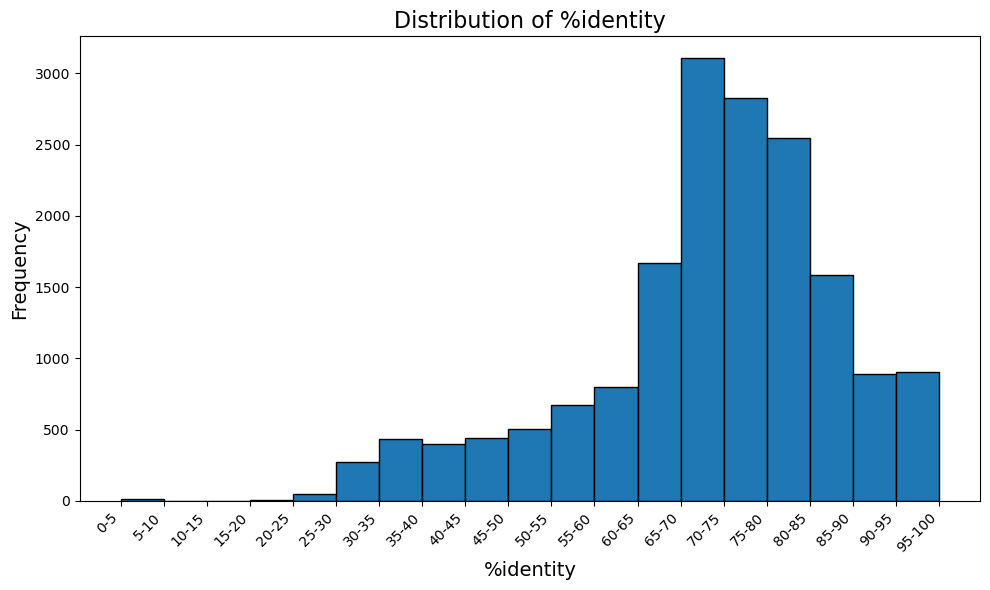

In [277]:
plot_score_histogram(df['identity%'],'%identity',5)

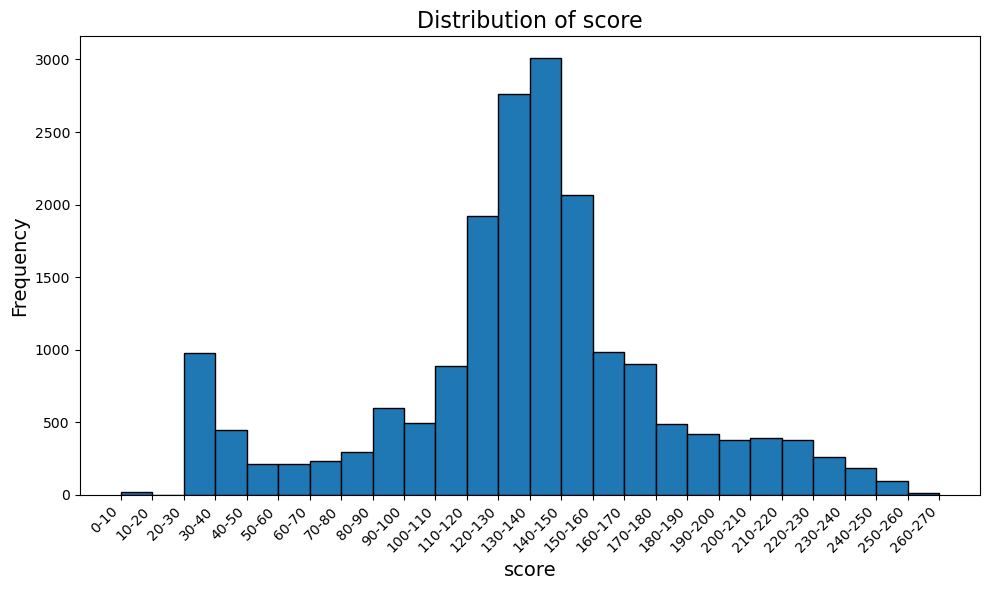

In [283]:
plot_score_histogram(df['score'],'score',10)